# IPSA Exam Project - Geometric Medians
By Theodore Doubinsky, Jeppe Tilby and Mattias Agerbo

## Part 1
The geometric_median function

In [1]:
from scipy.optimize import minimize


def dist2D(x, y):
    """
    Takes two tuples x and y and returns the 2D Euclidean distance
    between them.
    """
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) ** 0.5


def dists(y, X):
    """
    Takes a tuple y and a list of tuples X and returns the sum of
    euclidean distances from y to each point in X.
    """
    return sum([dist2D(y, x) for x in X])


def average(X):
    """
    Takes a list of tuples X and returns the geometric mean 
    as a tuple, i.e. takes the mean of the first coordinate
    and the mean of the second coordinate
    """
    if not X:
        return 0
        
    def mean(X):
        return sum(X) / len(X)
    X1, X2 = zip(*X)                            
    return (mean(X1), mean(X2))


def geometric_median(X, verbose = False): 
    """
    Takes a list of tuples X and returns a tuple, such that the tuple
    minimizes the distances from tuples in X. If verbose is set to
    true, the output becomes the full scipy.optimize.optimize.OptimizeResult
    class.
    """
    if verbose:
        return minimize(lambda x: dists(x, X), x0=average(X),
                        method = "Nelder-Mead")
    return tuple(minimize(lambda x: dists(x, X), x0=average(X),
                          method = "Nelder-Mead").x)


# Different sets for testing:
#S = {(1,2), (3,3), (0,7)}
S = {(2, 3), (5, 7), (4, 10), (10, 15), (2.5, 5), (8, 4), (9, 10), (6, 6)}
#S = {(3,1),(2,1),(2,-1),(3,-1),(-3,1),(-2,1),(-2,-1),(-3,-1)}
#S = {(-1,0), (0,0), (1,0)} 

x = geometric_median(S, verbose = True)

print(x)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 31.44524401608211
             x: [ 5.126e+00  6.943e+00]
           nit: 39
          nfev: 75
 final_simplex: (array([[ 5.126e+00,  6.943e+00],
                       [ 5.126e+00,  6.943e+00],
                       [ 5.126e+00,  6.943e+00]]), array([ 3.145e+01,  3.145e+01,  3.145e+01]))


## Parts 2 and 3
Ploting a plot and contour plot of the geometric_median function

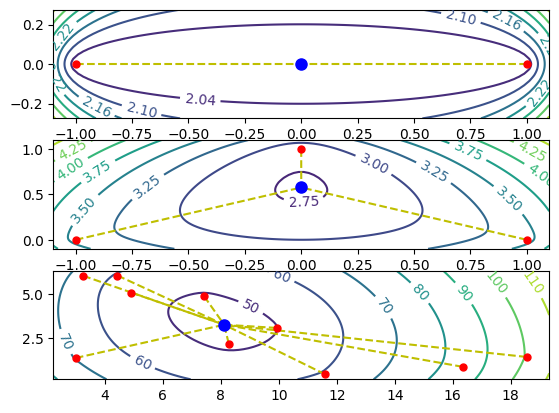

In [31]:
# 2.
import matplotlib.pyplot as plt


def make_plot(PointSet, GeoMean = None):
    """
    Takes a list of tuples PointSet and an optional tuple
    GeoMean (given no GeoMean, GeoMean = geometric_median(PointSet))
    and plots (using MatPlotLib) the tuples in PointSet as points, the
    GeoMean as a point and lines from tuples in PointSet to GeoMean
    """
    if not GeoMean:
        GeoMean = geometric_median(PointSet)

    # Running through twice as plot points on top of dotted lines.
    for s in PointSet:
        plt.plot([s[0], GeoMean[0]], [s[1], GeoMean[1]], 'y--')
    
    plt.plot(GeoMean[0], GeoMean[1], 'bo', markersize=8)
    
    for s in PointSet:
        plt.plot(s[0], s[1], 'ro', markersize=5)

# 3.
import numpy as np
from random import uniform as unif


def make_contour_plot(PointSet, GeoMean = None, resolution = 100, 
                     x_margin_scale = 1, y_margin_scale = 1):
    """
    Takes a list of tuples PointSet and an optional tuple GeoMean, 
    and numbers resolution, sub_x_factor and sub_y_factor.
    The function creates the same plot as in make_plot, and adds 
    contour-lines based on the sum of distances to the tuples in
    PointSet.
        
    PointSet and GeoMean are used as make_plot arguments.
    resolution is the contour resolution - i.e. how many points should be used
    x_margin_scale and y_margin_scale are scaling factors, that rescale the 
    plots margins arcordingly.
    """
    
    # Find outermost points
    Sx, Sy = zip(*PointSet)
    x_max = max(Sx)
    x_min = min(Sx)
    y_max = max(Sy)
    y_min = min(Sy)

    # Finds factors to give outer points breathing room in the plot
    x_factor = (x_max - x_min) * 0.05 * x_margin_scale
    y_factor = (y_max - y_min) * 0.05 * y_margin_scale

    # Following can happen if given set of a single point
    if x_factor == 0 and y_factor == 0:
        x_factor, y_factor = 1/2 * x_margin_scale, 3/4 * 1/2 * y_margin_scale
    # Now both x_factor and y_factor can't be zero, but one axis can have width
    # of 0.
    # Numbers explained: 0.05 undoes increment squeezing factor and together
    # with 1.1 recovers the width of the opposing axis by adding 5% on either
    # side to match plot.
    # 4/3 and 3/4 is for scaling the axis of standard plot window 
    # 1/2 is because of the width being added on either side of points
    # i.e. + and - given factor
    # x_margin_scale and y_margin_scale is for manual adjustments and are 1
    # otherwise
    elif x_factor == 0:
        x_factor = y_factor / 0.05 * 1.1 * 4/3 * 1/2 * x_margin_scale
    elif y_factor == 0:
        y_factor = x_factor / 0.05 * 1.1 * 3/4 * 1/2 * y_margin_scale
    
    # Construct meshgrid and find values
    x_list = np.linspace(x_min - x_factor, x_max + x_factor, resolution)
    y_list = np.linspace(y_min - y_factor, y_max + y_factor, resolution)
    X, Y = np.meshgrid(x_list, y_list)
    Z = dists((X, Y), PointSet)

    # Plot contour
    cp = plt.contour(X, Y, Z)
    plt.clabel(cp, fontsize = 10)

    make_plot(PointSet, GeoMean)


# FOR TESTING AND DEBUGGING
# generate various sets
S1 = {(-1, 0), (1, 0)}
S2 = S1.union({(0, 1)})
S3 = {(unif(0, 20), unif(0, 10)) for _ in range(10)}
S4 = {  # Set with three points on a line
    (6, 4), (7, 5), (9, 7), (10, 5), (10, 6), (11, 6),
    (4, 3), (5, 3), (5, 5), (4, 5)
     }
S5 = { # Set that two_geometric_medians fails on
    (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)
     }

# make subplots
plt.subplot(3, 1, 1)
make_contour_plot(S1, y_margin_scale = 1/3)
plt.subplot(3, 1, 2)
make_contour_plot(S2, y_margin_scale = 2)
plt.subplot(3, {
 "cells": [
  {
   "cell_type": "markdown",
   "id": "c654ac71",
   "metadata": {},
   "source": [
    "# IPSA Exam Project - Geometric Medians\n",
    "By Theodore Doubinsky, Jeppe Tilby and Mattias Agerbo"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "4ae21244",
   "metadata": {},
   "source": [
    "## Part 1\n",
    "The geometric_median function"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 30,
   "id": "cfa19651",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "       message: Optimization terminated successfully.\n",
      "       success: True\n",
      "        status: 0\n",
      "           fun: 31.44524401608211\n",
      "             x: [ 5.126e+00  6.943e+00]\n",
      "           nit: 39\n",
      "          nfev: 75\n",
      " final_simplex: (array([[ 5.126e+00,  6.943e+00],\n",
      "                       [ 5.126e+00,  6.943e+00],\n",
      "                       [ 5.126e+00,  6.943e+00]]), array([ 3.145e+01,  3.145e+01,  3.145e+01]))\n"
     ]
    }
   ],
   "source": [
    "from scipy.optimize import minimize\n",
    "\n",
    "\n",
    "def dist2D(x, y):\n",
    "    \"\"\"\n",
    "    Takes two tuples x and y and returns the 2D Euclidean distance\n",
    "    between them.\n",
    "    \"\"\"\n",
    "    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) ** 0.5\n",
    "\n",
    "\n",
    "def dists(y, X):\n",
    "    \"\"\"\n",
    "    Takes a tuple y and a list of tuples X and returns the sum of\n",
    "    euclidean distances from y to each point in X.\n",
    "    \"\"\"\n",
    "    return sum([dist2D(y, x) for x in X])\n",
    "\n",
    "\n",
    "def average(X):\n",
    "    \"\"\"\n",
    "    Takes a list of tuples X and returns the geometric mean \n",
    "    as a tuple, i.e. takes the mean of the first coordinate\n",
    "    and the mean of the second coordinate\n",
    "    \"\"\"\n",
    "    if not X:\n",
    "        return 0\n",
    "        \n",
    "    def mean(X):\n",
    "        return sum(X) / len(X)\n",
    "    X1, X2 = zip(*X)                            \n",
    "    return (mean(X1), mean(X2))\n",
    "\n",
    "\n",
    "def geometric_median(X, verbose = False): \n",
    "    \"\"\"\n",
    "    Takes a list of tuples X and returns a tuple, such that the tuple\n",
    "    minimizes the distances from tuples in X. If verbose is set to\n",
    "    true, the output becomes the full scipy.optimize.optimize.OptimizeResult\n",
    "    class.\n",
    "    \"\"\"\n",
    "    if verbose:\n",
    "        return minimize(lambda x: dists(x, X), x0=average(X),\n",
    "                        method = \"Nelder-Mead\")\n",
    "    return tuple(minimize(lambda x: dists(x, X), x0=average(X),\n",
    "                          method = \"Nelder-Mead\").x)\n",
    "\n",
    "\n",
    "# Different sets for testing:\n",
    "#S = {(1,2), (3,3), (0,7)}\n",
    "S = {(2, 3), (5, 7), (4, 10), (10, 15), (2.5, 5), (8, 4), (9, 10), (6, 6)}\n",
    "#S = {(3,1),(2,1),(2,-1),(3,-1),(-3,1),(-2,1),(-2,-1),(-3,-1)}\n",
    "#S = {(-1,0), (0,0), (1,0)} \n",
    "\n",
    "x = geometric_median(S, verbose = True)\n",
    "\n",
    "print(x)"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "86f38a97",
   "metadata": {},
   "source": [
    "## Parts 2 and 3\n",
    "Ploting a plot and contour plot of the geometric_median function"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 31,
   "id": "1e981f66",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAi8AAAGdCAYAAADaPpOnAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOyddXgU19eA35XsbtxdiZEAwSEQ3IuVUgoUSikV6t5fhbp8LXV3o5SWQnEp7m4JkhAh7u66Ot8fmyyEONYC8z7PZnZnzszem92de+65RySCIAiIiIiIiIiIiFwnSP/tBoiIiIiIiIiIdARReRERERERERG5rhCVFxEREREREZHrClF5EREREREREbmuEJUXERERERERkesKUXkRERERERERua4QlRcRERERERGR6wpReRERERERERG5rpD/2w240hgMBnJycrC2tkYikfzbzRERERERERFpB4IgUFlZiYeHB1Jp67aVG055ycnJwdvb+99uhoiIiIjIfxwrey8A6qpLUKhs6dT9Vuqqi0g9vQ6DQfcvt65tFLaOmNnYI1Oa49hrCBIzBVmb/kBTVvRvN+2yyMzMxMvLq1WZG055sba2BuDv47MZHfg5MqmyWblNOVtZk7MBgKFOg7jLdyZSScua3qmSTF46sZ7CukosZGa80mM8t3h1aVebarVafjkZyaKTJ9Ea9MgkUmZ07cqDffrhaGHRwR42prymji0n49kQGU9SXrFpv6eDDRN6hzCuZxBeDnaX9R5XE0EQKCmt5lxqAcnphSRnFJGcXkheYUWz8mZyGd4e9vh5O+Lr4YCvpwO+Xg64Odsik4mroCIiNxIVlbWk55SQnlVCRnYJadnFpGcVU1pe26y8hbkCfx9H/L2dCPR1IdDPGT9vR+RyWbve70R0Jm98tpkda7/Gwa75e7Nao6OsohZHO0vk8su/56i1Og7Ep7HlVAKHEtLRG4wVe2wslKx74R7MFWbtuk5pdS0v/LWdl+fNYHp410bHBEFge0oyXxw5RGaF8d7a09WNBUOGEers3K7rF9RW8krkeqJKMgGY7d+XJ7uMwEza8v82sTKZrxN/oMZQg6fKg6eDH8NOYdusbFbVTvanvM3DQ06ZxvHWkNxotY0qKiqwtbWlqDQHRzv3ZmVWZ61nTfZ6AG7znMTtnlNaXGISBIHFSUf5OGYHOsFAgLUTX4ZPJ8Cm7Q9cEAQ2JyXy3v695FRWAjDI24c3h48kwMHhEntoJDYrn2UHT7MpKh61Tg+AQi5jdFgQdwzoRt8Ar//ksllRSRVxSXnEJeVxLiWfc6n5lJTVNCvr4mRNkJ8LAb7OBPg64e/jhLe7fbtvRCIiIjcmpeXVJKcXkVI/2UlKLyQlvQht/b3wQr57dxZhIZ7NXkcQBAwGwTTxOXoylVc/Xs+Sz+bh5tL8IBtzLodflx0iO78MlULO4/OG07e77xW53xZWVLHueCyrj8YQ5O7EF/fe2q7ztHo9ZjIZj/28FqlEwlf3T2lWTq3TsehUFF8fO0qNVotUIuHObmE8O3AQDubmbb6PzmDgs7M7+SXxMAB9HL35tP8duJq3rGxk1mTzYfynlGnLcVe58XLo/7BT2DUrm1t8Dg+nzpSXl2NjY9NqW25Y5aWlzq/J2sDq7HUAzPSexiSP8S1eq06v5eXI9WzKOgvARK9uvN17EpZyRZvtyCwv55VdOziQkQ6Ah7U1rw4dzriAwEv+kqu1OraePsfyQ2c4k55r2t/Zw5k7BoQxvldnbC1Ul3Ttq0FNrYbYxFxiE3OJS8ojPimPwpKqJnJSqQQ/L0eC/V0I7uRKoK8zgX7O2Fi3/WMSERERAdDp9GTklJCUVkhiagHnUgtISitk5ffzMVc1f8/W6Q3I6xWXY6fS+Oq33YQGuvHy482PC4IgkJpZzLmUfKpq1Hy3ZB9P3z+SyaO7Nyt7qfd6g0Ggsk7d4v1cEAQMgoDsAr+Q2Kx87vpiGQtuH8GMgd1bff/cykoWHtjHxnMJANipVLwyZBi3h3ZpV5t35MTz0ol1VOnUOCot+XrADHo5tuyuUVBXyHtxH1GsKWlVgWlr/L6Qm0p5WZu9kVVZawG402c6E93HtXidoroqHju8nNOl2cglUl7qPpa7/Pu1+cHqDQYWnz7FJ4cOUKvToZTJeLhvfx7s0xdzs/aZ/y6mpKqG5YfOsOzgaUqqjFYKuUzKmO5BzBrUg55+Hv+6lUUQBDKyS4hOyOHsOaPCkppZhMHQ+OsllUro5OVISKAbIQFuBPu7EuDrhEp5af8bERERkZZobQDX6w3IZFJqajX8vTGSlZuiGDe0C3dN7Y+DnWWbysfGndGs2BjJC4+Mo2uwOwaDgFRqlM/IKWHjjmiOn0kn0NeZ28f3JDSw+ZWAy6G8po7IlGzWn4glLquArt6ufHDXeMxasE7r9Aaq1RqTUnQ0K5O39u4mvsjoIzPU15f/GzkaL5vmrU4XklZVzJNHVnCuogCFVMbCPlOY6N2tRfkLFRgPlRsvd3keW7PG7yMqL810fmPOZpZnrgLgTu87mOhxS4vXOFdewMOH/yKnphxbMxVfDphBuLNfm++dUFTEgp3bOJWXB0C4pxfvjRpDJ3v7S+pLcl4xS/ZHsfFEnGlpyM3OmhkDuzM1vCtO1paXdN0rgVarJz45j+j4bKLjc4hOyKasouk6tLuLDV2C3AkNdCc00I2gTi5YmLdtuRIRERG52uw9msifa45RUVnLcw+OoV8P3zbP0Wr1mJnJ+L+vNlFRWcf/HhqDi6M1Op0euVzGmfhsvv5tDzqdnlvH9uDQiWTq1FpeeWI8rk6tD8jtoaiimmNJmWw7k0hyXjE6g4EwHzdmD+5JV29XzGQtL6ufzcxn8d5I5FIpdw3pRVdvV7R6PT9HRfLF0cNo9HoszMx4buAg5vbo2ciy0xzVOg0vHF/DzlyjBeeJ0GE8GjK0RaXvQgXG09yDl0Ofx8bs/JKTqLxc1PlteTtZkv4XANO9budWzwktnn8gP5mnj66kSqfG18qBHyJm4Wfl2Op76gwGvj1+lK+PHUVnMGClULBg8FBmdgtDegkWkdPpufy04yh7Y1NN+7p6u3LPsD6M7h7Y6pfzaqHW6IhNzOV0bBYnz2YSk5CDWtPYG1+hkNMl0I2uwR50DXanS7A7TvZW17ytIiIiIq1RWV3H17/tISWjiL7dfbl/ZgRyuazRMhLQyJpyMfc88xsRfQOYN30gSoXcZMl5+q0VqJRyHr17GD6eDlRW13HPM4uZNDqM+2ZEXNZyUo1aw4BXvsFapWTW4J4M6uyLr7M9DlYWbbYXID67gKOJmRyIT+NoUgZfzLuVEd0CAEgpLeXlnds4lp0NQE83Nz4ZO77NybdeMPBJzE5+rfeDmeLTnXd6TUIhaz4eKL8un3djP6JUW4avhTcLQp/HUm5sf0eUlxsu2uhijhQfMykuUz0nt6q4rEo7yesnN6IXBPo6+fBV+Azsla1HA2WWl/Ps1s1E5uYAMMY/gLdGjMTNqm1v6QsRBIHjyVn8tOMYRxIzAJBIYGS3QOYM6UUff89rujSk0xuIT8ojMjqDyOh0ouNzmjjD2dmYE9bZk7AQD8JCPOkc4IrC7Ib/SomIiFznbNsXx6bdMYQEutG3uy+1ai3WclkjxQVoogg0KB65BeVUVNXh6+mAUmG858lkUiqq6oiKyeDNZybh42kMyrC2VBHg60ReYQVqjc4kfymotXoGdfbjUEI6ggABbo7YmJ/3i2lNcQEI8XQhxNOF+JwC+vp74WRz3nrvb2/P0mkzWBYTzfsH9nEqL4/Jf/3Ba0OHM6NrtxbHH5lEygthY/C1cuDtU5tYl3GGnJpyvh04E2uzpj47ripXXgp9jndjPyS9JpPPz33NCyHPYCbtmOvADT3SxFUk8EPyrwCMcR3JVM+WPbcXJR7mg+jtQNuaIxi/xGvi43hzzy6qNBqsFAreHjGKKZ1DOqRkCILAgfg0vt92hDMZxuUmuVTKpD6h3D+qH37Ol7bk1FEEQSAzp5Sjp9I4fjqNU7FZ1NRqGsk42lnSs6sXPbp40bOLN528Hf91XxsRERGRjjJuaBecHKzYdTCeNz7dQFWNGhsrFY/PG8Gw8CCUCjmHI1PQ6vT07+ln8skTBOOk8nRsFuYqBR5udsB5i0dkdDoWKgVhnT1M76VWa7G3s6SmVnNZiguAvZU5382fSnRGHv+3aid/7I9i+oDuPDkhAoW88bUvtsI0WJXO5RZxLCmL+0b0JcSzcdSsBJgd1p0Rfp3437YtHM7KZMHO7exOS+W9UWNajUia2akPnhZ2PHV0BceL0rln/xJ+GXRXswYAD3N3Xgh5lv+L/YD4ynP8mLKIRwIe6ND/4oZVXnJr8/g88xt0go6+9r2Z43tnswOtIAh8F7+fL+P2AHB/0ED+1210q4NyeV0dr+7awT+J5wDo6+HJp+NuaZeT04VEpWTzxaYDRKUarTZKuYzb+nfjvhF98XC4/LXRtqiqVnPiTDrHTqdx7FRak9wq1lYqenf1pk93H/qG+eLtYS8qKyIiItc9VpZKhoUHMSw8CDDmkzlyMhV7G3OT9WX5xkiqa9V0DfZoElBw8mwmnm62uDoZLewGgwGpVMaZuGy8Pe0bRUqWltdQVl6Dg92V81EM83Fj+TN3cTA+jU837ifQzZGJfUIwk8nILCrD28muiRWmoV/fbztCJxd7woO8MZPJGik5EokEjU5HRWUdv946lcVnTvLJoYNsS07iVF4uH425hSG+LfsFDXYN4I+h87j/4B/EluVy977F/Dp4Di7NhFL7WnrzVPCjfJzwBUeKj+GkcGS83Zh2/w+uifLyzTff8NFHH5GXl0ePHj346quv6N+/f7OyP/30E7///jsxMTEA9OnTh/fee69F+Zb4KvF7asxqCLTy55HAB5pNQCcIAp+d3cWP5w4C8GTocB4JGdLqAH22oIBH/llPVkUFcqmUp8IH8nDffm06Nl1ITEYeX285xMEEYxi1Ui7jzkE9mTeiz1V3ws3KLeVQZAoHTyRzKjYLvd5gOmYml9E91JP+Pf3o292XID+XNs2QIiIiItc7NtbmjB3aOOno/FmDKSyuxNHeeE8uLq3ms5930CfMl9Nx2Qzq44+djdGq0DBmZOeV4ePuYDTR1JOeXUJJWTWD+gZc8XYPCvFjUIgf1XUazGQysorLee73f5jYO4Q5Q3uZxiW9wYBMKuVkajan03N5aEw4/i5GX06DICBFQkZRGf9ExrE+Mg4HKwtySsqZ2r8bq2fO5uktm0guLeGetat4ov8AnhowsEV/zlA7N/4YOo979y8hqbKQu/ct5rchd+Nu0XRy3822C/d3msuPKYvYmLsZK237x7+rrrwsX76cZ599lu+//57w8HA+//xzxo0bR0JCAi4uLk3k9+zZw6xZs4iIiEClUvHBBx8wduxYzp49i6dn84mGmqNQU4SnlQfPBD+BQto0ukUQBD6M2c6ixCMAvBg2hnuDBrZ53e9OHCOrogIfW1u+uGUiPdzc2t2mrOJyPt24j+1nkgDj8tBt/bvy8NgBuNpeHcdWg0Hg7Lkc9h5N5MDxZLJySxsd9/awJ7xnJ8J7+tGzq1eL+RBEREREbia6BrsD58ObpVKjX8vyjZFk55WyclMUmbmlTBjRjeEDgwEI6uRCVHSGKUsuwMETySgVZvTq1jQPil5voLpGfdk5rSzr79sanQ53e2vsLFWNJtQNz3/eeZwQD2f6B3ojlUpMS0kanY53Vu5EEARenDKMUC9XErIL+OyfA2SXVLB06nQ+P3aYv2LO8NWxI0QX5PPZuPHYqprPQ+Nv7cQfw+Zxz/7fSa8uYc6+xSweMhcvS7smskOcB1GgLmJt9gb+TF/e7j5f9Wij8PBw+vXrx9dffw0YzWve3t488cQTvPTSS22er9frsbe35+uvv2bu3Lltyjd4K9+z+0HeDX8DT3OPJjKCIPB+9DYWJx0F4LUe47kroF+7vMAr1HV8ePAAz0cMbvGDu5jqOg0/7zrG73uj0Oj0SCUSJvYO4ZGxA/B2smvXNTqCRqsj8kwG+44lcfBEUqMMtnK5lB6hXgzqG8DA3v54e1wbnxoRERGRGwWtVk9UTAb7jyfh5mzDnKnhAMQk5PDKR+t45v5R9O3uy/7jSXz43TYev2cY0yb0bnKdk2czefrNv+nZ1ZvB/QIZ0j8QN+fLdxlosLQAHE/KpF+gN0cTM3j5r608OT6CKf2M5QMaMvN+v/0IP24/xqzBPfBysCWiPoopr6yS9MJSevp5oDSTszoulld2bket1+Nra8t3k24lxKnlbPM5NeXM2/87GdWleJjb8seweXg0Y4ERBIFvk39iX8YB/h615N8PldZoNFhYWLBy5Upuu+020/577rmHsrIy1q1b1+Y1KisrcXFxYcWKFUyaNKlN+Qbl5WD6YSJ8BjQr8138Pr6I3QPAW70mMrNTH9Q6HUr5lTVE6Q0G1h2P5avNBymqNCoQ4YHevHDbcILdna7oe+l0eo6fSWfXwQT2H0uiqkZtOmZpoWBQ3wCG9g+iXw9fLC2ar/ckcnOi1+lRq3Vo1Dq0GuNDo2l4rjdutee3Oq0OnVZf/7z+odOj0xnQ6/TodQZ0OgMGvQG9/vzW9NwgYNAbMNRvG1K0CwZj1tCGLQCCQFt3KNN8QyJBggSpVIJEKkEiOf9cKpEglUmQSqWmrUwmRSav38qkSGVS5PKGrQy5XIpMLsPMTIb8goeZmdy4VRhfK8zkmCnkmClkmCnkKJTG14oLnou+YjcHer2B5RsjWfT3IZQKOS6O1vTo4sVT941sVv73VUf4cemBRvu6dfZgZERnRkZ0xsnh8izyBeVVTHjvV7wcbdHpDQR7OPP8rUNxt7cxWV3Ka+oY/fZPqHU6xvcMQW8wcDw5i6cnDmZq/66otTqUF0SRni0o4OGN68murMBcLueDMeOYFNy5xTbk11Zwz/4lpFUV42flyNJh83BQNl0e0hg0/B67lPlh9/77yktOTg6enp4cOnSIgQPPL8m88MIL7N27l6NHj7Z5jUcffZStW7dy9uxZVM1YOtRqNWr1+YG6oqICb2/vFju/PDWSN07+A8DL3cfhigNHsjKJzM1hQlAwD/c1+tZcTiw+QFxWAW+u2E5sVgEAPk52PDd5KCO6+l+xG5lebyAqJpMdB+LYfyyJiqo60zEnByuG9A9kaP9AenbxxsxMrAd0vSIIAlqNjppqDXU1ampqNNRWq6mt0VBXo6G2Rk1trfF5Xa2Gulpt/db4XF2rRV2nQV2nRV2npa5Oi6ZOi0atQ63WotcZ2m6EyCUjkUhQKI2KjFJphtLcDKXqwocClblxv8pcUf8ww9xcicpCgXn9w/hcibmFAgtLJeaWSlTmZkg74G8ncm0wGARiE3OxMDfD36f1OnjZeWUcOJ7EvqNJnInPMinrEgmEhXgyYmBnRg8Owd720or46g0Gvtl6mD/2RWGlUvLmjDEMCfFDEIyh1T/uOMrve6N4cnwEMyJ6YDAI/HXwFJtPJvDd/KlYmzed7JbW1vLk5n84mGlM6/HswAge6xfe4tiWV1PB7L2LyKktp5udB4uHzm22zM4Nk+fl/fffZ9myZezZs6dZxQVg4cKFvPXWW+263q6cBN46uQmARzoPwVPqzKu7tjPAy5uebu58fuQwOZWVvD1i1GUkEdLy/bbD/L4vCr1BwFql5JFxA7gzokeLKZs7SnJ6IVv3xbJjfzwFxZWm/fa2FowYGMyoQSGEhXiKzrb/EfQ6PZUVdVRX1lJVUUdVZS3VlXVUVdZR3fC6Sk11VR01lXXGbbWamiq1aatrpuDc1UAul9VbC4wWBjOlHDMzo0WhwQJhpqi3PNS/ltVbKeTy889lclkjq4bRstFg+ZAik0qQyqRI67cSiQSJpD5PhcRoKUGCab+EFgqnYrTMCIIA9VsBjNYbgwD1Vh3jw4BBf36rN9Rbg3TnLUM6k+XIaE3Sa+ufa42WJaPFqd7yZLJIGfdpNTq0auM+jVpHw7xQEAST4lhJ89WQLwcLS6XxYXXB1kqFpZUKK2sVFtbnn1vZmJu2ltYqrG3MUZqbiZahK4xUKqFb56YuC83h6WbHzMl9mTm5L0UlVew+fI5dB+OJTsjhTFw2Z+Ky+XrxHgb06sTYoaEM7huAsgPlVGRSKU+OH8T8Uf35cN1eXvxjE69NG8WE3iHo9AZySivo5u3KuJ6dTW33drQlr6ySrOJyQr2a+qbam5vz22238+HB/fwUFcmnhw+RV1XFW8NHNhu84mZhw8+D7+Kuvb8RU5bDU0dW8F3Ena1WpG6Lq6q8ODk5IZPJyM/Pb7Q/Pz8ftzYcXT/++GPef/99duzYQffuTYteNbBgwQKeffZZ0+sGy8vFnC7J4tnjqzAgMN2vF3d3CmfyX3/wUN9+zOtpXIsc4OXNx4cOUFhdjbNlx6N+9sWl8t7qXWSXGEOOx/UI5qXbhjdKBHSplFXUsGVPLJt3x5CcUWTab2WpZNSgEEYN6kyPUC9TdVSRK48gCNRUq6koq6GitIaKshrKy6qNr8tqqCyrpaK8hsqyGioraqmsqKWqvJaaanXbF28nSpWZadZtbmGcpTfMyi+ctV/8XKm6YMavPD/rVyjNUKrkpuUOcRZ/ZRAEAZ3OqMRo1DrUdVo0aq1JiTE96q1k6jpts1Yzo3VNXf/caG2rrTZa3wz1kYI11UYll4JLa6tcLsPa1hxrW3OsbMyxtjHH2s4Cm4setnYW2NhbYmtngbWtOTKxuvsVx8nBiukTezN9Ym/yiyrYeySRrftiSUjO5+CJZA6eSMbCXMHwgcHcOro7XYPd2614mivMeGP6aJ6eOBhZ/cRWLpOi1empqtM0KgJZWafBTC6jtUvLpFIWDBmGp40tb+3ZxdLoMxTVVPP5LRNQyZsqV/7WTvwQMYt79v/OgYJk3jj5D+/2nnzJivNVVV4UCgV9+vRh586dJp8Xg8HAzp07efzxx1s878MPP+Tdd99l69at9O3bt9X3UCqVKJWt+3BkVpfyyOFl1Ol1DHML4o2eE1l86iRBjo7cHtrVJNfPw5NqjZa4osIOKS8VtXW8t3o3/0TFA+Bub82rt49kaBf/dl+jOQwGgaiYDDbujGbvkURThlszuYyBffwZNzSUAb39Lzvx0c2MVqujrLiK0uJqSour6p9XUV5STVlJFeWl1ZSVVFNeWk1FaQ1a7aVbQCwslVheMPtteG5ppcLSWomltTmWVkosrVT1s2gV5pYK42tL4xKCqJxeH0gkEqPlykyO5VUIJBQEAY1aV6/IqKmuVFNTXUdNgwWvWk11hdGKV11vzauqrKOqot7qV1FLZUUdhnprU2n9974jWNmYY2tvia2DBXYOVtjaG7f2jlbYOVph72CJnaMVDk7WWFgpRetOB3F1smHGpD7MmNSHlIwitu+PY/v+OPIKK9i0K4ZNu2Lw93Fi0qgwxg3rgm07I5ZsLVRc6C0yvGsAv+2JJCW/GH9XR44mZvBPVDy+TnaEeDa1ulzM3B49cbaw4Jmtm9mWnMw9a1bz061TsFE2XS3p7uDJZ/2n8ejh5axOP4WnhS2PhQ5r/z/lAq56tNHy5cu55557+OGHH+jfvz+ff/45f//9N/Hx8bi6ujJ37lw8PT1ZuHAhAB988AGvv/46S5cuZdCgQabrWFlZYWXV9l3g4jWzap2Gmbt/IamykC62biwZNg9LuYJdqSmsjY/j03HjkUulJq/rqcuWMq9nL6aEhAIQW1iASm6Gfwv1HSJTsliwdAu5pZXIpBLmDOnNo+MGYKG89JDjsooaNuyIZt22040SxwV3cuHWMd0ZOSgEG6v2RTrdrKjrtBQXVFBcUEFJURXFhRUUF1RSUlhBaVEVJcVVlBZVUlnecTO+UmWGrb0FNnaW2NiZ12+Ns9GGrbWNxfmZrK1RWRFnqiL/JQRBoLZGQ1VFrVGZKW941FBRXkNFWf3zsvrXpTWUl1ZTVVFHR4cNhVJuVGQcrbB3ssbByRoHF2scna1xdLbB0cUaB2cbbO0tRCWnFQwGgej4bDbujGbnoQQ09fXlzOQyhvQPZNqEXnQP6VgpmYraOl5fvp2jiRkMDPblYEIaEcG+PDx2AJ09WvfXuZCjWZnM37COKo2GUCdnfp86DUeL5v10lqWc4M1TRheOL8KnM87TON7+5wozfv3116YkdT179uTLL78kPNwYWjZ8+HD8/Pz47bffAPDz8yM9Pb3JNd544w3efPPNNt/rws5bW1vz3PHVbMo6i7PKipUj5uN6Qaa/ao0GS4XCmKSn/sN+eOM6AuwdeX7QYNLKShm1eBE/TJ7CaP/GCYa0Oj3fbjvML7uOIwjg5WjL+3eNp4fvpZc9T0wtYNXmk2zbH2f6UlpZKBk9JIRJI8MICWx/TpkbmZpqNQW5ZRTlV1CYV05RXjmFBeUU5VdQnF9BcWElVc1UuG4JmVyKvYMVtg6WplmjXf1zW3tLbO0tsXM0Kii29paoxKrYIjcxep2eyvJaystqzlsmGyyVJfUWzPrXpcVV1FS1f9nUzEyGg7M1ji42OLrY4ORqg7ObLc6utsatmy32Tlbi8iZQUVXH9v1x/LMrhnMp510zgv1dmT6hFyMHhXTIKn8mPZfojDz8nO0J83VrVDOpvcQVFnLP2lUU1dQQ4uTE0mnTsVM1bxFaeGYri5OOYilXsGLEA/hbO/33lJdryYWd31iYwNunNyOXSPl96Fx6O/pQq9VibmbWJJqoQYF5e+9u8qqq+HbiZMYtWUw3Fxc+GTe+0XukFZby4h+bTJFEU/p1YcFtI0yJgjqCXm9g37FE/t4QSXRCjmm/6QsY0blDzlnXO4IgUF5STX5OGfk5peRnl1GQV0ZBbjkFuWUU5pZRVVnX9oUwWkicXG2Ms7z6G6LxuRX2jtbYOxlN2lY2KvFmKCJylVDXaY3LUkVVlBZXUlJYSXGhcVtSVP+6oIKykup2XU8ulxmVGndbXNzscPGww8XdDldPO9w87HF2t8XsJisQ29zE19banEmjwpg+qTdO9ldm7fLwuXQGBPm0atlJKS3hzpV/U1RTQ3dXV5ZMvQPrZlw7dAYD9x5YwvGidIJtXFg+/H60NbWi8nIs/Rz3Rf2N1qDnxbAxzO7Uj08PHyQyNwepRMrssO6MDwxCIZMhkUhMysvPUSc4mpWFrUrFmfw8tt09r9H198am8OIfm6lWa7AxV/LG9NGM7RHc4XZqtXq27Y/ljzXHyMwxZr2VyaQMCw/ijom9CevsccOaT+tqNeRllZKXXUpeVgm5WfXb7FLys0tR12nbvIaVtQont/OzMSdXG5xcbXFqmLG52Ijr7CIi1xFarc6k2BTnV1CUX0FRfjlFBUYLa0FuGSWFlcYoslaQSCQ4uljj5mmPm5cD7l7GrZunPe7eDtg7Wt2w94UGl4O1W0+RX2SMRFWYyZgwohuzpvTDs76Q5KWw/Uwizy7eyPhenXlrxhjMFS1PqhOLi5m16m9Kamvp7+nJoim3Y27WVL6gtpLbd/1Ikbqa6X69eT5wqKi8jF79EZlCDSPcgvl24EzuXrMKg2AgwtuHuMJCDmdl8tPk2+jj0TicbUdKMg9tWIeThSVb5szFvr6KpiAI/LzzOF9tOYggQG9/Tz6cM6HDaf2ra9Ss3XaaFf9EUVRidJCzslRyx/he3HZLzyumIf/baNRacjJLyEorIju9iJyMEnIyi8nNKKGooKLVcyUSCY7O1rh42uHqYY+ru12jWZazmy0WlmKiPRGRmw29Tk9JUeV5S2xeOQU5ZecttTllbU5+VOYKPHwc8PB2NG59HPHyc8LL1wlbB8sbQrHR6w0cikxh6dpjJou+VCphWHgQd93W/5JcEFYeiebdVbvQGQyEernw5bxbcbNvWnCxgZiCfGavWkGVRsPDffvxwqAhzcodLkjhvgN/IADvdrmFO0LDb27lJXDJAtwdnFk36iGWR8ewMvYsq2fOxqbefPXwxvUAfD/p1kZLSJnl5cxds4qFo8cwwMsYcl2j1vL68m1sPW2sIj1jYHdeum14h/K2qDU6Vm85yZJVR03J5JwcrJgxqQ+3je2BxXXoRyEIAmUl1WSkFJCVWkRGSiGZaYVkpxVRkFveqlOfpbXKNBNy93LAzcveOFPytMfZ3Q6FGEElIiLSQRqWnfOyG1t2c7NKyMsqoTCvos37kqevUZnx9nPG298ZH39n3L0drsulKEEQOB2bxZI1Rzl6Ms20f0j/QB6cPZhO3h3L9H48KZPnfv+H0upaHKws+HzeJHp1arnm4PHsbH49Gckn48Zj0YzlpYFPY3by47mDWGkh8s43ROVl8dgH6Gzlxmu7dxLh7cOc7j3Q6PUoZDKWxZzhl6goNs6eg5lMhlQiMdWDqFSrTWt0uaUVPPnreuJzCpHLpLw8dQTTB7acd+ZitFo9/+yKZvHKIxTWW1p8PByYM7U/Y4aEXheZbwVBoKSoivTkfDKSCkhPNj4ykgta9T+xsFLi6euEl58Tnj6OF8x2HLG2Nb8hZjgiIiLXDxqNjvzsUnIyS8jNKCa7/pGVVkRhKxMuqUyKh7cDvgEu+Aa64Bvgim+AC55+jteNUpOcXsjSdcfZvj8Og0FAKpUwZkgo982I6NByUnZJOU8t2kBC/Zj46u0jmTYg7LLapjXombVnEaeyU0ieu/D6z7B7OdzZqQ8RLv7UarW4WVnhbmU0bylkRmWhu6ubKQFPQ6TRitgYhvl2wt3aKJuSX8L8H1ZRUF6Fg5U5n90zmd7+7atsLQgC2/bF8fOyA+TWL5O4OFpz38wIbhneFfl/NF+Huk5LWlI+qefySEs0blMT86m4oLjjhUgkEtw87fD2d8HbzwmvTs54+znh6eeE3Q1ighUREbkxUCjkeHdyxrtT0xBgdZ2W3Pql7qy0QjJTi8hILSQrtZDaGk39/iIO7ow1nSOTS/H2c6ZTsCudgt3oFOSGf2c3HJyt/3P3vgBfZ157cgJzpvbnp78Osu9oIlv3xrJjfxwTRnZj/qzBONi1nd/M08GW3x+fyWvLt7LtdCJvrthBYWU1D41uuTxAW8gkUrrJ/DhbW9zuc25Yy0tBSTHO9g4tymVXVHDbsqUsnz4Tf3t7Xtm5g2PZWWyfOw+AhJxCHvxhNSVVNQS4OvDd/Km427ev2mdSWiGf/7KTU7FZADjaWXL3tHAmj+7+n0ooV11ZR2JsNskJeaTE55Icn0tGaqEpc+eFSKUS3L0d8Q10wcffuX4G4oqXryOKmygaSkRE5OZCEASK8ivISDlvcW6wPrcUBm7vaIV/Z3cCQtwICPEgIMQdDx+H/1RUY3xSHj8tO2BaTrKyUHL/nYOYekvPdk2uBUHg262H+X67sUbhfSP68vTEwZeswGxKPMeKmDP8dvv0m3vZqKHzF+ZwuZAarZbRvy/ii1smklNZwYs7trFx9hwCHRyJzcrnwR9WU15TR6iXCz/Mvx17q7azF5ZX1vLLsoOs3XYag0FApZRzzx0DmT6xN6p/eYCvq9GQGJtNYlwOiWezOXc2h+z0omZlbe0tjLOIhkeQGz7+zihVopIiIiIiAsbBuyC3rJGFOvVcHllpRc1GRFlZqwjq6klQFw8Cu3gS3NUTVw+7f91CEx2fzee/7iIh2ZgrJsDHiSfvG0mfMJ92nf/73ig+Wr8XgDlDevHClGHt6lNzxY9PZaTTy9dPVF5a6rxBEJAAD25YR2cnJxadjOKdkaO5PbQLZzPzmP/Daipr1XT3ceO7B6e2maxHEATWbz/D93/up7LeGXfEwGAeu2c4bs7ts9ZcSQRBICutiIToLOKjs4g/k0nKubxmLSouHnYEhhpnBgGd3QkIccfJ1eZf/0GJiIiIXI/U1WpIS8wnOT6X5IRckuNySTmXh7Y+/8qF2DtZEdrDh5AwL0K6exPcxROVxbUP3tDrDWzYGc2Pf+43BZQMCw/i2fmjcbRveynp70OneWfVLgDuHNSDl6eOaHEMUet0KOXGFYgGBcYgCBgEgZqqKjFUuj2df3zTRjYnnmN+n768NHioUXH5fjWVdWp6+Xnw3fypbSaeKy6t5oPvtnIoMgUwris+de8IerdTa70S6LR6kuNziTmZztmT6ZyNSqO8tKmPipOLDcHdPAns4kFQqCdBXT2xc7j8opEiIiIiIi2j0+pJS8on8azR+n0uJpvUxDz0usYTSqlMSlCoB916+9Klly9de/pg53jt0mdUVNby69+HWLPlFHqDgK21OS88PIZhA9rOZbbmaAxvrNiOIDSvwOgNBuZvWEdWRTlDff3o7e5BH3cPXC8o+yNm2G2j8w3a3s9RkRzOzOCXKVPJKi7nri//oqSqlt6dPPj2gbYVl92HE/j4hx2UV9aiMJPx4OwhTJ/Y+6oXz9Np9STG5nDmRAqnjqYQeyqjSW4DhVJOYKgHId29CQnzIrSHN86XkaBIREREROTKoa7Tkng2m7gzmfVW8kyK8pvmwPLyc6Jnf3969PcnrG+nazLhTE4v5P++2kxiqjGL/LhhXXj6/pFYW7a+CrH22Fle/3sbggCP3TKQh8cMaHT8lZ3bWRYTzT09e7E1KQm9YKCzoxOd7O0JsHdgZ3Iii6fNuHmVF+8pkzmxdBlB7u7N+rzkVFbiUR9RpDcYqNVoufur5STlFRPq5cKiR6a3qriUV9by6U872XnQWEU6qJMLrz05Hn+f9hex6giCIJCZWsiJg4lEHUri7Ml0ams0jWRs7CwI7eFD114+dOvtR1BXj+smhE9EREREBPJzSomJMlrQY09mkJ5c0CR82y/QlR79/ek7KIiwvn5XrdaaRqvj1+WHWLruOAaDgLODFS8+Oo4BvTq1et6FS0gfz53IuAsy0FdrNPT+4VuW3H4H/T29OJadRXR+PpG5OSQWF+NpZXlzKy9h33xJT19flk2/s0lK4uPZ2Xx97AgTgoKZ2S0Mvd7A079tYE9sCi42lvz19GxcWsmam5JRyIsL15BbUIFMKuGuqeHcO33gFc/XUlVRS9SRZCIPJhJ1OInCvPJGx61szOne14/u/fzpNSAAH39n0U9FRERE5AaisqKWmMg0Th5J5syJVNIS8xsdN1PI6dbbl94DA+k3OBjfQJcrPg5Ex2fz7tdbyMo1lrG5f2YE86YPbPV9Ply3lyX7olCZyfnjyTsbVaf+7PBB/kk8x4659zY6R6PXU1ddfZMvGzk4MPTH75kcEsL/IgY38mo+nZfHa7t38kT/cMYEBPLdtiN8u/UwCrmMxY/NoJtPy2mTD55I5s3PNlJbp8XTzY43n5lIaOClV5G+mOKCCo7siefgrlhOH0tptB5qppAT1seXPoOC6RXuj1+Q638q7E5ERERE5OpSVlJN9IlUog4nceJgYpNJrbu3AxEjQokY1YWQ7t5XzIWhTq3lm9/3smbLKQBGDQrh5cfGtVg0WG8w8NjPazmYkI6ngw3Ln7kLW4vzS07dv/uapwdEcF+v3ibLkkQioay8HHs7u5tYebG15ZVtWyisq+OHyVOahGRVqOuwUao4fC6dh35cjSDAOzPHclv/rs1eUxAElm+I5Jvf9xjrGnXz5v/+dys21m2HT7dFfk4pu/85zYEdsSTF5TQ65t3Jmb6DgugTEUi3PlfPPCgiIiIicn3REFUaeTCRyENJnD6egkZ9PqLJxs6C/kOCGTGxBz37+yPrQDmblli//Qyf/LQDvd5AaJAb7784tcVopPKaOmZ+9ifZJRUM7+LPl/fdahqHNyWe40hWJm8MG4Hsgkm46LBra8vK06f4LSaaDbPnmI4lFBXhY2uLuZkZxZU1TPtkiXEb3o03Z4xp9no6nZ5Pf97J+u1nAJg8Oozn5o9GfhlfhMK8MvZvP8u+rTHEn8k07ZdIJHTu5knEqC5EjOyCl1/H6k6IiIiIiNyc1NaoiTyYxMFdsRzfl9CodIudgyWDRnVlyNiuhPXtdFkWmajoDF75eD2VVXW4OFnz4YLbCfRr3t8zLquAOV8tQ6PT8+KUYcwZ2tt0LK+qEjerxoUdReXF1paDSUk8uXMbm++ai7OlJb+fPsmauDiWTpuOuZkZTy1az66YZALdHPnr6dmomnFu1Wr1vPLROg5FpiCRwGNzhzNzcp9LWlPUafUc3h3HxuVHOX081bRfIpEQ1tePkRN7MGBYyDUNixMRERERufHQ6/TEnspg79YY9m2NblTexd7Jiltu78uEO/pecgRqZk4pLyxcTWZOKeYqMz57Yzrdgj2alf3rwCneW7MbhVzGimfn4O/aOPP9qbxc/O3tsVGqKC8vx+5mXzaKz85m3qYNrLlzNvlV1UxfsYxPx41nUnBn9sam8Pgv65BLpSx7ZnYjZ6IGDAaBt7/4hx0H4lEq5Lz17GQG9wvocHvSkvLZsf4kOzeeorTIWJhRIpHQtZcPQ8eFMWhUFxxdrn0iOxERERGRGx+dVs+pYyns3xbDoV2xVJbXAsaSL30HBzP61l4MGNa5w2VeKqrqePnDtZw6m4W1lYpv3rkTf5+mqwWCIPDoz2s5EJ9GeKA3Pz08zWQAWJ8Qzzt79/DUgIHM6d5DtLzY2tqSU1TI/K2beWnwUF7ZuYNbAgNZMGQYWp2e2z76nYyiMu4d3odnJw9t9jpfLdrN8o2RyGRSPlgwtc3wsAsRBIEzx1NZ+sPuRlYWe0crxt3ehwl39MPF3e5yuyoiIiIiItJutFodh3fH889FKwC29hZMvXsQk+8Mx9Kq9VwuF1Jbp+GZt1cSk5CDs4MVP7x/Fy6O1k3ksorLue3Dxah1ej67ZxKjuwcBUKlW8+XRI0wICqKXu4doeWnQ3B7YupnInGwG+fjy+9RpACw9cIqFa3bjaG3BxpfmYaVSNrnGyk1RfP6LMU799acnMnZIaLveW683cHh3HKsWHyDutNGXRSaX0n9IZ8ZM6UW/IcFi7hURERERkX+dzNRCdm44xY4NJ03J8aysVUy6M5zJM8PbvSJQUVnLo6/+RVpWCQE+Tnz77iwsLZqOq19uPshPO47h52zP6ufvxkzW1G9UtLzUd/7bM6f4KzqaqIceQSaVUqfVMf7dXyiqrOHVaSOZGdGjyflHT6by/HurMRgEHp4zhDlTw9t8T4PBwPZ1J1n6w27yc8oAY2jz+Gl9uWPeYNHKIiIiIiLyn0Sv07N78xmW/7yPzNRCAORyGcMndOfeJ8e0S4nJKyjnoQVLKS6rJqKPP++/NBWptLFvaHWdhgkLf6Wkqpa3Z45l6gXRvUeyMtmfnk4XO3smdesmKi82NjamsGg47zjkYW/DxpfmYXZRxFB2Xhn3v7CEqmo1E0d246VHx7XpnJuWmM/X764nJiodMIanTZjej8l3DsDRuan5TERERERE5L9Gw8rBmiWHOHvSOJ5ZWCmZ9+QYJt7Rr81Q69jEXB5/fTkajY57pw/k/jsHNZH5bfcJPtm4Hz9ne9a+MNcUJr0+IZ5ntmzCzdKKQ/MfapfycsNnOWtQXAwGgSX7ogCYN7xPE8WlwUG3qlpNlyB3nntwdKuKS3lpNd8u3MijM74hJiodpcqMB569hSXbnmfeE2NExUVERERE5LpBJpMyeHRXPlk8ny/+fJjO3byoqVLz7XsbefzO7zh1NLnV87sEufPCQ8aUI4tWHOZ0XFYTmRkR3bExV5JWWMq+2PM+N7d2DqGLswtjOrXft/SGV14aOJKYQWZxOdYqJVP6NU1Gt2l3DGfP5WJhruCd/01G0YpvyuaVx7l34qes/+sIBr2BQaO68OPaJ7lj3mCUqo55bIuIiIiIiPyX6BzmxadLHuSxlydjZWNO6rk8Xpq/iNcfX0J5aXWL590yvCsTRnYD4NOfdqLXN66abaFUMG1AGADLD59pdOzFwUNYHhfb7jbeNMrLuuPGf8rEPiFYXBQSVqfW8tNfBwC4d8ZAXJ2aN1cZDAZ++WwrX7y9jpoqNQEh7iz88V5e+2w2rh72V7cDIiIiIiIi1wiZTMrkO8P5deMz3DprADK5lGP7Enh27o/kZpW0eN5jc4dhZakkOb2QLXvPNjl+R73ycjghncKKKtP+wT6+9HRxbXf7bgrlRa3Vsfus0eQ1qU/TyKF1205TXFqNu4sNd4zv3eQ4GEPMPnp5JSsW7Qdg7uOj+GrZI/Qa0PHcLyIiIiIiItcDNnYWPLpgEt8sfwwXDzuy04t5Zs4PJMZmNytva23O3GkDAPhtxWF0F1lffJzs6O7rjkEQ2H4mqdGx1wYNbne7bgrl5URyFrUaLS42lnS/qPCiTm9g+YZIAOZOG9BsdeiaajVvPL6E3ZvOIJNL+d//TWP2gyPEwogiIiIiIjcFfkGufLbkIQJC3Ckrqeb5e38h6nBSs7K339ITOxtzcgsq2HP4XJPjY8ICAdgXm9Jov5d1+xO23hSj79EkY86ViM5+TZxwj0SlUlBciZ2NOeOGdWlybnlpNS8+8CtRh5NRmSt466u7GX1rr2vSbhERERERkf8Kjs7WfPjr/fQM96euVsPrjy1h39boJnIqpRlTb+kJGFc2LiYixA+AqNRstDr9JbXlplBeTqfnAtDb37PJsR0H4gAYN7RLEyddg8HAW0/9SeLZbGztLfjgl/voOyjo6jdYRESkEXV1sGQJTJsGw4cbt0uWGPeLiIhcOyytVLz9zVyG3RKGTqfn/Rf/JiYqrYncxJFG35ZTsZkUlVQ1Ohbo6oiNuZJajY7EvKJLascNr7wIgkBijvGf08XLpdExvd7AkZPGcK3hA4ObnLtjwyliT2VgbqHg49/m07mb19VvsIiISCPWrwcPD5g7F9auhb17jdu5c437N2z4t1soInJzoVDIeWHhdIbdEobBIPDtwo0YDI19W9ycbQgNckMQMI2zDUilEkI9jeNxQs5/WHn55ptv8PPzQ6VSER4ezrFjx1qVX7FiBSEhIahUKsLCwti0adMlv3dpdS2VdWoA/JwbRwSlZRVTVa3GXGVGaJB7o2N6nZ6l3+8GYPaDI/DWlcGCBTBrlnGbmHjJbRIREWkf69fDbbdBWZnxdcP9sWFbVgZTphjlRERErgGJibBgAbI5d/GM9jiB8mpSEvI4tDOuiWjfMF8AzsQ3de7tVF9dOr2w9JKacdUL7Sxfvpxnn32W77//nvDwcD7//HPGjRtHQkICLi4uTeQPHTrErFmzWLhwIZMmTWLp0qXcdtttREVF0a1btw6/f36Z0VzlaG2B8qJloeQMo8YX1MkFuayxHnfiUBJ52aXY2ltwmzYeQoaDRAKCYNx++CH88gvMm9fhNomIiLRNXd35n1dLecAbfo7z5kFODqjaX1NORESkoyxaBA88YBoLVRIJXxoMfOY5kX9WBDB4TOMcaiGBxgCZ5PTCJpdytzMmcs0vr7ykplx15eXTTz9l/vz53HvvvQB8//33/PPPP/z666+89NJLTeS/+OILbrnlFp5//nkA3nnnHbZv387XX3/N999/3743vSAKqKzGWP7b3tK8iVh+obEYlaerXZNjx/cbPaQn93HE7NGHz0/16hEA7r8fw8DeENgQLi1DJjt/99TrW07mA1JkMvNLlK1paEEzSJDJLC5RthYwtCALMpnlJcrWAS07ZXVEViq1MDldGwxqBEF3hWTNkUik9bIaBEF7hWRVSCSyS5DVIgiaFmUlEiVSqfwSZHUIgroVWQVSqVmHZQVBj8HQsgOKRGKGVKrokOyKFVDajkmZIBjlVq6EOXPEz+RqfiZGWQMGQ+0VkpUjlSrrZQUMhporItuxe7F4325e9qJ7cWIS0gceQHLRWCgBnsn6h/n7fairvQuVucJ0zMPVFjg/1l5Iw5hcVn1pjmtXVXnRaDRERkayYMEC0z6pVMro0aM5fPhws+ccPnyYZ599ttG+cePGsXbt2mbl1Wo1avX5H3NFRQWOt99GSV0tNjY21GmMA5a5omnm28r6f5p1MyXAM1MKABiUcdSoZV6EBBAwkPV2D1LnG/c5OEyge/d/TDIHD7q0+AOztR1Gr157TK+PHPFDq21+7c/aui99+hw3vT52rAtqdXqzshYWXejf/3xioMjIftTUNJ+1UKn0ZeDANNPrU6eGUll5ollZMzMnBg06rz2fOTOe8vK9zcpKpRYMHXr+R3327DRKSlpe+hs+/PyPND7+bgoLV7YoO2RIlekHlpDwEPn5i1uUjYgoQKFwBiAp6Vlycr5tUTY8PBVzcz8AUlNfITPz4xZl+/WLwdLSOMNIT3+P9PS3WpTt3fsYNjb9AMjK+oKUlBdalO3RYzf29sMByM39kcTEx1uUDQvbiKPjRADy8/8kIeHeFmW7dPkbF5fpABQVrSE2dkaLsp07L8LdfR4ApaVbiY6e1KJsUNDXeHo+BkBZ2X5Onx7Roqy//4f4+BgnJJWVUURF9W9R1tf3DTp1epO1a0EqFTAYWq8vBka5NWskzJkjfiZX8zMBqKmJ4/jxlq3g3t7/IyDgIwDq6jI4erTllO8eHo8SHPwNAFptEYcONbXGN+Dqeg+hob8BYDDUsH+/VYuyzs530LXrCtPr1mTF+7aRtu7bnX4Cb4xj34VIMKpDY4tPkZNRjH/n8y4YNvVja1VNU4VbVT8mq7UtTypb46r6vBQVFaHX63F1bZw1z9XVlby8vGbPycvL65D8woULsbW1NT28vb2RWVvz3uFD7W5nc7fGhuHUojCnZZs1oGq+WSIiIpdJcTHtUlzAKFfSctJPERGRy0SV1/xY2YCrpgyDoeN1ni+1MvRVrSqdk5ODp6cnhw4dYuDAgab9L7zwAnv37uXo0aNNzlEoFCxevJhZs2aZ9n377be89dZb5OfnN5FvzvLi37cPXd98nR8mT0FXpeehH1cT6ObImufnNjp38coj/PTXASaM6MrLj49vdOzLd9axacVx3nNMoPf+NaBvupQhyGQIzz2N8F7DLE80PzYvKy4bdVxWXKKYNg3Wrm2/5eW22ySsWiV+JuKyEYjLRue5UvdtyctvIPnkcyTNjIV6JKx0Hsitabswt1Ca9ienF3LPs4uxtTbnn98ea3TOmmNneX35NgaH+PHd/KmAcfy2tbVtV1Xpq7ps5OTkhEwma6J05Ofn4+bm1uw5bm5uHZJXKpUolcpG+7T5BQzx8mbjuQRmBhrNm+U1TX+Yrk5Gh6GcgvImx/oOCmLTiuMsqfGllyA0q3FKBAHJ/Ifhgg/8QmQt7L98WYu2hS5Jtqlf0JWRbb8XZUdkjTcyZZtyHZdVAIo25a6urBnQviKfHZOV096ffUdkJRJZu7/D7ZW97TZYvbr9lpepxvuf+JnUczU+E6Os9CrJSq6KLFzNe/FNdN9+4CH4+LMmcgJGi0zqkImNFBeA3PqxtWGsvZCyaqNSa2txaV72V3XZSKFQ0KdPH3bu3GnaZzAY2LlzZyNLzIUMHDiwkTzA9u3bW5RvidTycnxsbXG1M651FlVWN8nkF+Bb7w+RWtik+mW/IcE4udoQV6vi5AMLjE7AMlnj7S+/QGBgh9olIiLSPqZPB3v7Zl3OGiGRGOXuuOPatEtE5KYkKMg45l0wBgoyGQISPvOaSP/7JjQ5JSHZaIjw93VqciyvzBhl5Grbsj9Sa1z1PC/PPvssP/30E4sXLyYuLo5HHnmE6upqU/TR3LlzGzn0PvXUU2zZsoVPPvmE+Ph43nzzTU6cOMHjj7fsKHcxrvPv51xJMaFOLjhaWWCpVCAIkF7UOHShk48TFuYKqmrUnEttbO0xM5Nz5wPDAHjvrDmFe4/B88/DjBnGbUKCGCYtInIVUalgcb0/dksKTMP+xYvFMGkRkavOvHnGse/55xFmzOD4gCncH/ww8b1HM2xcWBPxE9EZAIR1bprdPrXA6KTm42R3SU256srLzJkz+fjjj3n99dfp2bMnp06dYsuWLSan3IyMDHJzc03yERERLF26lB9//JEePXqwcuVK1q5d27EcL4LA12PGMcjHB4lEQpC7IwCxWQWNxOQyKf17GJPo7DncNOnc+Gl9CQhxp6qilmfe3Ena/U/DX3/BwoWixUVE5BowebIxm66dnfF1QxaEhq2dHaxbZ5QTERG5BgQGon/n//gyZCavV4SSq3TgkQUTkckbFzUuKqkiJsGYnC68V+OIM0EQiKsfj4M9nC+pGVfVYfffoDmHn4/W7+X3vVFMG9CNN6ePaSS/5/A5Xv14PY72lqz6/kHkF38A+RW8/PBvZCQXYGVjzltfzaFrL99r1h8RERFjwrqVK2HNGigpAQcHmDrVuFQkWlxERK4d6jotH7z0N4d2xSGVSnjitSmMn9a3idzvq47w49IDhHX24Lv3Zjc6lpJfwpQPF6OUyzj07qMo5EY/ro447N6YtY0usjGHB3oDcCghnYt1tUF9A3C0s6S4tJodB+KbXMrJ1YZPfnuA0B7eVFXUsuDBRRzc2Xz8vYiIyNVBpTImoFu1CnbvNm7nzBEVFxGRa0lleQ0LHlrEoV1xmCnkvPLJrGYVF41Wx+otpwC4dWyPJscPJaQB0LOTh0lx6Sg3pvJykYLSL9AbpZmM3NJK4rIbLx2Zmcm4Y2JvABavOoJO3zSMzNrWgoU/3kv4sBA0ah3/9+xfrP/rSBNFSERERERE5EYkL6uEZ+7+kdiTGVhZq3jv+3sYNKpLs7IbdkRTVFKFs4MVoweFNDm+IzoJgGFd/C+5PTem8nIR5goz0z9pY2RT68q08b2wszEnM6eU9dtPN3sNlbmC1z+bxYTp/RAEYxXNF+77hYSYrKvadhERERERkX+L2ho1i7/ewUO3f0VWWhHObrZ8vHg+YX2bz5xcVa1m0d/GJLFzpw3AzKyxK0ZOSQVRqUZfmDFhQZfcrptCeQHoHeKF1lJgTVRMk3TEFuYK7p0RAcBPfx2kpKz5xEMyuYwnXr2V+58Zh0IpJzoyjadmf8+nr6+mrLjqqvdBRERERETkWiAIArv+OcUDt37OXz/uQV2npWsvXz5b8hB+ga4tnvfTXwcoq6jFx8OByaObRiCtOhqDIBjdOdzsm+Z/aS83jfLi7mSNmY2cInM1GyOblu6eMrYHQZ1cqKyq483PNja7fATG5EjT7x3CLxueYdSkngBsWxvFA1O+YPPK4+h1LWeHFRERERER+a+TkVLAggcX8eGClRQXVOLuZc9rn83m498ewMm1ZUfavUfOsWrzSQCeeWBUkwCYOq2OlUfOADAjovtltfGmUV5G+gdwT1hPDDL4cP/+JsqJXCbljacnYq4yIyomk69/29Pq9ZzdbHn+vTv4dMmD+Hd2o6qili/eXse8CZ+y4tf9VFW0nBJbRERERETkv4QgCEQdSeK1x37nwdu+5NTRFBRKOfc8Ppof1jzJoFFdTOVWmiM5vZD/+2ozADMn9aFfj6ZRuauPxlBSVYungw0ju11eupGbQnnR15fwfnT4AOzrFBRJ61h9LKaJnJ+XI68+YaxxtHJTFGvqvaVbo0sPH7766xHm/288tvaWFOaV88vnW5l7y8f89uV2yktbq30hIiIiIiLy7yEIAod3x/HUXd/z8oO/cXz/OSQSCQNHhPL96ieY9eBwFMrWS10Ul1bz4sI11NZp6d3Nm0fmDmsiU6vR8svOYwDcO6IvctnlqR83ZJ4XtwHhxOzajf8F9ZAEQUAikfDq+m0si4/BS23J5hfvw1zR9ENpiE+XSiW898IUBvdrn4aoUWvZs/kMqxYfJD3ZGNWkVJkxZExXxkzpTVhfP6TSm0JfFBERERH5D1NcUMGujafZti6KzNRCwDhejZvahymzB+DZTEr/5qip1fD468s5l5KPl7s9Py6cjY110xpKP+04xpebD+LpYMP6F+8xhUg3jM3QsTwvN6Ty0u2TD3H39KKPpyfdXV3p6+GJj60tSpmchzeu52RGDvIcA4+OGcij45rWTBIEgQ+/38aGHdEoFHI+e+0OenTxancbDAYDR/bEs/SHPSTF5Zj2u3s7MOGOfoy9rTe29u0v6CUiIiIiInK5GAwGTh5JZuPyYxzdG4/BYBz+zS0UTL4znNvvHoSdY/trDak1Ol54bzWR0RnY2Zjzw8K78HSzayKXX17F5Pd/o1aj5f27xjOxtzF8Wq3Tobwgz8tNr7z43X0XGz/9nMiiQqJyc4jMzcFeZU5+dRWdHZ24xTOQb9cdQiGXsfK5OXRycWhyHZ3ewCsfruPgiWQsLRQsfPE2enfz6VBbBEEg/kwW29dHsWfzGWqqjKXs5XIZfSICGTK2GwNHhGJpLWbaEhERERG58jSMQ/u3x7B/WwyFeeWmY116+TB2Sm+GjO2GpVXHxqGaWg1vfraRQ5EpmKvM+OqtmYQEujWREwSBZxdvZEd0Ej183VnyxEy2JSdxJCuTyNwcJgQF83Df/gCUl5djZ2d38yov3X/4jr333IuviwsARTU1nCsuwlqhxFalxNPahkd/Wsuhc+mEeDmz9IlZmF3kFQ2gVmv537urOXk2E5lMyvMPjmFSM6Ff7aGuRsOeLWf45+9jJMaet8aYmcnoNySYERN60HdwUJOS4iIiIiIiIh1BEARSz+Wxd0s0uzefoSCnzHTMwkrJmFt7M3FGP3z8XS7p+vlFFbz0/loSUwtQmMn46JVp9AlrfnK/9thZXlu+DblUyrJnZpNVV8mru7YzwMsba6WSv8/GMKNrN94eMUq0vHR+6QVuHTeOH6ZMxSAISJvxkI7OzuPOP5ajq9NzX8/evDhleLPXU6u1vPfNFnYeTABg1q19eXjOUGSX4WyUnlzA/m0x7NsaTUZKoWm/mZmM7v38iRgZyoARoTg6X3oMvIiIiIjIzYNOq+dMZCqHdsZxZE8cRfkVpmPmFgoGDA9hyNhu9IkIQqlq3QG3NeKScnlp4VqKy6qxszHn/Zem0q2zR7OyKfnF3Pn5Umo1Op4cP4g7BoUxaekS5vfpy7yexsz2mxLP8fGhAyy/YyZKvf7mVl4c/TsR+vabbJh9N74N5Wib4X8bN7M2Lg55FXxx+yTG9QhuVk4QBH79+xCL/j4MwOB+Abz+1EQszBWX3d7Uc3ns+uc0B7bHkJtV2uhYSJgXfQYF0WdQEJ27eV2WwiQiIiIicmNRXFBB5OEkIg8mEnkwkarKOtMxpcqM3gMDGTGxB+FDO1+WwtLAzoPxvPv1FjQaHf4+Tny4YCpuLrbNylbXaZj95V+k5JcQHuTNDw/ezm+nTrI/I40vx0/CRmlcZSisrmbS0j/4aOw4eto73NzKi62tLf+cjSHE3QN/e/sm1pcLvZsfXLqaHXlpOBaasfTJWQS5t+xhveNAPO99vRmNVk+AjxNvPTcZPy/HK9JuQRDISivi8O44Du2MJT66cdkBK2sVPQcE0G9wMD36++PmaX9F3ldERERE5PqgrlZD7OkMIg8mEXkokbTE/EbHbe0tGTgihIEju9Czv/8VUVgAtFo9v/59iCWrjwIQ0cefN5+Z1OIE3mAQeO53o5+Li40ly5+9CydrS3alprA2Po5Px41HLpWi1esxk8mYumwp83r2YoSHp6i8XNh5ncGAvD5EWWcwIAFk9a9rNBoGfv8jmkINvipb/npqNvZWTcO8Gjh7LpcFH6yhpKwGhZmMB2YNZuakPlfcKlKUX8Hx/QlEHk7i1JHkRho1gIuHHd37dqJnf3969PfH2a157VdERERE5PpEo9YSdyaTU0dTOHM8lYToLHQXZHGXSCQEdfWg98BA+g4KIrSHzxUfi5LSCnn3680kphrTf8yc3IdH7x7W6vt8s+UQ328/iplMxqLHptPD1910rFqjwVKhaGRUeHjjegLsHXgorLuovJSXl1Os1zNv7Wr87Ozo4+HBcL9OhDg5o5Cdd85NLinhnjWrkBUaKCmsoXcnD358aBpKs5bLdBeVVPH+t1s5cjIVgO6hnrzy+PhmQ8SuBHqdnnNnczhx8ByRh5JIjM1Gr2ucIdjVw44uvXzp1suXrr198fF3FnPKiIiIiFxHVFbUcjYqnbMnjY/Es9lotY1Lzji52tCzvz99BwfTa0DAVUu7odcb+Gv9cX5edhCdzoCttTnPzh/FqGaqRF/Ihsg4Xl66BYB3Zo7ltv5dqdVqMTcza7TqAZgUmLf37iavqor3hwwTlZeGzg9b9AtldXUM9fXlRE42FmYKujg709nJCTcra9bExZJcWsJHw8fy4qLNVNapGdTZly/uvbVVBUYQBDbujObLRbuprdNirjLjqXtHMnFUt1ZTKF8JamvUnD2ZwZnjKZw6lkJSbI4pXr8Ba1tzQsK8CenuRecwb0LCvLCyadmiJCIiIiJy7dDrDaQnFxB/JpP46EwSzmSRkVLIxUOyvZOVycLevV8n3L0crvoYk51Xxrtfb+ZMnLH68+B+Abzw8Fgc7FpXlLafSeT5Jf+gNwjcO7wPj42P4NPDB4nMzUEqkTI7rDvjA4NQyGRIJBKT8vJT5AmOZWdhIZPx5aRbReXFxsaGvWmpPLl5E4cfeBCZRMLO1BSOZGWSXFJCXlUVvnZ2vDxkKIEOjpxIzuLRn9dQq9EREezLF/fdiqoVBQYgJ7+Md7/awuk4o49KWIgnT907otl496tFdVUdCdFZJo097kwm6jptIxmJRIK3vzPBXTwI6upJUBdPAkLcr9iaqIiIiIhI8wiCQG5WCYlnc0iMzSYpNodzZ7OpqVY3kfXyc6JrvQW9Wy9f3L2vvrLSQE2thj/WHGPZ+uNotHoszBU8dd8IJoxoe1K+5VQCL/25Gb1BYHKfUP7vznHMXbsKg2AgwtuHuMJCDmdl8tPk2+jj0Tg6aUdKMg9tWIejuTnHH3pUVF4aOn/bsj8JcXLm/dFjG8uq67BRGhPzNJizjidn8djPa6nVaAkP8ubLe6dg0UZdB73ewPINJ/j170PUqXVIJDBpVBgPzh6Cva3F1eloK2i1OlLi84iPziQ+Oov4M5nkZpY0kZPKpPgFuhAQ4k5AiAcBnd3wD3HvcLIiEREREREjer2BnIxikuJySEnIIzk+h8TYHCrLmxbrNbdQ0LmbF53DvAjp7k1Id2/sO5Dh9kohCAI7DybwzeI9FJZUAdAnzIcXHxmLh6tdm+f/ExXPK39tMSku79w5lp+iTrAy9iyrZ842RRY9vHE9AN9PurXRElJmeTlz16zi1YERjA4JFZWXhs6fKy5i/B+/s3nOXIIdnTAIAhKM1oiL1+AAolKyeeTnNdSotfTu5ME3D9yGlart5HGFxZV8/8d+tu6LBcDKUsmDswdz6+juTUqDX2vKiquIj85qpPWXFlc1K+vu7YB/sBudgt3wC3LFP9gNNy970YdGRERE5AIqK2pJO5dHalI+qefySD1n3F5s+QZjHi+/YDc6d/UksIsHwd288A1w+ddTYCSnF/L5L7s4eTYTAHcXW56YN5wh/QPbZfFZczSGN1ZsRxDgtn5deXPGaMrq6nht904ivH2Y070HGr0ehUzGspgz/BIVxcbZczCTyZBKJOgNBmRSKZVqNYJaLfq8FJWW4Gh3Ppz4+W1b6e7qyt09erbrOqfTc3nkxzVU1qnp6u3K1/dPwcm6fY5RZ+Kz+eznnSbvbA9XW+6dEcHYIaH/+he1AUEQKMqvIDE2m+T4XNPjwtTRF6IyV+AT4IxvgAs+/i74BrrgG+CCs5utqNSIiIjc0NRUq8lILiA9ucC0TU8uaPF+qVSZ0SnYjcAQd6NlO9QDvyBXFIrW3RCuJRnZJfyy/BC7DsUjCKBQyJl7ezizpvRD2Y52CoLA7/ui+Hj9PgBmDOzOK7ePRCqVUKvV8tGhAwzy9mWUv7/pnNjCAp7esokNs+aYahotiznDMN9OuFtbU1RWirO9w82tvLx7eB0vD7jVtF9vMFCj1WKtbH/6/bisAh76cTWl1bW42Vnzxb2T6eLl2q5z9XoDa7edZtHfhyirMJoLfT0dmD9rMMMGBF2zNcyOUl5aTXJCLmmJ52cS6ckFaDW6ZuWVKjO8/Jzw8XfGq5Mz3p2c8fJzwsPbAdUVSOInIiIici0wGAwUF1SQmVZEVloRWalFZKQUkJVaRFFBRYvnubjb0inIaKXuVG+x9vJz+s9MVC8mr6CcX/8+xJa9saZAj+EDg3ls7jDcW0g4dzEanY53V+1m9bEYAOYO683/Jg9tc1zLrqjgtmVLWT59Jv729ryycwfHsrPYPncemdWl3Ln5ew5Nf/nmVl6Cl7zMX+Mfprej92VdL62wlCd+WUdaYSkqMzlvzxzL+F6d231+bZ2GVZtPsnTtcSqqjLlaQgJcuXvaAAb3DfjPfsEvRK/Tk5NZQnpSAenJ+fWzj0Ky0ooa5Ry4GGc3Wzx9HfHyc8bTxxEPHwc8fBxx9bS/5jMQQRD4+9d9nDqaQnlpNW5eDgwd243h47tf03aIiIj8ewiCQGlxFTkZxeRklpCTUUxWWhHZ6cXkZBQ3u9zTgL2TFb4BLvgGuJosz74BLtdNFGdOfhnLN0SyfvsZtPX37cH9Arh/5iCCOrW/xlFRRTXPLN7AqbRcpBIJz04awtxhvZsNgb6YGq2W0b8v4otbJpJTWcGLO7axcfYcOtnbM3ffYo5lJpJ098KbW3kJXLIAXyc31o56CCuzlq0tu1NTOJSZyctDWtYaK2rreOGPzRyMTwPg/pH9eGJ8hCnRXXuorlGzbMMJlq0/QW39D8TL3Z7ZU/pxy/AuKNqIavovotfpyc0qJTO10DhLSS0gM9U4a6mqaOqc1oBEIsHZzQZ3LwfcvBxw97LHzcsBN0973DztsXWwvOKWKa1Wx4L5ixg8phvmFgoykguIPJTE5FnhTJzev9VzYyLT2LzqBBKphF4DAhg2Lgy52b/rwyQiItI86jotBbll5GWVkptdQl5WKXlZJeRmlZKbWUJdrabFc2VyKe5eDnj6Gq3J3v7OePs5493J6bpRUi4mMbWAP9YcZffhcyZLS+9u3jx011C6Bru3cXZjzmbm8dSiDeSXV2GtUvLR3RMYFOLXrnMbfE0f3LCOzk5OLDoZxTsjR3N7aBe+j9/P57G7UWoMnJn11s2tvAxd+QH5kjomeHXlk363NzsY5lRWMnLxr2j0eh7t15//RQxu8bp6g4EvNx3k190nABgS2okP54xv1ZE3PrsAPxeHRuHWpeXV/L0xijVbT1FVHybn5GDFnZP7MmlUGFaWN0ZV6fLSauOMJqOY7LQi0ywnJ6OY2pqWbx5gXIpy9bTH1cMON097XNzscHa3xcXdDhd3O+ydrC7JYlVXo0GhkiOVSjEYDPzw4WaO7U9g0T/PtnjO/m0xfP/hP/QaEAhASkIuIyb0YPq9Q5q9/qIvt5OdXsTcx0cT3NWzw20UERFpneqqOgpzyynIK6Mwt5z83DIKcsrIyy4lP6eU0qLmAxEakEoluLjbGS3B3o64+zji5euIl58Tbp72yP7l4IorgSAInDybydK1x03JVAH69/Bj9m396BPm06EJoiAIrDseyzurdqLR6enk4sCX992Kn3PHy9Q8vmkjmxPPMb9PX14aPJSo4kzu3vcbekHg9eBR3BU2uF3Ky/U33W8n/9dnEg+fXMWmrLOEO/sxs1OfJjIe1ta8NnQ4r+3eybfHj2FhpuDRfs3PwmVSKc9MGkJnD2deX76N0qqaVpPYnUzN5pMN+6moVTO8SyeenDAYuUyKva0lD901hLtvD2fjzmj+WnecwpIqvl68h5+XHWDs0C5MG9+LAF/nK/a/+DewtbfE1t6Srr18G+0XBIGykmpyMorJzSohP7uU3PqZUV5WKcWFlajrtGTUO8Y1h0wuxdHZGic3W5xdbXF2Mz4cXWzoPyQYRQuh7SoLow+OwWBAKpUSEOrO4d2xVFbUYn3BrKohAi0ztZANy4/SvZ8///u/aQD8+cNu1vxxiKHjuuHqYW+SVddp2bXpNFtWn8DGzoKSwspG1xIREWkdQRCorqyjqKCC4vpHYX4FRXnlFDY88supqWqaG+VizC0UuHra4+HtcN6q62WPu5fDv7Jsfa2oqdWwdW8sq7ecJDWzGDAqayMjOnPX1P4E+bV/eaiB8po63lm5k62nzwEwrEsnFs4ej7V5xybaDffCnm7u1Gq1vDR4KKXqGp47tgq9IDDJuxsTvbu1+3o3rOWlvLycv/Oi+ThmJwqpjL+G3UdX++ZNZD+cOM4HB/cD8MqQYdzfu6micyFxWQVYKM3wbUXrzCwqI7eskoqaOv48cIo6jZb37xrf5ByNVsfWvbH8vTHS9GUDY4z9HRN6M7CPP/LrwC/mSqHR6CjMLSO/fiZVkFPWaIZVlF+BQW9o8fy1R143KSnNodfpkcll5OeU8v6Lf+Ph7cjz793RSKZBudm58RTLf9nHU69PMSlhaYn5fPzqKsZN7cPkO8NNP8i1fx7mzIlUwnr7sWPDSR5dMImuvXxF5UXkpkcQBKoq6ygtqqS0qIqSokpKCispLmzYVlBSWElRfkWrPicXYm1rjou7Hc5utrh42OHiZrTSunra4ephj7Wt+U31u8vOK2P1lpP8szOGqhqjcqdSyhk3rCuzp/S75NI1RxMzePmvrRSUVyGXSnl47ADmj+qPVHr+f7szJYUz+blYK1VMCg7Gzcq6WZ+XnMpKPKytAeNKhkQi4aFDS9mfn4yvlQOrRszHUNv+UOkbU/2s576gCE4UZbAnL5Enj65g5YgHsFc2TRr3UN9+1Oq0fHn0CO/u34tGr+fhvv1a/PKHerWtvXo72eHtZAdAb39PHv9lHQfi05ooLwozOZNHd2fSqDBOx2axcvNJ9h1NJDI6g8joDBztLRk/vCsTR4bh7XHjV5JWKOR4+jrh6dt8dW+93kBJYTMzsrxyqqvqWldc9AZkchmFeWV8/OoqVOYK7np4BHBeYQFoUOczUwpRKuW4XvB/l5vJUKrMqCirBoz+OzvWn+TInjgefmEiaUn56LR6zFtph4jI9Y5Wq6O8pIby0mrKSqooL62mvKSG0pIqyoqrKCupprS4/nlxVZP6PK1hZWOOo7M1jq42OLna4OJmh5OrjcnC6uxmi7nFjbG8fjmo1Vr2HEnkn13RRMVkmvZ7udkxbUJvxg/vesluCFqdnq82H+S3vZEIAvg527Nw9i1082mcOf6dvXvYn5GGlUJBckkpmxIT+PP26ZibNbZ+H8/O5utjR5gQFMzMbmFIJRK+itvL/vxkVDI5X4ZPx8pMSUVt21a1Bq6a8lJSUsITTzzBhg0bkEqlTJs2jS+++AIrq+azB5aUlPDGG2+wbds2MjIycHZ25rbbbuOdd97B1vbSKiZLJRI+6Hsb03f/TEZ1KY8dWc6iwXejlDXt9lPhA9EbBL45fpSPDh2guLaGl4cMa9ZjuiNo9XocrCywtzTnyLkM7hrSq1k5iURCz67e9OzqTV5hBau3nGTTrhiKS6v5Y80x/lhzjN7dvJk8ujtD+weibCPr742KTCbF2c0OZzc76NH+8wRBQCaTkhibw2dvrMbDx5EHnr0FN0/7RopLvTAARfnlWNuaozI3a3Qdo5JkvCkc33+O3ZvOMOyW7vgFubJ3azQWVkqTQ+/NNPsTuf4QBIGaKjWVFbVUltdSVVFLZXkNFWU1VJTXUFlWS3lZtWlbUWo81lxa+7awsjHHwckKe0cr7J2scXS2xsHFxqioOFvj6GKDg7O1mGKhDZLSCtm4M5ote8+a/CYlEujXw487JvRiQC//RpaRjnI6PZe3V+zgXG4RAHcMCOP5W4c1yTS/PiGeNfGx/Hn7dEKcnNAaDIxb8hvfHD/K/yIGN7I6K2QySuvqcDA3Ls9vyIzm23hjfpg3e06ks237UpBcyFVTXu666y5yc3PZvn07Wq2We++9lwcffJClS5c2K5+Tk0NOTg4ff/wxXbp0IT09nYcffpicnBxWrlx5ye2wVZjz7cA7mbX3V6KKM3npxFo+6T+tiVIikUh4LmIQtioV7+3fy68noyisruajsbc0qkLdFoIgYBAEUySSmUxGbFY+hxLSWXD7CJNMa4Oam7MNj949jPl3DuZQZDIbd0Zz5GQqUTGZRMVkYmGuYPiAIMYO7UKvrt7XRbj1v41EIuHw7ji+eXcDA0eGMvexUVjbWjRVXIzCAOh0BiwsVY2KXlZW1KKu0+LmabTG/PbVdoaP7874aX0B0Kh12Dta4eNvtM5d/FlvXRPJ9nVRWFqbY2WtwtJGhaVV/cO6/mGlxMJShYWVEgtLJRZWSswtFGIyQJFGCIKAVqOjplpDTVUd1VVqaqrrqKlSU11VR3VlnXFbYdxWVRr3VVXUUlW/ra6sa1LUtb1IZVJs7SywdbDEzt7SuHWwwt7REjtHq/rnVtg5WmLvZH3D+plcC/KLKti+P45t++JIySgy7XdztmHiyG6MH9ENN+fWl1naoqK2ji83HeTvw2cQBLCzUPHmjDGMCgtsIlteV8fK2LM83n8Aoc7OaOsz6I7o5E9icXET+R5ubvxx+zRslCqOFKbySqSxTMB9QQO5zbcDs9ALuCrfpri4OLZs2cLx48fp29d4U//qq6+YMGECH3/8MR4XFWUC6NatG6tWrTK9DggI4N1332XOnDnodDrk8ktvaqCNM18NmMH8A3+yOTsWl2hrFnQf16zsA7374GRhzgvbt7HhXALFtbV8N3Fyu5PbSSQSZBIJ5TV1RKZks/5ELHFZBYzoFsDUfl1NMhej0xuoVmuwtThfV8jMTMawAcEMGxBMXmEF/+yMZvOes+QVVrBp91k27T6Ls4MVY4d2YdSgzgR1crmkmX5tnYaYhBxsrc0J9u+4Bnw9sH9bDN++v5E7HxjGlNkDTfsvVAgqymowU8hMxSpd3G2Jj85qVOU1JT4XhUKOl58TibE56PUGfv18G398twuVuRlajR4zhZyXH/6NJ169FXcvh0btyE4vIiYq/ZL6oDJXYG6pwMJSibmFEnNLhXFroUBl3vAwa/rcQoFSZdbooVDKUSrNUKjMUCrlN0SExX8RQRDQqHVo1FrUdTo0Gi3qWi3qOuOjrmFbq6GuVoO65vzzulottbVq6mo01DY8qtXU1qipqdZQW6NGr2vZ/6sjKJRyrG3NsbI2x8bOAms7C2xs65/bWmBrb4GNnSU29hbY1L+2tFaJCvVVpKKylv3Hk9i2L46omAzTcraZXEZEH39uHdOdvt19L3vyKggCO6KTWLhmN4UVxuXwW/t24X+Th2Jv1Xx4uFIuw0wqxcXSmHXerH6C39fDk+PZxkrUDWNRQlERPra22ChVJJTn88SRv9EKBsZ5hvK/bqMvud1XxWH3119/5bnnnqO0tNS0T6fToVKpWLFiBVOnTm3XdX7++WcWLFhAYWFhu9+7udpGDWzIjOb542sAeL7baO4PjmjxOvvS03j0nw3UaLWEOjnz4+QpeLbhQFRUUc2xpEy2nUkkOa8YncFAmI8bswf3pKu3q+kDbo6zmfks3huJXCrlriG96OrdvBJhMAhEJ2SzbV8cuw4lUFmf+A7A082OkRGdGTUohABfp3YrMtv2xbJm62mKSiqprFIT3suPB2cPuWQnr/8iT9z5LUlxuVhaq7C2NcfG1gJLGxW3z4mgZ3gAcjMZHyxYgUFv4IlXb8XKxpy0xHyeufsH7nt6HJPvDKe4oILn7vmJfkOCue/psZhbKCkuqKCmWk1leS0GvYEv31mHhaUS/xB37npoBI4ujb8zGSkFpCUVUF1RS9WFM+KqOmoqjc9rqtUXzKTVrTooXylkcikKhRyFUo6ZmRwzpRyFQo6ZQo7cTIaZQoaZov6YmQx5/cPMTIZMLkMul16wveC5TIZMZtwnlUqQyhpvZVIpEqkEqVSCRCJp9ByMN0CJsRAZF3+dBcH4RxAwKZhCw2uD0QIqGAQMBgMGg4BBX7+t36fXGzDojFu93oC+/rlOp0eva7zVafXnt1o9Wo0erUaHVqtHq9WZXms0OrTq+q1Gh0bdfGbqK43KXIGldb3FzlJpfG6lMlr3rFRYWBufW9mYGx/1Vj5rWwusbVQtRuiJXFuqqtXsP5bIzoMJHD+Tjv6C337PLl6MHdqF4QODsblCxXNTC0r4ZMM+9sYaw6l9nex4ffpo+ge2ndxVq9ebxrQGC/OZ/DzuW7eGzXfNxdnSkt9Pn2RNXBxLp02nRFvNrD2LKKirpI+jN78248LR2vh9MVfF8pKXl4eLS2OnVrlcjoODA3l5ee26RlFREe+88w4PPvhgq3JqtRq1+vz6a0VFy2mcJ3uHUVBbyUcxO/goZgd2Cgum+fVsVnaorx9/TZvB/evXEFdUyJRlf/LV+IkM9PZpVr5GrWHk2z9irVIya3BP7hnWG19nexysjA7CbZlmZVIJXb1cORCfxqwvlvLFvFsZ0S2giZxUKqFHqBc9Qr146r4RHDqRwo4DcRyOSiU7r4wlq4+yZPVRfD0dGBoexJD+gYQEuLW6BurtYc+T9w7H3cWWopJqvly0iz/WHOPp+0bcML41ny15iKqKWgryyikuqKAov4L8nFJkchkyuXHmYmmpRKfTo6i3vPgFuXLP46PZsOwIOzecRG8QcHK1YdrcQSaHQUcXGxwveB8LSyW9BgZy96Mjm52V+vi7mJaU2oMgCKjrtPUzbzW11cbZd01N4xl5XY3auK1tPHNX12pMs3vjQ2Oc+at1jUo+6HUGanWaNnPwiFw6UpkUpVJ+3gJmXm8RU8qbWMuU5grMLYwPVcPW3Ghps7A8b3WzsFSislCIS8fXMaXl1Rw8nsK+Y4kcP51uyn4LEODjxIhBnRk3tEu7U/e3h/KaOr7bdpjlB8+gMxiQS6XcN7IfD47u32oKkAu5WHERBAFHcwvMpFL0goHTeXn83769fDpuPDV6Dfcf+JOCukoCrZ35duCdzfqedoQOnf3SSy/xwQcftCoTFxd3WQ0CowIyceJEunTpwptvvtmq7MKFC3nrrbea7D9XkURfm95N9t8fHEGxuppfEw/zWtQGlDI5k1qILQ9zdWXNzNk8vHE9ZwsLmLtmFS8OHsr9vXo3sWqotXoGdfbjUEI6ggABbo7YmJ/XjttyoArxdCHE04X4nAL6+nvhZNN2EUiFmZzhA4MZPjCYmloNhyJT2HkwnqMnU0nPLjEpMu4utvz19f0thlyHBp4PIbezsWD2bf15/t1V3H9nRIvKi1qtpaS8BmcHq3+9YnZ7kJvJjOvwjlbQQvK4x1+9tcm+iTP706mzG2mJ+UilUgaP6dpqyfqs9GJ6hjdVOi8ViURiGthae99LwWAwoKlXYhqWNLQavWmfRm18rdXq0Gn19dYEo+VBr9Oj1Z63ROh0enQ6A/oLtg3WjAYrh/H5eQuI3mDAoDc0spIIgrFdjawqCLRkH5ZIQEJj64xEKkEqOW/JkUC9pUeKVCZBKpUikxmtPw1WIVn9cblchszMuJXLpUhl0gssTfJ6S5O03golM1qi6q1SDZaq81YrGUqlGWb1S3RiVmaRBnLyy9h/LIm9RxOJjs9u9P3283Jk1KDOjIzojK+XY8sXuQR0egN/Hz7DN1sOmSJ7hnfx55lJQ/B3dWjj7Oa50Epqq1LhaGFBUkkJr+zcwb09ezHI15t7DywhraoYD3Nbfh50F7aKpstROoOOjTmb2/++HVk2KiwspLgZZ5wL8ff3548//rjkZaPKykrGjRuHhYUFGzduRKVq3TzWnOXF29ub+/Y8zMLwt3FRNU32JggCr0VtZGX6SaRIWNh3ClN8Wq5xU6fT8srOHayJNypmk4I78/7osViYNR3YozPy+L9VO0krLGX6gO48OSECxUX+OgaD0EiZ0ekNyGVSzuUW8chPa7hvRF9mRHRvtMzUkXwh1TVqDkamcOBYEkdOptKzixcfvnx7i/KCYDSlN8zejp5M5dWP17Pks3m4taDtx5zL4ddlh8jOL0OlkPP4vOH07e5700fXpJ7Lw9JahYu73b/dFBERkf8IOp2eM/HZHIpM4XBkCunZJY2Odw5wZUj/QIb2D8Tf58onKDUYBLadPsc3Ww+TVmgclwPdHHlhyjAGBvu2cfZ5tiUnIZVIGO3f8gRtxorlROZkM8jHl0/Hj+PeA3+QWFGAk9KSJUPn0cm6qUImCAK/pv7OtrSd/D1qyZVfNnJ2dsbZue1/7MCBAykrKyMyMpI+fYwJ33bt2oXBYCA8PLzF8yoqKhg3bhxKpZL169e3qbgAKJVKlM0401bpq/kk4Ute77oAS3nj3C4SiYS3e09CIoEVaSd56cRaNHod0zs1tdQAqORmfDz2Fnq4ufF/+/ay8VwC54qL+Gr8JIIcG38QYT5uLH/mLg7Gp/Hpxv0EujkysU8IZjIZmUVleDvZNbHCNFhEvt92hE4u9oQHeWMmkzVSciQSCRqdjtSCUvxdHDBrxdphaaFk7JBQxg4JRaPVUd5KnSEAvUEwteHYqTS+XryHEQODW1RcBEHAQqVg7NBQqmrUfLdkH3mFFc0qLjdbkrZOwW5tC4mIiNzwFBRXcuxkGsdOGx9VF4SXy6QSuod6MWyAcWnf1enyIoVaQhAE9pxN4asth0isD322s1DxxPgIbg8Pa3cCVI1ez2eHD/FD5HGsFAo2zJqDr51ds7K93d1JKCri/bGjmbv/d1Iqi3BWWbF4yNxmFReAzXnb2FO4H6OdtH1ctQy748ePJz8/n++//94UKt23b19TqHR2djajRo3i999/p3///lRUVDB27FhqampYs2YNlpbnl02cnZ2RtTNcucHh56G9T1CtrKGLTQjPd34aubSpnmYQBP7v9GaWphjrFb3cfRxzA1tWrsCYbOfxTRsprKlGKZOxYMgw7u7eo8UBurpOg6VKQVZxOc8u3sjE3iHMGdrLFEqtNxiQSaWcTM3mf0s28dCYcO4ID0MqlZgsMhlFZfwTGcf6yDgcrCzIKSlnav9uPDlhULv+J62h1xuQyaTU1Gr4e2MkKzdFMW5oF+6a2h8HO8s2lY+NO6NZsTGSFx4ZR9dg90YKV0ZOCRt3RHP8TDqBvs7cPr5noyUqERERkRuF2joNp+OyOX4qjaOn0kjLarxKYWdjzoDenYjoE0C/Hr5YW14Zp9vmEASBo4mZfLXlEGfScwGwUim4Z3gf5gzp1WpNvotJKS3h6S2biSnIB2Bez14sGDy01QCU+NJ8njz2NxnVpbib27BoyN34WTWvuBwvieSrxO8REJjqMJlpwbf9uxl2//zzTx5//HFGjRplSlL35Zdfmo5rtVoSEhKoqakBICoqiqNHjwIQGNg4rjw1NRU/P78Ovf/jQQ/xeda3xFbE80vq7zzof2+TQVgqkfBaj/EoZXIWJR7hvTNbqdFpeKjz4BYH7H6enmycPYfnt29hX3o6b+7ZxZ60VD4YPRZny6Z+KpYqY8IljU6Hu701dpaqRtWoG57/vPM4IR7O9A/0bqS4aHQ63lm5E0EQeHHKMEK9XEnILuCzfw6QXVLBa3eM7NAX8WJkMil7jyby55pjVFTW8sbTk+jX47wZsaX/g1arx8xMxqnYTFydbXCu98cw5k2RcSY+m69/24NOp2fK2B4cOpHMd0v28coT46/aLENERETkWqHV6jl7LseYDT0mg7PnchtFB0mlEkID3ejf04/+PfzoEuR+1R2rDQaBPbEp/LzzGNEZxuAYlZmcu4b04t4RfRul4mgLQRBYFhPN/+3bQ61Oh61SybujxjAhKLjV81Iqi3j4yF/k1VbgbWnPosF342Vp16xsYmUy3yX9jIDAKJcRjHIY3u723dC1jVIN6Xya8BUGDNzqMZHp3s372giCwFdxe00Z/2b79+Pl7uOQt5LDQBAEfj99ioUH9qHR63E0N+f90eMY5e/favsaLC0Ax5My6Rfobaof8eT4CKbU54JpCEP7fvsRftx+jFmDe+DlYEtEZ198ne3JK6skvbCUnn4e7fYOv5jK6jq+/m0PKRlF9O3uy/0zI5DLZSbFqYGLfXQu5J5nfiOibwDzpg9EqZCbLDlPv7UClVLOo3cPw8fTgcrqOu55ZjGTRodx34yIm245SURE5PpGrdERm5jLqbOZnIrNIiYhB7WmcSi8m7MNfcJ8CO/Vib5hPthYN58n5UqjNxjYdjqRH3ccJSnPaPFRymVMGxDGA6P64WzTMWf/ktpaFuzYxvaUZAAivH34aMw43OtrE7VEVHEGjx5eTpmmlgBrJ34dPAdX8+Ynq7m1ebwd+z5Vuip62nXn6eDHqK6sFmsbAfSwC+PeTnfzS+pi1uf8g5XckvHuY5vISSQSnuwyHFuFivfPbGNpynGyq0v5pP80rMyat2pIJBLu6dmLAV7ePLN1E/FFRczfsJZpoV14ecgw7M2b/9I2KC4F5VU88tMavBxt0ekN9PB1N8XW6/QGzGQyymvq+GXncXQGPUUVNeSXVfH99qM8PXEwU/t3xd7S/JIVF4Bt++LYtDuGkEA3+nb3pVatxVoua7IOerHi0qB45BaUU1FVh6+nA8r67JkymZSKqjqiYjJ485lJ+HgaPditLVUE+DqRV1iBWqMzyYuIiIj8F6moqiMmIZvo+Byi47OJTcxFc1GNJjsbc/qE+dK3uw+9u/ng4Wp7TSdl1XUa1h4/y9IDp8goKgOMy0N3DurBnCG9cbRuWsuvNQRBYOO5BN7eu5vi2loUMhn/ixjEfb36tFkq55/MGBZErkNj0NPNzoMfB83CQdl81GyRupgP4j+lSleFv2UnHgt8CJmkY9F4N/wIMtxlCOXaclZmrWVpxt/IJXLGuI1sVvaewAG4mdvywvE17M1P4q59v/H9wDtxt2g5vr6zkxNrZs7mo0MHWHQyilVxsexJS+WN4SOZGBTc4hfZxdaKowsf55uth/ljXxQ1Gi2JecW42VmbviTLD51GaSbn+VuHMiOiBwaDwF8HT7HqSDSjwwI7XJL8YsYN7YKTgxW7DsbzxqcbqKpRY2Ol4vF5IxgWHoRSIedwZApanZ7+Pf1Q1YdNC4IxRPV0bBbmKgUe9cnsGiw0kdHpWKgUhHU+n0lZrdZib2dJTa1GVFxERET+UxgMAhk5JZw9l8PZc7nEJOQ0SsPfgKOdJT27etGzizc9u3rh5+X4r1iQ88oqWbr/JCuPxFBZZ3QEtrVQMWdoL2YP7tkoTUd7yams5LVdO9idZkxYF+zoyKfjxtPFufW8VIIg8F38fr6M2wPAKPfOfNRvKhby5mtUlahLWBj3McWaEtxVbjzX+UlUso6PZTfFKHKrx0Q0Bg3rczbxe/pSZBIZI12HNSs7zjMUd3MbHj28jITyfGbs/oVvB84kzKH53CAASrmcV4cOZ2JQMAt2budccTFPbv6HdfFxvD1iVIumNplUypPjBzF/VH8+XLeXF//YxGvTRjGhdwg6vYGc0gq6ebsyrmdnwGgB8Xa0Ja+skqzi8nZVt24NK0slw8KDGBYeBBjTUR85mYq9jbnJ+rJ8YyTVtWq6BnuYlJcGTp7NxNPNFlcnY/9M/i5x2Xh72jcymZaW11BWXoODXdv5a0RERESuJqXl1cQl5RGXlMfZc7nEJuY2igZqwNvDnrAQT7p39qR7qCfeHvb/2nK3IAicTM1h+aEzbDt9Dp3B6F/j52zPnKG9mNynS5Piie3BIAgsjT7Dhwf3U6XRYCaV8mi/cB7p17/Nun4avY5XozawPjMagHmBA3g+bDQySfMuF6WaMhbGf0KBuhAXpTMvhT6HjVnrS1EtcVMoLxKJhDu8pqI16Nict41FaUuQSCSMcBnarHx3B0+Wj7ifhw8tI7GigLv3L+atXpNazQUD0Mvdg/Wz5vDd8WN8e/woO1NTOJqdxVPhA5nbo2eL3tnmCjPemD6apycORla/RCOXSdHq9FTVNa53VFmnwUwua5Iq/UpgY23O2KFdGu2bP2swhcWVONoblY7i0mo++3kHfcJ8OR2XzaA+/tjZGE2TDT/q7LwyfNwduDDzUnp2CSVl1Qzqe+USuImIiIi0RVlFDYmpBZxLLTAqLIm55BdVNpFTKuSEBLjRNdidrsHudA/1xN72359s1ag1bIyM46+Dp03+LAB9A7y4Z1hvhoZeehXpmIJ83tqzm8jcHMAY5rxw1NgmKUCaI6+mgqePreRUSRYyiYTXekzgTv8+LcqXasp4L+4j8urycVI6sSD0fzgo7C+p3XCTKC9gHFhn+UxHQGBL3nZ+Tf0dQRBatMB4Wtjx17B7ee7YKvbmJ/HiibWcLM7k5e7jULSS1lghk/HUgIGMDwripR3bOJWXx7v797L8bDSvDxvBYJ+WEwLZWqgaFQEc3jWA3/ZEkpJfjL+rI0cTM/gnKh5fJztCPBtbXQRBQK3To7oMH5jm6BrsDpwPb5ZKjX4tyzdGkp1XyspNUWTmljJhRDeGDzR6oQd1ciEqOgP9BSURDp5IRqkwo1e3pjUzvv19L9Hx2XQOcCXQz4WgTi508nZEcYX7IiIicuMiCAIFxZUkphaSlF7AuZQCEpLzmlVUJBLw9XQgJNCN0EB3unX2IMDH6T+VLTwuq4DVx2LYGBlHVZ2xbIfKTM6EXiHMiOjeYv279lBaW8vHhw6yLOYMAmBhZsbzEYOZ071Ho2jYljhckMJzx1dToq7B2kzJ5/3vYJBryxPTEk0pC+M+NiouCkdeDv0fTsrLyx58w0YblZTmY2/XdFlFEAT+yvibzXnbAZjlM50J7s1XmAbQCwa+i9/PN3F7EYBudh58Hn5Hi6FfF2IQBFacjeHjQwcorjUmihsfGMTLQ4a1WeQRjCXKX1++naOJGQwM9uVgQhoRwb48PHYAnT0aJws8lZbDIz+tYUKvEKYN6EYXr6tfHVqr1RMVk8H+40m4OdswZ6oxR05MQg6vfLSOZ+4fRd/uvuw/nsSH323j8XuGMW1C00SAD7+8lJiEnEb7ZDIpvp4OBPm5EODrhL+vMwE+Tjg5WIlRSiIiNzl1ai1pmcUkZxSSkl5EUnohiakFVFxQqPZCvNzsCPZ3pXOAK6GBbnT2d8XS4vJ8Bq8GlbVq/omKZ/XRGOKyC0z7fZ3smDmoB1P6dbkkf5YG9AYDy2Ki+eTwQcrqjP+rycGdeWnw0DYjicA4pv2YcIAvY/dgQCDU1o0vB0zH27JlC0p+XQEfxn9GgbrQqLh0eR5npVOzsoWl6bg4+LUr2uiGVV62JDzMmKAvkUqargEKgsDyzFX8k7sFgAnu47jT+45WB8X9eUn878QayjW12Jqp+LDfVIa5BbWvTeo6Pj9ymCWnT6EXBFRyOff36sODffpi3Ux24Is5k55LdEYefs72hPm6Nfvl/WTDPn7bE2l6Herlwq19QhnfK6TDHueXi15vYPnGSBb9fQilQo6LozU9unjx1H3NO0qnZxUTn5zPuZT8Nm9CNlYq/H2d6OTthJ+XI528Henk7YS97bXto4iIyNVHo9WRmVNKamYxaZlFpGYWk5JZRFZuabP1rmQyKX6eDgT6uRDYyZnO/q4EdXK5qgnhLhe9wcDRxEw2RMay40wSdVpj+LWZTMbIbgHcHt6NAUE+l7w01MD+9DTeP7CfuKJCAEKcnHhz+Ej6e3q16/wyTS0vnljL3rxEAO7w7cWrPW9BJWvZzyatOoOPEz6nXFuBi9KZBa1YXHKr97Mz6X/c3fPYzam8lJeXY2dnx3f7uxHmeRdhjo+2KLs1dzsrs9cBMNl9Ard6Tmj12rk15bx0Yi0xZcaMhf/XazLjvbu2u23niotYuH8vkbnG8+1VKpbdMbNdGm9bGAwCJ1Iy2XAinj1nU9DqjSF9MqmEWYN78vgtEZf9HpfSpoSUAsxVZvh5tb/olyAIFJVWkZRaSEpmEWn1N66svLJGS1EXYmutwsfDgRcfHYuLo5gET0Tkeua3FYfZdyyR3PzyVn/znXyc8K+fyAT4OuPr5XBdLTcn5xXz1KL1FFXWmPZ1crFnSr8ujOvRGXurK5Mn5t19e1h+NgYAKzMFj/cPZ0a3sFZzmV1InV7L9F2/kFNbhlIq58WwMUzx7dHqOSXqEt6IeY86oQ4fc0+eCHoUO0XzkbtV2ix2Zs2jurKWR4bEUFZWhq1t61W0bzjlJSsrC2/vpn4VIiIiIiIiIv99MjMz8fJq3SJ0wykvBoOBnJwcrK2tr7hvREPF6szMzDZNWtcjYv+uf270Pt7o/YMbv49i/65/rlYfBUGgsrISDw8PpG1Yha4f+1o7kUqlbWpsl4uNjc0N+6UEsX83Ajd6H2/0/sGN30exf9c/V6OPbS0XNXB1q0SJiIiIiIiIiFxhROVFRERERERE5LpCVF46gFKp5I033kDZjvDm6xGxf9c/N3ofb/T+wY3fR7F/1z//hT7ecA67IiIiIiIiIjc2ouVFRERERERE5LpCVF5EREREREREritE5UVERERERETkukJUXkRERERERESuK0Tl5QLeffddIiIisLCwwM7Orl3nCILA66+/jru7O+bm5owePZrExMRGMiUlJdx1113Y2NhgZ2fH/fffT1VV1VXoQet0tB1paWlIJJJmHytWrDDJNXd82bJl16JLTbiU//Xw4cObtP/hhx9uJJORkcHEiROxsLDAxcWF559/Hp1OdzW70iwd7V9JSQlPPPEEnTt3xtzcHB8fH5588knKy8sbyf2bn+E333yDn58fKpWK8PBwjh071qr8ihUrCAkJQaVSERYWxqZNmxodb89v8lrSkf799NNPDBkyBHt7e+zt7Rk9enQT+Xnz5jX5rG655Zar3Y1W6Ugff/vttybtV6kaF068nj/D5u4nEomEiRMnmmT+S5/hvn37mDx5Mh4eHkgkEtauXdvmOXv27KF3794olUoCAwP57bffmsh09HfdYQQRE6+//rrw6aefCs8++6xga2vbrnPef/99wdbWVli7dq1w+vRp4dZbbxU6deok1NbWmmRuueUWoUePHsKRI0eE/fv3C4GBgcKsWbOuUi9apqPt0Ol0Qm5ubqPHW2+9JVhZWQmVlZUmOUBYtGhRI7kL+38tuZT/9bBhw4T58+c3an95ebnpuE6nE7p16yaMHj1aOHnypLBp0ybByclJWLBgwdXuThM62r/o6Gjh9ttvF9avXy8kJSUJO3fuFIKCgoRp06Y1kvu3PsNly5YJCoVC+PXXX4WzZ88K8+fPF+zs7IT8/Pxm5Q8ePCjIZDLhww8/FGJjY4VXX31VMDMzE6Kjo00y7flNXis62r/Zs2cL33zzjXDy5EkhLi5OmDdvnmBraytkZWWZZO655x7hlltuafRZlZSUXKsuNaGjfVy0aJFgY2PTqP15eXmNZK7nz7C4uLhR32JiYgSZTCYsWrTIJPNf+gw3bdokvPLKK8Lq1asFQFizZk2r8ikpKYKFhYXw7LPPCrGxscJXX30lyGQyYcuWLSaZjv7PLgVReWmGRYsWtUt5MRgMgpubm/DRRx+Z9pWVlQlKpVL466+/BEEQhNjYWAEQjh8/bpLZvHmzIJFIhOzs7Cve9pa4Uu3o2bOncN999zXa154v/LXgUvs4bNgw4amnnmrx+KZNmwSpVNroBvvdd98JNjY2glqtviJtbw9X6jP8+++/BYVCIWi1WtO+f+sz7N+/v/DYY4+ZXuv1esHDw0NYuHBhs/IzZswQJk6c2GhfeHi48NBDDwmC0L7f5LWko/27GJ1OJ1hbWwuLFy827bvnnnuEKVOmXOmmXjId7WNb99cb7TP87LPPBGtra6Gqqsq077/2GTbQnvvACy+8IHTt2rXRvpkzZwrjxo0zvb7c/1l7EJeNLoPU1FTy8vIYPXq0aZ+trS3h4eEcPnwYgMOHD2NnZ0ffvn1NMqNHj0YqlXL06NFr1tYr0Y7IyEhOnTrF/fff3+TYY489hpOTE/379+fXX39F+BfSB11OH//880+cnJzo1q0bCxYsoKbmfIn6w4cPExYWhqurq2nfuHHjqKio4OzZs1e+Iy1wpb5L5eXl2NjYIJc3Lm12rT9DjUZDZGRko9+PVCpl9OjRpt/PxRw+fLiRPBg/iwb59vwmrxWX0r+LqampQavV4uDg0Gj/nj17cHFxoXPnzjzyyCMUFxdf0ba3l0vtY1VVFb6+vnh7ezNlypRGv6Mb7TP85ZdfuPPOO7G0tGy0/7/yGXaUtn6DV+J/1h5uuMKM15K8vDyARoNaw+uGY3l5ebi4uDQ6LpfLcXBwMMlcC65EO3755RdCQ0OJiIhotP/tt99m5MiRWFhYsG3bNh599FGqqqp48sknr1j728Ol9nH27Nn4+vri4eHBmTNnePHFF0lISGD16tWm6zb3GTccu1Zcic+wqKiId955hwcffLDR/n/jMywqKkKv1zf7v42Pj2/2nJY+iwt/bw37WpK5VlxK/y7mxRdfxMPDo9FAcMstt3D77bfTqVMnkpOTefnllxk/fjyHDx9GJpNd0T60xaX0sXPnzvz66690796d8vJyPv74YyIiIjh79ixeXl431Gd47NgxYmJi+OWXXxrt/y99hh2lpd9gRUUFtbW1lJaWXvb3vj3c8MrLSy+9xAcffNCqTFxcHCEhIdeoRVeW9vbvcqmtrWXp0qW89tprTY5duK9Xr15UV1fz0UcfXbGB72r38cKBPCwsDHd3d0aNGkVycjIBAQGXfN32cq0+w4qKCiZOnEiXLl148803Gx272p+hSMd5//33WbZsGXv27Gnk0HrnnXeanoeFhdG9e3cCAgLYs2cPo0aN+jea2iEGDhzIwIEDTa8jIiIIDQ3lhx9+4J133vkXW3bl+eWXXwgLC6N///6N9l/vn+F/gRteeXnuueeYN29eqzL+/v6XdG03NzcA8vPzcXd3N+3Pz8+nZ8+eJpmCgoJG5+l0OkpKSkznXw7t7d/ltmPlypXU1NQwd+7cNmXDw8N55513UKvVV6T2xbXqYwPh4eEA/8/eWYdHcXZ9+F6Lu4c48YSECIQEd3danHqpu+tb++ruXioUKRR3t0AgShISIsTdPavz/bGwkGIBYrS5r6sXzegzuzvznDnyO2RlZeHp6YmDg8NFmfJlZWUAN8132NDQwMSJEzE1NWXdunXIZLIrbt/R3+GlsLGxQSKR6D7Lc5SVlV32ehwcHK64fXvuya7ieq7vHB9++CHvvvsuu3fvJjg4+Irb9u3bFxsbG7Kysrp84ruRazyHTCYjNDSUrKws4N/zHTY1NbFy5UreeOONq56nO7/Da+Vy96CZmRmGhoZIJJIb/k20iw7LnvkXca0Jux9++KFuWV1d3SUTdmNjY3Xb7Nixo9sSdq93HCNGjLioQuVyvPXWW4KlpeV1j/V66ajP+vDhwwIgJCUlCYJwPmH3wkz57777TjAzMxNaW1s77gKuwvVeX11dnRAZGSmMGDFCaGpqate5uuo7jIiIEB5++GHd32q1WnBycrpiwu7UqVPbLIuKirooYfdK92RXcq3XJwiC8N577wlmZmbC0aNH23WOgoICQSQSCRs2bLjh8V4P13ONF6JSqQRfX1/hiSeeEATh3/EdCoJ2HtHX1xcqKyuveo7u/g7PQTsTdvv169dm2YIFCy5K2L2R30S7xtphR/oXkJeXJyQkJOjKgRMSEoSEhIQ2ZcG+vr7C33//rfv73XffFSwsLIQNGzYIJ0+eFGbMmHHJUunQ0FAhJiZGOHz4sODt7d1tpdJXGkdhYaHg6+srxMTEtNkvMzNTEIlEwrZt2y465saNG4UffvhBSE5OFjIzM4Wvv/5aMDIyEl599dVOv55Lca3XmJWVJbzxxhtCbGyskJOTI2zYsEHo27evMHz4cN0+50qlx48fLyQmJgrbt28XbG1tu61U+lqur66uThg0aJAQFBQkZGVltSnNVKlUgiB073e4cuVKQV9fX1i2bJlw6tQpYenSpYKFhYWusmvJkiXC888/r9v+yJEjglQqFT788EMhLS1N+N///nfJUumr3ZNdxbVe37vvvivo6ekJa9asafNdnXsGNTQ0CE8//bRw9OhRIScnR9i9e7cQFhYmeHt7d6khfSPX+Prrrws7duwQsrOzhbi4OGH+/PmCgYGBkJqaqtvmZv4OzzF06FBh3rx5Fy3vad9hQ0ODbq4DhI8//lhISEgQ8vLyBEEQhOeff15YsmSJbvtzpdLPPPOMkJaWJnz11VeXLJW+0mfWEfQaLxdw++23C8BF/+3bt0+3DWf1MM6h0WiEV155RbC3txf09fWFMWPGCKdPn25z3KqqKmHBggWCiYmJYGZmJtx5551tDKKu4mrjyMnJueh6BUEQXnjhBcHFxUVQq9UXHXPbtm1CSEiIYGJiIhgbGwv9+/cXvv3220tu2xVc6zXm5+cLw4cPF6ysrAR9fX3By8tLeOaZZ9rovAiCIOTm5gqTJk0SDA0NBRsbG+Gpp55qU2rcVVzr9e3bt++Sv2lAyMnJEQSh+7/DL774QnB1dRX09PSEiIgI4dixY7p1I0aMEG6//fY2269evVrw8fER9PT0hMDAQGHLli1t1rfnnuxKruX63NzcLvld/e9//xMEQRCam5uF8ePHC7a2toJMJhPc3NyEe++9t0MnhevhWq7x8ccf121rb28vTJ48WYiPj29zvJv5OxQEQUhPTxcAYefOnRcdq6d9h5d7Rpy7pttvv10YMWLERfuEhIQIenp6Qt++fdvMiee40mfWEYgEoRtqWjsRjUZDcXExpqamiESi7h5OL7300ksvvfTSDgRBoKGhgT59+iAWX1nJ5V+XsFtcXIyLi0unnyd4njdRDwbRVNnC7tePU3ry5qjR76WXXnrp5dqQOtph6O9JS/JpVBXV3T2cfz0FBQU4OztfcZt/nfFiamoKaC/ezMwMubqa3LrfyW9YiyDIAbDQD8HL4l6sDAdc6VCXpExexF/lP1OnqmK67SKCQgbCWQkGQRAu6+1pUTfza85nRFiNJMRyEGJR5+oDljTXsKEolq1F8TQoWwGQiiSMtA9ghvMA+lm6dur5L6RW3sLWnNOsO3OKtOrz1TKWegZM8vBlRt8AAq3tr3CEzqOhVc6BzBx2n87maG4BSrVat87R3IQRXh6M9vFkgKtTt4zvnyhValJyS4lJzycuo4CMwko0/3Ce9nW0pn9fR0I8nYjwc8HEsHOqhToTQRBQKNW0tChobpHT0qy86DoB9PRkGBvJMDTUw9BAD7H45vS2puWVEZdZQFJ2CSdzSmiWK9ustzI1JNzbhYG+zgz0dcHG3KSbRtqWysYmdqdnsS8rh/j8YtQXfEceVpaM8fVkrJ8n3rbW3eIJr1fI2ZqTzsacdE5WluiWm8r0meTuw0zPQIKs7a84NkEQ2F6YzZ6iMxwtLyTAwpYngiIJsLS95vHUKZrZWpTApqI4SlpqdMsHWHkyy3Ugg2y8kXTy3FDeWsKBiu3E10SjFtQYSox4wf8DDCSGl91HI2gQoe3B1KJuol5Vi73+tT0TFeoacuuWk9+wBo3QAoC5fhBeFvdhbTgQ0Mo5uLi46ObxK/GvCxvV19djbm5OZU0hVcI6cup+Qy1o1VIt9PvjY/kI1gaDrvtGSq6LZWPRCgZYDWGCw2yaVU2cbkjG3qAPZjILTKRmHXk514QgCCTU5LAyL5qDZWlo0H61DgYWzHEdxHTncCz1uuahpxEEokvyWJlxkp15mSg0WqNAJhYzxsWLOV6BjHTui0zc9YJMzQolezOy2ZJ6mkPZeW0MFg9rSyb4eTPe34sAB7seEXosqa7nSGou0am5HE/Pv2hi83CwIsLPlQhfF8K8nTE3NrjMkXoOdfUtFBRWk19YTXlFPeWVDVRWNVJV3UhlVSONTa2oVJprPq6RoR6WFkZYW5lgY2OCrbUpdjam9HG0wNXFGgd7c6SSni0srlJryCgs58TpQmLS80nMKqJV2bYJqI+zLYMD3BjSz4P+ffv0iGuqaW5hX+YZdqZlcvhMfpv7qq+1FZMDfZgc6IunjdUVjtJ55NRV83d2KmuzUihuatAtv90/jNcjx15hT2hVqVBq1NQr5HyRFE1GTSWfjpiKq6nFdY1FI2iIqczir/xjHKk4jXD2We1kaMVctyimOYdjIu3c+7heWcuBiu0YSowYaz/9qturBTWn6hI4ULGdrMZT9LeIYIHrUgwkRtd0Xrm6ijO1P5PXsBLNWYeCtcEgfC0fQ6xwx9zcXKcCfiX+tcbLuuRB6Blru+2a6QXgY/kItoZDr3kykqtb0Zec/xFpBA3ri/6goPkM1np2ZDelYyQxoUZZiZnUgjvcH8XB8Mruro5GoVGxs+QkK3OPkNFw/u1ioLUnc12jGGrn1+nW/DnKmhtYnZHMqsxkChvPdy4OsLLjVu8gZvT1x8rg2n7sHYFCreZQVi6bU9LZl3mGlgsmA08bKyYF+DDR3xuvbnpDvBCNRiAlt5QDJ7M5nJJDZlFlm/WWJoZEBrgR5e9GhJ8rdhY94y38UrS2KsnKKed0ZinZZ8rJK6imoKiauvqWdh/D0EDrWZH8c4IWBFrlKpqb5ag17XuMSaVinBwtcXG2oq+bDT5eDvh622Nr03Nz5BRKFck5pRxNy+NYWh6n8trqZ5ga6jM40J1hQR4MDfTArAcYr41yOfsycth2KoND2bkoLjBk/O1tmdLPl2n9/HAwu/obdkejEQSOluTzV2Yy2/Iy+HLkNMa5erdrX7VGg1KjZuy6n1ng25+HgiNveDxFzdWszY9hQ+EJGlRaL7mxRJ+pzmHMdxuCk1H3GHvnUGmUHKjYRkZDKuYyS2RiPUpaC3A29GCm0+LrjiK0qirIrvuB/PrVCGifx8bqoYz0/u6/bbz8leSHrZUXPpaP4mA09pofTPXKWjYVr6BGUYmJ1JzBNqPxNPFHIpKQ0ZDCxuIVSEUyxtnPwMHACYVGzu95X2Eus2KO8+3Y6Hd+GKRO0czfBcdZnX+UKrn2TUJfLGOyUyjz3KLoa9I1oRiNIHC4OJfl6YnsLsjSuY5N9fSZ2TeAed5B9LPpQHGidiIIAgmFJWxMTmPbqQxqW1p161wtzZkc6MvkAF987LrfYFEoVcSk57M/KZuDyWeoqj/fW0ksEhHk4cCQfh4MCXTH19muR4ZHBEEgr6Cak6kFnEov4XRmKbn5lWguY1jY25rh4myFg70Ztjam2NqYYmNlgrWVCWamBhgZ6WNoILvYaLnEeRUKFU3NCpqa5FTXNlFV1UhFVSOVVQ2UVTRQVFxDQVE1crnqksewtDDCx8sBfx8HggKdCfTvg6GB3g1/Jp1BTUMzR9PyiD7rjattOv+7lohFhHo5M7J/X0aFeOFo1X2e4HM0tMrZk5HN1tQMjpzJQ6XRetREQIS7C9P6+THR3xtTg64Pb9bJWzGW6SG9SnLozrxMbI2MCbXtQ71Czui1P/BQ/yjuDAjXbaMRBMQike7fa6VFpWBbcQKr8qLJaaoAQISIEfb+LHYfRrCl2zUf80YQBIH9FVspaM6hXF7CFMe5+Jv1Z1X+j9QoKpnoOAd3Y280guaG0iBalMVk1n5NYeNGmhuU3No/vfuNl4MHD/LBBx8QFxdHSUkJ69atY+bMmVfcZ//+/Tz55JOkpqbi4uLCyy+/fFX10Qs5Z7ykFv6GX58FiEXXltYjCAJHqnazvWQtXib+eJr4k1QbQ4W8jEVu9+Nj2g+A41UHsTfog5uxl27fvKYsvsh8k3v7Po2vWdA1nfdaKGquZkXuETYWxdKq1oYQbPXNmOsWxUzngZjrdY1no6a1hb8yk1l+OpG8hlrd8oH2zsz3CWayuy+G0isruXYGRbX1rDt5io3JaeRVnx+XrYkRkwO1b3z9HK8c5+4KWuRKjqTmsCchi8MpOTS1KnTrTAz0iAp0Z0RwXwYHuGNhcvl4dHchCAI5eZXEJ+aRlFLIydRCauuaL9rOytIYXy97vL3s8XC1wcXZCmcny2s3DjIz4eefITcX3N3hrrvAu31vzKD1aJVX1FNQVE1eQTVZZ8rJyColN6/yIs+NRCLGx9Oe/kHOhAS50j/IBSPDnmfMqDUaUnJKOZh8hoMnz5Bd0rZwIMDNnjGhXowJ9cbVzrKbRnmemuYWdqZnsik5nRP5Rbrl+lIJY3w8mdU/kCF9XZFcxZjoKgRBG9D5IimaTxOO4GZqgbOpOTWtLXw5cjoe5hd7Rd48vpey5kaeCB2Cp7n1dZ0zpiqLlblHiK7M0C0PtnBlkccwRtj5d3rOJEB6/Um+zX6XMfbTmdZH284gpS6OLcWrCbcaclGo6ZwRo9KokIqvPZ22QZFNStGPDO77bvcbL9u2bePIkSOEh4cze/bsqxovOTk59OvXj/vvv5977rmHPXv28Pjjj7NlyxYmTJjQrnOeM17ac/GXoqSlgI3Ff9LPPJwhNufjoG+kPsZgmzG6L0ylUSIVt52YNYKG50/ezUynxQy26XiJ54z6En7LOcCe0hTUgvbtxcfUkUUeQxnrEITsOn4w10NKZSm/piew8UwacrX2TdZUpsccr34s9A3Bx9KmS8ZxIS1KJTvTsvg7KZVjuQW65UYyGeP9vZge5E+ku0u3PxRbFSqOpOSwMz6DQ8lnaFWc9wTYmhszsr8Xo0M8CfN2RibteQ3aauuaORGfS2xCLific6iqbmqzXk9PSoCfI0H+zvj7OuDj5YCNtcmNG4q//AL33AMiEQjC+X9/+gmu4eXmUsjlSrJyKjidWcqp9GKSUwspLa9vs41UKqZfgBMDQz0YGOaOt6d9j/R+FVTUcuDkGfYlZpGYXcSFT3dfZ1vGhfswLtwHF1uLbhvjOYpq69mcks7G5DSyKs9X8NiZGjMzKIDZIYF4WHe/wXWO9OoKXj22i2ke/szxCsRIdmlj9kxdNR/GH2JHXgahtn14OnwYkQ7XVyCR3VDGirwjbCtKQCloQ2+uRjYs9hjGZKdQ9Drxmd+samRP+WYOVeygj6Ebc13uYnfZRlSCkgkOs3EydLuk12Vf+RbKW0twMfK45nnwWubvLgsbiUSiqxovzz33HFu2bCElJUW3bP78+dTW1rJ9+/Z2nedGjRe5upX9FVsZajMOY6mpzkj54cyHGEtMWOh2/2X3ja0+ws7Sv7mn79PYGThedrtrJbEml1/PHOBIxWndskHWXizxGM5Aa88u8SAoNWp25GWy7FQcseXn35gCrexY4h/KdA//y97MnUlqSRmrE1LYnJJOo1zruRABkR4uzAwOYLyfN0Z6Xe/9uRClWs2xU3nsiD3N/qTsNgm3fazNGBPqzZhQb/q5O/S4CfGcdyU6Jpvo41mcSi9uMyHq60vp38+FkCAX+vdzwdfbAZmsg42uzEzw8wPNJRJ4xWI4fRq8vC5edwOUltVxMrWQxOQC4pPyKCmta7PeytKYqAhPhgzyJDzEHQOD7v2NXYqq+ib2J2WzJyGLE6fz23iXAt3smTDAl/EDfLs9Z0oQBFJLy1mfdIpNKeltwrvhLn24NbQfEwN8MLxKP66O5nhpASG2fdCTSFBpNEjFYj5JOMyu/Cy2zrjjqvuXNDWw7FQcP6aeINzOiRcHjiLE9vrmhUp5A6vzolmbH6PLi7HVN2Oh+1BmuQzESNp5Ibey1iL2lW8hpuoAhhIjRtlNZZzDjEtu26puZk/ZJgBO1p1AqVEyz+WedkciblrjZfjw4YSFhfHpp5/qlv3yyy88/vjj1NXVXXIfuVyOXC7X/X2u1Op6jJfLlTqrBTVvpz3NVMd5hFq2TdAqby1BX6JPXHU0hyt3EWIRyZQ+cxEjviGj4pzr8OfsfSTW5AIgRsRYhyCW9B2Or1mf6z72tVAnb+XP00n8lhZPSbM2r0YqEjPZw5fb/cIIs+vT5eGXRrmcTSnp/BWfQmrp+dJrZwszZvUPZFZwAE4W3RvrFwRt0u3W4+nsiD1NbeP5BFVHKzPGhXszPtwHf9fuD1/9E41GID2jhANHMjh0NIOi4to267362hER7sHAUHf6BTqhJ+tkj98LL8AHH8AFSZ86JBJ45hl4551OHUJRSQ0n4nM5EZdDXFIeLS3nDVB9fSkR4R4MH+zD4EFemBj3vNL02sYW9iVmsTMugxOnC3Rl5yIRDPRxYfIgf0aHeHV7Wb1CpWJfZg5/J6VyMCtXN05TfX2mB/kxNzQIP4drL1G+VhoUcpbuWccDwYMY7uShW/5B3EESKor5aNgUHI0vn2x8Yd7L/G0rOFNXzbPhI7jFux9NSgXG1/mi16SSs77gBH/mHqZCrvUOmskMWeA+hLmuUZjKOja8fG5OVGjkfJn5JrXKGuqVNTzl+xbOhh6XfXapz3qJNhevpLglnzs9Hr9iKfY5rsV46VE6L6Wlpdjbt00ytbe3p76+npaWFgwNL774d955h9dff/2azpPTmEF6w0kG24zGXGal+4Iu/CIudIdVyEsRI8bN2OsiA+do1V4Sa48hFkmZ1mfBRcbNtSIIAtGVGfyUtZeUOm34QyaSMNUpjMUew3ExvvYY6vWQV1/Dz6fiWJ2ZTItK+6C2MTBioV8Ii3z7Y2/U9VUCaaXlrIg7yabkdJqV2jHJJBIm+HlxS2g/Brm7XFeiXEdSUl3Plpg0Nh87RX55rW65lakR48N9mDDAl+C+jj3OYBEEgfTMUvYdTGffoXTKK86XkurJJISHuDF4kBeREZ7Y2XTxd5+bC5d7xxIE7fpOxsnREqcplsycEopCqSIpuYDo49lEH8uitLyeQ9GZHIrORCoVMzDMg9HD/RgS6YWxUc8wZCxMDJk1NIhZQ4Oorm9mV3wGO2JPk5hdzPHTBRw/XcA7K/YwOsSbqZEBRPh1T4hVTyplgr83E/y9KWtoZF3SKf5KSKawtp7lsUksj02iv5MDC8P7MynQB31p50xhUrGYcDsnHtq/kSBreya5+5JYUcLh4lymuPvqDJfLJeeKRSIKGup44/ge0qorWDlpPj4W2nD6H+kJrM5MZoyLJ4/0H4ypXvt/I8ZSfRZ5DOVWt0i2FiXwe85BCpqr+C5zN3/kHGK+22Dmuw3psLxHAQERIg5W7ECEmGl95mOr74iLUd+z1982bHTub4lI632Nsh7Nu+nPkNuUiZ9Z8CX3uV56lOfFx8eHO++8kxdeeEG3bOvWrUyZMoXm5uZLGi/X6nmpUVTxacariBAz3mHmFWNy5wyVo5V7OVixgyd930Qm1lrMzaomjKTGlLUWUSkvI9A8rD0fwxXPdaTiND9k7SGtXhuW0RfLmOUSwWKPodgZmN/Q8dtLQkUx3ycfZ3teBud+GH6WttwdOIDpff3Rl3StvatQqdh2KpMVcUkkFJ4vA+9rbcW8sCCmB/tjZdS9yaxypYr9idlsOJpCTHq+bp410JMyKsSLKYP8ifB17RFaHP+koLCaXftPsWvvKYpLa3XLDQ1lRA30ZPgQHwYN6Nu9yao9wPNyOQRBIOtMOQePZHAwOoPc/PMJs3p6UgZHeDJ+dAAR4X07PpzWARRV1rHtRDpbY9LILTsvmmZvacLUQQFMHxzY7fkxGkHgWE4+q+KT2XM6G+XZ8KGFoQGzQwJZGB6Mi2XnjLFO3sr3KceJKy+ij7GZ7lnYpFJiJJVdtkqpvLmRh/ZvRKFW8UBQJBPdfQCobGni9Zg95DXUIgJSq8oZ5+rFiwNH4WJ67c94lUbNntIUlp3ZT3ajtoTeWKLPXLcoFroP7RAjRqlRsDzvW0BgtvPtmMksaFI1Yiy9ONyoTXAWdMZJVmMaP575kIe9XsHZyB2A/eXbaFDVMcZuGkZS4zb7/6fCRv/kahdfrajgi8w3sNazx0RqytQ+87HRt79kyOichfhl5lt4GHszpc88cpuy2FqyGi8Tf8bYT9dZmNeLIAgcq8zku6zdnKorBMBAIuMWl0gWeQzFWr/z33IFQeBAUQ7fJMcQU3o+2XWEkwdL+0Uw2NG1yz0FZfWN/BmXxOr4ZKqbtSEXmVjMOD8vFgzoz0BXp273XmQWVfL34WS2xqTR0HLegB7g48zUyADGhHpj3APLbRsaWtlzMI3tu1JIyzhvEBroyxg8yJNRw/0YNKAv+no9xDHbDTkv10tOXiV7D6ax72A6BUXnjQEzUwPGjPBn4th++Ho7dPtv958IgsCpvDI2Hj3Fjth06pvP/57DvZ2ZPTSI0aFe6Hd2iPAqVDY2sTYxlVXxyRTVacMmImCEtwdLBoYypG/nPavO5b0A3LVrDU4m5jwTPhyzf3hOcuqq+b8T+zhZWcofE+a1KWBYm5XCL6fieDJ0KKNdPDlZWcI3J2MQiUR8PerSeSTtQSNoOFB2ih+y95LVUApojZj57oNZ6D60Q8JJVfJyrPXtqFVUsTL/BwZYDSPccnAbY+Ucdcpqkmvj2Fr6F8HmA5jocAsWelaUthaxrvA3MhtPIQgahttOZJbzEt1+N63x8txzz7F161aSk5N1yxYuXEh1dXWHJewm1BwjpykDX9MgNhevZJD1CEbaTdat/6cRU6es5ofsDxnrMIOEmqOcrI0l3HIw812XXlc52IXEV+fwTeZOkmrygLNGi2ski92HYaXf+Ul0ao2GLbmn+SY5RifbLxOLmd43gKX9BuJ7HfLXN0pSUQm/xSSwPS1Tpwdhb2rC/PBgbg3th62J8VWO0Lm0KJTsistg7aFkknPOT/wOlqZMiwpgelQgTjZd4yW7FjQagbjEXDZvP8mRY1koVVovhkQsYmC4B2NHBjA0yqvHapuwbBncfTeCSKPteSsSIxLokGqjzkAQBDLPlLN73yl27z/VpirLw82GSeOCmDAmEAvza38zPp1ZipuLdaclCSuUKg6cPMP66BSOpeXpPInmxgZMjQxgztAg3B26VzhNrdFwMCuXP2ITOZydp1vuaWPFkogQZgQFdFqifk1rC28c34OtoTEvDhzVZl1BQx0P79+ASCTisf6DGeXiqQstydUqPkk4wl+ZyQRZO/ByxCi8LLRpAK0qFQZS6XVrxJxDI2g4UJ7GD1l7dEaMqdSAxR7DmecW1SGJvZkNqawr+p3BNmMYajMOQRDQoKastYTcpgwSao9RrahEX6yPr2kQ0/ss1M2pW0v+IrsxjZlOiwERy/O+oVZZxWK3B+lnHt5zjJfGxkaysrIACA0N5eOPP2bUqFFYWVnh6urKCy+8QFFREb/99htwvlT6oYce4q677mLv3r08+uijHVIqfc6LElt9mPSGkyx2e5Bfcj5FLahZ6Hof+hIDJJfQhEmqPcEvOZ8AEGgWylzXezCX3Vj5XlpdEd9k7uRYZSYA+mIps10GcXvfEV1itCg1atZlpfL1yWPkntVnMZLKWOjbn7sDB14xEa0zUGk07ErPYtmxeBKLLlAIdnVi8cAQxvp5XVVEqrPJK6vhr4NJbDp6SudlkYrFjOjfl1lDgxjk13O0KS6kqrqRLTtOsmXHyTblv1597Zg4th9jRvhjZdm9BmG7ycqi5K3BiAsqMAuaj+HDb/YYj8uVUKs1xCflsX13CgejM1GcLY+XSsUMi/Jm+qQQQvu3z2NQVd3Isj+jOR6Xw8ihvtx7+zCknVhSX1Jdz8boVDZEp1Jacz4PaoCPC3NHBDOivycySfeGw3KravgjNpG/E0/RpNBWHJob6DM3LIglA0OxN+ucZ2qLSomhVIZao0EiFpNWXc57sQfJrK1k5aQFujCQLulVrSajtpLq1ma25WZwvKyAB4MjmePVr8PHphE07C87xXdZu8lp1L6YWukZc2ffUcxyjbjhEutWdQtikQQ9sR57yjaRUHMUsUiMQqPA36w/EVbDsdSzaZOkW9JSwPqiPyhqyeMhr5dwNNQ2UE6ui0VPbICvab+eY7zs37+fUaNGXbT89ttvZ9myZdxxxx3k5uayf//+Nvs88cQTnDp1CmdnZ1555ZXrEqm73MWvLvgJQ4kR0/osoKA5hz/zvkVAoEJeyv8FfYuBxIiMhhQMJIa4GnmS1ZjGgfJtTHdaiK3+janEFjRV8U3mTnaXaj1LEpGYmc4DudNzZJfktMjVKtZkpvBNcoxOut9C34C7AgZwm38oFvpdmzvSrFCyNjGFZTHxFNZqJ1aZRMLUQF9uiwglwNGuS8fzTzQagcOpOazcl8ixtPNvd32szZg9NIjpUYHYmPe8iV8QBBKS8lm/JYHDRzN1JbImxvqMGxXA5AnB+Hh2TyPMG+XEiWCampIJDt6FldWV+9H0RBqb5OzZf4otO05yOuu8zL+LkyVzZw1k+uSQK+7f0qqgsrKR/MIqVv19gsrqRl5+eioBfp1bfajWaIhOzWXtoWQOp+ToqoDsLEyYMyyI2UODsDbr3nuhUS5nbWIqv59IpKBG+3yTicVM6efLXZED8LXvPP0ppUbNrM1/APDigJEM7uOmM2out/2rR3eTUVvJz2PnYKan3ynhLrWgYWdJEt9n7qGoRaul42hoyf3eY5ng2P+GEmc1ggaNoGZZ7uek1MURYTWCOc6369rp/DMxt1pRQUFzDqfqE0mvT2KQ9UjG289qE8HoMcZLd3C1i99QtBwvE38CzELZVLySfeWbMZKaMM5+JiPtJlHWWsQPZz7EzciLRW4PdEhWdI2ikR+z9vJ3wXHUZ7tzTuzTn6VeY7ukb4VcreKvzGS+PnlM15DMxtCYpYEDWeQXct1le9dLVVMzvx1PYEVsEnWtZzt9GxqwcEB/Fg3oj003h4YaWuRsjE5l1YFECiu0D0GRCIb282Du8P5EBbj3OD0WgOYWBTt2p7BucwJ5BecTR4MCnJg2KYSRQ33Q1+95eiTXws1uvFxIRnYZm7cnsWvvKZpbFMyaFsbjD7T/muRyJe99uh1zc0MevW9Ml+XRlFTX8/ehZNYdSaG6QauoLJNKmBDuw4LRofi7dq9hrNZo2JeZwy/H4oi9QMV3mKc7d0eFE+nu0imfVYNCTpNSgcNZz/XlpDfOkV1Xxfh1P7Nz1l3XpcR7Lag0ajYWxvJT9j5dibWPqSOP+E5kkE37Vaovx+mGFFbmf4daUDPZcS6R1iOvuH1CzVG2la7lDvfH6HPWAwO9xssVL/6D9BcwkppQ1JyLlZ4toZZRJNQeI9AslAkOsxGLxOwp20hfEz88jH1uaCytaiUrco/w25kDNKm1k/RgGx8e8p2At2nHidhdDqVGzdqsFL5IPEpRk/YHa29kwn39Iljo2x+DLpbuL6qt56ejsaxJTEF+NufC1dKcOyPDmdU/oMtFqC4aX2UdK/YlsCE6VSfVb2qoz8wh/Zg7on+PzGUBKCmrY92meLbsOEljk/Z3ZmggY/yYQGZMDsXTo+tzlzqLpKRxNDWlERCwAguLYd09nA6huVnO7v1phAa74uJ85ZeZ6pom9PSkOi2Zz7/dQ8LJfH7+6o4uTwJWKFXsTshk5b5EUnJLdcvDvJ1YNDqM4cF9uz2UerK4lJ+iY9mZnqXzFgX3ceC+IQMZ7evZJdIKSo2aH1JOMM8nGGsDI51HZlXGST6MP8TfUxbhcp3dqa+VVrWClbnR/JpzgCaV9lkRaePNI74TO2ROOlK5m7WFvxJgFsJ8l3sxkZldsjRaoVHw4ekXCTQLZYbTIt3yXuPlChf/d+FvZDSkMNJuMmGWg9ET67G64CeyG9OY63IPniZ+Vz2HSqNGKtbGea9kXe8sSeLlpFUA+Jk58YjvRAZae97A1bUPtUbDhjNpfJp4hPyzOS12hsY8FBzFPJ9gDDpJG+FyZFdW88ORE2xKSdcl4Qb3ceCewQMY6+vZ7Q+4lNxSft8dx574TN0DzsPBigWjQ5kS4Y9hD/VWpJ0uYdXfxzlwJEPX/NC5jyWzpoUxcWy/HimW1suNsX1PCu9+vJXpk0Po627Lp1/vYsm8KBbPj+rW6rCU3FJW7EtgV2yG7h53sbVg8ZgwpkYFYNjNKtf51bX8EhPP2gtenLxsrFg6JIIp/Xw7NacupaqMB/dtYJRzX+4JHIipnh6VLc3csWsNgx1deWHASCwNujZkX6to4ufsfazJj0ElqBEjYrrzAO7zHtshFa5p9Ym4G/tgKDEiunIP9gZOeJr4tTFkXk15kBG2kxhjP003j/YaL1e4+EZlPRKxFEOJke6DLG8tobAlhzDLwVc8dnZDKR+nb0FfLENPLOVh3wk4GloiEYkvW2r9YuIKRtgH3HB8sT0IgsCu/Cw+iD9IZq02bGBjYMT9wYNY7BvS5Z6WjPJKvjkUw7ZT5zVjBnu4snTIwE5z3bYXQRCITs1l2c5Y4jILdcsj/V1ZPDacKH+3HlfOCmdL60+cYcWaGJJSzo97QKg7t84MJyK8b48MafXScRyJyeKTr3YxMMyd4EBnxo0KuGzSrlyupKGxFRvrrknCL69tZNX+RNYcPKlLbLcwMWT+yBDmjQzB3NigS8ZxOaqamvktJoE/YhN17URcLc25b2gEM4L8Oy35OKGimPdiD3CquhxfS1uya6uwNTTm+zGzcDPrvv5Nhc1VfHl6B3vLtC15jCX63OU1inlugzukb1Kzqomfcj7CUGLMLKclWOtr8xgPlG9nT/kmlrg9iLdpoG77XuPF3Jz9OTsY4T7+qttfLS55jhNV2byQ+Cdj7PvhaGjJ7tJklBoVt/cdyWSn0I4Y+hW5WgldeXMj9+9dT3xFMQBmevrcFzSIO/zDujynJaO8kq8OHmN7WqZu2WifvjwwdBDBTjeW9HyjqDUadsdl8svOE2QUatvOS8ViJkX4sWhMGD7OPTPEolJr2H8oneWrYziTe3bcUjFjRwYwd9YAPD26N7m5l84jr6CKPg4WyGQS1GoNEomYvzfFs3XnSb76aHEbj4tGIyAWi2huURCbkMvy1ceQy1UY6Mt49P4xnZ7Ye47mVgUbj6byx554iqu0IWtDfRlzhgaxeGz4NfVTUqk1HS7w2NAqZ3lsEsti4qk5qyPlZGHGA0MHMTO484yYvPoaYsoKCbC0xdHEDGsDo0vOQTvyMsmqreTOgPAu6RmXWJPLJ2lbdAKpLkbWPO43hWF2V49EXI06ZTV/FfxCRkMK/czDqZCXUtB8hkmOtzDMZkIbobpe48XcnPsP3sLzYe/iZtwxYZrPT28jt7GCj8Nv0y17PuFPahVN3NZ3OINtfdttCLWXgoZaVmac5PHQIcjEV76ZVBoNE9b/TFFjPXcHDmBpvwjM9bv2LSerooovDx5j26nzbdwn+Hnx4LDILulHciWUajVbY9L5eftxCipqgfMP00VjwrC37Pp2B+1BpVKzY28qy1cf0/UYMjSUMWNyCLfMGIBtV0v1dzNpabfR0pKFl9dnmJkN7O7hdDoKpYqX3ljH4rmR9A86n9i4fU8K6zbF887/5rQpdT/3DPr6x33EJebh4mTJrKlh7D2YTlJKAe/8bzaODhZdNn6VWsPu+AyW7YzVvSzIpBKmRQZw18SB9LG+eh7ZzrjT7DhxmtGh3kwZ5N+h42tWKFkZd5Ifj8ZS1aRNPna2MOPBYZHMCPbvFokGhVrNuHU/kddQi52hMU+EDuVW76BOH4tG0LC1KIGvMndSJdcWdgyx9eUp/6k4G914QnF+czYJNccwlZpjoWdNmGXURdv0Gi/m5vzv+KPcE/g4zkYeV9/pCmjLwQTeSF4LwBv95+oeEJkNJXx5egdGUj2e8Z+Olb5JhxkwHycc5ovEaG73D+PliNHt+uEmV5Zib2SCnVHXdonNr67li4NH2ZScrgsPTfT35sFhkZ1antgelCo1m46d4uftx3VvgObGBiwYFdoj3NiXQ6VSs213Cn+sPKrTZzE3M+SWGeHMmhqGqWnPHHdnc+JEf5qaTv4rqo3aQ2urku+XHWTXvlTGjQpk3OgAiktqWbcpHkNDPV58ajKWFsZaoTCNgEQi5lR6Mc+8+he3zY9i3uwIQFuJdsf9PzNvzkDmTA/XHb+jX7gux7kw7c87TpCQpX27l4rFvHnHRCYM9L3sfmqNhpScUuKzCvnrwElsLUx4844JuNp1bKilRalkVVwyP0SfoPKsEeNuZcEjI6KYHOjbpT3TNILAxjOn+DD+sE7SwsfChpciRjHC6cbms/bQqGrll+z9rMg9gkpQoyeWcpvHcG7rOwIDSeemHvQaL+bmVNVUYWVxfWXILSptLNRQet5d93bKOjIbSvg24l70xFLdDb++4ATrCo6zpO9wxjq0r+33lciuq+LePevQaDS8FjmWkc5926zvqodNeyirb+SrQ8dYm5iqS9Ib5+vFIyOieozR8tO245RUayd/azMjlowN55ZhwRj1UCVZlVrDzj2p/LYympJS7YPLytKY+XO0GiA9VgG3i/ivGS/nOJ1ZyvfLDlJV3QhofxN33zaMwAvCQOeeDQ8/vRxDQz2efWyizjOn0Qjc/fAypk4MbmO8NLdon3Vd2bsqPrOQH7fFEJ9ZxKY378K2nSGkxhY5//fnHgD+t2Q8Bp2QoNyiVPJnbBI/RMfqwkk+djY8OWoII70v30W5M5CrVfyRnsgXSdHUylsBGO7kwcsDR7VpOdBZ5DVW8GHaZmKqtOF/J0MrngucQWQHlFZfjl7jpZ0XfylW5UXzd8FxjCX6+Jr1YYpTGP0sXMhvqmT+4c94IXAm05zDUQsaJGcTcBcc/oxIG28e85t8Qx0z6+StPHFwM/EVxeyceRd2RiacqaumsLEOW0Nj/K16Rl5DfWsr3x85wW/HE3SZ+8M83Xl81GD6OXavxoNKrWHr8TS+33JM52mxMTfmjvEDmDU0qNurHi6HRiOw71A6P/9+mMJibU8cK0tjFtwSwfRJIZ0mBX+z8V81Xs5RXFKLvr4UExMD9PWkrNsUj5urNaHBWoXe5NRCnn9tLc8/MZlhg89PMqnpxXz+7W5GD/dj3uwImpvlbNmZzMEjGdTWNdMvwIlHlo7GqAu7YJdWN+BgdeWw5z+F3pKyi3ng87X8/twCPPt03gTeKFfw2/EEfj4aR8PZxr+hzo48PWYYA1ydOu28l6JO3soXSdH8mhaPUqNBIhKxwLc/T4YOxcqgY7pHXw5BENhblsInaVsol9fzmO8kFnl0nkTBtczfPaTzWs/g5+x9rM47yr1eY2hVK9hSlEB6fREP+IwnwtqLW1wH8Wn6FgZY98XR8Lzb0t/cifR6baLs9RguWbVVOBqbYq5vwAzPAFrVKn5PT0AjCGzJSUciFlPa1ECUoxuvRIzqtux0hUrF8tgkvjkUoxOXC3Ppw1OjhzDA1blbxnQOjUZgT0Im32yK1nXHtTYz4s4JA5k9NLhT3tI6AkEQOBGfy3e/HCDrjFbG29zMkIW3DmLmlNBeo6WXNvRxtND9f25+JX+sPsbgCE9Cg10BiInNwcvTDg+38zkKSqWalFNFlFc0MHyINkTz7qfbycmrICjAmdsWRLFseTRvfbiFN16a2WXdz69muABkF1fx/E9beWjaYEaHerE3MQsrUyOMDTrXyDLR1+PBYYNYOKA/P0af4PfjiSQUlrDo19WM8fHkqTFD8bTpmv5O5voGvBwxmiV+obwTe4DteRn8kZ7IpjPpPBU2lIW+IZ2WDyMSiRjjEESkjQ9/F8Qwz+3KFbnQVllXpVEjEYk7xWPVM5/o3UCrWkFMZSa39x3BHNdBAAyw9uT3nIN8cGojvw9+hAd9xpNUk8fLSat4pd9s3E3sUGpUFDfXMMzu2hPJBEHg5aO7WJedygdDJzHFw4/pHv4kV5ay4nQSTiZmvD14AlYGRig0Ku7atZbvUo7zdNiwTre4/znOrakZfLTvMEVnZfy9ba15cvQQRnn37fYw1rG0PD5fd5j0grOTv7EBd4wfyNyR/XuspwUgI6uUb37aT3xSPgDGRnrMnxPBLTMHdKkbv5ebE3dXG159bhp6eufD2IaGMhoaWnF2Oj+xZmSXsWtfKkMivXC0N2f7nhQOR2fw/pu3MiDUHQCpVMLbH20hM7sMf5/OF9BsLx6OVkwa6MtLv2zDZ5ctNQ3N3Ds5EnOT8zlfF4bSOzqsbmFowNNjhrEkIpQvDxxlTWIqezKy2Z95hlvDgnhkeGSXKYK7mVny7eiZHC3J5/WYPaTXVPDqsd38eTqJNyLHEuHgcvWDXCfGUn2WeAxv17ZikZji5hpKWmrYVBRHQXMVzwXMwMesY39XvcbLWUSIqFM2o9CodMt8zfpwi2sk76Vu4MO0TbzcbzYfhi3hgeM/8nT8H3iY2FElb6Ba0UiU7bXFAbfkpPP8ke24mlqgUKt1ia4ikYj5Pv3Rl0iZ5OZDP5vzpcWvDhrD80e2c3/QoC4zXhILS3h7536SirQKmrYmxjw2cjCz+wd0u7jc6YJyPlt3iGNpZyd/Az0WjQlj8ZgwTAx7rkBbeWUDPyw7yM69qYC2+mLm1FAWz4u8ri7Dvfx36d+v7YRlbW2CIEBtXTMW5kbU1DaxfnMCSqWauxYPRa5Q8duf0UyZEMyAUHddabW/jyMVlQ06scPupLq+GTNjA6QSMTKJhHsnR2JpasTBk2f48uFZmP0jyf6csbI/KZtTeWX0dbRi4sAbL/G9EHtTE96cOo47BoXx4d7D7M04w8q4k2xKTuf+oQO5fVAY+l0k/hnl6Mrm6bez4nQSH8YfIr2mgrnbVjDLM4AXB47C1rB72qtkN5SR2VDCofI0MhtKGWkfSEZ9CdWKRnaXnsTT1F6XatER9BovZ1ELGuwNLChpqaFO0Yy5nnYSCTR3ZqbLQNbkHyOxJpcQS3c+G3AHiTW5nK4vwdPUnvu9x7X7PE1KBQ/s28CJskJeGDCC2/zDuHfP32zOSWeqh/aG87Kw5nb/MF3V0Lm3iVBbR1rVKs7UVePayXLSpfUNfLjnMJtS0gEwksm4Z/AA7owM77RW8+0eW3UDX208wtbjaQgCSCVi5o7oz92TBmFp0rVKlddCa6uSFWtiWLH2OHK51kgeO9Kfe24fjqN9z2w90NOQSEyRSi0QXaIDfC8wIMSNvzfG89RLq4ka6Mn23cnY25mz8NZIrCyN2bk3lYrKBu5YNATQPltAxM59qbi5WHdZyOhyqDUa3lu1l7kjQwj3dtblvLjZWZKeX4ZSrb7kfiq1hvSCchpa5Hy3+Ri/7DjBa7eN7/A+S5621nwzbwbH8wp5b9dBUkrK+GjvEVbFJ/Pc2OGM8/PqEk+0VCxmiX8oUzx8+SDuICszTrIu+xS7C7J5Nnw4C336d9nLpUKj4s+cw6zMO8J4xxCCLFx51HcSAAk1OQRaODO5T2iHGi7wHzZeLozLCYKAkVSfwbY+/JK9j9EO/Yiw9gJAJpYSZuXBhsJYKlq1IRMnIyucjKyYch15Wz+lxmIi0+PAnHuxM9KWVlvoG1Le3EiDQo6JTA+RSNSm3PnczbCnIJsQG0cGdaJ7sFWp4qejsfwQfYIWpQoRMKt/IE+MGoydadeWYP+T5lYFy3bG8vvuWORK7UNswgBfHp4xpMf2HYKzSW8H0/nmp/1UVGr1E4ICnHh46Wj8epCL/mYgLOxwdw+hR2Njbcr3n93Gz38cJje/iknjgpg2OQRba+29u2XnSYYN9sHaykQn/tbcoiAhKR8XZ6tu1w1SqjSYGOnzyrLt3DNpEGNCvVGp1exPysLR2pzaxpZLdq+WSsTcPzWKFoWSB6cP5rvNR3l/1T4+um86VmYd782McHPmr7sXsDE5jY/2Hqawtp5H1mxmkLsLL44fgZ991+haWRkY8c6Qicz36c/LR3eSXFXGK0d3sTYrhbcHTyCgC4o8VBo1Bc1V1CiameoUho+ZIyqNmldPrkYqkjDGIQh3k44fx3/KeImuOE1uUwVzXaOQiiUXxUfnuQ1mS1E8v2Tvx07fTPeBe5s6Ui1vpKy17rrPfe5cDwQP0gnOqTQapGIxA+2deTNmDxKRCJFI1GZclS1NiEQi/spM5qfUWJb2G4ihVNbhsV1BENibcYa3d+6n8GxeS5hLH16aMLLbK4g0GoGtJ9L4fN1hKuuaAAj1cuLJOcMJdO9exd6rkZtfySdf7yLxZAEADnZm3HfXSEYN8+32XKFe/r3ctXjoRc+IpmY5ErEYh7NePsnZNhL7DqVTUlrH2JH+bQTvugMDPSmvLBrH5mOn+HpTNOuPpFDX1EqrQsmCUaG6CqN/ViGdC38Z6snQaAQWjg7j9vdXkJBVxJiwzintFYtEzAwOYLyfN98fOcHPx2KJyS1g1g/LWTSgP4+OjMLMoGv0mPrbOrJ+6hL+SE/kg/iDJFaUMG3jr9wTOJDHQ4dg2ImtYYyk+jzuNxljqQG3H/2KR3wnotJoKG2pZVKfEF1pdUfPWf8Z4yW7oZSn4n/H29QROwNzxjoE6T5IkUika7b4dsgC7jn2HX/kHma+22C8TB3IbCjBWt+UfhbX7/E4d64LlXLPZYj3s7bHTM+AA0U5THJvO6n9lZnCX5knUWo0vD9kIqNcPNscryMoqKnlrR372Z+ZA4CDmQnPjhnO5ECfbp9gU3JLeX/VPl3XWmcbcx6bPYzRIV3jnr1eWloV/PpnNKvXxaJWa9DXl7Lw1kEsmBOBfg9t9NiTaW6So5ArL1puZmGEuJtzr3oq/7w/jI30cXay5ExOuW59dU0T6zbF4+5qw5iRHateeyNMjQxgamQAO2JPY2Koj42ZEb4udpTXNmJnYXLJkMg5g0YsFmFsoEdji7yNnlNafhkyiQQvp44tsTbSk/H4qMHcEhrI+7sOsiM9i99PJLLtVAbPjB3GjCD/LnlWScRibg8IY6K7N6/H7GVr7mm+SznOjrwM3h06kUgH1047t6nMkCf9pzDE1ofnE/9EdLbR461uWhXdKxku1ysv8p8xXhQaNWYyQ0yk+uwtTcHTxB4PEzvdhyoVS1ALGpyNrHk6YBrrCo5z59FvGGbnR0xlJpE23vQzb7/xcrVeRBdiKtNHQKBBqbho31meAVgbGjHX+8YF8P6JQqXih+hYvjtyHLlKjUws5s7IcO4fFoGxXvdWu9Q0NPPF+iOsj9Y2DDPSl3HPpEEsHB2Knqxn/2yjY7L49OvdlFVoPVhDIr145L4xvXkt7aSpoZXM1CIyUwrJSi0iI7WI0oJqACYs3IaFbS37142iLN8BQ2N9vAL64B3ohHc/J7wDnenjZt2jDdvuZFiUN+98vJW3PtiMtZUJu/efoo+DBXNmhOuUenvSZzdhwHn13ZzSal74aSszogKZO7I/IkS6JqTaf0XIlSoSsor4fN1hAt0dsLfUhsuaWxX8tiuOnXGnGdrPg9dum9Dh+XHOFuZ8fus0os/k8eb2/Zypqua5DTv4KyGF1yaNxtuua4Q77Y1M+XrUDHbnZ/Hy0Z3kNtQyf9tKFvmG8MLAEZjIOr6Y4ZzumZuxLW7GtpS31rEi9wiL3IdiqWeM9OxL+7ntquWNpNYVsrdU+3wf5xjEYNvLKy1fiv+ESJ0gCCTU5LKvLIUhtn58fnobQ239WOo1RvehKjUqZBd00ayWN3KwPI06ZTMuRtaMdujX7jF8mxxDaVMjRjIZt/mF4mB8+TjyuYfFgm0rsTIw5KtRMy5a1xkczyvk1S27yanSaqJEebjwysTRXaZdcDk0GoF1R5L5Yv1h6pu1WjJTBvnz6Kyh2Jp3b87N1aiqbuSzb/dw4PBpQBsievSBsQwZ5NXNI+v5qNUa4g5lsH3NCY4fSEet0lxyuztf+gk75wpWfTaP3PRLS6X3cbVmwi0DGTszDCvb/1bvp/aQX1jFj78dRtAIuLtZs2BORJeK010v2cWVfLH+CGPDvZk6KAC1RoNKraGoso60/HIOJZ8ht6yGxhY5bvaWvLp4HHYWJohEItYfSWHr8XSC+zqSU1rNoZNnuGtSBPdPvbi/TkegUKtZdiyOrw7G0KpSIRWLuSdqAA8MG4RBF7581SvkvBu7nz9PJwHgZGzGu0MmMszJvcPPJQgCT8f/jlyjYo5LBDWKJmaflR2B84aLQqPiuYTllLbUYiYzxNvUkY1FsdztOZpZNqG9Crv/vPjEmly+y9zFNxH38ln6VlLqCrij70gq5Q1McwpDLBLTrJJT0lKLp+n15XgkVZTwxKEt6IklRDq4sv5MKuF2TnwwdNIVS5s1gsDH8Yc5XlbAN6NnYt2JZdB1La28v/sQaxK1Fq+NsREvjB/BlMDuz8HIKa3mtd92kpxTAoC3kw0vLBhNiGfXKlpeK4IgsHPvKb74bg8Nja1IxCLmzh7I7QsH/+fl/K9GeXEtO9aeYOffcVSWns8ps3ey1HlSvAOd8Arog6mF0QUKuzsxNxtN/pmK8x6alCLOpJegVGgruSRSMYNG+jPx1oGEDfFG0s2VND0NpVKNTKZ9eTuXM3Ihra1KWuXKHlu+/8X6wxw8eQZDfRmNrQqCPRyZHOGHm72lzmgBKK6q450Ve6mqb+bPFxcBcOBkNl9vjGZaVCCLx4R12hiLaut5a8c+9macAcDNyoLXJ48hyqPzQjiXIrokj+eP7CC/oRaAxX4hvDhgZId2rG5UtvJB2ibcjW2503Nkm3UXKtI/Gfcbpa213OM5WucUWFdwnJ0lJ3nVawZ9rO16FXYvpKylDgOJ9ot6zG8yS2O+543kNdQqmgm2cMXOwJwPT22iXF7Hq0G3YG9wbS7+uLIi3ji+l3EuXjwTPhypWMxsrwBmbPqdZpWSy/kzhLMhIksDQxIrStB0ki0pCAI70jJ5c/s+XeOxeWFBPD1maKcnlSmUqnaFeqQSMRmF5Rgb6PHAtCjmjgjp9tLNq1FZ1cCHX+zk6PFsALw97Xju8Ul4e3ZvknNPp76mid+/2M3W1cfRqLVeFlNzQ8bMCGPiLQNx87765yeRSvDwccDDx4HxswcA0NIk5+D2ZHasOUFaYj7Ru1OJ3p2Ku7c9S1+YSmhUrxfsHOcMF+AiwwXgx98OsmtfGk88NI6RQ6/Npd+ZaDQCSrWa3LIazpRWsWh0GA/PGKJ7xvzzfbymoQUfZ1u2HU/n8a838OQtIxgR7MmIYE9azuZRdZaX28nCjG/mzWBXehZvbt9HXnUtd/yxljkhgTw3djjmhl2T0DvY0Y3tM+7gvbiD/JoWzx/piRwuyuWj4VMIt+uYl0MTmQGvB99Ks0rrMd9fdorilmpdgQzA8pzDxFZn80bwPIbY+uj2tdIzIbEmlya1vN3n+894Xo5XZbGpMI43+89jbX4MH6Vtxliqz3jHYB73m4xMLOWPnEOUtNTwiO+ka+6eWdnSxIGiHMa6eGGur/1BHivN5/e0BJ4OG4aH+aXNl3NJZmXNDRwqyuMW7/aHp9pLRWMTr23dw+7T2gm2r7UVb04d2yU9OnbHZ/DXwZO8fdekS5Y4/pO9iVn0c3fArp3N2rqT3ftP8cnXu2hslCOTSrhj0RDmzxmIVCq5+s7/UdQqNVtXHee3L3bRWKdtfNd/UF8m3hrB4HGB6F2ljcOFnhcrqyvrK+VmlLJ9zQn2bIinsV7b2G7w2ECWPj8Fe6fuabFxs6BQqnjgiT90LStGD/fjiYfGYWbas3SUDiaf4bXfdmJjbsxzc0cR7nPpNiUtciXVDc18u/kodU2tvHXHxIvE7jqbRrmcj/ceYXmsNoRjY2zE65PHMNavaw3qI8V5PHN4K8VNDYhFIh4KjuTRkMFtikluBEEQkGuUPJuwnAZlC68Fz8XN2IaCpioePvETU5zCWOwxDCOpNlSpFjR8n7mbxJpcXvKajpuNY2/Y6MKL31gYy+q8o5jrGZFZX8LzgTPJaCjhRFU2k/uE6loC3AitKhUGZ1UWf0qN5YO4g/QxMaO6tZkRTh7M8gxkpHNfypsbOVKSxzhXr05JnjqHIAhsTjnNWzv2UdvSilQsZumQgTwwNAK9LlCD/GD1PlbuT+SVReOYOaTjjbLuoqGxlU++2sWeA2kA+Ho78MKTk/Fw695O2j2dUwl5fPXGBs6ka8OCHr4O3P/iNIIj+l5lz/Nci/FyjobaZv74ajebV8SgUWvQ05cy996R3HrviKsaS/9llEo1v62MZvmqY6g1ArbWJrzw1BTCQ9y6e2gX8enfB/l9dxx3TxzEvZMHIbvMC8SJ0wW88NNW/u/OiQzy757riCso4uVNuzlTpU1Cnxroy8sTR2Fp1HWGYZ28lddj9vB3tlblu7+NA5+NmIZ7B/bNq1E0ktlQqtNM21Vykj9yDvFswHQCL6jcTasr4rP0rTgZWfGY27h257z0bJ98BxJo7kKlvB4TqQE/Rz3AaId+LPEYjiAIVMkbUGnUF7kbr5VzhktpUwN7CrJ4PXIsKyfO59vRM6lqbWZtVgoKtZrteRm8dXwf23MzO+LSLklVUzOP/LWZp9dvo7allUAHO9bes5DHRg7udMOlVaHirg9XcSg5hxUvLmbmkH6oNZdOwLzZSEop4O6HlrHnQBoSsYg7Fw3h648X9xouV0Cj0bD8q908veg7zqSXYGJmwIMvT+eLNQ9fk+FyvZhaGPHAS9P56u9HCI7oi0Ku4o8vd/PEvK8pLazu9PPfrMhkEu5eMoyvPl6Mi5MlFVWNPPniKr75aR9K5aWVbruLx2cPZ9vb9+LuYKkLve+Jz6S6XhsiP9f2YKCvCwqVmor6pm4ba7iLE+uXLmLp4IGIRSI2p55m6re/seesZ7wrMNc34OPhU/hy5HTM9QxIqixlyoZl/J2V2mHnsNQz0RkuAOWt9ZTL6wkwP+8dK2mpYX3hCQqbq1jqfW1d4v8znheVRk1+cyXORtboiaW62vLy1jrsrjG/pT3I1Sr0JeeNhDeP7+VgUQ67Zt1NvULO6syT3OYXhp6k40MMO9MyeXXrHmqaW5CJxTwwbBBLhwxE1gnn+icajcC3m4/y++5Y3rh9IuPCfThxuoB9iVkoVGpc7Sy4dXh/DG8yrROVWsPvK6L5beVRNBoBJ0cLXn5mKgF+fbp7aD2a1hYFHz7/F0d2ahPEx84M4+5nJmFhdX1hwdjYATQ1nSQoaCtWVtf2sAOtN/LA1pN8+/Ym6qqbMLM05pXPF9FvwKUrl3rR0tKq4Osf9rFxmzbk4eNlz6vPTsPFuXurEy9HTmk1z/2wmdvGDWBqZIBu+dpDJ/l6YzRfPTobP5fOV5+9GieLS3lhww6yKrVG9KzgAF6aMBLTTu6afSElTQ08fnAzMaVaIc3ZnoG8GTUO4w5M5gU4WpHBt5m7+CBsMXYG5tQqmvkt5wA7ipN40n8KYxyC+CltF/cEjO8NG13t4rsCjSAgCAKvHtuNXK3ivSETO63nRKNcwf/t2MffSacA8LWz4f0ZE/Fz6Bqp6nNkFVXyw7YYFEoVVqZGRJ/KJczLmYYWOSdO5zM6xJv7pkbiandz5B1UVTfyxvubdCq5E8f247H7x9wU5aXdSW1VI689+CunTxYilUl45LWZusTa7qaipJY3Hv6drFPFSGUSnnrnVkZO6d/dw+rxHD6ayXufbqO+oRVDQxnPPjaJ0cM7tgliR7FibwLfbIomMsCNEcGe5JRWs3xPHLOHBnPv5EFY9JA+aHKVis/3H+Wno7EIgJO5Ge/PnMAA10vn73QGao2GL08e5bPEaDSCQF9zK74aOR3/Dmwv0KJS8HjcMspb6xls68O+slTsDcwZZd+P2/oOJ776DI+c+IXoiW/9t42XhMJMQpy6t7JAIwgoNWq+ORnD39mpvDZoDKPPKuR2NAmFxTyzfjsFNXWIgHsHD+SRkVGd4tlpDwdOZvPD1hjkChVP3jKCgb4uSCViErOLeOyrDdw7JZLFY8IuWaLZk0hKKeC1dzZSXdOEoaGMpx6ewLhRAVff8T9OWVENL971E8X5VZhZGPHKl0voF+7e3cNqQ2uLgg+fW82RXVpX+QMvT2P6osHdPKqeT0VlA299sJnEZK0xf8uMcO6/a2Sb6qWeQnV9Mx+vPUBxVT0aQSDQzYEHpw/GuAdKGMQVFPHs+u0U1tYjAu4bEsHDIyK7xGN+jpjSAh47sInS5kb0JVL+L2p8hxeR/JK9n1pFEzKxhGlO4biZaF+ub4v+EjOxIV9F3fPfNl5u2f4eq8Y/fV2yw9dCg0KOqd7Fb+CFjXX8eiqemLICauWtfDJsCuH2HV/do9Jo+Pbwcb4+eAy1IHS51X6mpIqftx9HAOwsTJg7oj+OVtof3ZaYNPSkEkaGeCKTnO8l9frvOzldUKHTXOiJCILA2g1xfP3jPtQaAQ83G954aQauztbdPbQeT0VpHU8v/Jbyklrs+ljwfz/ehbPHjXn/Wlvhr79g/XqoqgJra5g5E269FW6k0l+t1vD9u5vZ+MdRAO5/cSozlgy5obH+F1CpNfz8+2GWrz4GaBuNvv7iDKyvMxzY2dQ0tvTojvPn0HrP9/N3ktagDupjz0ezJuNmZdFlY6hqbebJg1s4UKRtF7PApz+vRY5pkwbR0ewtTeH/Uv7mo8CFhPbx/m8bL3EFpwlz9rn6DteJIAh8m3ycn07FsmHqEpxMLv6gP44/hLm+IXcHdo6rvKy+kafWbeVEfhEAU/v58dqk0V0WL90Sk8a7K/cyOtQLA5mU7SdOMzy4L8/cOhIzYwM0GgG1RqPL/NdoBDSCwEs/b0UmlfDWnZO6ZJzXilyu5MMvdrJzr/YBMnakP08/OqFXcK4dqJRqnl78HadPFuDkbsM7v9yDrcON5ZRt3Ah33AE1NSAWa9BoxIjFAhqNCEtL+PVXmDbt+o8vCAK/f76LFd/uQywW8fbPd9N/UOd4SP9tHDmWyf99uIWmZgXWVsa89fKsHp0HdiU9l/VHUhgS6I5tD5Bp2H4qg1e27Ka+VY6Rnow3Jo9lWlDXhec0gsCXSUf5JOEwAtDfxpFvRs2gzyXmuRs7jzb3dF3BcVbmRfO+3zzcbfv8t6uNvMw6r9twk1LBQ/s38l7cASpbmthw5tQlt3s8dGinGS4HsnKY8cMfnMgvwkhPxvszJvLRrEldZrgcS8vjj91xPDFnOK/fNoEXFozh84dmsjs+g5pGrX6HWCxqU7IoFovIKKwgr7yWAT7X3+SyM6mqbuSx51ayc28qErGIR5aO5uVnpvYaLu1kxbd7OX2yABMzA9764c4OMVxmzoTaWu3fGo347L/aCai2FmbM0G53vYhEIpY8Oo5xs8PRaAQ+eG41TQ2tNzTu/wpDIr357tPbcHe1pqq6iceeW8Hu/Zd+HvYELme4HEnN5Y0/djHv//7gcEpOF4/qYiYG+LBx6RIi3JxpVih5ev02Xtq0ixblxc1JOwOxSMSjIYNZNv7Ws9VIJUzb9JsuqbfjzqO9ny31TBDBNemr/WuNl86isLGOOVuWszX3NDKxmP+LGs8DQZfWiGlvY8ZrQaXR8NGewyxdsZ6a5hYCHOxYd88iZgR3bUfYwso6fFxsGROqbXeuUmvw7GONvaUppTUNbbYVBIH9Sdn8sSeepZ/8xSA/1x6p+5KTV8kDT/xBWkYJZqYGfPjWXG6ZOaDb2ybcLBScKWf1DwcAeOS1WTjcYCVKa6vW4wJwOf/wueV33KHd/noRiUQ8+NJ0nNysqSqr59fPdl7/wf5juDhb8c3Hixka6YVCqebN9zez7M8jNyw90ZU4WZvh62xLbWMLj361nk/WHkSp7t5ycEdzU5YtnsPDwyMRAWsSU5j70wrOVHZdef8IJw82T7+NACs7qlqbWbR9FcvTEzv8PP5mfdAIAm+eXt/ufXqNl2sgrqyIGZt+J72mAhtDY1ZOXMAiv5Aum9zKGxq54/c1fB99AoBFA/qz8s55uFt3fdXOpIF+3DNpEOZnVSqlEjFKlZqahhYM/iH8JRKJSMktZf2RZF6/bQJPzBne5eO9GvFJeTz89HLKKupx7mPJNx8vJqwHinH1ZH79bBcqpZqIkX4Mm3jjXdD/+ksbKrraHCgI2u3WrLmx8xkY6fHwa7MA2LoqhuL8qhs74H8IIyN93nx5FvPnDATglz+O8P5n21GpepYezOVwd7Di12fns2BUCAC/747jvk/WUFHb2K3jkojFPDIiil8Wz8Ha2IiMiiruWv43inYYVqfLKimtb7jqdlfDxdSCtVMWMc3DD5Wg4aWjO3nt2G5UHajdZW9owW+DH+r1vHQG67NTWbB9JVWtzQRa2bFx6pJOScC9HHEFRcz+cTkn8osw1tPjk9mTeXXSaPS7QCn3nwiCgLGBHi62Fm3erhpa5Jga6eNuf/6NW6HUNslbOnkQvzw9jzFh3l0+3qux71A6z76yhsYmOUGBznz98WKcnXqmfkVPpayohuizVTt3PTmxQwz69euhvaoCYjGsW3fDpyQk0pPwod6oVRo2LT964wf8DyEWi3jg7lE8+dA4xGIRW3cm89Kb62hpVXT30NqFnkzKM3NH8cHSqZgY6JGYXcyCt5cTm9GxoZLrIcrDlfX3LmKQuwuvTBx11SrSisYmtp3K4N4V60kqKrnh8xtKZXw+YhrPhA0DYFlaPHfvXkuDov29iK6GgUSPV31ntXv7XuPlKgiCwKcJR3j84BYUGjUTXL35a/LCDk9cutL5/4xN4rbf1lDR2Iy3rTVr71nI5MDua5R24cQkEol0BkxtYysyiQT9sw3SDiaf4ZO/D1FR14ieTIqpUdf2EmkPG7cl8vq7G1Gq1IwY4sNH/zcXc7OeX5XQ0ziw9SSCIBAS6dmupopXQ6VqoKysmva+3Gk0UFHR3CGhiumLteXSB7YmofmXKEN3JTOmhPLWK7PQ15dy7MQZnnppNQ2NN08O0ZhQb/54YRHeTjZUNzTzwGdr+X13XLeHwexMTfh18RzG+F49mdzWxJj54UGM9fXkruV/E3u2qONGEIlEPNQ/im9HzcRAIuVAUQ63bFlOUWP9DR/7eug1Xq6AUqPm6cPb+DTxCAD39Yvgm9EzO7SN+JVQqFS8vHk3r2/bi0qjYVKAD6vumo9HF4WJTuWVsnxPPL/vjqO0uuGqN++Z0iqkEjF6UglfbjjCE99swLOPNbbm3Z+9fynWbIjjoy92IggwfXII/3t+Ovq9vW6ui5RYbZJj5Ojry71SKmspL19FZuYjxMaGcfiwBWLxPkSi9oUdtNttIzragZSU2RQUfERDQ+J1jSUkygt9Axk1lY0U5/WGjq6HIYO8+PjteZiaGJCaVsxTL66ivqGlu4fVblztLFj27HymDPJHrRH4ZO1BXvx5Gy2KrkmYvRzX4tF0MDPlsZGDuWNQGO/vPkhNc8d8/hPdffhr8kJsDY05XVvJrM2/k1pV1iHHvhZ6jZfL0KRUcM/uv1mblYJEJOKdwRN4YeDITknCvRTlDY0s+W0NaxJTEItEPD1mKJ/MnoyxXtcYTj9tO84Dn/1NbEYBP26N4bkft1BYWXfJbc/dULUNLViYGPLoV+tZdziZ359byC3DgrtkvNfKmvWxfPHdHgAW3BLBkw+NQyLpvR2ul7KiGgBcPa/udREENY2NSTQ1pemWtbZmc+rUfIqKvqSxMQHQMGrUEQShfQJdgiBh2LBNKJXlVFauIzv7aQoKPrxgvYaqqm0olTVXPZaenhRHF6s219XLtdPP34nP3puPhbkRp7PKePImM2AM9WS8cfsEnp03CqlYzI7Y09z94WrKam48j6QzSS+t4NeYeN3fI709qG5uoaG140I8QTYOrJ+6BD9LW8pbmpi3bQXRxXkddvz20CVP66+++gp3d3cMDAwYNGgQx48fv+y2y5YtQyQStfnP4EZUqK6DmtYWFm5fxYGiHAylMn4cM5sFvl0nHZ5WWs6tP68gsagEMwN9vl8wk3sHD+yyxOCP1hxg3ZFkPn5gOp88MIONb95FSm4JOaVts9zPNTsTBAGNRqCoqo74rEL0ZRJ2vreUALcbDx90Bus2J/DF93sBWDIvivvuHNFbUXSDnPPKiS6hlqxWN1FTs5fc3DdJSprI4cNWxMaGtDEujI37Y2Y2BCenRwkIWEVUVCEvvPAxlpZwta9GJAJLS3jppe8IDT1C377vYW09HSurCbptmppOkZw8mSNHrDh+vB+nT99PaenvtLTkXNKjKJacK8m+eSpmeiKeHnZ89t58LC2MyMwu5+mXVtPY1HGTaGcjEomYPzKEbx6fg4WJIekF5Sx5909Sc0u7e2iXRUDgvV0HeW3rHgpq6vj9eCIqtQYzw46dR51MzFg9eSGRDi40KhXcsWsNW3NPd+g5rkSnGy+rVq3iySef5H//+x/x8fH079+fCRMmUF5eftl9zMzMKCkp0f2Xl9d1Fl1JUwO3bv2TpMoSLPQNWD5hHqM6SdL/UuzNyGbhstWU1jfiYW3JX3ctYJine5edv6axBUEQ+N+S8YR7a1V6zY0NGBzgjrG+HsVV9bokXLFYRKtCRatChVgsor9nH56YM4KP7p/eaf2bbpQde1L59OtdACy6dRB33za013DpAOz6WACQn33efazRyImLi+DQIXOSksaQm/sqNTU7UKvrkUhMEF2gfi0WSwkLO4y392fY2c1FX98JAwOtAB1c3oA5t/zXX7UVL+bmg3F1fZagoA04OCzRbadUVmBoqE0Wb25OpaTkO9LTbyMmpi9HjzpRVrZSt61CoaIorxIAe6ebo/9WT8bd1YZP3pmPuZkhp7PKeP61tbS2dm/45VoJ93bmj+cX4NXHmsr6Zu75eDW74zO6e1iAtrnjtlPnx+LvYMfX86az/uQp3tt1kON5hTwxagim+h3vtTfT02fZuFuZ5OaDQqPm4f0bWXE6qcPPcyk6XWF30KBBDBw4kC+//BIAjUaDi4sLjzzyCM8///xF2y9btozHH3+c2nOqVNfIjTRmzK2vYfGO1RQ21uFoZMpvE27F28LmusZxPfwaE887Ow8gAIM9XPnslimYdbHXCaCosg5bc2P0ZFKUajUPfb6OlJwSXOwsaG5VMDjQgwemRSERi3h31T7sLUx4dNawLh/ntXLsxBlefH0tao3AnOnhPHLf6F7D5QYRBA3NzWns3fILuWd2YG5pzJKlR3Wf6/Hj/jQ3p6Ov74yZ2RDMzYdibj4EY+MgxOL25Re1VdjVJuee+/daFXYVijLq6qKpqztMXd0RGhvjEAQVQUHbsLaeCMCBHd+Qk/Me1aWe3PbwM1hYDEYq7f4mrzc7GdllPPH8Shqb5ERFePLWK7OQ3mSh2sYWOS/+vE0nZPfIzCHcMb7rvOL/RKlW8/S6bVgYGfL65DE6BeG6llbm/ryS92dOwNfOFgNZ23vtSkrD14Nao+Hlo7tYkaE1XF4YMIL7LqN/diWuZf7u1OxEhUJBXFwcL7zwgm6ZWCxm7NixHD16+TLExsZG3Nzc0Gg0hIWF8fbbbxMYGHjJbeVyOXL5eTdkff31ZT5n11WxYNtKylua8DCz5PcJc3E2uTF10Pai1mh4Z9cBfj+eCMC8sCBemTiqSxtyXYiTjbluXN9tPoZSpeK35xZgZ2HC1hPprDuczMmcEoYGelDX2IqFsSEqtaZHP4iyc8p57d0NqDUC40cH8vDSXsPleqmrO0Zt7T7q6o5QXx+NSlWDqR0E2YFCLuPg9nhGTAoHwM9vGXp6jhgYuF73+aZPh+JirY7LunVQXQ1WVjBrFtxyy7X1NtLTs8fWdha2ttqSTLW6mYaGE5iYaMfb2qwgJWE1gZF5uPvlkZKyFxBjYhJ81vgagrX1ZKTSrnk2/Jvw8bTnndfm8NRLqzl6PJuvftjLY/eP7e5hXRMmhvp88sB0Pl5zgBX7Evli/RFKqxt4dt6obvE2yyQSnhw9lEW/rkImEfP4yMGY6OsTX1AMCBjr6V1kuMD5PMWqpmasjY1ueBwSsZi3B4/HQt+Ab5JjeCf2AHK1mkdDOq/Raad6XoqLi3FyciI6OpqoqCjd8meffZYDBw4QExNz0T5Hjx4lMzOT4OBg6urq+PDDDzl48CCpqak4O1/cbPC1117j9ddfv2j5tXhesmqrWLB9JRUtTfha2PD7hLnYGXVdhUx1UzOzf/yTkvoGnh4zlHuieo6qa2OLHEN9me7GbFEoGffsd9w/bTCLx4RR39SKmXHPK4G+kNq6Zu577DdKy+sJ6+/K+2/c2iM74PZEFIoKGhpisbY+34fq5MnJVFdv0/0tFhthZjaIvNOO7FitorLIl/d+exAPn85r0dEZqNUa3n96JclxBwgYWMaM241oaj5Ka2tum+0iItIxMtJKFTQ2ngQEjI37IRL1/qbaw4HDp3n17Q0APPXIeKZPCuneAV0nK/Ym8OGa/QgCjA7x4v/umqSTiehq8qtruW/lBlwszalpbqFVqcTJwpzXJ4/B3uz8XHahx+VkcSmf7z/KYA9X7ooK77CxfHXyGB/EHQTgsZDBPBE6tN37XovnpccZL/9EqVTi7+/PggULePPNNy9afynPi4uLS7uNl6zaKuZvX0llSxN+lrb8OXEeVgY3boleKxnllWRXVjMpoPOaSV4P/3QvZhRW8PaKPTx960j6uTt0uPuxo1GrNTzzyl/EJebh1MeC7z65DVPTnm1sdReCINDSkqkLqdTVHaalRRtLj4oqRF9fK8pYVPQ1tbX7dJ4IE5MQxGIZKqWa5+/8kdS4XCysTfjfV0vw63/9HpcrjbM9vzlBEGhpVtBY10JzYytNja0o5CrcvOyxsjVts21rs4LPX1vHvk2JSKRi3v7pboIj+gIglxfrPo+mplT699+lO39q6jwqKlYjkZhhZhaFubn2MzEzG4REYtzh1/5v4feVR/nxt0NIpWK+eH9hj27meCV2x2fw0i/bUarUDPBx5uP7p2Ni2DX95f5JdXMLO9MyOVVajq+9LRGuTnjb2aDWaC7yCqWVlvPFgWOcyC+kUa7grshwnhnbcaH/H1KO838n9gPXZsD0mLCRjY0NEomEsrK2NeBlZWU4OLTvrUwmkxEaGkpWVtYl1+vr66Ovf30/ltz6GhZ2geHSnoetj50NPnZdl1/TXi4cd355DW+v2IOVqRGejtYXre+J/LYimrjEPAwNZPzfK7N7DZfLUFz8PTk5L6NUVly0zsgoELm8RGe8ODk9iJPTgxdtJ5VJ+N9Xt/HCnT+SnVbMUwu/ZfriwSx8YDSmFle+r9RqDa3NCpobW9FoBMytjDEwvDjB8Ny9lBCdxV8/HqCmsgGFXEVLswIQMDEz5K6nJxE5yp+YfWl89uo66qqbMDYzQNAI2DpasPT5KRcZL5VldRzekYJYIua5D+frDBcAff0+2Nndip3drReNRyzWRyIxQa2up6ZmBzU1O86ukWBmFkFo6OE2icm9aFk8L5LM7DIOHMngtXc28tOXd9yU9+bYMB/MjQ158tuNxGYUsvSTNXz1yCwsTbv+BdjKyJD54eelKQpqammUyzH5x/yYXVHFT0fjOJqbT+wzD1JS38DM75cjV6t4ecKoDhnLvf0iAPi/E/v5LDEamVjCw/2jrrLXtdGpxouenh7h4eHs2bOHmTNnAtqE3T179vDwww+36xhqtZrk5GQmT57coWMrbKxj4XZtjouvhU2nelx6+gR/NeIyCzmUfIZtx9MZ6OvCW3dOuvpOPYCTqYX8tlKbW/XUI+PxcOt5xmFXolRWU1cXTX291ovQt+/7mJtrHygSiSlKZQVisQGmpgN1ibVmZlHIZO1vlWBqbsh7v97Ll6+vZ/+WJNb/doTd6+OYfedwpi6IxNT8YvXiqvJ6vnlrI+knC1C0KjE2MyRylD+zbh+KXR+LSxr/ljYmDBzhi56+DCMTfez6WPD3L4fJzy7HxcMWAJm+lD6u1jzw0jSGT7qy3pCzhy0PvDQNBxcrQqO82n29/v6/ndWtSaau7vDZz/YIcnkBgqBqY7ikpNyCRGKk+2yNjPz/s4aNSCTi2ccnkZVTTlFxLR99uYP/PT/9pnxWDvR14fsnbuHhL9aRXlDO3R//xXePzcHWovvEOTPLK3l0zRZG+Xjw+KghF7UTMDXQx1Am41RpOUF9HFh++1xmfP87/Rzsmdk/oEPGcG+/CNSCwLuxB/gw/hAGEin39BvYIceGLqg2WrVqFbfffjvfffcdERERfPrpp6xevZr09HTs7e257bbbcHJy4p133gHgjTfeIDIyEi8vL2pra/nggw9Yv349cXFxBARc/UNtj9upoqWJW7csJ7ehFk9zK1ZOWoCtYce6eJfHJlFUW0ejXMHkQF+8ba07JDGqsxAEgcZWBaaXcHkqVWreW7WPCD8Xxod3X1uCa6GlVcFdDy6juLSWCWMCefGpKd09pC5HoaikunrL2ZDHEZqbT7VZ37fvu7i6PgdoDZvm5gxMTcMQizumpDLuSAY/vr+N3AytJoa1vRm/7X0O8T9c2AVnyln13X5m3zkMZw8bUmJz+ezVvwmO6MtT71zs7bgUrS0K3nr0DyysTHj6vbmAVvX3xw+2MXhsIONmhVFf24ytowVGxvqdHu5sbc1HqazC1DQU0GrdHDpkDpxXDJZKLTEzG4y5+RAsLcdgZhbRaePpqaRllPDQU8tRqzW8+tw0xoy4PoXmnkBuaTUPfL6WsppGXO0s+O7xW7C3NL36jp2AUq3m7Z0HCO5jz6z+Fxe7NMoVbEhO46foWD6dM4VgJwcqG5uwMen4UOcXidF8lHAYgHeHTGC+z+U103pM2Ahg3rx5VFRU8Oqrr1JaWkpISAjbt2/H3l4rYJafn9/mYVZTU8O9995LaWkplpaWhIeHEx0d3S7DpT00KuXcsfMvchtqcTYxZ/mEeR1uuLy4aSdHc/IJcrQnp7qW6Jx8ItycmR8WTLBTz0tiFASBrzZGszs+gx+euPWiNwaZVMILC0b3WO2WS/HbiqMUl9ZiZ2vKozdZRcP1oNEoaWxMRCIxwdhYOwG0tGSRnn5Hm+0MDX11eRmWluc/F5nMCnPzyA4dU/gQH0L+9uLA1iT++uEAngF9LjJcAFz62ukMDo1GQ9gQb2YsGcyONbE0N8kxMr58WFit1iCRiElLyKcot5IRU84/GM+Fnf5edohtq2PQN9Cjf2RfbrlrOLaOl/bodBQGBq5tKqxEIhnBwVt1+UT19cdQqWqort5CdfUWGhvnEhi4CtDej1VVmzAzi0JPz7ZTxtdT8Pdx5Lb5Ufyy/Aiff7uHiDCPmzJ8BNrO1D89NZeln6whv7yWpZ+s4fsnuseAkUkk/G/SaN3fB7JyCHV21ElvGOnJmBTgw+aUdDIqKgl2ctAZLiqNBmkHPusfCRlMk0rJt8kxvBi9Eyt9I8a73XiD3k73vHQ1V7LclBo1d+1ay6HiXKwNjFgzeSEe5h3bPfhYbgHPbdjOL4vm0NdGe+zlsUlsP5WBnlTCXZHhDOnr1qHnvFG+2RTND1u1ydOv3Tae6VGXLku/WSgqqeG2+35CpdLw9v9mM2RQ+8MANwsqVR11dUd1IaD6+uNoNM04Ot6Hr++3AGg0CpKSxmFmFoG5+VDMzAZ322QoCAKN9a2XDBtdiq/f2siZ9BI+/OO+dm2/6vv97Fh7gs9WPaTLr6kuryclLhdXTzus7c2JP5LJsk934OHjwKtfLrnKETsXrbGZpPv+rK2n4uBwOwDNzac5ftwPAENDnwuSgIdgZOR7U4ZWroRSqebuh5eRV1DF3FkDeOje0VffqQdTXFXPfZ/8RVFVPa52Fpd8IexKUkvK+HjvER4aHkmYS582xsmEr5YxuK8r/5s0Go0gIBaJaFYoUWs0NCkUOJh1jOElCALPH9nOqsxk9CVS/pw4j3A7p4u2uxbPy83zKn2DCILAi9E7OVSci5FUxi/j5nS44QLQqlQiCKAvPe/UWjSgP/cOHoggCKyKO0lBTW2Hn/d6+XFrjM5wefrWETe94QLw02+HUak0RIR7/OsMF7W6mRMn+nP4sCXJyZPIy3uL2tr9aDTNSKWWbUI+YrEeoaEH8PT8ABubGd36Fi8SidptuMQeOk3MvjTGz9aWb16ts3NNZQOpcbl4BThhamGEWq3d3srOjOGTgnH3ccDU3JARk4O574WppMblkpfZ9Y3kLkQslmFmNgBn58cIDPxLZ7gAKJWVGBlp78OWlgxKS3/h9Ol7OHHCn+hoO0pLf+2uYXcKMpmER+7TGix/b4qnrLx7uhR3FH2szfjuiVtxtDIjv7yW+z5bS1V9U7eNJ9DRHgtDA97avo/q5had4bL+5CnUgoaRXh4AiEUi0ksreHD1Bmb/uJz7V27gqXXbrnTodiMSifi/wRMY7dwXuVrFvbv/Jrf+xvqG/WeMl69PHuOvzGQkIhFfjZxOsI1jhx7/nAPL2tgIPamE3GrtF6M6++Ad7uXO0iERHM0tYHtaZoee+3pZvieerzdFA/D47GEsHB3WzSO6cQoKq9l7UNvwb+kdw7t5NNeHRqOioSGBwsIvSE2dT1raHbp1EokRanUTIGBg0Bd7+9vw8fmOgQNTGTKkEm/vz7tt3B1BTkYpP3+0ncjR/oyfPQCNRqMLNf3TiDl3z1WU1pGRUsiwCUGAtm3FPzm3r62DVlyurqb7JpOrYW4+hIiIFIYMqSIoaDOuri9gbj4csdgApbISqfT8S1dNzR4SEoaRnf08lZWbUSqrr3DknsvAMA9Cg11RqTT8+dfVJTR6On2szfj+iVtwsDQlt7SaBz//m/qm1m4bz0ezJ2NtYsQ9f/7NR3sO8+z67fxyLJ4gR3u87bSVo9tOZbBg2SpM9PS5Y1AYz44dRlZFFU+s3dIhY5CKxXw5cjrBNg5Uy1u4c9caauXX36izexR1uphtuaf5IP4QAK9Fju2UXkXnXLlBfRxws7Tgze37+GXRHBzNTXV19pHuLtwS0o89p7O5MzK8Q+OK18rW42l8tOYAAA9Mi+K2cQO6bSwdydqNcQgCREV44t2ODsc9hdragxeo1h5FrW7UrZNITBGEn3QiaAEBK9HXd0Jfv2MN8O6mvLiWL/63Did3Gx54aboun+Uc/8yX0WmtxOYiFosYOqFfm+UAapUaiVSCWCxGrdZw8vgZlEo1Ln17fi6JTGaFtfUUrK21yeYajYKGhniMjc97R2tr95/NozlMQcF7ABgZ+esqmqytp11TtVh3ctv8KBJO5rNtdzL33D4MU5ObM/flHE425nz7+Bzu+Wg1mUWVPP7NBr5+dA4Get0z7f6wYBZfHjhKTlUNp8srmdrPj5FeHvQxN2P36Wye27CduaFBPDtuuK466ZHhSr4+FENdSyvmHdDY0Uimx49jZjNr8x/k1Ndw/971/D5hLjLxtQs8/us9L6drKnjy0FYA7gwIZ4lfaIceXyMIvLJ5F4IgoD77dvfZLVOwMDRg0a+rOVVS3ibR1dzQABN9/au6wjuTY2l5vPbrTgAWjg7lnknX3oOiJyJXqNi1T1tRM2d6xylGdjRyeRGVlZvaLMvLe5Pc3NeoqdmFWt2IRGKGldVE3N3fpF+/jW22NTMb8K8zXBpqm/nitXUYGuvz0qeLANoYLkqFirgjGWSmFgHnvS6tzQpOHDxNSJQXIpGoTYfoitI6vn17M3FHMog7ksHqHw6w4fdopswfhKWN6SW7SfdkxGI9zM0jkUrP5yE4Ot6Dr+/PODjchaGhthKwuTmNkpIfSE+/A4WiRLdtY+PJs7lRPbMpYmh/VzzcbJDLVew5kNbdw+kQXO0s+fKR2ZgY6pOYXcxLv2zTzRPdwcMjovho9mT+vmch9w+NwM/BlrL6Rl7cuIPpQf68PHEUehKJboyGejJyqmtokMs77H6xMzLhp7FzMJbKOFZawP8d33ddx/lXe17qFXLu27OOFpWSoX3ceGlgxwjwXMjCZatQqNSIRCIkZx+eJvr6fDRrMm9s38uCZat4eEQkHlaWmBjo88eJRBYO6I+etHs++ozCCp75fjMqjYYJA3x5cs6If00CYGx8Do1NcuxsTQkP6RlJ0YKgoakpVafQWl9/RCc3P3hwGXp6dgDY2MxEJrO7oHFh4H9Gbl4QBD55eS1Zp4p56dOFJB7LpvmsGq5ffxccnK1obVHy5esb6B/Rl8ffmqPbNy+rjMRj2fzfj3cBbb0u+vpSivIq+fzVdajOelsWPDCaCXMGXLTtzYqBgRuOjnfi6HgnoG3nUF8ffbbpZCJGRudLj/Pz36e8fDlisSFmZoPOJnEPwdw8qkf0ahKJREwa14+vf9zPvoPpzJzSsS+a3YWPsy2fPDCdBz//m32JWXy85gDPzO34ueha0JNKEQQBAfh432G8bK15fpw2zH4uobdRruDbw8eJcHPG2aJjfx9+VrZ8OmIq9+5Zx7K0eEJsHZnpeW35lv9a40UQBJ47vI3chlqcjM34fMS0Dg/TPLZmM7UtrWxculi3rKalFSsjQ5wszPhu/ky+P3KCVfHJtCpVWBsbMcbXkweHdY+no6K2kce+Xk9Tq4IBPs68ftv4S+YH3KzExGk7vQ6J9O4R11VY+AW5ua+iUtX+Y40YE5P+KBSlOuPFyekhnJwe6vIx9hSO7U3DxMyAV+5bhp6eFJm+FFMzQ5Y+PxUHZyuMjPWYedsQ+ri2VXZ29rDlgz+W4hvkctExzSyNefunu7v0OrobPT1bbGxmYGMz46J1EokxUqklKlUNtbX7qa3df3aNCBOTEMLCjre703dnMXywD1//uJ/kU0U0N8sxMuoeqf2OJtzbmTfvmMDzP25lxb5EXGwtmD+qe40zkUiECCiuayDQ0V4bERAEpGIxCpWKbw7FoFCpWTTg8rosN8I4V28e6R/FF0lHeSF6JwFW9jhI2q8x9a81Xv48ncj2vAxkYjFfj5rR4eq53x85zs70LFJfegyxSMTy2CRicguIPpPPIHdnBnu4Mj88mKVDBjIj2B+lWo1YJKKPefuaRXY0LQolT3y7kbKaRtwdrPhw6TT0uqmJWGeRmlYMQFhwx/fTuRxyealOVbWu7gje3l9hZqZ9s5dKzVGpahGLjTE3jzr7ljsUM7NBbVz//3VEIhFbT719xW0kUgkzFl/codbY1IDAMPdOGtm/C1/f7/Dx+Ybm5nSdJ7Cu7gitrdmA0MZwSUm5BZFIqivTNjYO7hLDxtHBAntbM8oq6jmdVUZoF97Lnc34cF+Kq+r5fN1hPvzrAC62Fgzp59Ft4xEEAYVajaFMhsPZ5o1ikQiVRsMXB45xPK+QSHcXRvt2fI7oOR4PGUJCRTGHi/N4aP8G/hgxs937/rtmrwv4MP4w6Mt4ceAo+tt2bH5AfWsrWRXVSMVi4guKqW1p5afoWCb4e/P4qMEcyylg3clTKNUalkSEYG/afTX+oP2RvvXHbk7llWFhbMBnD87o8Z2grxVBEMgv1FZaeHZiMqZCUUZl5Ubdw1/74D9PXd1BnfFibT2V8PC4Lnvw99LL1RCJxBgbB2BsHECfPvcCWgNcqTxfOq5Wt1JVtQlBUFBRoRXOk0hMMDOLxNx8KBYWY7CwaH+n4GvFs68tZRX15BVU/auMF4Dbxw0gv6yW9dEpvPDTVn5/fiFu9pbdMhaRSIS+VMpgD1e+PHgMU319zA0NWB6bRKNczhAPNx4YNgg9iaTTBB0lYjGfDp/K5A3LyKyt4r3YA+3e91/7RFVq1Ix38ecO/44v/zUzMODBYYOwNjHijj/WIhbBezMmMsHfG7FIxIwgf17buoeNKWksHBDc7cq0qw4kse1EOlKxmA+WTsPF1qJbx9MZNDbJUShUANjadIxXQ61upaEhFpnMCmNjrcJzc/NpMjKWXrCVCGPjfmffUIdiYXE+li2TWd00lR69/HfR13dAX/+88rdIJCU4eIdOQK+u7ihqdR01NbupqdmNjU2SzngRBIHKynWYmQ3SNe68Uc7dv9U9uJz9ehGJRLywYDS5ZdUkZhfzzPeb+PXZBRjqy7ptTHdEhqFQq1kVn0xtSwuulhY8PDySKA9XDGWyTm+lYWNozKfDp7JoxyrWZKW0e79/rfFiY2DE+0MndtqH7m5tyZ2DwrA2MqKquZkIN2fEIhEaQcDUQJ8J/t68uWMfjQolVt2UnAuQmlvKx2dLoh+dPYxwH+duG0tnolKd7xkjk15foqtCUXk22VHrTm9oiEUQFDg5PYy39xcAmJoOxMJiNGZmURc0LrToiEvopZcegVgsxdJyJJaWIwEQBPUFSedHsLQco9u2tTWH1FRtArW+vpsu4fxGks7P3b8qpfoqW96cyKQS3rt3CgvfXk5WcRXvrtrL67dN6NYxLR0ykHlhQQiAxQUl0Z1tuJxjcB83lvaL4JsTB9u9z7/WeHkzalyndYk+h52pCbeE9qOhtVXXdFF89ouua5Xj1E35LedobJHzwk9bUak1jArxYtHof0f2/qUwMjyf6NXYJL8mjQiVqp64uAhaWk5ftE4ms0MsPv87kkgMCQnZc2OD7aWXmwiRSIKJSTAmJsE4OT3QZp1SWYWJSRiNjYnI5XmUl+dRXr4cAInEDE/PD+jTZ+mlDntZGpvkABgadkyD0J6IrbkJ79w9mfs/Xcumo6cY5OfK5IjubUp5oY7LuVYBXVmR92TYUOrr63m3ndv/a42XYU5dkwhlYWjQxlIFyK6s5quDx7gtIhQro/ZJoncG76/aR2FlHQ5Wpvxv8bh/RWno5dDXl2FlaUx1TRP5hdUE+vVps/6cwNe55Fqp1Bw/v18AkErN0Gi0So9aga8hujJSQ0PPf/Xn1ksvN4KZ2UAGDIhDpWqgvj5GJwdQX38MtboemcxGt21NzX7OnHlW550xMxvSJlx1joIibe6ag333l293JgN8XLh38iC+23KMd1bspX/fPjjZ9IxrFnfDM09fIuWFgSN7jZeORK5SoVRrMNG/8ptAk0LBhpNprIpPZpC7M3dFdZ9Q2p6ETDbHpCEWifi/Oyf96xJ0L4WfjwPRMdnEJ+UR6NeH6urdZ1VrD9PQcByN5rw8t1RqiSBoEIm0+Uj9+q3DwMANmcy6u4bfSy83LVKpKVZWY7Gy0nYq12hUNDWdxNDwfG+xurqDNDScoKHhBIWFnwBgYOCpe1mwsZmJQmnG6cxSAAL8/l1CjJfinsmDiEnPJzG7mFd/3cEPT9zaI2QeLkWjXI6Jfs8pXf/XK+zeKMtPJPLM+u1M+mYZn++Ppq6lbX+KC1UHDaRSWpRKxvj05b0ZE7t6qDpqG1t4+09taOP28QMI9eqYRLqeiiAItLScYXhUPgC79p5CoxHIy3uL/Py3qas7iEbTilRqjbX1dPr2fZ+goM1tjmFqGtZruPTSSwchFksxNQ1DKj0fOnd0vBt//z/o0+cBjI2DABGtrdmUlf1GRsZS5PJC9h5IQ6XSEBrUjLFhCmp19/UD6gokYjFv3D4BQ30ZCVlFrNqf2N1DugiNIPDFgaNM+uZXyhsar75DF9HrebkCK+NO8sXBY9wVGU5fayu+PhSDt50NkwJ8dNucCykU19XTx9yMu6O6v0fQJ38fpKaxBU9Ha+6bEtndw+lwNBoljY2JZ/sAaSsiFIpSDPXA2vIt8gqqOBidgZf7HAwN++re7AwNfXpDQL300k3o6zthb78Ie3tt+welspb6+mPU1R2msTEOPX1/Vq79DYAJo2NJTHwdkUgPU9MBuiRgM7Mh6OnZXOk0Nx3OthY8PmsY76zcy5cbjzA61At7y56jAyVXqdiZlkl5QxOPr93Cr0tuQSbpfvXvXuPlMiQUFvPJviO8M308o320Ij1lDY0o1Wpi84uwNDLExcIMPamUFXFJ7EzL4sFhgxjo1r3VPCm5pWw6qu3v8/Lisf86Ibr8/PfJzX0djaa5zXKRSIapaTgzp7ry0+8lfPXDXn7+6l6cnf/94bJeerkZkckssLaeiLW11kv9yx+HKSqpxcrSGHc3D6qr7FEqy6ivj6a+PpqCgg8AbV7agAEJiMU9J4Rxo8wZFsy2E+kkZhfz2d+HePvuyd09JB2GMhlf3DqNOT/9SVxBMV8eOMYTo4d097B6w0aXQqXRsD8jh3lhQQzte75HTlxBET9Ex3L/yg08t2E77+85hEqjwUzfgCaFokeI0X2yVltqNi0ygP59+1xlj55Ja2s+ZWUryMh4mBMnQmhoSNStk8ms0WiakUotsLKajIfH24SEHGDo0DrCwo5y66x5ODqYU17RwHufbkOjubma7/XSy3+R+MQ8flt5FICHl47G3+8LBg8uISIiEz+/ZTg63nNBnyZxG8MlNfVWUlJmUVDwEXV1x9BoFN1wBTeGWCzi2XmjEIlge+xpUnNLu3tIbXC3tuStqeMA+O7IcY7nFXbziEAk3GytVa9CfX095ubm1NXVYWZ2/aXKZfWNVDU1E+Co7T1zz5/rKKmr590ZE3AwM2VVfDIbTp7i23kz8LS1pqa5BcturCwCOJKayyNfrkNfJmH963f2KNfjlZDLi6msXKfTV5HLC9qs9/L6HGfnRwBtaaZcXoKxcYAu2fafnEov5pFn/0Sl0jBzSiiPPTC2xybB9dLLf5200yU89dIqmpoVTBgTyItPTbnsttr7vwgTk2BAW0V4+LB5m2R8sdgAU9MIzM2HYGk5po0uTU/n1WXb2RyTRqS/G18/Oru7h3MRL27aydrEVPqYm7Jx6RJMDTrW+3Ut83ev5+Uy2JuZ6AyXVqWKEV7ufLdgJkF9HLA1MWZ2/wDqWlopqmsAuKhcujv4aVsMALcO799jDRe1uomamr00NZ1ved/cnE5m5sOUl688a7hIMDEJx8npMQICVmNnN0+3rUxmjYlJv8saLgABfn14/gmt23X9lgTe/mgL8rPqu7300kvP4XhcDk+8uJKmZgXBgc489ciVxdq093+w7m+RSEL//nvp2/d9rK1nIJVao9G0Uld3kPz8dygs/LTN/uXlq2lpyaGnvrPfNzUKqVjMsbQ8UnqY9wXgpQkjcbU0p7iugbd27OvWsfy7EiI6CQOZlCURbQXe6lvkuFha6IyW7k4ETcktJTG7GJlUwpKx3Vei/U/k8mKdMqc2MS8RUOPs/CReXh8BYGY2CEvLCZibD8bcfCimphFIpTcWghs3KgBBEHj3463s2neKwqIa/vfCdBz/5doRvfRyM6BWa/hzTQw//34YjUYgPMSNt16eib7etU1JIpEEc/MozM2jgGfOVh5m6J435ubnczNaWws4dUr7IqSn59hGb8bEJKRH9B9zsjFn4kBfNseksXxPPO/0oNwXAGM9Pd6bMZFFv65m/ck0xvl5M7YTGzdeie7/tm4SLpRJlqtUvLPrAE4WZgQ7XSyy1B38fSgZgPHhPthadG/uDYBSWU1c3ABaW3MuWqev74pEct4zJJEY07//9g4fw/jRgVhZGvP6uxtJyyjhrgd/4eGlo5k8Pqjbjc1eevmvUlRSw3ufbCMpRZs3MWVCMI8/2DHFBSKRCCMjX4yMfHF0vKvNOqWyCjOzSBoa4lAoSqio+IuKir8AEIuN6dv3HV14ujtZOCaMzTFp7EnIpKaxBUuT7k1H+CdhLn24OyqcH6Jj+d+W3QxwdeqWyEOv8dJOzk12u9Kz2H4qg+qmZn5dcks3j0qLUqVmd3wGADMH9+uy86rVLTQ0nNC95ejp2ePn9zOgFYHTxqHFmJgE6xRrzc2HYGDg0mVjHBDqzvef387/fbCZ5FNFvP/ZdrbuTObh+0bj7/PvF8HqpZeeQnOznBVrjrNy7XEUSjWGhjIeuW8Mk8d1zcuEqWkIYWFHL3pu1ddHo1LVoqdnp9u2tvYwmZkP62QWtM+trulw7edih5+LHekF5eyJz+CW4f275LzXwiMjotibcYbsymre3XmAd2d0fW+mXuPlGtEIAiqNhj9un9vdQ9GRkFVEY6sCazOjThekq6raQk3NPurrj9DQEIcgKHXrZDJbnYdKJBIRHLwNAwOPNkJV3YGjvTmfvbeA1etOsGx5NClpRdz/+O8MH+zDXUuG4uH279KN6KWXnkRrq5KN2xL5Y9Ux6uq1bTjCQ9x46pHxODladvl4JBJDLCyGY2ExHABB0NDcnIa+/nmZi7q6gzQ1JdHUlERx8dcA6Ou76MJMtra3XLK1QUcxLtyb9IJyDqXk9EjjRV8q5e1p45n/y0rWnTzFjGB/ojy6xrg7R2+10XWgUKvR6wEiPef4Yesxvtl0lEkD/fi/uyZ1yDEFQaC5+TRNTSnY2Z33MMXHD6G+Plr394WxY3PzoZiYhPXokEx5ZQM/LDvIrn2pnPvlD430Yt6cCIICnHr02Hvp5Waitq6ZTduSWLMhjto6rS6Tcx9Llt4xnOFDerZgpEJRTm3tQV2vtb4XjQAAsBRJREFUpoaGBOB8l+uwsBjMzCIAaGxMQqmsxNR00A3n6p3jVF4pi99dgZmRPvs+fKDHflZvbNvL8tgkvG2tWb90MVLxjdUAXcv83et5uQyNcjnv7jrI/UMjcLZom+TZkwwXgJwSbSMzb+fr9yBoNHIaGmJ1rtS6umhUqipAjJVVNVKp9jOws5uHsXHQBa5U9x57Y10KOxtTXnp6CgtvHcQvfxzmYHQGh49lcfhYFn3dbZk+OYRxowIwMf73CGD10ktXIQgCyaeK2Lg1kf2HTqNUaSd8RwdzFs+NZOK4IKSSnl/kqqdnh53dLboXN5WqkYaG42dVvWMwMTlfwFFU9CUlJT+irZIMueBlbgj6+tenteXZxwaxSER9s5zqhmaszYw74rI6nEdHDmZL6mkyK6pYk5DC/PDgq+/UQfQaL5fhp6Nx/JWQwsmiUjYsXdyjJ+jaJq3Ggc11/sBzc98gL+9tBEHeZvk5vQSFokJnvDg7P3pjg+0heLjZ8MZLM8krqGLV3yfYvf8UZ3Ir+PTrXXzz0z6GRXkzblQgA0LdkEp7lrHaSy89jeKSWnbvP8WOPakUFtfolvt62XPrrAGMGu5/Uxgtl0MqNcHScjSWlqMvsc4afX0X5PICGhvjaGyMo6joMwAMDDwYODAZieTans36MimmRvrUNbVS29jSY40XC0MDHhoeyf/t2M8XB44yPcgfIz1Zl5y713i5BNVNzSw7Fg/AQ8Mje7ThAugeCufecv6JtnwwW9cHqK7uCAEBqzEx0Sb3ymR2CIIcmcz2HyGgUMTiK3fSvtlxc7Hm2ccm8sBdI9mxN5VN2xLJza9i9/40du9Pw8zUgMGDvBg+xIcBoe7XXMrZSy//VvIKqjh4JIOD0RlkZJXplhvoyxgzwo/pk0Pw+w8kxXt6voun57u0tua3kYVoajqJSCRrY7ikpt6KWt2se8aamg5EIrm4mkgQBN3zXNbDX57mhwfz2/EECmrq+O14AvcPjeiS8/Y+iS/BT0fjaFYqCXS0Y7yf19V36Gb6WGtjg2dKq3XLWlvzqahYo7uZlMqyNvvU1R3WGS92drdiaTkGQ0OvHm+odRampgbcMiOcOdPDSM8oZceeFPYdOk1tXTPbd6ewfXcKhoYywkPcGRTuQUS4Bw69mjG9/IeQK1QkJRdwPO4MMbE55Beef96IxSJCg10ZNyqAEUN8MDL674VdDQxcMTBwxd5+AQAqVX0btXCNRkVV1TY0miaqq7cC2p5sJiZhmJsPxdJyDNbW2pzFsppGmuVKJGJRj5C+uBJ6EgmPjojimfXb+floLIsH9sdEv/O//17j5R/UtrTyZ1wSAI8Mj7opJvNQT1NOnk4jMaMRlXoYUomY5uY0srOf0m3TtjvrUMzNh+rWyWTWyGTW3TH0HodIJMLf1xF/X0cevm8MyamFHIzO4NCRDCqqGjl8NJPDRzMBcHWxIjzEnbBgV4L7OWNhbtTNo++ll45DpdaQmVVGYnI+8Un5JKUUIJefV6qWSsWE9XdjxBAfhkR6YWnRM0Mb3YVUaoZUGqj7WyQSExp64IK8wiMoFMU0NMTQ0BBDU1OKznjZFZ9BqGs8Rkb9MbgJmutOCfTl60Mx5FTVsDIumXsGD+j0c/ZWG/2D748c56O9R/C1s+mRuS6CINDamtcmBNTUlAII7Ekbjb/vBywcHYZKVUda2mKdvoqp6QAkku5vYXCzotEIZGSVciI+l5i4HE6lFaH+R9NHDzcbggKdCQ50ItDPCcf/Z++8w6Oo1gb+m+2bstn03js1dBKqioBiwS52xd6vFbvYwPKpV6/tehFsiKICiggoSu8ltJDee++brfP9sWEhEiCBJLvA/p4nz2Znzsy8Z6e95z1vCfBwuOvHiZPj0dqqJz2rnANpJexPK2F/WjE6nbFDG19vN0YOj2LUsEiGJoXj7uZ8ppwq1md5frsT8Cbc3IYRFHQn9c06bp77AY9PmgWAXO6DRpNy1FTTMIesqP3z3oM888tq/N3dWPPQHchPIbClO+9vp/JyFGaLhQs+/IKyxibmXjaZKwb3P/lGfYjBUMHOncMwGEqOWWcilFX7BrI+awofP3wlw2JDOtmDk56iqamNPfsL2Z1aQOr+IvIKqo9p46FR0y8+kIT4QBJiA4iLCcDL0zk6dWJ/DEYTefnVZGSVk55ZxqHMcvILq4+pwu7upmLwgBCSBoUxLCmcyHAfp0Lei+iNJh7+aCmFZTu4MXkZYV4FHYpOAgiCksjIVwkLe9JOUnaOwWTi/A/nUdXcyvtXTeOifnHd3oczVPoU2ZJXRFljEx4qJRf3j7eLDCZTE42NW23auFIZRkLCPOCwY60BQZDh5jbsqCmgFGQyP37PWI7RlM1DHy5hzsyLmTDYPjUnzgXc3VWMT4ljfIr1Bq1vaGXfgWL2pxVzIK2ErJxKGhp1bNmRy5YdubbtvL1ciY32JzbKn+goXyLDfQkJ0jojmpz0GnX1LeQVVJOTV0V2biXZuZXkFVRjNluOaevvq6F/YlC7BTGEqAhfZ0X2PqK+WcdTny9nZ2YxamUoo0ZsJDpQQ3PzHpuVvaFhI0ZjVYcQ7IaGrWRk3H5UFvOxqNXRfa5kKmQyrkoawKcbt/Pz3oOnpLx0B6fl5SieX/4Hi9tj1Wdf3Hdl1Csrf6ShYV174cJ9wJGHikIRRHJyse1CbGk5iEoViVR6rH+FzmDkqf8uZ9PBfACunTCYBy4fg7va8UyMZzsGo4nsnErS0ktJzyonI6ucopJaOrvb5DIpoSFeRIR7ExXuS1iIFyHBXoQEezqjm5x0CVEUqapppri4lsKSWvILa8grqCK/oMaWIO6faNxVxEb7kxAXSEJcAP0TgvD2cmzn0LOVDftzee3bP6lqaMFVpeC9+y5jeNyxZVSskaPZKBR+tvQVhYXvkJvb0Qojl/vZBre+vteiUvWNJT6vpo6pHy9AKghsefxePLpZ88g5bXSKysv5H86jpL6R/91wBeOiI3pcNlE009JygNbWdPz8rrMt37VrJE1NO2zfVaoImwbt4TEGV9cBXdaijWYz7/+0nu/+TgXA003NvZckM33MAIcPuTvbadUZyM2rIiungqzcSnLzqsgvrEbXZuy0vSCAv58HocGeBAd6EhykJThQS2CAlqAALSpV3+RTcOIYWCwi1TVNlJbXU1JWT2n7X1FJLcUldSe8joICtERG+BId6UtctD+x0f74+bo7p4DsTGZxFf9esoEtaQUARPh7MvfOacSF+HZ5H0ZjbQfLTFPTTkTRYFs/ZMiR6trNzXvR60vRaJKRy7U92pfDXPzJl+RU1/LRNZcyqZvRuk7l5RSUl2a9nmFvWWtY7HjyPjSq03dEM5tbaGzcbruwGhu3YDY3AlLGjWuwxf8XF/8bnS73qKyMp1+faNuhAt78/m/yK6wJo/y0btw0aRjTU/rj5rTEOAwWi0hFVSP5BdXktf8VFddSVFJLc4v+hNt6al3w99Pg7+dBoL/108/HHT9fd3y83dF6uDhN/mcQujYD1dXNVFU3UVndREVlI+WVDdbPigYqq5qOm8sJQCoRCAzQEhriRXioF5ERvkSG+RAe6u1UdB0IURTZnV3Cl6t3svFAHmDN1XXD+UO455Jk1KeZ5M1sbqOpaWd7UMcW+vVbZAvWyMx8oL1Wk4Cr6wBbrSYPj7GoVOE9osw+88sqft6bxkMTknlw/OhubetwPi8fffQRb7/9NuXl5QwePJgPP/yQkSOPn8hm8eLFvPDCC+Tn5xMbG8ubb77JxRdf3KsyVjVbTauuCkXniktWFnzxBeTnQ0QE3HEHxMYed3+5uc9SWPgWR9fDAJBK3dBokjEaq23KS0jIIz3UiyOMSgzn+xdu5qcN+/li5XYq65t598d1fPzLJqYMj+eKMQMZGBngHHnZGYlEINDfg0B/D5JHHvFREkWR+oZWCouto+qS0jqKy+opK7eOtptb9NTVt1JX30p6Znmn+5bJJPh4ueHl5Ya3lyvenu2fXm54ebqi1bqg9XDB08PF+XLrJcxmC41NOurqW6lvsJ6v2roWamqbqam1ftbWtVBV00Rz84mVVQCpVEKAn4bAAK3NEhcS5EloiBeB/lrkcqd11VGpb9bx27ZDLNm0n9z2ki4SQeDCYXHcf1kKob7aHjmOVKpCqx2LVjv2mHVyuS8qVTRtbTm0tOynpWU/paWfAlYXhZEj02zTUcflJO/CQI07AFXNLT3Sn+PR68rL999/z2OPPcann37KqFGjeP/995kyZQoZGRn4+fkd037z5s3MmDGDOXPmcMkll7Bw4UKmT5/O7t27GTBgQK/JKWsfoZosZltlZBvz58Odd1rtr6IIgoD41lsYPn6Fmkt9bea6gQN/w9U1AQCFIgAwo1AEd8ha6+o6EImkb/wY5FIp109M4soxA1i+7RDfrtlNXnktyzYfZNnmg4T6apk6Ip4pw+OJCnTmeXEkBEHAU+uKp9aVwQOOnftuamqjvLKB8opGKiobKK9spKKykYqqRqprmqita8FkslBe2Uh5ZeNJj6dSyvHQqNFoVHhoXKyf7mrc3VS4ualwb/9zc1Pi5qrE1UWJq6sSF7XirH9hWiwibW0GWloNtLTqaW7R09ysp6m5rf3/Npqa22ho1NHYpKOxsY3GJp3te3ds22q1HF8fd3y93Qlot6oF+Hu0/6/Bx8f9jE6zf67R2mZg3b5cVu5MZ8vBAkwWqz+jSiHjopEJ3HrhcML8+q6ydmTky0RGvoxeX05j42bbrEBz824kEmUHxeXgwWsxGmtt7y+NZjSyr3885l3IW2/BvHlw220AGNsdwaW9PDDu9WmjUaNGMWLECP7zn/8AYLFYCA0N5aGHHmLWrFnHtL/uuutoaWlh+fLltmWjR48mKSmJTz/99KTHO9VpI4PZzMi3P0ZnNLF45gwGBbWXO8/KgoQEsHT0zBcBJLD9K9C1z/LEx/+PwMCZABiNNZjNzSiVYQ5j3RBFkdScUpZs3M+fu7NoMx5JOBUR4MXEQVFMGBzNwIhA53TDGY7JZKa2roXK6iZqa48a6ddZP+vrW6itb6WhoRWD8fhTEV1BIZeiVitQq+So1QpUSjlqtRylQoZCKUellKFUyFAqZcjlMuRyKXK5FIVcilwuQyaVIJVKkMokR/6XSJBIBASJgEQQrP//4z4SRRFRFLFYrJ9mi4hoETGbLZjMFkwmC2aL9dNkMmM0mjEYTRiNZkwmM3q9Cb3BZP3UG9EbTLS1GdG1GdG1Gaz/66z/n85TUhBA465G6+GC1kONd7slzMvTzfa/j7c7vj5uuJ6DmWnPNqobWli/P5e1e3PYnl6I4aipvoRQP64cO4ApIxIcKpDCbG6lra3QNvgWRQsbN3phNjfY2qiLBUbeKiIcG6QGEglkZEBMDDMWfM/uolJemHoeN41I6pYcDjNtZDAY2LVrF88884xtmUQiYdKkSWzZsqXTbbZs2cJjjz3WYdmUKVNYunRpp+31ej16/RFza2PjyUeZnaGQSjk/LprfDmYwd/U65t90FUqZzGoe60T5ELAqMBFrwmh94dZ2zTTZtt4Rs9YKgsCQmGCGxAQz6/rzWbsvh5U7Mth6qID88loWlNeyYPVOvNxdSO4XTkq/CEYnhuHp7swce6Yhk0nx89Xg53viB4AoirTqDNTVt9LYbiloOGw5aNDR3GK1KjQdtjQ0t9HSqqe11WBzEDUYzRiMVkvD2YxUKsHNVYmLiwI3V6XVEuWqwt1Nibu7Cnc3tc1ipdGo0bir8dS6oNGondaSsxiT2cKB/DK2pBWw+WA+aYUVHZTdMD8tk4fFM3WE41q4pVIXm+JiRWDIkI00NGy0JUQN+D0fEeu77xgEAebN49cbbmV3USlyiYTz46J6VeZeVV6qq6sxm834+/t3WO7v7096enqn25SXl3favry883n9OXPmMHv27B6R99GJKfydmcuuolLuXLiEd6ZfhH9+Pscfdknw16VA5Cs9cvy+xEWl4OKRiVw8MpEmnZ7NB/JZuy+HTQfyqG1q5bdth/ht2yEEAeJD/BiZEMqIuFCSYoJxVZ3dxRrPJQRBsE4BuSghqHvma5PZgk5noKVFT5v+iJVC12ZEpzOgN5gw6E20tVs19HoTRqMJg9FqBbFaQsyYTWabtcTcbjE52pJiEUUsls6Ge1afgSPWGQmCAFKZ1XIjk0mRSgVkUikyuQTFP6w+CoUMpcJqGVIorf9brUfyduuRApVKjquLAhe1AoVC5jBWVCf2QxRFckpr2JlZxI6MInZkFtOs6+iv1D/cnwmDo5k4KJroIO8z7roRBAE3twG4uQ0gOPheAMzvTkfgF9rnHTogiiL5u/bwtKv13X3b6KEEeXQ/w313OOOTSDzzzDMdLDWNjY2Ehh7rI9AVwry0/HfGdO7+binbC4q55LOvWKB0oZ8gdKptCoJgdVg6w3FXK5kyIp4pI+Ixmsyk5pSyJS2fLWkFZBRXkV5USXpRJV/9sQupRKBfeADDYq0WnMFRQWhcnSnCz0VkUonNF8aJk7MVs8VCdkk1e7JL2J1dwq7MYuqaO1oZPVxVjE4MJ7lfOMmJ4Q5fTPFUkEYngrCcfwahgDUz2eo2I2ZR5PKBifzrvDG9Lk+vKi8+Pj5IpVIqKjpWNK6oqCAgIKDTbQICArrVXqlUouzBCpYjwkP48c4beHrZSvaXVvAvrT8r20d9xygwoggzZ/bYsR0BuUzKiPhQRsSH8vAV46huaGF7RiE7MorYmVFESU0j+/PK2J9XxoLVOxEEiA70ZnB0EIOjghgUFUior/aMG2k4ceLECUCzTs+B/HL25ZaxN7eUfblltLQZOrRRyWUkxQQxIj6UkfFhJIT5IZWc5VODd9xhdc79ByKAKPLryDG8MPU8bhg+GEkfPP/7xGF35MiRfPjhh4DVYTcsLIwHH3zwuA67ra2t/Prrr7ZlKSkpDBo0qFcddv+JyWJh0a59/Gf9ViZuWsfrS79HFAQktFtcRBHhKA/rc4XSmgZ2ZRazJ7uUPdklFFTWHdNG66piQGQg/cP9GRARQL+IADzd1HaQ1okTJ06Oj9FsJqe0hgP55RzML+dAXjm55TXHeAq4qRQMjApkaEwIQ2ODGRARcE4m/Wz69DNcH7jfprCICAiILLrvYca/9jKhntrT2r9DJan7/vvvufXWW/nss88YOXIk77//Pj/88APp6en4+/tzyy23EBwczJw5cwBrqPSECROYO3cu06ZNY9GiRbzxxhtdDpU+3Pnqulq8tacfgtas17NkbxobVq1h2B+/E1xfR4nWk63nX0j/cWOYnBDLwCD/c9bSUNvYyp6cEvbllrEvt5RDhZUdvOsPE+ytoV+4P4nh/iSG+pEQ5o+Hc7rJiRMnfYTJbCGvvJZDhRUcKqwkraCCzOJK9J1E2wV7axgUFcTAqECGRAcRE+xz9ltWjkNtSytrMnP4MyOHjTkFBFVVcPXubYQ31uMSG0vgvx4lNqV7yeiOR0FlBRH+AY6hvAD85z//sSWpS0pK4oMPPmDUqFEATJw4kYiICBYsWGBrv3jxYp5//nlbkrq33nqry0nqDisvly/+nE8vuo4AV/ce6YMoiuwrLWfxngP8diCDVuORVNwBGjcuTIhhckIsQ0ODkJ2jFzmA0WQms7iKfbllHCwo52B+RafWGYBALw3xob7Eh/gSH+pHXIgvgV7OlOVOnDg5PVrbDGSVVpNZVEV6cSUZRVVkl1R3OrByUyvpH+5Pv3B/BkUGMiAyAG/NuV39vayhiTWZOaw6lMXOwhIsR6kJScGBXD2kPxf3j8dV0TPBG6Io8kXaLt7a9AeZ9zzrOMpLX3JYeQn9aDaeHlpeS76QS6MSe/QYLQYDazPz+CMjm3VZeR0UGXelkpTIUMbFRDI+OgJ/zdnnuNVdmlrbbCOdQ4UVHCqqpLiqodO2bmolscE+tr+YYB+iA72dJQ2cOHFyDGaLhZLqBrJKqo/6qzr+80WlID7Uj4QwP5vCEuKjPefzWhnMZnYVlrA+O58NOflkVdV0WN8/wI9JCTFMToghxrdnw73LW5p4atNK1pfkYdG1UfTAS+e28jLlu09I11lzvkwOi+XV5En4u/SMFeZo2owmNucVsPpQNn9n5VKva+uwPsHfl5SoMCbERDI64tSioM5GmnR666ioPZIps7iKvLJaWwbKfxLg6U5UoDfRQd5EBXozNDa4x9JpO3HixPExmsxsPphPTlkNOWU15JbWkF9R2+m0D4CPhytxwb7Eh/qSEOpHfKgfIT4e57yicpjKpmZWHcpiS14RW/ILaTUcGYRLBIGkkEAmJ8RwYUIMIdqTlAw4BURRZGHGXubuXEuT0YBSKuOxxOHcO3LCuam8NDQ0oNVqySvIZ2FBOv87sANBgMUX3UiMZ+8mCDJbLBwqr2JTbgGbcgs4WFZpi4gfHx3O+1df0qvHP9MxmswUVNRZH06l1eSU1pBbVkN1Y+sxbe+/NJkZ5w+1g5ROnDixBwajicmz/ovZ0vGVpZRLifD3JDrIxzbAiQ70dibXPAk7Coq5Z9Ey23dvVzUpkWGMiQpnZEQoWnXv+iSKosgDfy9jfWk+A7z9eT15Cr4SGaGhodTX1+PhcWKF6axTXoqLi085z4sTJ06cOHHixL4UFRUREhJywjZnnfJisVgoLS3F3b3nHT8PJ8ArKio6rTBsR8XZvzOfs72PZ3v/4Ozvo7N/Zz691UdRFGlqaiIoKAjJSQJfzvgMu/9EIpGcVGM7XTQazVl7UYKzf2cDZ3sfz/b+wdnfR2f/znx6o48nmy46zLkb0+vEiRMnTpw4OSNxKi9OnDhx4sSJkzMKp/LSDZRKJS+99FKP1lJyJJz9O/M52/t4tvcPzv4+Ovt35uMIfTzrHHadOHHixIkTJ2c3TsuLEydOnDhx4uSMwqm8OHHixIkTJ07OKJzKixMnTpw4ceLkjMKpvDhx4sSJEydOziicystRvP7666SkpODi4oJWq+3SNqIo8uKLLxIYGIharWbSpElkZWV1aFNbW8uNN96IRqNBq9Uyc+ZMmpube6EHJ6a7cuTn5yMIQqd/ixcvtrXrbP2iRYv6okvHcCq/9cSJE4+R/9577+3QprCwkGnTpuHi4oKfnx9PPvkkJpOpN7vSKd3tX21tLQ899BDx8fGo1WrCwsJ4+OGHaWjoWHXXnufwo48+IiIiApVKxahRo9i+ffsJ2y9evJiEhARUKhUDBw5kxYoVHdZ35Z7sS7rTv88//5xx48bh6emJp6cnkyZNOqb9bbfddsy5mjp1am9344R0p48LFiw4Rn6VqmMdnTP5HHb2PBEEgWnTptnaONI5XL9+PZdeeilBQUEIgsDSpUtPus3atWsZOnQoSqWSmJgYFixYcEyb7t7X3UZ0YuPFF18U3333XfGxxx4TPTw8urTN3LlzRQ8PD3Hp0qXi3r17xcsuu0yMjIwUdTqdrc3UqVPFwYMHi1u3bhU3bNggxsTEiDNmzOilXhyf7sphMpnEsrKyDn+zZ88W3dzcxKamJls7QJw/f36Hdkf3vy85ld96woQJ4l133dVB/oaGBtt6k8kkDhgwQJw0aZK4Z88eccWKFaKPj4/4zDPP9HZ3jqG7/du/f7945ZVXir/88ouYnZ0trlmzRoyNjRWvuuqqDu3sdQ4XLVokKhQK8YsvvhAPHjwo3nXXXaJWqxUrKio6bb9p0yZRKpWKb731lpiWliY+//zzolwuF/fv329r05V7sq/obv9uuOEG8aOPPhL37NkjHjp0SLzttttEDw8Psbi42Nbm1ltvFadOndrhXNXW1vZVl46hu32cP3++qNFoOshfXl7eoc2ZfA5ramo69O3AgQOiVCoV58+fb2vjSOdwxYoV4nPPPSf+/PPPIiAuWbLkhO1zc3NFFxcX8bHHHhPT0tLEDz/8UJRKpeLKlSttbbr7m50KTuWlE+bPn98l5cVisYgBAQHi22+/bVtWX18vKpVK8bvvvhNFURTT0tJEQNyxY4etze+//y4KgiCWlJT0uOzHo6fkSEpKEu+4444Oy7pywfcFp9rHCRMmiI888shx169YsUKUSCQdHrCffPKJqNFoRL1e3yOyd4WeOoc//PCDqFAoRKPRaFtmr3M4cuRI8YEHHrB9N5vNYlBQkDhnzpxO21977bXitGnTOiwbNWqUeM8994ii2LV7si/pbv/+iclkEt3d3cUvv/zStuzWW28VL7/88p4W9ZTpbh9P9nw9287he++9J7q7u4vNzc22ZY52Dg/TlefAU089Jfbv37/Dsuuuu06cMmWK7fvp/mZdwTltdBrk5eVRXl7OpEmTbMs8PDwYNWoUW7ZsAWDLli1otVqGDx9uazNp0iQkEgnbtm3rM1l7Qo5du3aRmprKzJkzj1n3wAMP4OPjw8iRI/niiy8Q7ZA+6HT6+O233+Lj48OAAQN45plnaG1t7bDfgQMH4u/vb1s2ZcoUGhsbOXjwYM935Dj01LXU0NCARqNBJutY2qyvz6HBYGDXrl0d7h+JRMKkSZNs988/2bJlS4f2YD0Xh9t35Z7sK06lf/+ktbUVo9GIl5dXh+Vr167Fz8+P+Ph47rvvPmpqanpU9q5yqn1sbm4mPDyc0NBQLr/88g730dl2DufNm8f111+Pq6trh+WOcg67y8nuwZ74zbrCWVeYsS8pLy8H6PBSO/z98Lry8nL8/Pw6rJfJZHh5edna9AU9Ice8efNITEwkJSWlw/JXXnmF888/HxcXF1avXs39999Pc3MzDz/8cI/J3xVOtY833HAD4eHhBAUFsW/fPp5++mkyMjL4+eefbfvt7BwfXtdX9MQ5rK6u5tVXX+Xuu+/usNwe57C6uhqz2dzpb5uent7pNsc7F0ffb4eXHa9NX3Eq/fsnTz/9NEFBQR1eBFOnTuXKK68kMjKSnJwcnn32WS666CK2bNmCVCrt0T6cjFPpY3x8PF988QWDBg2ioaGBd955h5SUFA4ePEhISMhZdQ63b9/OgQMHmDdvXofljnQOu8vx7sHGxkZ0Oh11dXWnfd13hbNeeZk1axZvvvnmCdscOnSIhISEPpKoZ+lq/04XnU7HwoULeeGFF45Zd/SyIUOG0NLSwttvv91jL77e7uPRL/KBAwcSGBjIBRdcQE5ODtHR0ae8367SV+ewsbGRadOm0a9fP15++eUO63r7HDrpPnPnzmXRokWsXbu2g0Pr9ddfb/t/4MCBDBo0iOjoaNauXcsFF1xgD1G7RXJyMsnJybbvKSkpJCYm8tlnn/Hqq6/aUbKeZ968eQwcOJCRI0d2WH6mn0NH4KxXXh5//HFuu+22E7aJioo6pX0HBAQAUFFRQWBgoG15RUUFSUlJtjaVlZUdtjOZTNTW1tq2Px262r/TlePHH3+ktbWVW2655aRtR40axauvvoper++R2hd91cfDjBo1CoDs7Gyio6MJCAg4xlO+oqIC4Iw5h01NTUydOhV3d3eWLFmCXC4/YfuePoed4ePjg1Qqtf2Wh6moqDhufwICAk7Yviv3ZF9xKv07zDvvvMPcuXP5888/GTRo0AnbRkVF4ePjQ3Z2dp+/+E6nj4eRy+UMGTKE7Oxs4Ow5hy0tLSxatIhXXnnlpMex5znsLse7BzUaDWq1GqlUetrXRJfoMe+Zs4juOuy+8847tmUNDQ2dOuzu3LnT1mbVqlV2c9g9VTkmTJhwTITK8XjttddET0/PU5b1VOmp33rjxo0iIO7du1cUxSMOu0d7yn/22WeiRqMR29raeq4DJ+FU+9fQ0CCOHj1anDBhgtjS0tKlY/XVORw5cqT44IMP2r6bzWYxODj4hA67l1xySYdlycnJxzjsnuie7Eu62z9RFMU333xT1Gg04pYtW7p0jKKiIlEQBHHZsmWnLe+pcCp9PBqTySTGx8eL//rXv0RRPDvOoSha3yNKpVKsrq4+6THsfQ4PQxcddgcMGNBh2YwZM45x2D2da6JLsvbYns4CCgoKxD179tjCgffs2SPu2bOnQ1hwfHy8+PPPP9u+z507V9RqteKyZcvEffv2iZdffnmnodJDhgwRt23bJm7cuFGMjY21W6j0ieQoLi4W4+PjxW3btnXYLisrSxQEQfz999+P2ecvv/wifv755+L+/fvFrKws8eOPPxZdXFzEF198sdf70xnd7WN2drb4yiuviDt37hTz8vLEZcuWiVFRUeL48eNt2xwOlZ48ebKYmpoqrly5UvT19bVbqHR3+tfQ0CCOGjVKHDhwoJidnd0hNNNkMomiaN9zuGjRIlGpVIoLFiwQ09LSxLvvvlvUarW2yK6bb75ZnDVrlq39pk2bRJlMJr7zzjvioUOHxJdeeqnTUOmT3ZN9RXf7N3fuXFGhUIg//vhjh3N1+BnU1NQkPvHEE+KWLVvEvLw88c8//xSHDh0qxsbG9qkifTp9nD17trhq1SoxJydH3LVrl3j99deLKpVKPHjwoK3NmXwODzN27FjxuuuuO2a5o53DpqYm27sOEN99911xz549YkFBgSiKojhr1izx5ptvtrU/HCr95JNPiocOHRI/+uijTkOlT/Sb9QRO5eUobr31VhE45u/vv/+2taE9H8ZhLBaL+MILL4j+/v6iUqkUL7jgAjEjI6PDfmtqasQZM2aIbm5uokajEW+//fYOClFfcTI58vLyjumvKIriM888I4aGhopms/mYff7+++9iUlKS6ObmJrq6uoqDBw8WP/30007b9gXd7WNhYaE4fvx40cvLS1QqlWJMTIz45JNPdsjzIoqimJ+fL1500UWiWq0WfXx8xMcff7xDqHFf0d3+/f33351e04CYl5cniqL9z+GHH34ohoWFiQqFQhw5cqS4detW27oJEyaIt956a4f2P/zwgxgXFycqFAqxf//+4m+//dZhfVfuyb6kO/0LDw/v9Fy99NJLoiiKYmtrqzh58mTR19dXlMvlYnh4uHjXXXf16EvhVOhOHx999FFbW39/f/Hiiy8Wd+/e3WF/Z/I5FEVRTE9PFwFx9erVx+zL0c7h8Z4Rh/t06623ihMmTDhmm6SkJFGhUIhRUVEd3omHOdFv1hMIomiHmNZexGKxUFpairu7O4Ig2FscJ06cOHHixEkXEEWRpqYmgoKCkEhOnMnlrHPYLS0tJTQ01N5iOHFyzuGiCSBh9C1U5O+gsTqX1sYKzKY25Eo3pHIVbc3VtrZypRuiaMFkaD3BHp04cfJPlBol4ZMiSbi2HwVr8tj7+R67yiORgMUCrhop1z4UwMQrPblj1AHMp1E9paioiJCQkBO2OessLw0NDWi1WoqKitBoNKe0D4PJxMNf/EJqfhle7mo+vesKwnw8j79BTg58/TUUFkJYGNx8M/RBiO3RmM0Wdi5ZQ91/PkNZUU6FWsuq8KG4DOjHBWPimTg6Di+t68l35MTJcSivaqC5WU9MpF+n61/9cDVb9+QzpF8IbQYjZRWN3HzlCKZOSMBstiCVSmjVGVizOYs1mzOprm3B18uNO64ZycCEoD7uTe9hsYis2pvJRys3U91kVc4mDYrhkYvG4OvhZmfpTo/8+joeX/U7WXU1SBF4ImUsNwwcfEZYuX/M382b+1chAhcHD+DFpGnITjK6dzTMohmpIKXV3Mqbee9gwcIT4f/CQ+5hF3ksogmJYLWB1BlS2d/0ChLkDNS8jIc8sdv7a2xsJDQ0lPr6ejw8Ttyns055aWxsxMPDw5ZFtLuIoshz363i112HcFMpWPDAtcQH+R5/g/nz4c47QRBAFI98zpsHJwl/7QlEUWRbaj4Hnn6N2/+YjygICKKIIBEQAKGP5HBybqNrMzD5pg8YPzKWh24/D42bir82Z/D9rzuZO+sKggO0AHww/28278pl9JAIpk9J4rtlOyipqOetZ67ERa2wbyd6mOY2PR+t3MLCjalYRBE3lYJHp43lmtGDkEgc/2V/PHRGI8/+9QfLMqy5h65K7M9r501CKXN8Q/5vRft5etcSzKLIhUGJvDPiKhQSx04KB2ARLUgEq6JV0FLAu5kf4CH34JqQK4nXxKGQ9O29Y1UbLAiC9bdLrZpLbuMPhLldTKz2FtwVkUiEE6dj6IzuvL/PLLWzD1i4MZVfdx1CKhH4v1suObHikpVlVVwsFjCbO37OnAnteQt6i8YmHS+88wvvz/qU2/+YjxQRmWhBiojEYkHoIzmcOElNKyYk0JPLJw8mwFeDi1rBoIRgdG1GDmVbs6LmFVXz88o93HrVKB6deQERId7ccV0KeYU1rN2Saece9DxuKiVPT5/IokdvYECoP81tBl776S9u/eh7citq7S3eKaOWy3l38kU8N24iEkHgp0MHmfHTD1S2nLh6uyMwLXQgH4y6DrlEyh+lh3h46/foT2d+ow84WnFZV7WBlw6+SoxbFPdE38kAj/59qrjU6dOo0aW2V8KWUqc/xKrCyyhpWcNQ3xcY5PMkHsq4U1JcuotTeTmKA4XlvPPregAev3Q8KfHhJ97giy+slpZOEAXBan3pJdKzy7ntia9YuzWLSwp3IhxnJCcK9KocTpwAtOoM6A0mEmOPJKHSG0y4uihpam4D4OeVqQT5aZk6sb+tbpK/j+Z4t9BZQ2KIH988fD2zpk/ERSknNb+Ma979hnl/7cBktthbvFNCEARmDhnGgsuvwkOpIrWijOmLvuVAZcXJN7Yz5wfG88noGaikMtZVZPHg1kUOqcAcbEhje+0Om+KyIP9r5ud9ySVBF3NT+A0Eq4P6fLquRpfKxrL7MJgbSav9hL+Lb0QjjyYl8N+EuV+CQtpxqqfN1HtKulN5aUdnMDLr298xmS1cOCiGm8YNOflG+fnWKaLOEM3U7P6EgoK56HT5PSkqqzcc4v7nv6OyuomQQE8ui9Ec/0SKFur2zKOm5jdE8cx8UDpxfHy93TEYTOQWWp1y9QYTO/bm09CkY8yIaMxmC+u3ZnHZhYMQBAGzxXrf7D1UjJ+3+xk9jdIVpBIJN44bwtInb2FMQgQGk5n3f9vILf85s60wY8PCWXLdDcR4elHe0sx1Py7ijxzHt/SO8Y/ms+QbUUvlbKzMcUgFptHUxMfZn7G3fh+vpc1hZ+1O7oq6g2mBF+GpOOKDaREtpDUeIqc5l4q23lUeY7Q3oFFEszx/InkNixnk/QRDfF/AU9mvg7VFFEXKWzeRVf8lFa29U0zTqby08+HvmymorsfPw42XrrmwaxptRMRxLS8AzT4N5OU9w7ZtkWRlPXraMoqiyFc/beWV93/DYDQzZng0/3vzJjQDEk4oR6N3Ffv3X8KOHYOorPzhtOVw4uSf9IsN5PyUeF56dzkff72Ol99bzpJVqUyfMhg/b3eyC6qob2xlzHCrI7u0XVnZc7AIhUJm84k52wn01PDJndN59brJuKuU7C8s59p3v+Hr9buxWM5M98MIrSc/XnsD48LC0ZlM3PvbMuan7ra3WCdlpG8En6UcUWAe3vYDBgdSYJK9RzHJ/3zey/wAvUXPw7EPMsprJGqpGgCDxcDWmm08lvoUX+R9ybuZ/+b9rP+wt35/r8o1OuBdJIKCMM1lRHtch0rmdUwbQRBwkQViwcCeqtdpNfV8QU2n8gIcLKrg2w3WcLOXr5mEh4vqJFu0c8cdx7e8IEF1/+totecDAm5uR+qT6PVllJXNw2is67KMoijynwVr+e/CjQDMuGw4c56ejpur8qRycMcdSKXutLYepLk5tcvHdOKkq8ikEh67axKP3HEeJWX1RIR488wDU7nh8hEA5BZWExLoiVxmfeQIgkB1XTP700sI8vegf9zZE210MgRBYPrI/vz85M2MiQ9HbzLz1rJ13PPfn6locHy/kc7QKJXMu+xKZgwYhAi8uv5vXl3/NxYHjwcZ4RPOp8k3oJLKWF+RxWM7fsRoMdtbLBs3hd9AP00iEiSEuoQgk1idoltNrSwq/IFPcz5nuNdQHoy5j2cSnuI83/H8N/d/NBqbek0mtcyPAV4PkdfwIzpT5XHbaRRRBLtOotVUyoGa93tcjnNeebFYRN5YYr3JLhoSz7jEyK5vHBtr9SeRSEAq7fApzJuH/5hnSUpaQ3JyCb6+19o2q6xcREbGnWze7M/+/ZdTUbEIs7nluIcRRZFPvlnP98t3AfDw7efxwK0Tj5jaTyJH+AXzGD26kMjIOQQHH6kSXFe3ltzcZ9Hr+7bMvJOzl/OS43n9qcu5a8ZYhg4IQyG3PmxjI/xoaNKRXVBla/vrH/uoa9AxbmTMWT9t1BkBWnc+uesKXrjqfFRyGVuzCrnqna/560COvUU7JWQSCa+dN4mnUsYBMD91N4+u/A29yXGsGZ0x0jeCj0bPQCGRsqYsg1m7lmJ2oCn2h2Lvp9pQw9rK9bZl8/Lms7lmKw/HPshN4TcQ4RpOiEswo7xHopFrKGgp6FWZYrQ3EuZ+CU3G/OO2yW34kc1lD+OrHkGMx809LsM5Hyq9Ync6T3/7Oy5KOb8+fRt+p5KHITvbqjzk51unkmbOhJiY4zYvL/+aoqK3aGk5YFsmkbjg43M5fn7X4+V1ERLJkfnDhct28PFX6wB44p4LmT55cI/IsXfvhdTV/YkgKAgIuJXQ0MdxcYnvRsedOOkaFovI3E9WkVdUzbTzBpCVX8Uvf+zlodvO49JJA1GrOkZMNLfo0RtMeHueG7mJ8iprefrb3zlUbB3JzhiTxOOXjkMpd/zw485Ymn6Ip/9cidFiITkkjM8uuRw3hWOHwq8rz+KhrYswihauDh/CK0MudZj8NaW6Ukp15Qz3Gsriop/YWL2Zh2LvJ8YtGlEUERGRCBJqDXXM2vcc/4p7mERNQq/KJIoWBEGC3lyHUnrEB6fVVEFq1RtUtm4h3nMmsdqbkUlcurTP7ry/z2nlxWgyc+mbCyipbeThi8Zw16SRfSSllebmA1RWLqKy8jva2nIBEAQFY8ZUIpNZvbbXbc3kubd/AeD+WybYzPA9QXX1MgoL36Sx8bBDlYCPz3RCQ5/Cw2N0jx3HiROwRiR9/fM2Nu7IJibCj2EDwrhk0sBO2/7vu40s/GUnl184iBuvGImP55md3K0rGE1mPvh9EwvWWi2sCUG+vHvrJYT6aO0r2CmysbCA+35bRovRyEA/f76afjUeqi5OyduJVSVpPLb9RyyI3BU3hsf6T7K3SMfwatoc4txjuC70mg5h1DX6Wv6XN482s56X+j/fJ7K0GIvZXfUqg7wfx0MZR1HT7+ytfgu1zJ8kn1l4q5O6tT+n8tLFzv+weS+v/vQXPu4urHj2DtSK3o9N7wxrPYcdVFZ+h8XSRlzcJ4DVT+DPvydSU6/F2/s67rrxwV4ZCTQ0bKKw8C1qan6xLQsIuIOEBGeItZPewWA02aaURFHscF2LosgTr//Etj35ACgUMqZPHsxNV4w8J7JEb0zP59mFK6lr0eGuUvLajCmcP6BvM3b3FPsrK7h96U8MDgjkk2mXoZA6fkK4nwv28ErqCt4deTXnBzqWJbrOUMd7mR8yPfhShnoeiYjNbc5jZflqag21XBJ4MUmex7HO9wLrS+7CZGnBTRFOSfMfxHjcQLznzA5h06JotiW0s34XO32XOZWXLnTeaDYzbc58yuqamDV9Ijd2JTS6D2nTG3ls9jtcO/lZ2zKVKgI/v+vx85uBq+vAHldkWloOUVT0DhUVXxMX9xmBgbcDYLHoAQFJH2dxdHLuIooiO/cVMO/7zRzIKAVArZJz3SXDmHH5CFxdlHaWsHepaGjmia+Wk5pfBsBdF4zkganJSM+wdPZgLSkQ4OaGSnbiwWFDW5s1SkUut3va/gpdI/7qk7sdHO8l3Ju8mf4O7jJ3rgu9Bm+lF2sq/mJn3W6MFiPn+51His9oLKKFjKZMytrKCVD5E+0ahVLaO/eMWTSwuuAy9OZaUgI/wM/l+Fb7RkMOLrIgBEGKVDj2feJUXrrQ+V93pvHsd6vwcXdh5XMzHW5u+f15f7Fk5XaGJBZy21W1NDYsx2I54tTr4tKPyMhX8PW9qsePrdeXIpd7I5FYL/aSko8pKHidkJB/ERR0NzLZqdWMcuKku4iiyPbUfP63aJMtU69Wo+b2a5K57MLByOWOP5I/VYxmM+/+uoFv2iMhx8SH8+ZNF3c9GvIM4vuD+1l0YB8mi4U4bx/+b/JF9hapS+hMRtQnUcp6mmZjM6+kvYFcIqPWUItcoiBJO4hxPmOJdY8htW4vf1b+xYGGg/ir/BAQ0Mg1PJv4dK/JVNG6mU1lDzIheD7eqo5WH52pkkrdNrLqvsRgaUIhcUer6sdwv1eO2Y9TeTlJ50VR5Np3vyW9tIpHLh7DnRf0ra/LyUjPKeeup79BFOH/nr+KUUMiMZtbqalZTmXld9TUrEAUDfTrtxg/v6sBMBiqEEUDSmVwj8uzZ884GhqsIdpSqYagoPsICXkEpTKwx4/lxElniKLIuq1ZfLZwA0Wl1hQDIYGePHjrBMYMj3YYx8reYMXudF764Q/ajCbCfLR8eMflRPkfm1vjTKW4sYGZvyxhfHgEA/z8+THtAGaLyMKrrj35xnbkjX0ryWyoIM7Dj2TfaM4LjOuzY9caaqnSV1OmKydRE4+7zB2VVMUfFWtYV7UeV5krt4bfhLfSmzZzG+9m/puBHgO5NrTnB7uH2VHxLCBhqN+LSJAhCBJq2w6SUT+P8pYNhLlPI9TtIlpNZeQ1/oi7IuoYBcapvJyk86l5pdz8n+9RyqSseeluhxrJiKLIgy98z95DxUwam8DL/7rkmDZGYz3V1Uvx87sOaXvCovz8V8jPfxkPj/H4+8/A1/dq5HLvHpHJYtFTUbGQoqK3aW21FmMTBAX+/jcTGvoErq6969XuxMlhTCYzy9fsZ973m6lrsFZsHjk4gkfuOI/wkJ653h2R9JJKHpn/K6V1jbirlPzfrdNIjjtJ+RIHx2g2U9zUSFVLC+9s2cgXl12Jm0JBnU7HTUsWc9OgJGYMGHTyHfUxrSYDt2/8isq2JqYG96PR0Mb6imzeHnElo327kWqjh1lbuZ6fS5Yy3HMoN4XfgESQ2Ka1FhYsotZQy/0x9yIg9JqyX6XbiY9qKIIgocmQx+byR0CEEf6v4aUa1KHdrsqXGB/0OS7yIzmenIUZT8KP26wZCKcOiXcoxQVg65489h4qRqGQcf8tEzptI5drCQy8zaa4AOh0uYBIQ8M6MjPvZfPmAPbtm0Z5+TeYTKeXsEgiURIYeDsjRhxgwIBf8PAYiygaKC+fR25u75kinTj5JzKZlOlTkvj+ozu5+cpRyGVStu/N55bHvuTjr9fRqjPYW8ReISHYj4WPzGBIRBBNbXru+3wJP23t3UyqvUlDWxvnf/UFj6z8jRf//pN95eWkV1tzAGlVKlQyGVUtx899ZU+2V+dT2trAf0Zdx9MDp/D6sMu5JWYUL+9ZTpvZaBeZ8lry+aZgIeN9x3JLxE1IBAlGi9GmpJS2leEqc0MiSHrVSumrHo4gSGg1lrGl/FHc5GFMDluKl2oQomjGIlp/n1ZjKXKJK0rpqVsQzznlpVVvYPXeLACuHtV5mKa9EEWRL3/cCsCVU5Pw83bv8raJiQsYPTqfqKg3cXNLQhRN1NauID39ZrZti0UUTz9rpCBI8PG5lCFDNjBkyCZ8fKYTFvaUbX1bWxHV1cucNZSc9DouagX33DiOr9+/jZRhUZjNFhYu3cFNj85n/bYse4vXK3i7u/C/+67ikmEJmC0iLy/+kw9WbOJMM57rTSZuX/YzY0LD+PfUacy//CpuHzKUm5Ys5vfsTF7fsI4Wg4GQ9pG3o2XpLdc1olWo6e8ZhMlifdaN94/FR+VGq8k+ynN2cw7+Kn+uCr4CsJYOkLfnCltRtpIDDQcZ6pnUZ/K0mEowWXQM9P4XgiDBbNEjCFIkghy9uZ7shm9RSn0RBNkpvy/OOeXlrwM56AxGwny0DI5wLJ+Ng1llHMgoRS6TMuOy7udzUanCCQt7iuHD9zBixCHCw19CrY7Dy2uKLUxNFEVycp6itnYVFkt75susLHjmGZgxw/qZdfKHv4dHCgMGLMHDY4xtWXHxuxw4MJ0dO/pTVvZFe5SSEye9R0igJ289eyVvPnMFgX4eVFY38exby3j+7WXU1DnmyP10UMhkvDFjKvdNtkZ0fL5mO899twqj2XFS2p8MnclIvb6Nfr5+RGo9CXR357HRY0jyD+SvvFwOVVcyMTKKUSGhAEgcwJ/pYH0ZFbpGAFJ8o8hpqmJHdYEtKuqvsgzym2sQEOyiTLaYWtDKPWxWFUV7ZOg3BQv5tXQ514ddy2Bt303BNRnyUMsCcJdHACBtD/6oaN3M5rKHkApKhvo+h0Sw+sacCr2qvLz88ssIgtDhLyHhxP4RixcvJiEhAZVKxcCBA1mxYkWPyrRqbyYAFw2Jdzgnv6WrUgGYNDbhtDOLuromEBn5MiNHphMX97FteXPzHoqK3mbfvqls2RJE+ZzzERMSEN9+G374Ad5+GxISYMGCbh9TJvNCKvWgtTWdjIyZbN0aSWHhW5hMDafVFydOTsaY4dF88/5t3HzlKKQSgbVbs7jp0fmsXHvwjLNMnAxBELh/SjKvXDcZqUTg112HeHT+r+gM9pmy6C5GiwVPlQrlUTlf2kwmqnUtjA4J5dsrr+Xx0WMIdtdQ1dLCrrISUsvLqGyxT92nOn0ri/N2kVZvjXYLc/PiX/0v4OmdP/O/zE08vXMJy4v2c2fsGDyVLnZ5ryRqEshoymBPXSp5zfnkNefz8sFXSa3fy5XBVzDWO6VP5fFRD6NBn0556ybaTDUYLS3sq36H/TXvoZb5k+h1fwdfl1Oh1+OD+/fvz59//nnkgLLjH3Lz5s3MmDGDOXPmcMkll7Bw4UKmT5/O7t27GTBgwGnL0qo3sDnDWvNh8uC+8wzvCq06A39vtipWl0/puQRDgiAglR5RhA5HC1VVLUaWV4X/838jdGa1mzkTxo49YXmBfxIR8QIhIY9QVvY5RUXvYTCUkJv7NAUFrxEa+jgRES/1QI/6BovFQmuznuZGHU2NbTQ36mjTGVCpFbh7qNv/XFC7KBxOCT5XUSrl3HPjOM5PiWfORyvJzKvktQ9/Z+3WTJ68Z/JZV2rgipH98XZT89iXy1l/KI/7Pl/Cf2ZejpvKsXPg+Lq4csPAwcxe+xcBbu54qtUUNzYgFST4uhw5Rz+mHeCtzRtQSKUICKhlMj67dDqRWs8T7L3nOayQfHDoL0b7RqKWybkrbiwKiYy15Zlsq8rjgsAErokYSkZDBVVtTWjkaqLdfXCV9825iHeP44qQ6XxftBiduY0WUwuJmgSuDrmSGLdoVNK+9e3UKKJI9LqHfdVvIyLSZq7CXR5BsOskglzPw0N5+u/fXo02evnll1m6dCmpqaldan/dddfR0tLC8uXLbctGjx5NUlISn376aZf2cSJv5TX7s3l0wa+EeHuw4pnbHeql88eGQ8x+/zdCAj357sM7el02i8WI/rGbUP1nMYL52EtAlEqwPPYQ0rfeP8X9G6is/I7CwrdobU0jJORxYmLeOU2pex6zyUxBbhW5GWUU5lZRlFtFUV4VZcW1mE1HtLogfS1T6vbib6inQqFlledgSpVeyGRSgsK9CY/2IyzKl8jYAKISAggM8XKo6+tcw2Qy8+3SHcxfvBmTyYJWo2bW/VMZO+LMzFR7InbnlvDAvKU0txkYEOrPp3df6XCBCJ3x6c7t/JKZTmVzM+5KJQP8/PjwokvRm0y8uXkDX+3dw91DRzAlOgZPtZoFqbvZUFjArzNuOmnCu97gyr8+w0vpSn9tIF5KVzZV5lCuayTRI4BbYkbzU/5ulhXtw12mRCWV46/W8OW4W/tUxnJdOS3mViRIiHSL6NNjd0aDPot6QzpyiRtaZT+UEq1tCqkzuhNt1OuWl6ysLIKCglCpVCQnJzNnzhzCwsI6bbtlyxYee+yxDsumTJnC0qVLj7t/vV6PXn/Et6KxsfG4bTem5wMwPjHS4V4sG3dkA3BeclyfyCaRyFFXSEAUgE70V9FC9a4PyNywAG/vS4iIeBEXl65ryxKJtdijv//N1NSswN39SAbj+vp1FBX9H6GhT6HVju2B3nQdg95IWmohB3YXkJZawKG9Rehaj+9kp1DKmNZ8kLsyf0IUBARRRETgmqotvBcyjT88B1OYU0lhTsfS8B6eLiQMCqNfUij9k8KJGxCMQmmf8hPnIjKZlFuvHs2Y4dG8+sEKcgqqmDV3CVdfPIT7bp6AUuFYSSlPh6FRwcy772ru+exnDhRVcOcnP/Lfe67C00198o3tyL3DRzI+PIJmgwG92cS4sAgAXly7hl8y0vnPRZcyNSbW1v7KxP5sLCygrLm5z60vAPPG3MzXOdvYXp1Prb6FIV6hXBY6CH+1hlk7l2CwmPm/EVcR4uKJSirjsR0/8uKeX3llyKV9JmOAOqDPjtUVPJSxeChjOyzrqazEvXoHjxo1igULFhAfH09ZWRmzZ89m3LhxHDhwAHf3YyNpysvL8ff377DM39+f8vLy4x5jzpw5zJ49u0vybMsqBCAl3rHyI1gsIjv2WqezUoZF9d2BIyLgeBeRAG0BImZzA5WV31JZ+S0azZj2HDLXoFD4dekQ1giljrlqCgvfprb2N2pqfkWjSSY09Cl8fC47Zcetk1FV3sC2delsW5/B3u25GPSmDutd3JREJwQSHu1PWJQvIZE+hIT7oPVyRVGYb/UBQgSbkVJEBB4rXcEt371MAe4U5FRSkFNJXmY5+dmVNNS1Wo+5Lh0AuUJG/6QwkkZFMWR0DDH9gpBKzzl/+T4nJsKXz9+8kc++2cD3y3fx44o97D1UwiuPXUpoUN+/AHuLfiH+fHH/Ndz56U+kl1Zx12c/Me++qx3eAtPPt+Nz5OMd21iemc6n0y5jQkQkoihiEUWkEgmtRiOFjQ2YzBa7pOX3VLrwcL/zsIiizYl4W1Ue921ZyDj/WOYOm45SeuSVemnoINaUptslC68j01PnrU+T1NXX1xMeHs67777LzJkzj1mvUCj48ssvmTFjhm3Zxx9/zOzZs6moqOh0n51ZXkJDQ48xO5XXN3Hhq/9DIghseu0+h5oXzsqv5PbHv8JFrWDFlw8i66uXWlaW9cVsOdbpRZRIaNz+Ffmyr6mvX4soHh05JEGtjiYu7jO02vEdCm51hdbWTIqK/o/y8i9t+1Wr4wkNfYKAgJttZQlOh7qaZtat3M/6VftJSy3ssM7bz51BwyPpPyScfkPCCY/2O74i8cwzVifmzqI5pFJ48kmYM6fDYqPRRM6hMtL2FpKWWsjB3QXU1XR0NnT3UDNkdDTDx8YxYmwcnt5nf9Vke7Nldy6vf/g79Y06XNQKnntwKhNGO5bv2+mSW1HDHZ/8SE1TKxP7RfHhzMvtLVKX0RmN3LV8KYP9A3gyZRxmi8VWyym3rpZHV/5GiMaDj6ddZjcZRVHEgohUkJDZWMl9WxZyQWA8zw6yljMwWSy2CKSXU5eT2VDJ1+NvQ9pLA7OzDYeaNjoarVZLXFwc2dnZna4PCAg4RkmpqKggIOD4pjClUolSefKXXWqetbhbfLCvQykuAAczrcXX+sUG9p3iAhAbC/PmWZ1zBcFqWWj/FObNw2PYjQzmRkRRpK0tj+rqZVRWfkdT0w50uiz27j0fhSKw3RITSHDwQ8hkJ3eKdHGJIz7+MyIiZlNS8iGlpR+j02WQmXkXFRVfM2TIulPqjiiK7N+Vz/Lvt7FpTZrNZ0UQBBIHhzJ6YgIjx8UTHuPXde0/P/8oi8sxB7Su/wdyuYyEQaEkDArlypvHIIoixfnV7NmWQ+q2XPZuz6WpQcf6VQdYv+oAgiAQPzCE0RMTGD0hoXvyOekyyUOjmP/OLbz83m/sPVTMc2//wi1XjebO68cgkZwdv3eUvzfz7r2a5xet4qnLO09y+U/ajCZUDlDbzWixUN3SQpiHFsCmuByqquSTndtxUyiZMdC+GXcFQUCK9VopbqnDYDZzXcRwoKPi8mP+bpYX7efZQVMdQnGxiBYkDiBHT9KnV2xzczM5OTncfPPNna5PTk5mzZo1PProo7Zlf/zxB8nJyad97P1F1qmnQWGOldsFIDPXqrAlRPufpGUvcNtt1qiiefOsL+KICKsyc1SUkSAIqNVRhIb+i9DQf1FVtYyqqkXU1q7CYCijpOQDAPLynsXFJZGwsFn4+V130irUSmUAUVGvExY2i7Ky/1Fc/C7+/jfa1pvNbRiN1ahUISfcj9lkZv2qA/wwfwN5mUemGOMHhHDetMGMndQfH/9TLCZ5wqk1wbr+JAiCQGikL6GRvlx2/WjMJjMZB0rYuSmT7eszyT5USvq+ItL3FbHggz8ICvNm3IX9GT9lIFHxAU5Fpgfx9Xbn37Ov5ZOv1/H9r7v46qet5BRU8dKj03BRnx1V06MDvFn4yIwuXzdPf7MCk9nCR3dO713BToJCKsFdqaSwoR6D2YxCKuXP3GwWHthHs8HA1Yn9bX4xjkCZroFId2+iNb4AyCQS9GYTC3O3s7r0EJeGDmJCgP0te7vrUllU+AOPxT3sMD4xenPtaWXXhV6eNnriiSe49NJLCQ8Pp7S0lJdeeonU1FTS0tLw9fXllltuITg4mDntZvfNmzczYcIE5s6dy7Rp01i0aBFvvPFGt0Klj2d2uv3jxezMKebV6yYzfWT/XunvqfLA84vYe6iYFx+5mMnj+9lbnC5jsRiorV1NUdHbNDRs4GjHX5nMC1/fq/HxuQIvrwu7NLVksRgB0ab0lJb+j6ys+/Dzu5HQ0Cdwc+t4DYiiyPYNmfzv/1ZSlGdNLa5Uybng0iQuuXYkUfE9oKgeZ2pNBJBIEDIyuhVO3hnVFY1sW5/OtnUZ7Nmag9FwxCcnKMyb8ZMHMPHiQUTEdF25bWs1sHHNQYanxKJ1Tkl1yur1acz9ZDUGg4noMB/efPZKAnzPvYrplQ3NTH/rKx6dNoZrU3ouTcOpsL+ygpt+XkyCjw8tBgOFjQ1MjIjk0tgELow+vfuspzlUX8716/7HnGHTGeUbSaWuiS+yNlPYUkusxo8748YQ4WbfeluiKPJ/me+zv+EA/TSJPBX/uF0HQwZzA7sqX6ambQ+Tw35FIe3o++owhRmvv/561q9fT01NDb6+vowdO5bXX3+d6GhruOLEiROJiIhgwVEJ0RYvXszzzz9Pfn4+sbGxvPXWW1x88cVdPmZnnRdFkbEvfEKjTs8P/7qRxJCuOZv2FVfc9SlVtc38d+6N9It1PMtQVzCZWigufp+ammXo9UUYDEcsIGp1PIGBd+Lndx0qVWiX95mefifl5fNs3728phEW9hQeHuOoKm/gw9d+YccGa24cjdaF6Tclc+l1o3D3cOm5joE1YV/71JooiiBYQITi2UMIeW5Xjz4MWlv0bF+fwfrVB9i5MbODc3F0QiAXXJrExIsG4eVz4tIRm9ak8dYzizHoTYyb3J+7Hp+Kb4C2x+Q8W0jLKuOZuUupqW/BW+vKW89dSXyUHSygdsJiEZFIBFbtzWTWN7/zy9O3EuqjtatM+ysrOFBZQVZNNRdGxRDRnoXXEfkqeyvf5G7HYDZR2dbEWP8YUvyiuCZ8aJ/leDkZFW2VPLf/RYyikfuj72GU90i7ySKKZv4suoYmYx4JnnfRz+v+DusdRnmxB511vrqxhfNm/xeJILB9zoMoHWB+9zBms4Xzrn8Pi0Vk6f/uxcfzzB8li6KZ+vp1lJd/SUXF1xxtkVEqw3BxSSAs7Fk8PU8+J9/YuJ2iorepqvrJth+LaQArvhvAgR3R1kJ9NyUz4+6JuLr1YmRFdrZtas0Q5MKeoV+jCzYSF/c5QUF39sohDysy61buZ8eGTEwmq9OwRCrh1gcv4LqZnf9+bToDH7y6DEObiZsfuIAv3l/Njg0ZjJnUnydeuwqlyhn5cDTlVY08/cbP5BRWo1bJmTvrCoYN7Dydw9nCYaXl6Kid1376i125xSx58hY7S3dmkddUQ0FLDf4qDd4qV/xUjqdoLS35hSUly/CUezJ30Gt9nrTuaEqa/2BbxVPIBFemhv+GQuphW+esKv0P8qvqAAj0dHcoxQWgsVmHxWJ9KWs1PWwxsBOCIMXT83wSE78kObmc2NhP8PAYDwjo9YXU1a1m796JbNrkS0HB6+0VsTtHoxlJ//6LGTkyg4CAu7FY5EhkB0gctp3EwaF88tOD3PnY1N5VXMA6NTRnDnz3HYr/m0fguDcAyM5+5ITynw4urkomXjSIl/59Iwv/epoHnr2UhEGhWMwWIuOOP3e9b2ceqdtyCYv2JTzaj9kf3sSnPz9EdHyAU3HphABfDR+9NoOhA0LRtRl54rWf2LC986CCM5nDzxkAiUTAaDZjslhIzSvly3W7qG/RkVNRw6JNe+0o5ZlHpLs3EwPiSNQGOKTiAnBx4EX4Kn2oM9bxa+lvdpUlyPUCPBRxmMQWsuq/OeX9nBOWl6XbD/LC96sZHRvG5/deZWcJO1JYWssND32Bq4uCVV8/bG9xehWdLo/8/Jeorv4Vs7m+wzpX1yF4eCQTHf1Wh3IGhzGbzLz93E9s37iZ4eN3Ept4DVfe+BBSqQS9voTy8q8ICroXubxvcneIooV9+6ai0aQQHv4cEknfKQUlBdUEBHsilR3rR2Q2W9i2Lp3Na9LYtzOPyLhA7nh0MuHRR6ZKmxt1lJfUkb6viMEjowiN9O0z2R0Zg9HE7Pd+Y922LKRSCS8+cjEXjDlxLbYzjVa9gfL6JvYVlLMpI5+Cqnoyy6qI9PPC01XN1KQ4gr08GJMQYZdcKl2hvLmJADfHVBIcmd11e/h31n+QCTLmDHwNP5X97vuS5r/YVvF4u/VlBQqp9V3tsKHS9qKsvgmAIE/Hc8Zra7MWU1OdA9lX1epIEhO/AqCxcReNjVuoqVlGXd1ftLTsoaVlD+XlC/DxuQwfn6vx8EhBqQxEFEU+eXMFa3/fh1SmYdx5nzJu8hHn3eLif1NU9DaFhW8QGHg3ISGPdsu35lQQBAmDBv3e7Rw3PUFwuM9x10mlEkZPTGBocgx1Nc18Mvc3fvpqI4/NvtLW5p3nfyLzYAl+AR589vbvnDdtEPc+Ne2cr9OkkMuY/filzPnPSlatT+OV960j1LNBgalv0fHWsnXsLyzHZLFQ09TC2IQIhkQGMfvaC9G4KAn2sprvDSarn5UjXgtf7NnFW5s28Mkll3FeRB8m9DxFjk5oZ2+GaJPor+nHwcY0fij+kQdj7rObLEGuE9EoYmg0ZJPb+D0Jnnd1ex/nhPJS1WhNEObn4XiF2UxmaxRLn+Z3cQA0mmFoNMMICXkQvb6cnJzHaWjYgF5fRGXlIiorFwGgUISga5rE6mXeCIKaWXOv7aC4ALi7j8TVdSAtLfspLn6XkpIP8PO7gdDQJ4+JUOpJjlZcLBY9en0xarX9a+dIJBJUagWBIV5cfPUIXn1sIdNvSCYkwodP31pB5sESHn15OkNGR5OXWcGbs34g51ApA4dH2lt0uyOTSnj2walIZRJW/HWAV97/DZlUcsYns9O6qlHKZTbLyoWDYpFJJbZp9DajidyKWr5ev5vMsmp83F0YHB7IHeePsLPkHSluasRgMfP0n6tYeeOteKkdd6p9d00hL+1ZzitDLmWId+8OprqCIAhcH3YtLx6YzY7anWQ3ZRPjbp8ILkGQEK+9gx2Vz5Jdv5AYj5uQSbpXzuKceGPWNusA8HZ3POXFQZRyu6JUBtCv37eMHl3A0KHbCQn5F1Kp1XHZYChGqlzAQ6+9z0OvbiRhSDYWi77D9n5+VzN8+F4GDvwdrfY8RNFERcVX7Nw5kIMHr6W3Z0Z1ujx27x7N3r2TMZmaevVYJyLzYAlGo3XUbG537g0M9UKpkiOKsGdbLn8s3c0jL17OyHHxyOUyYhID8fJxZ83yVLvJ7WhIpRJm3TeFiyb2x2wReem95bbyHWcyL10ziQempjB9ZH9cVQrbgKm8volFG1O57aMf2J5dxNiECHzcXVm0eS+frN5qZ6k78nTKOGK9vKlubeWltWvsLc4J+algD9lNVbyUuhyjpZMM3XYgzCWUcT5jAPi++MdefzaeiGC3C3GRBWOw1FPQ9Gu3tz8nlJeG1jYAh6zzIZdZRz5Gk2Nc3PZEEAQ0mhHExLzL2LENxMcvQNccjV6nQK4w46JZy8GDV7BhgzsZGffT1LTLdvMJgoC391SSkv5i6NDt+PpeA0hQKAI7mL9F8dhSCKeLXO6F0VhLW1su2dmP9Pj+u0Jbq4FP3/yNtD3WUgiH/WGWf7+NuH7BNNS38NfyVKLiAxk1IQGLxVofRiKRUF/bgmd76LXZ3PO/z5mIRCIw6/4pnJcch8lk4dm3ltqSSZ4NHE69bzSb+XT1Vv79+yauTh7Ib8/czn2TR/PC1Rfw/FUX8PO2A1Q0NJ98h32EUibjnckXIRUEfsvKZEVWpr1FOi5P9L8QrUJNVmMl3+Rss7c4Nq4IuRy5ICezKYt9DfvtJodEkBGrvQmA7IZvEMXuvQPPCeWlpc1aNdhN5XgZNNXt0R+6dt8XJ1YEQYLG/To+feVm3nv6CVwVSwgJeQy53B9RNFJW9gm7dg1n+/Z49u+/jIqKb22KiUYzgv79f2DUqEzCwmbZ9tnQsJnt2+MpLf0Ms1nXY7LKZB4kJn4NCJSXz28P6+57YvsFM/uRb5n79A/8umgbbzy5iJU/72JoSgw+fhp2bMhkxt0TATCZLAiCQFpqIQa90Ra95CwWeQSpVMILj1zMsIFh6NqMPPnGz1RUH79q/ZnE4dT7r/64hhV70vlo5nQevsg6Ij/s82I0mXFTKRyidMDRDPTz577howB4ae0a6tt67l7uSTyVLjzR/0IA/pO+jkqd/ayyR+Ol8OJC/wsA+LH4Zyy9MKDrKuHulyOXuNNiLKK8dWO3tj0nnlQ6g1UxUCsczynWzdWayEjXZrTl8XBiZfv6DPRtRkIifBmefDkxMf/H6NG5xMX9F1/fa5BIVOh0WdTU/MqhQzexfr2K/fuvoKkpFVEUUaujUSqPJP0rKfkYnS6bzMx72bo1goKC1zEaa3tEVq12PGFhTwOQkXE3en1pj+y3q6hcFNw3axofLX4AhVLG+lX7EUW464mpXHvHePKzKpBIBEaOj0MUReRyq2Vm5ZKdBIV5ExJuzQR6lgUfnjYKuYzXn7ycqDAfaupamDV3Kbr2wdCZTlZZNVsyC3nn5mmkxIdjtlgwms0o2q3Bf+7PAqxp748Os3YEHhgxilgvb2p0rbyx8dRqofUFV4QnMcgzmFaTgffSHGeaa1rgRagkKgpbi9hVt9tucsgkaiI01mCCnIbvurXtOaG8GNsrAss7CS21N+6uKqTtReHqGlrtLI1jcXC31c9g1Ph429SPVOpCUNBd9O//AykplcTEfIhCEQyAKBqpqVnKrl1D2LGjHzk5T9PQsMW2v7i4T4mJ+TdKZThGYyV5ec+zZUsYWVmP0tZWeKwA3SQiYjZubkMxmWpJT7+tV6aoTkZgiBePvXIlr358C8+9cz2XXT8agJamNtw91FSU1iMIAoIgcHBPAQd3FzB4RKStlIIjRpjYGzdXJW89cwWeHi5k5VUy9+NVZ4WSV9HQjEwqIdLPWmNGIgjIpVIaWtt47rtVbM0sZNb0ibiqFA5XuFIpk/HGBRciAD+mHWRbcZG9ReoUiSDwXHvF6aWFezlQ17eDmuPhJndjSoDVKrS05Be7Wl+iNdcCEip122gy5Hd5u3NCebG0P2ikDvhglkgEvNuz6lbVOs7csiNQWlQDQERs5+naZTJ3QkIeJCWlmNGjiwkMvAdv78sRBCWtrekUFb3Fnj1jSE29gNLSzxFFAyEhDzNqVDaJiQtxdR2MxdJCScm/2bt30mm/kCQSBYmJ3yKRqKmr+4OSko9Oa3+ng0qt6NCfoSkxyOQystJKMZst5GaU8e9XlhEe48+YSdZaX2fDC7m3CPDz4LUnL0Mmk7BmUwY/LN9lb5FOG1el3Dalfjiny5bMAh7/cjn5lbXcNyWZIZFBdpby+AwLDOb6AdYq0y/8/adtkOpoDPIK5tJQq5xv7l/tMPfZlIALUUvVFOtK7Gp9cZEHEegyHoD8pqVd3u6cUF6E9hLmjnHJHIt/ezG40ooGO0viWDQ1Wh2tNZ4njxJTqYKJj/+UgQOXMmZMJQkJX7ZbZETq6/8iM/NuNm3yY+NGLzIy7kSjGc3w4XsYNGgVnp6TCA5+2GZ1sFgM1NWtPaWHjKtrAtHR76DRpODtPa3b2/ckh/sjiiI+/h5Mvnwobz+zmAeu/YiXH/kWhULGA89cYktS57S6nJjBiSE8dNt5AHz89XrSssrsLNHpMSQymDEJ4dz/v6U8+fUK7v3vzzz19Qrc1UpuHj+UK0b2t00hOSpPpYzDS6Umu66Wr/al2luc4/KvfuejlMjYWVPA2nLHcDJ2lbnafF9+KV1uV6UqyuMaAIqbVnZ5m3NCeTkcEmhyUM08NMiaFbawtGf8L84WDid3Ers53y6TaQgIuIWUlGJGjcojKmoubm5JgBmTqY6Kii/Zti2KvXunYDCU0b//TwQHP2DbvrLyO/buPY9du0ZQWfkDFovpuMfqjKCg+0hKWoda7RhJtARBQCqVcM0d4/ju71lcPmM0z719PXP+exvefhosls5NxqVFNQ4zSnQUrpyaxHnJcZjNFl55/7cz3v9lzg0XMWNsEm4qBS5KBa9cN5nHLhnH1CHxyKVShz//HioVT6SMBeCDbVuoaXXMqfdAFw9ujrY6Gb+X9hdmO07THM0U/wtRSpQUthaxv+GA3eTwU4/GRRaE0dL12YdzQnlRtPu6tBm79xLqKyJCrM6SuYXVdpbEsdBorQmo6qpP3UtfrY4gLOxphg/fw+DBf+HpeSGCYHWSrq//g/T029i0yY/t2xOorv4Vi8WIwVCJRKKmuXkXaWnXsX17PCUlH2M2d+3BKAgCEsmREatOl3PK8vc0bho1F109gviBIbbq2xLJsY+BmspGHrzuY15+6Bvqa5zTmYcRBIEn752Mn7c7xeX1fPL1enuLdNrcMDaJl6+9kHdvvYTzBkR3qCp9Jljjruk3gH4+vjQZ9HywfcvJN7ATd8aNQSNXkdVYyYpi+ykKR+Mmd2OCr3XK5vfyrls9ehpBkBDuflm3tjknlBcXpTVEulXvmOHIcZHWujNnUx6JniC4PQImL7tnfhdPz/MYPHg148frGDZsDxERs3FxSUAU9eh0mRw4cBmbNwei0+UQHv4KYWHPIZN50daWS1bWA2zdGk5+/itddsQVRZHs7CfYti2OujrHiTToCof2FWHUm9i2PoN7r/qQHRscw9TtCGjcVDzzwFQAfl6Zyt60YjtLdPoctrA4WlRRV5BKJDw3biIA3x3YR359nX0FOg4eCjUzY1MA+M+hdZiOY/Hsa6YGXIhUkJLWmE5Bi/2SMVqVl64ry+eE8uKuto60m3T6k7S0D/HRVofU0ooGZ8TRUSQODgNg77aerdosCALu7klERLzIiBFpDBy4HB+fq5DL/TCZaigr+4y8vCcpLHwDhSIQf/9bUKkiMBqrqa9fjyB07bYRBAGzuRmwcOjQrRiNjvlQ7Yyxk/rzwXf3ERHjT31tCy888BWfvbUCg8ExrZd9zYjB4Vw6aSAAb326GqPRMaeku8phC4ujRRV1leTQMCaER2KyWHh3yyZ7i3NcbowehafChcKWWn4t2mdvcQDwVnozwnM4AKvK/7SbHC7yQJID3u1y+3NCedG2Z9ata3HMZEburirb1NG+9BI7S+M4DE2ORiqTUJBTSVFeVa8cw5qZdxoDBvxIcnIJgwb9gZfXNKwjAJHW1oNUVHyF2WzAy+tifH2PlBswGCo4dOgWmppSj7v/mJj/Q62OxWAoITPzXof3ITiayLgAPvjuXi67wRpuveSbzfzrps8oKXBObwLcd/MEtBo1BSW1LP7tzI8+OtN5qt33ZXlWBoeqe+d5cbq4yhTc0W59+TRjg8P4vkwOmATAttrtNBrtl4jR16XrtbTOCeXFp72mUXVTi50lOT5J/UMA2HPg9PONnC24e7gwPCUWgBU/7uj140kkMry8JjFo0HLGjm0iPHw2anUsEokGo7GU2toVZGXdw5YtoeTnv0Z+/mwqKr5m164h7N07hbq6NccoJ1KpK4mJ3yIIMqqqfqCi4pte70dPolDKuX/WJcz+z814eLqQk17GIzd8yt7tPWsNOxPRuKm4/+YJACz4cavTampnEn39mBZrLaD5722b7SzN8ZkRNQIPuZrCllpWlaTZWxwAot2iiHaNwiSaWFt1ZvhxnRPKi5+HNY9KpQPV6PgnIwaFA7A99cwvANeTXHKd1UN/1c+7aOrDl4NM5kpk5IuMGpXJ2LGV9O+/BF/f6wAJBkMJ+fkvUFr6CRKJ9dqqq1vN3r2T2LVrOJWV33eIUNJoRhAR8TIAWVkPoNPl91k/eopR4+P5ePGDJA4OpbmpjWfvXcDqpU5rw9SJ/YmL8qdVZ+CrnxyriOHpUFRTz0vf/8Fvu9PtLUq3eHhkCgKwOiebjBrHtBC6yhTcHD0SgHlZmx3GGnuBvzUNwNrKdXZNWtdVzgnlJdDTWnSutM4xakt0xtCBYUilEgpLaykpr7e3OA7D8LGxRMYF0Nqi5/t59hkRSCRKfH2n07//IlJSSomP/wJPzwsBCZZ/hPY1N+8mLe16du4c3EGBCQubhUYzBrO5ib17Z/LVVxauugomToSrroKvv4a2tr7tV3fx9tPw5v/uYOJFgzCbLLz74hK++uhPh3n42gOJROC+m6zRGstW76X6LEk0uSo1k5+3H+DzP7edUU68sd7eXBRjtb58stNxiiH+kxuiRqKSykirL2N7db69xQFghNcIXKWu1Bhq7VqwsaucE8pLiJcHAMU19fYV5AS4u6pI6medOlq3LcvO0jgOgiBw20PW+dhl326xu7+FQuFPYODtDB68muTkUvz8bkQq9TimncnUQHb2Q5hM1sSDZnMziYlfs3377UyduoJbb5WwdCmsWwdLl8Itt0BQEPza/crwfYpCKefpuddw/V3W6ZKFn63l/57/CdMZ7rB6OgwfFMagxGAMRjOLft1pb3F6hOtSBuOqVJBTUcvGjHx7i9Mt7h1utWr8lplBSaNjFtL0VLowPSwJgK+yHUPJUkjkjPGx+uOsq9pgZ2lOzjmhvIS15y2obdbR0Oq4w9vxo6z+HX9vybCzJI7FyPHxDEuJxWg08+9Xlh03qVpfo1T606/fN4wbV8/QoTsID38Rd3frNJfBUEJp6ads2uTPnj3nsWmTHwsWrGDWrHk0Nlqj3w534/BnfT1cfjn88osdOtMNrArlhTzy0nQkUgl//prK608swnyOFhYVBIGbrrC+MH/9cx8trY4Z1dgd3NVKrho9AICFG/bYWZruMcDPn5TQMMyiyFf7HFf2W9qT1v1dnkFRi2NEIk7wHQfA3vp9dnXc7QrnhPLiqlLg3+73kltRY2dpjs/E0XFIJAKHssopKnWMi9kREASBB5+/FKVKzr4defyy0PF8CzSa4URGzmbYsK2MGpWDv/+tKJWhiKKehoa16PUCTz01AxA53izL4eW33eb4U0gAF101nJc/uBGFUsaWvw/xnzd+PWenkEYPiSIsyIuWVgOr1juGE+bpcv2YwQgCbMoooKi63t7idIvbk4YC8MPBA+iMjpnfK9LdhzF+0YjA93mOYbELcQkm0jUSs2hmS41jWISOxzmhvADEBPoAkFnmmE5cAN6erowYbHXcXbnuoJ2lcSwCQ7y463FrYrB5760i44DjJgZTq6NITFzA6NEFDB++l9DQWaxbdwvNzV6I4olvOVGEujr48cc+EvY0GTkunllvXotEIvD7jzv5+SvHzbHRm0gkAtOnDAZg+Z+O7y/QFUK9taTEWZ9HS3acWc+jieGRhGo8aNC38Wum4zodz4i05lf5uSAVg9kxciiNbZ862lztuNmK4RxSXhKCrMXnDpVU2lmSE3PxeVZT7Yq/DmAyO8b0iKMw7dqRpJyfiNFoZvYj31JZVm9vkU6IIAi4uQ0iOnoOaWkfIpF07XwKgpnPP1/Gli0RlJR8gl5fQkPDVhobd5KZ+SB5eS9SVPQuZWXzqKr6idraP2ls3InBYJ9rO+X8ftz95MUE6WsxP/U0tZMvgWeegaxzy3dryoR+yGQSMvMqyS10zDwj3eWKUdbn0a87D51RjrtSiYQZ7RWnvz/ouMrkhIA4/FTu1Bla+avcMdwFRnqNQIKE/NYCynTl9hbnuDh2ydAepH+oNYttWpFjKy/jRsag1aipqm1m045sJoyOs7dIDoMgCDz+6lWUFn5OfnYFz96zgHcW3IXW6+RVp+1BS8shioreprFxC3l5H2OxnNel7URRSmOjBr2+gLy85ykp+ZjW1pPXQgkPf5HQ0CcBMBhKSU2dgEymRSr1QCbTIpMd/tTi6TkJL68LATCb22hq2tlhvVTq1q26NpfrD3FZ1qfWqa8/QPxrJcJbb8G8edZ5sHMAD3c1o5Ii2bQzh782ZRAV5mtvkU6bif2icFMpKK9vIjW/lKFRwfYWqctc1a8/727dxJ7yMrJra4jx8ra3SMcgk0i4Imwwn2Vu5OeCVKYG97e3SGjk7vT36Mf+hgNsr93B5cGX2lukTjlnLC8DwwIAyCyrctgaRwAKuYxLJ1lHDIt/221naRwPV3cVr358M74BHhTnV/PcvQtoarRv5mSTqYHa2tXk5b1MTc0K23JRNFBePp/W1nQ0mlokkq45tEokZjSaxvZ919LaegCpVAtIO22vUASiUAQil/tRVvY/Nm50Z+fOIRgM5bS2ptPUtI26ulVUVf1AWdl/KSp6i4aGI9EEbW35pKaOY+fOQWzdGsbGjRrWrZOxcaMXW7dGUlj4lq2t0VhHVtbD7daf/6OsbB41Wz+Eu+5EIopIsf4JZrPVE3nmTMjO7v6PeoYyMdk62Ni403GKcZ4OSrmM8/pHA/DHvjPLkubr4sqE8AgAfj7kuH5I08OTANhUkUNlm2Ok8xjpZc10u6PWMXxxOuOcUV4CtO4EaN0xW0T2FZTZW5wTcsXUJKRSCalpxaRlObas9sA3QMsbn92G1suVnPQynr17fp8lsBNFkZaWdMrK5pORcTfbtw9g40ZP9u2bQkHBbCorf7C1dXUdQHj48wwY8Cu33z4Zi6Vz5eOfWCxSxo5djFodT1jYc0RHv8vQoRuZMMFAcnIZkZGvdWhvMJRhMJSRn/8SxcXvte+j898jMPAuQkIew8NjDCUlH7FlSwRpaTOQSt2QSNQcUZAsmEx1tLXlt9dnOnysCkpKPqSg4FVycp4gI+NOmj98GJHjTCkIgtX6co6QPDQSQYDs/Cqq686OnC8XDIwB4O+DOWecQ/YVCf0A+CXzkMPKHuHmTZJXCBZEh6k2PVSbhAQJRbpiKtsccwr0nFFeAIZFBaNWyKhocAzt9nj4ebszZXwiAPN/cNw01/YkNNKXuZ/fgYenK1lppTx5xzxqq3v+vJpMzeh0R1Lhm82N7NjRj4yMOygr+5zW1oOAiEoVhb//TXh5TbW1FQQpkZGv4uNzCTNmuOPpaX2XnwhBENFodJx33h/odBkUFr5OaelnNDXtRhQtKJUBBAbeRf/+S4iImI2v79Wo1fGABJOpBr2+kMTE7xgxIo1Bg/4gOPgRZDJPVKoI1Oo43N2HExh4F1rtBeh0eej1BbS0pGI2N2Ox6IAj1qF+/X5gyJAtBATcQUXFQvbtu4SCgtfx8BiHVns+Wu15eHiMx73G+/i1YEUR8vNP8dc/89BqXIiNsFaJTz3ouE7l3SE5Lgy5VEpJbSMFZ1jU0fmRUbjK5ZQ2NZFa7rgDwUtCrEU+HUV5cZO7Ee9utSLurnfMcPNzxucF4MnLJvDqdZORy7o2ArYnN185mlXr0tiyO4996SUMSjhz5pr7iohYf96cdwfP3D2f/KwKHr3xU17+4Cai4gNPaX+iKKLT5dDYuMX219y8Dw+PMQwZYs3uK5N54O4+DIlEjUaTjEaTjIdHMgqF/wn3rVLBl19a87gIAp2GS1sVG4FvvlEzYUIGJSUfUlz8HjpdBunpt5CfP5v+/Rfj7j4EX9/p+PpOt21rNutobT1ES8t+PD3PR6Hww9U1kcbGLZhMdZhM1tD7zMx72o+lxMUljri4z5HJtOj1xej1Rej1pRgMpej1xXh4jEWptP6WJSX/obb2t0771uQNnoKUoxUf228qgCFQAfoSFIoABMHx773TZVBiCJl5lRzIKGHS2AR7i3PauCgVDIkMYnt2EduyConw9bS3SF1GJZNzfmQ0v2amsyoniyGBQfYWqVMmB/fj9X2/s7+ulJLWeoJdtPYWiSGeSRxqSmdv/T6mBky2tzjHcE5ZXrzdXc4IxQUgNMiTi8+3evp//NU6hzV52puIGH/+78u7CA73prKsgcdu+ZwNq7s/eklPv4PNm/3Zvj2W9PRbKC39hObmVMCCwVCJeFStj6FDtzNkyHqio9/E13f6SRWXw1x6qTWbrlZr/S5pv/sEwfrS12ph2TJrO7lcS0TEC4wenU9k5Bzkch+MxipUqshO9y2VqnF3H0pAwK0oFH625cHBDzJ48F/ExPybwMA7cXcfiUTigijqaWnZj4dHCn5+VxMa+igKRQB1dX8gCBK8vadRU7OchoatmEzN+PvfSFzcfwkPf4nAwDvx8roIV9eByGRelF8EiMdOHIkAooXUYV+xZUsI69Yp2bw5hJaWQ7Y2jY07KC//hrq6v2ltzcJsPvOLG/aLtfrXZeQ6dnBAdxgebc3+vSvnzKt6PyXaOu31R67j+iH5qtwY5m0NS/+rzDGijgZ7WK1BGU2Z6Mz29SvsjHPK8nKmcce1Kfyx4RAHMkr5a3MGF4w580dxvUFQqDfvf3svbzyxiD1bc3j9iUVcc/s4bntoEtJ2ZVUURdraCtotKpvR6bIZOHCFLaLGaKzGaKxCEBS4uw9rt6ikoNEko1R2HK11Jwrnn1x2GZSWWvO4LFkCFRV1SCR/cd55G3jmmfdRqTq2l8k0hIfPIiTkIZqbU5HLtbb+pKVdi1Y7kYCAmUilqmMPBsjlnnh6noen55FIJ1G00NaWR3PzftTqWNvylpYDmEw11Nevpb5+bYf9qFRRDB68GrXa6rxpMjUgkbgikcgwJ+vAuAhx5kwsotWCJEgAUaTghSgsUQbQlwFmDIYSZDKtbb+Vld/Z/HSO9FmLQhGMUhlCfPxnqFTWh7pOl4vJ1IhSGYxc7nNa56E3ORxllFdUjSiKDitndxgSYb0H9hU67tTL8RgXFoFMIiGvvo78+joitI5pObogMJ6dNQX8VZbBze3Zd+2Jv8ofX6UvVfoqDjVmMNQzyd4idcCpvPwDs8WCKIJMan+jlK+3OzdOH8m87zfz0ZfrSB4ahYtaYW+xHBJ3jZrXPr6FL95fzU9fbWLx/A2UFG3mmplyzOJuGhu3YDB0zFmg1xehUoUBEB7+PGFhz+DuPhSJRNmrsqpUcNNN1j+zWcGWLXfi7j4CubwF6DzsWyp1xcNjjO17Xd0aqqp+pKrqRwoKXics7GkCA+9CKnU56fEFQYJaHW1TRA4TF/cpISGP0NKyn+bm/bS0WP8MhjLa2vJRKI4ocTk5T1NevgBX1364ug5ENyCMXy6+hEGppYyN9cVvdBLMnElETAwRgCiaMRgq0OtLOliq1OoYtNrz0etL0OuLsVhaMJnqMZnqaW09iCAcORclJf+xKTqCoECpDEKpDGlXdIIJC3vaZnUymZqRSBRIJH1/v4QGagFobtHT1NyGxl3d5zL0NIdTTZTUNlLfokPreub0yV2pZFhgENtKitlQWOCwysuEgDjePLCaXdUFtJgMuMrs+6wXBIEBHv35u3ItaY1pTuXF0Xl0wa+EeHnw9PSJ9hYFgBsuH8GKvw9SVtnAvO838dBtXcsVcq7R1lZMY+MW7vjXNOIHhvDeS0tQa5ZTUbXD1kYQZLi5DbH5qshkRx5iGs1Ie4iNVOrKmDHV3fYF8fAYS2zsRxQWzkGvLyY7+1EKCuYQGvoEwcH3IZV2P/fN4aknd/ehHZYbDNXodFlIpUdeWDpdJqKop7l5D83NVoe+iU9Y12XKvPFO/smmSLW1FSKTebUrGx2tWMHB9xMcfD9gtSaZzY3tioxVmTl6CkwQ5MjlfhiNlYiigba2fNra8m3rD+e4AcjPf4Hi4veRy/1QKkNQKq0KzmGLjq/vVchk7t3+jbqCUilHq1FT36ijoqbprFBe3NVKgr00lNQ2kl1eY5tGOlMYGxbOtpJithQVcvOgJHuL0ykRbl6EuGgpbq1ne1U+5wXaP8dXf00if1eu5VCj42Up7lXlZc6cOfz888+kp6ejVqtJSUnhzTffJD4+/rjbLFiwgNtvv73DMqVSSVsfFXu5ZvRAnvrmd4dRXpRKOY/ddQFPvv4zi3/bzaSxCSTGnJpD6tmCxWKguXkPDQ1bbNNAer01siMpaS3jp0wgKj6Qrz4tJ3NfAyV5IWi1Kdx0zwP4BgTYWfpjORUnVqlURXDw/QQGzqS8/EsKCt5Ary8gN/dJioreZMiQjbi4HP8+6w4KhQ8KhU+HZYMH/0lbWz6NDan8uvgbjKZ0AkNr0PpUI5W6dLAApaffQX39GlSqSFxdB+LmNghX14G4ug5ErY5FIrE+hgRBaE+U54Gra79j5IiOfpPo6DexWPTo9WUYDEeUHKtF54iic9jKZjRWYjRW0tzcMWeSt/dFgFV5yc19jqqqn2wKjvXviEXHzW1wty04nh4u1DfqqG9wPF+BUyXSz4uS2kbyq+rOOOVlZLBV3h2lxQ47lScIAil+UfyQv5ttVXkOobzEu1ufIcW6EpqMTbjLe0fhPxV6VXlZt24dDzzwACNGjMBkMvHss88yefJk0tLScHU9/shQo9GQkXHEaak3L7SjL2SzxcL4flFoXJQs2XbAlhrb3iQPjeLCcYn8seEQr3+4knlv34xSce4YzY4+R5WVP3Do0C2I4j8r90pxcxuExWJVckMifHjq1Q/5Yf56dq1bi8lkZuPq/3Hnv6Yw5cphSCT2nxb8JwZD9TFKwsmQSJQEBd1NQMDtVFR8Q0HB60gkCtTqGFsbUbQgCD3bX0GQIBFC+eSNzWxd2w+lajDvfnU3EbGeGAylHdoajdZ6Ym1tebS15VFTc6RstlIZQnJyke17U9NuFIoAFIrA4973EokStToCtTriuPIlJi4kJuYD9PqSdiWn2GbRMRjKkMuPZL/V6TLR6TLQ6Tp3lExJqbApRsXF/6a+foNNwemo7ATZrFOuLtbprtY2w3FlPNMI9dYCUFzTYF9BToFBfgEoJFJqdDoKGxoIP+w172CM9I3kh/zdbK/Ot7cogDXbbpA6iFJdKZnNWQzzHHryjfqIXn0Drly5ssP3BQsW4Ofnx65duxg/fvxxtxMEgYA+GiEf/YCUtr/Qbp0wjP/9tcNhlBeAR+44j537CsgvruHjr9bxrzsvsLdIvYLFYqSlZR8NDZtt4crh4S8QGHgHACpVJKKoRybzxsMjGY0mpX0aaMQxUyUyuZQb7j6P5ImJvPfyEjIPlPDvV5axasku7pt1CfEDHWP0aLHo2bkzidbWdFJSyrscvXQ0EomcwMDb8fe/Gb2+2GbNMZt17No1FF/fawkJeQS53KtHZK6vbeHlh78hfV8RCqWM5/9vBtEJVougWh3Voe2IEakYjTXtfjT7jvKpOdDBYRjgwIEr0Out00xWK81Am5XG1XVAl6d6BEFAofBFofAFkk7YNjr6HYKC7rcpOEcrOwZDJXL5EYWyvn4D1dU/HXdfKSmVKBS+yGVSBsSmYtbnU1o6uIOyI5N5OeTI/2T4a90AqGw485LvKWUyEn192VtRzt6KModVXka0RxxlNFTQYtTjKu9d/7uuEOsWQ6mulOymnHNHefknDQ1Wjd3L68QP0ObmZsLDw7FYLAwdOpQ33niD/v07r/mg1+vR64+MwhsbG0+87zY9OoOR2mYdcqkEECiqqcfTVU1di46G1ja83V0oqqknvaSShGC/E+6vr9BqXHj2wak8+frP/PT7Hgb3C+H8lJ6ZFrA3BkMFxcXv09CwmaamHe3J0o7Q2LjFpry4uSUxcmQmanVMl18AkXEBvPf1PSxbuIWvP1pD+v5iHrnxU86/ZDC3P3whvgHanu5St5BIlAiCHLC+HP38rj6Nfck6WCQqK7+ntTWdgoJXKC5+j+DgBwkJeazbFp6jyc0s5+WHv6GytB43dxUvf3ATA4ZFnHAbudwbT8+JeHpOtC0TRQsm05FRvMWib1dAJZhMtTQ0rKOhYZ1tvUYzmqFDj1S6ran5DZUqErU6zjb1dCqoVOG2iKaTERLyEFrthE4tOqJoRC73bu+byICYfUgs+8nM7LgPiUSFQhHE8OG7kck8AKivX4fBUGVTcBSKACQS+Sn3qTfwdrNOBdY2n5nh7P39/NlbUU5adRWXxSfaW5xO8VO7E6j2oEzXwP76Ukb7dp4aoS+JcYtiXdV6clpyT964D+kz5cVisfDoo48yZswYBgw4vkUjPj6eL774gkGDBtHQ0MA777xDSkoKBw8eJCTk2JHynDlzmD17dpflKKlt5Jp3v8FP44bZYqG2WUeYj5aKhmYkgoCnm5rG1ja0Lmq2ZBY6jPIC1umjm64YyTdLtjPno5VEhHidUcXfRNFMS8sBGhq2oFD44ut7VfsaKYWFc23tZDItGs3odotKSgdnWolEjotLLN1FKpVw5c1jmDB1EPP/vZo/f9nDX8v3svGPg1xxUwrX3D4ON439HCs9PMbT0rKfhobTU17+SUDALUilbhQUvEpLyz4KC+dQXPwBwcH3ERr6RLetPH/+uocPX/0FfZuRwFAvZn94E2FRp3aPCIIEufyI07REomTkyDTM5jZbwj2rlcZqrXF1HWhraza3sX//5YAZQVDg4pLYwUrj5pZkS7DXk2i1E9BqJxyz/LCz8eHpOb3BRGZ+IgMT+uGpabIpO0ZjNRZLG3p9MVKpxrZ9cfEHVFf/fPSvg0Lhb/O96ddvoc2PqLU1sz3bcnCvOR13hrvaagVoOkOnwhK8rQp7Zk21nSU5MYM8gynTNXCgzjGUlyhXqwz5LQVYRAuSHp6CPlUEsY+yn9133338/vvvbNy4sVMl5HgYjUYSExOZMWMGr7766jHrO7O8hIaG0tDQgEajOaY9wPbsIowmMwaTmXBfT6qbWvBwUeGrcaWqsYVQb621ho3egJ+HW/c724uYzBYef/VHdu0vJMjfg8/fvAkPB41mMBpraWzcSmPjFhoattDUtM1WJ0erPZ+kpDW2trm5z6BWx6DRJOPiktDjPhr/JCuthP++/Tv7d+UD1oKP029IZvrNKbjbQYmprPyetLTrcXNLYvjwnk/HLYoWamp+JT//FZvzqkTiwujRuV1SYKorGvl47nI2r7EWuBuaEsMzb16Lu8fJQ7N7CovFaLNGtLUVk5Z2DS0tBzrUXjqMv/9NJCZ+3b6difLyL7o99XQ6XP/A/ygur+ejV69ncL8jzzuzuQ2DoRSjsQqN5kguj9zc56mv/9um5IiiybZOEBSMH99mszQeOHCVTdGRSt2PstZY/W8iIl6yORibzS1IJOoeuZ82ZxRwz39/Jj7Ilx8fv+m099fXbC0u4oaffyBM48Ha2+60tzjH5b8ZG3gv7S+mhQzgnRFXnXyDXsYiWrhn1wMYLAbmDnydQHXvuXQ0Njbi4eFxwvf3YfrE8vLggw+yfPly1q9f3y3FBUAulzNkyBCyj1OZVqlUolR2b15wZExoh+9R/tZpLItFRKNWIZUIZJZVE+jpOJ7Vh5FJJcx+7BLuevpbSisaeObNpbz34jV2d+AVRQsGQxlKZXD7d5Ft22JsaekPI5W6o9GMxtNzUoflUVFz+kxWgNh+wbz1xUy2rctg/r9XU5BTybef/c2Sbzdz2fWjmX5TClqv7ocbnyoeHuNQF4Pv76lYzFcjiYyFO+6A2O5bmTpDECT4+FyOt/dl1Nb+Tn7+KygU/h0UF5OpEZms4wPDaDSx9OstLPzv3+haDUhlEmbcNZEZd09E2se5kI6eRlGpQhg6dEt7wr38Y3LTuLkNsbXV6bJtZRGs20Yc5UczEA+P5C5PG3UFURRtRRm9tB2vIalUhVoddYxfUFTUa0dtb8ForLJNR5lM9R2mSCUSBVKpBrO5EbO5idbWQ7S2WrMWC4KyQ+HOQ4dupqZmOQpFUAfn4sPKjp/fNV2OdpMcFdhwJhLR7udS0tSI0WxGLnXMbOuxGus9mdXoGBmaJYKEEHUwuS15FLYW9ary0h169Y0niiIPPfQQS5YsYe3atURGdt8EZjab2b9/PxdffHGPy3f4JpRKJJTWNrIrr4TVezPZllWITCrF38ONCwfFcv+U5B4/9umg1bjw5jNXcN9zC9l3qITXPljBy/+6pE9fJiZTA42N29qtKptpbNyGXO7J6NF5gNVhUqMZhU6Xa8tUq9Ek4+raz2Hq2wiCwOiJCYwcH8emP9P49tO/yc+uYNH/1rHkm81ceNkQLr8xmdDI3p+aUy5cxcg7rSn1BX62pqh96y1rRebbbuux4wiCgLf3xXh5XdTBYtHWVsiOHf3x87uRsLBZqFThbFqTxvx/r6akoAaAxMGhPPzC5UTGOcbDCw4n3LMqAz4+l3faRhQNeHpOaU+4V2rLD1NT8ysAEREvExHxEmD1v7Im37OGcyuVwd12rq1raKVNb0IQwM+n+wMgQZDYFMt/5twB6NfvO8CaiO+ffjcWi66DvHp9KaJoRK8vQK8v+MdxlPj5XWf7np5+B01Nu4+JpDqcG8dktipiMgeM1OsKfq5uyCUSjBYLlS0tBJ9kZG8vYjTW501+cw1m0YLUAaZpQl1CyG3Jo1hXzChG2FscoJeVlwceeICFCxeybNky3N3dKS+35l7w8PBArbaa5m+55RaCg4OZM8c68n7llVcYPXo0MTEx1NfX8/bbb1NQUMCdd/a8me9wdNHegjLeWraOtOIKhkYG88p1k4n082J9Wh5LdxzEV+PKNcmDevz4p0NUmA9vPDWdx1/7kb+3ZOLm+gdP3jMZiaR3oxgKCuZQWbmQlhZrNeWjEUUjRmOdzY9hwIBfHM7psDMkEgnjJg9gzKR+bFuXwcL/riXrYAnLf9jO8h+2MzQlhsuuH82IcXG9oyBmZcGddyJYaK/OLGIrcjhzJowdCzExx9/+FLDmVDnyYq2q+gmzuZmyss8oLZ1H3qHhrP5xKPXVnnh6u3HHo5O54NIkhwwxPxluboMYPNga+Wg01tDScqCDlcbdfbitbWPjDnJzZ9m+y2Tao/xoBuHpORm1+sSDsPwiq7IX4OvRqxZRmcwNmSz+hPl8hgzZgMFQ/o9IqpL2vEgd8520tBygpWUvLS17j9mPRKLC4GFdrlLIyMt7EZ0ut9PcOFZnY8dL5SARBPxc3ShpaqSipdlhlZcgFw/kggSDxUyFrokgFw97i0Sw2mpRL9WVnqRl39GrV9gnn3wCwMSJEzssnz9/Pre1jyYLCws7PBDr6uq46667KC8vx9PTk2HDhrF582b69Ts2aVVPsDI1gxe/X01yXDhLn7yF8KMqpsYH+aKQS/l52wGHU14Ahg0M48VHpvHye8v59c/9CILAE3dfeNoKjMnUTFPT9vbon+306/eDrXaOXl9MS4u18KFKFWWrqqzRpODqOrDDQ+tMUFyORiKRkHxeIqMnJrBvRx5Lv93C1rXp7N6cze7N2fgHaZl8xTAuvGwIfu0p4HuEL744XFL6WATBan2Z07vTalrNPdSXymnRf0BwZBZR/bZy93PbaW08n+Rx7+LtM/DkOzkDkMu9j+t0a13via/vtbS07Ke1NROTqZ6Ghg00NGwAIDHxG5vy0tSUSlXVD7i6DsLNbWB71JOcjLwKAGIi7O9ML5HIUalCUalCT9o2IeFL2tryO42kkkiUVLc76rqrVdTWrqSpaUen+5FIXBk3rsmmGJWWfo7RWHOMRedUskCfLt4uLpQ0NVKrc9yIKakgIcDFg6KWOspaGxxCeQlSWZ3fS9vKT9Ky7+j1aaOTsXbt2g7f33vvPd57773OG/cgh2VblZrJ2IRI3r31EsA6lWQyW1DKrT9NcU0Dvho32owmVHLHG02cnxKP0WjmtQ9X8Msf+zCZzDx935RuWQja2oqpr//bNgXU0rIfODKv3dy8Gw+PFAACA2fi6XkhHh7Jp5SP5ExAEAQGj4xi8MgoyotrWf7Ddlb+vIuK0nq+/mgN33z8F4NHRHL+pUmMndQfF9fTzMWQnw/Hu1dE0bq+FzAZzezems3fv+1l81+H0LcZgWuJG1jDxTfsRuW6HTfPP0k7NJaUlLIu1U060/HwGGOrIWWNekq3WWisvjRHpnHq69dSWHhEqbRGPSWAwZNxQ10ZGN8z/kp9hatrIq6uxw8h3v3ndgC83NSEhz9Ha2tmJxadUhSKgA4WnbKy/9LUtPOY/UmlHri4xDFs2HbbspqalYiiyabgWAtw9py1z6PdP7JB/88kl46Fv0pDUUsd5W0nTv3RV/irrM/6qrZKh4k4cry3cR8hCAJlddY6Hc9fdT6AzYnr8HTSpvR8VuxO54GpKQ6puBxmyoR+CAK89uHvrPj7IK1tRl585GIUnchsNrfS1LQTF5d+tlwfVVXfk5PzRId2SmWYzVdFpYqwLe+s9s3ZTECIF3c+NpWb77+ADX8c4I+lu9m7I4/U7bmkbs/lo9d/ZfiYWFIu6MfI8fGnFqkUEXFiy0tExOl0oQMmo5n9u/LZ9OdBNvxxgIa6IyPQqPgALr8hmYkXDUKpktPYuIOCgtdwcUnsoLi0tmbj4tKz01iOiFSqwt09CXf3pE7Xu7kNIjDwbptiYzY309Kyj0AfCPQBD+/7bG2rq3+ltnZlh8R7/3SOdnRK6qw5eQK17vj4TOm0jSiaO+TuAfD1vQYXl34dLDpmczNmc8MxDv15ec/T3LzL9v1wAU6FIhgXl1gSEubb1rW0pCORqFAqg7pcvsFVbm3XajR2qb298FZarVK1+hY7S2LFW+mFBAlG0US9sQEvhf2LWzruG7kPCPTUYLJYyCyrJikiyGZtWZeWy7IdaezMKWZKUhw3jE2yr6BdYPL4figVMl5+7zfWbsmksUnHa09ehlxaYctUa7Wq7EUUTSQkfE1AgDXc0cNjbHtelRTbNNDhqCEnVpQqOZMuHcKkS4dQXlLH37/tZc3yVIrzq9m0Jo1Na9KQyiQMHBbB6AkJDEmOISzKt2vOnnfcYXXO7QxRtPq9nCKiKFJSUEPqthx2b80hdWsOrS1HRp1aL1cmTB3E+dMGEzego3OqRjOCgQOXIYpHrHD19etITZ2Ij88VhIe/gLv7EM5VPD3Px9PTOvCxRj0VcCD9b5auXEywfyUzU45kEa+tXUlp6ccdtlcqw22KTEjIv9qzATsu+ZVWRSPMR3vcNoIgPSaLc1jYU8e0M5msBTjN5o4vZze3gYCIXl98TAFOo7Fj9M2hQzfZFB1rAc4jvjcqVTRhYUcGZGazDolEZYswMprNXe63PfBQWKfpGw2OURtLKkjxVGipMdRSq69xKi+OwP2TR/PRqi2sT8vDz8OVtGLrDRLkqeHBi1KYNiQB6Fhfx1GZMDqOt59T8uxby6is2sSGDffgqj62DolCEdQhi61GM6pD5lInJyYg2JMZd0/k+rsmkH2ojM1/pbHlr0PkZ1eQui2X1G3WTJSe3m4MGhHJoOGR9B8STmikD1JZJ5FWsbFWv5aZM62WFlE88jlvXrecdVua28g+VEp2WikZB4pJSy2kuqKj6dnD05XRExMYN3kAQ0ZFdS7TURxttm9o2AwIVFcvobp6Cd7elxAe/oLdqnI7Ctaop0g278lj3c4LmDw+EaXiiGXFx2c6UqmbLeme1QJhjQCqqVlOaOjjtrbFxf+msXFHh6R7SmWIXZ8/oiiSVWZN7hYTcOrZmQ8jk2k6tTwdbVmxWAwYDGW2qanD7uyHkUjkCIICUTQcVYDTmiNJrY7toLzs2TOW1tYMJim0JESp8Gn9i9zcQSgUwajVkXh7TzvtPvUkrrL22lgmx0kI6KnwosZQS52x3t6iAE7lhUuH9yPUR8sPm/dR26zjgoExhPloGRDqT5S/t62dIyoubW3FNDZutiWB8/GZzvBBs/jo1euZ/d4CXNUNmC0S5PIBBAZMtE0DKZWhDtmfMw1BEIjtF0RsvyBufXASpUU1bPk7nR0bMkhLLaSuppl1K/ezbuV+ABRKGeHRfkTE+hMZF0BYlB8+/ho8vd1wv+UWJGPHWpWV/HzrVNHMmccoLhaLhdZmPQ11LVSU1lNWVEtJYQ0l+dUU5VdTWlhzjJxyuZTEpDCSRkUxfEwcMYmBpxw1FB7+DD4+0ykoeJ3Kyu+oqVlOTc1yPD2nEBHxgs1f5FzEZDKzZlM6AOenJHRY5+V1IV5eF9q+G411tukmnS7PVlYAoKbmd+rqVlF5lKHh6Kin6Oj/sznQ9xXFNQ006vTIpVJiArxPvkEPIJEoTli6wZrnR8RorEGvLz7K76bkGGdgaxh5C+6SFhLdAGMOhYUrAFCr4zooL/v2XYLRWP2PwpuHnY1Dj8nR0xsoJO0WItFxLERauVXZrDc6RmHOc155EUWRpIggkiKCAGuiuqOjdRzJ4mI26ygt/cymsFjDHY8gk2kJD59FbKQf78++n3c/07F5twKLqODO68dw0xWjej2U+lwmKNSbq24Zw1W3jMFgMJGxr4i9O/I4sCufQ/uK0LcZyUorJSvt2HBDqUyCh6crWq9gpLIwhAKQvPQnCGtAFGluaqOpoZWmxjYs5hMnCfML9CCmXzBx/YNJGBhCwqBQVOqu+QR0BVfXRPr1+4aIiJcoLHyD8vKvqatbhU6XzahRGQ6Tx6ev2bwrl9r6Vjw9XBg9JOKEbeVyT7Ta8Wi1/9/efYc3Wa+PH39ndKTpbunepVBaWmYtMkW2iJMDKiAqLoSvgh7E8QOPHEVw4D4gHjduBAQ8IojsvctsC5QuKC0tTXeaJs/vj0AgUCjQtE8aP6/r4vJqkqb3Y9ondz7P577vywfURkRMwdu7t6XxXnV1uqXqqbJyP3FxH1kem5ExnpqaXNzdky3JjZtbW5tX+u08ng9AYngATg2s1DUn8wBO/3P79zpe8XHduh1Dr8/n9TU/kFV8hPvjA4j3MaLX5+PsbD1Gorx8BwZDIeXl2y57Ho2mLampRyxfZ2RMxGSqqbcBoJOT3w2/d5z/PlPzNMC/Jh7nkpdyQ7nMkZj97ZOXi3+5Lk5czictciUuen0BZWVbkKRaSyMphcKJEyemXdRcTIm7ewdLA7iLP/X6+7jzr+deZs6nq1m+ej/zv9vIgfSTvDRxMN6ejl81IjdnZzVJXaNJ6mouqzWZTBTkneV4RgEnMk9zIvM0uVlFlJwpp1xXjbHORElROSVF13ZicNU4ExDiTVCoD6ERfoRG+hES6UdMm+Bm6wx8fgNlZOQ0cnLewMurtyVxMZn06HRb8PbuYzfJf1P75XfzJYvb+rZH3Yg3eB+ffvj4XJgabzLpqao6QkXFfozGcqv/nyUlq6ipOUZJyW+W2xQKJ9zc4vH0TKVt209vOI6Lbc3IASCldcMl1/ZIpdLi5taGzOo27CzVMtrnduLi6u+Pk5S0/KIycesVnUvnqhUV/YTBUFTv82i1SaSkpFm+zs1991wDwgurOc7OwfUmmnXnG6jaQVXPee7nVrOqjPZRZv63T14udvGqRHOecE0mA5WVaeh0W85trt1MTc0JwHzt9nzyolSqCQ19BpXKDU/Pm/HwSEGtvvLsJWcnNS88NYjENsG8+9/VbN51nIee+5qXJw4hpYPt2qELDVMqlYRE+BES4UfP/tYT0g2GOnQlVZwtrkB3thKj0QSShCRdKOnXerji4anB09sNDy8Nzi7200NHo4m57E2yoOArMjKewNOzO1FR0/HxGejQScyRowXs2p+DSqng7sEdbfrcSqUL7u4dcHfvcNl98fFfUlmZZhleaa56Kqeycj9KpXUJ/549vQHJqumeedbT1fuIGIxGNqWfAKBH25Z93iiuMr/x+mqu/AHO0zMFrrGLbEzMm+j1uZf1xjEYinBysh5YmpPzRj2JjnkAp5dXLxITf7Lc6la9gXh1Ft5SOHV15c06gPNKNGpzJWVVnX1sIhbJiwwunSGzZ0/3evogKNBq2+Pp2R1JMlo+0V48A+VaDeufTHxsEP96dznZ+SVMnvEzw2/rzJOje+FqR2+Cf1dOTmr8Az3xD2xZpbNXYzAUo1S6Ula2mbS0wXh43ERk5DT8/IY6ZBLz5ULzhvf+vdoR1Kr5Xkdv7554e/e0fC1JEnp9DhUV+60eZzLVnlvJrUOn22h1n4tLBP7+dxAX9+FFz3PhnLPjaB66qhp83TV0iAxpwqNpWpIkUVBhXtkMcrfNwN3g4Ifqvd1k0luN35AkicDABy2JjnlFxzy6oba2AIOhxOr7Yyvf4xmPMjj7DRs3jjs3gNN8OcrTM5WYmNctj62sPIRa7Yuzc0CTDrR1PZcM60320SNHJC9XUVGj50x5FVGtbrwsTJKMVFYeODf/Z8u5vSr59OypsywXurt3orr6qFW5sqfnTTbtAxEXHcBnb43hoy/XsmTlPhb+bzfb9mbx8sQhtG/bck9Ign2KjHyRoKCHyM19m5Mn51Jevp0DB4bh7t6JyMjptGp1l9wh2sz+I/ls3HEMpVLB2Hu7yRqLQqGod5OrQqGmS5ddFw2wNK/UmFcKcjAYzlgeK0lGNm3yx8UlHK02iQNHXUgMUNG5za2oWvCeucLKSqrr6lAqFIR4NG2CqVS6WK18KRQKWrd+2+ox5gGcZ87tXVRa3X5GEQl1BQQ5VaM0VZwbwHmEqqojXGrv3j4YDGdQKNQ4OwdbjWpwd+9olWBdPJn9eqnPv19lnYTPX7xQWGDDAbLXQyFdSxvcFuR6RmpfTVr2KSZ9uQxvrYYfJz+A0/Hj5jbu1/iCnT79HadOfUZ5+XarDPy8rl33WpaB6+rKUam0TZo1X2zL7uPM+s8fFJ+tRKGA4bd15rH7e+Jmw02dgnBebW0hublzyM//CJOpEh+fQZZZQy2d0WjiiRe/5cix09zeL4kXnqq/eZu9Mlc9HUClcsPDowsAVVWZbN/ept7Hq1RehIY+RUzMTMC8omA0ljV46ckebMzJ5sElC4ny9uGvBx+RO5yruv3P/3CsvIj/9hhNqm+g1b4btdoHf39zR3iTycDWrVHU1p7i0llzAD4+/enQYZXl602bWiFJUr3DN93c4q1W8S61vmgjGR+8yCMzN5k77F7a0sEGA2Sv5/1brLxcQbifN4Y6I5mnzrDlxVfp/c7r1j043nwT6b+fUjUi9dxelc1ERc3A1TUMgJqabEpL/wJApfLA0zP13IpKdzw9Uy3DC4Fmv555c+cYvnnvYT744i9WrD3Ez7/tRpIkJo3rd9Xv27Yni8Lics6UVDBsQDL+PrZZehUcm7NzALGxswgP/yd5ee9ZlaXq9QWUlv5FQMDIFlml9OuqfRw5dhqtmzOPP3DlE7+9Mlc99bK6TaNpTbduJ6io2M+G/b9zLH8LUb5FtNIWYDTqrF6n2tqTbNkSdm6VJtmqN4256sl+PhAdKDTPnErwt+9mgEbJRF6luSFguJvPVQdwKpVOdO+ej8lkODeA03r4pkYTe+F5jTWWFba6umIqK9OsnsvHZwDe3istX+/alYJSqb0wqiHjJI/M3IjSBJbBsec10QDZqxHJyxX4uGt4blhvPp33LT2+nHXZ7BkJ4NFxHHCG6nPNaH19B+Hqat5c6+9/J05Ovnh63oxWm2h3J2ZPd1f+3//dxsBeCXz6/UbGDr/ycndVdS3zv9vIinUH6ZocSVl5NQsWb2fwLYlMHNsHjav9nKAE++Xs7H/Znq3c3LfIy5vDiROvEhn5MgEBD9jlROL6FBTqmPvNegAef6AXvt7NP2iwKZy/9KRSh/HRhlMU6lrz6ogB9EppQ1XVEatVlqqqdIBzezlyL6t6io5+nYiIKcD5N89C2fpM7TplLvfuGBTcwCPllV9Zit5Uh7NSRYib9zV9z7UM4FQqXejRo9iygnPp8M2Lp6sbjdWX7cOMXnCVAJppgOzFWsZZQiZ3piTg+ko6EgouXZI7f0vw72pK/tkTT8/uuLldqCLRahPQaptmErYt3dQxipQOkVc9mfz3h02cLirjpQmD6Z1qvlS292Auy/7cT15BKXFR5l319tQTR2gZXFxCUat9qa7O4MiRsZYkJjBwjF1PJTeZJGZ+vILqGgNJ8aHcPaij3CHZ3OIdBynUVdDKU8vtXeJRKtW4uydbPcbH51Z69CihsvKApdrJvKdmP0ZjGc7OFypuysu3sXfvLahUXmi17a1WabTaJJycvJvsWAxGI9vyzH2xbgoNa7KfYwuHdebJza09A1DfYDPJ+igUCpycfHFy8j03huFqj1XTseM6ywqOXp+PsvBL4AoN6ppwgOyViOTlKhQKBbe6q1DUcy3RTEl43b1EdPyhWeOytaslHLryan7+bRcJccEsXZXG8tX7eXB4NzomhhMW7GNVraRQKKiuqRUrMcI1Cw9/luDgxzh5ci65uW9TU3Oc9PRxnDgxg6ioVwgOfljuEOv13a/b2X0gF1cXNS9PHOxwzR+raw18snIrAONuTcFZfeW3ivOXni6+/HS+6kmlurBKo9fnoVCoMRp1lJVtoqxsk9XztG37hWVzaW3tGWprT+LmFm+TS0/b8vOoMNTip9HQPiCw0c/XlPaVmJOsJB/5CimUSierBooltWfZErKWEEUa9e2tsfUA2WshkpcGOLeORVIqoZ5BXgqFAqKjZYiq+Xz6nbmsMrFNCJ3bR7Az7QQffbmWF58aRGSYn6UPye4DOazelE5W7hl8vdx46sE+hAR6yxi50FKo1R5ERDxPaOgETp78hNzct9Drs6mo2Ct3aPXadzjP8ncx6ZF+hAXLP6TO1r5at4vCskpCfDz5x81X/5Ren/OXni4WGDiKVq3+QVVVumXG0/nVGr0+16oBXHHxr6SnP4pCocbNLd5qhcbdPQkXl4jrWuVdlmGu0hkYG4fSzleHd5zJBqCzb4TMkVywrnA9W4a1ZsiCtPof0MgBsjfCftr32atHHkEhSZflmhLnGog18wvWnKqqa9m48xgjh3Xl6Yf70jMllscf6EWproq1WzMB80lqx74TvPbB72RknWbore1RKBQ8O2MheafONvATBOEClUpLePizpKYep3XrD6ymEZeV7SQ39z2MMnf3LCouZ/rbyzCaJAb0asfQfu1ljacp5Jfo+Gz1DgAmDe151VWX66VUOuPunkRg4APExs4iOfk3br45hx49zuLhcaExnLkC0xNJqqOy8gCFhd+TlfUSBw4MY+vWKEsxBJiro0pLN2C4wsDAcr2e/2Wa9+bc2badzY6lKZzVV3Gw1Dw+pFsr+/hgbDAZWFO0jtMRXmS9/zIolaBSWf/3OgfI2oJYeWnIuYm/inHjkBQKJJOECVAg8f3YidweHIq33DE2kdNnynB2UpHa8cIfkVqtpE1MIMVnK5AkCV15NW/P/5OUDpFMeLAPnh4aeqa0ZvKrP7NuWyaj7vp7TxsWrp9KpSEs7P+sbjtx4l+UlPxGTs4bhIf/k5CQ8VftLt0UKqv0PP/GYopLK4kO92PKEwMcbo+XJEm8vmgNNYY6usSEMrhj/SXTtnbpfpfw8EmEhT2DXp97WW+aqqojaLUXksaCgs/JyZkFgItL2GWrND9n1FBpMNDax5eUkNBmOZ4bta4gAwlo5xVEgEb+rroA24q3ozPo8HHyIfKpV2Dw2AYHyDYHkbxci4cegp49UZx7wdJVGl7UhJDl6ccX7yxg1qghpMTa9yawG6FSKjlTUmF1Pf949hmy80uICo9DoVCwdFUaurJqnhzdG08PDZIk4eWhwcXFiZOnzZu7xEZeoTEkSaJVq7upqjpETU0Wx48/T07ObMLDnyM0dIJNmzleSa2hjpffWkpmViE+Xm7MfvFuh+yLtGzXYTYczsJJpWL68H6y/t2aLz1F4OoaYVVebzLVWu2DUSo1uLhEoNfnnNtcmkdJye+W+3/JeQ1w5aGOndHpNlFXdxatNglX16sXKsjh9/xDAPQLrn/uUnOTJInfC/4AoH/graiVanOi0oxVRVcikpdrde4FUwCJwOy8Qp5f8D9OFJ1l3NyfeaxfKuMHdkOtcpwrcSFB3gzsncC3i7fj7anhVKGOZX/ux2g0MXxIJwCWrNzHPUM64ePlRp3RhFplTngqKmsIP7cXwN5OEELLolAoCA4eR2DggxQWfkd29mtUVx8lK+slcnPfIjr6dUJDxzfZz68zmnj13d/YmZaNxtWJt166xyH3c+WX6Ji1eC0A4wd2IybQT96AruDSDbxRUdOJipqOwVBqVfVUWbmfM2VHOVzqQpDWnXvbJXI0/X6KihYCoFJ5otW2t6zQaLVJeHp2b7hUPzPzuhqWXqtifSWbCo8CMCTMPi5H7tOlkVedj6vSlb4Bt8gdjhWRvNygdmEB/Dh5FLOWrGHx9oPM/3Mb2zJzeOOBwYT7e8sdnk2oVUoeva8H7322mmdnLKSVnztBrTx59rF+eHpo2JmWzdnSKobeav5DO78RbuOOo2hcnZt1xovg+JRKJ4KCxhIQMIqioh/Jzn6t3nbptmQ0mpj50e+s25aJk1rFzOfvJL51UJP+TDkY6ow8v+B3ymv0dIgM5uG+XRv+Jjvj5ORtNevpTFUVD3/zOaDnmdSbcVGrcXWNQatNoqrqCEZjGWVlmykr2wyAQuFCr14XuqEXFv6IyWTA3T3pXNWTC3zxBTz66GUNS23RYXZR9h6MkkSyTygxHv6Nei5bkCSJZSfNfXv6BvRBq77yMEs5iOSlEdxcnJgxciDd20Ty6sI/2Zd9invf+YZnb+/NiJuTHaJ80t/Xndem3ElJaSXVNQZCg7wt9x3POUN0hD9uGnO5tFKp4Kyukm17TuDno6Vzkv3slhcch1KpJjBwFAEB91FUtBh//2GW+woLf6SiYi9hYc/i7Ny4Tqp1RhOz/rOClesPo1IpmfHcMFI6RDUyevv0zvL1pGWfwkPjwuzRQxxiBXnmhrWU6fUk+LdieIL5A1Zs7GxiY2djMtVSVZVhtUoDWK265OTMslS8KRRqvIsiSX70GApTPT+skR1m60wmfsgyN4UbEdXlhp7D1g6VHeZoxTGcFE4MDhoodziXafm/oXZgcKe2/PLcGFJiw6iureP1RX/x+PxfOFlSJndoNuPrrbUkLiaTufaqTXQABYU6SssujEj/afluiksr6ZMah6e7qxyhCn8TCoWKgIDhlgF4kmQkK2saOTmz2Lo1imPHplBbe/qGnru6ppb/99avrFh7CJVSwauTb6fXTc2/KbE5LNl+kG837AXg9fsGEepr/3OKGrLq2FGWpB9GqVDw+q0DUF3S7M1c9dSewMD7iYmZSVLSMpKSllk9xtu7L15ePVGpvJCkOrwXH7tixy9Lh9kb9Ef+QU5W6fBxdmNouPyXjCRJYlH+EgBuCeiNt7O3rPHURyQvNhLi68l/nxzOC3fdgquTmm2Zudz99tf8vCUNB5t9aVlRigzzIy46gI+/WsfKDYd5+5NVLFi8jVu7t+WWmy+vUvhz4xGKisubO1zhb0NJbOzbuLt3wWSqIjf3bbZujSIzcxJ6/clrfpai4nImTPuRjTuO4eykYsY/76j399kR7Dqex6sL/wTgiQGp9G0f28B32L/TFRW8uNo8o+fRzl3pcIPjAFq3nkOnThvo2fMs3brlEFTdGwVXWE1vRIdZo2Ribrp5zMSY2FRcVfJ3lt6nS7OsutwefJvc4dRLJC82pFQqGNWrE7/8cwydokKo0huYsXA14+Yu5ESR4/U88fFy41+Tb8fLQ8MXP21GV17Nc4/15747ulp13gU4U1LBv9//jXufnM/UNxazccdR6uoub/wnCDdKoVDg738HXbrsICnpf3h6dsNkqiE//322bo0hP//jBp/jQMZJHn1+ARnHT+PtqeGDV0fSJ7XxmzHt0fHTxTz9+VLqjCYGJLfmqYE3yx1SoxmMRp5esZySmmoS/FsxObV7o5/TXPUUjkvb7igUV3jLbESH2WU5aRwrP4OnkyujY+VvLWGSTPycuwiAAYH97HLVBUAhOdiywPWM1G5KRpOJbzfs5aMVm6iurcNZreKx/jcxrm8KTmr7GtJoCw2NBTiWXcScT1ez73Ce5TYfLzcG9GrH4D4JxEUHiKokwaYkSeLs2dVkZ89Ap9tAhw5/4ePT94qPXboqjfc++wtDnZHYCH/eeOEuh6wqAjh1towxH/7IaV0FyZHBfDZ+OK5OLX8L5L/WrubrtL24Ozvz632jifa2YffjzEyIjwdTPZtelEpIT7/uPS+VdbXctuojCmvK+Wdif8a16WGjYG/c2sL1fHHiK9xUbrzV4Q3cm7Gf0vW8f4vkpYnlFet4bdFfbDpyAoCYQF+mD+9HlxjH6wtzLU7kFbN89X7+WHeIs7oL3VKjw/0Y1CeBfj3iCQ5o+dfcBftSVrYTD48ulgQ5K+sV9PpcIiJe4mShFx9+uYbTW3Yx9MQOkjV1JAzohtPjj9mkBNbeFOoqeOjjn8gt1hEd4MtXE0bg466RO6xGW5C2l+lrVwPwydA7GRDbBHuUvvzSvDn34mojSbrhaqO3Dqzi88zNhLl5s7z/BFxU8iaQ1cZqnt/3EmV1ZdwfMbLZN+qK5MWOkhc41+hnTzqzf11HSYX5DfuOrglMHtoTf0+tzNHJo67OyLa9J1ix9iCbdh6j1nDhElJCXDD9erSlb/e2BPjZR5dJwXHU1ZWzZUsoRmM5kqRkb3pHVN8GMGHjHyiUShSca6rYiDcle3VaV8G4//xM9plSQn09+XLCCIK8W/7f2OqsYzyx/FdMksRzN/dkQkpq0/2wo0dt0mH2UOkpRqz9FKMk8Z9u99M3WP59Vd/n/MiKgpUEuQbyevsZ5qZ0zUgkL3aWvJynq6rh3d828MvWAwC4uzozfuDN3N+zA04qx7uUdK3KK2tYuyWDlesPs/dQLhf/RrZvG0Lv1Dj6pMZZlWkLwo2oqq5l/bZMtuxcTIj/t7SNOoImD24aS/0lsDd4OcAe5ZfoeHTeL+QV6wjx8eTzp4Y7RGXRrlP5jFm8kJq6OoYnJDK73yC7vwRda6xj5Lr/ckR3msGhCbx70z/kDom8qjymH5yBUTLyXJtJJHtf/0DOxirVFePj7S+SF3tLXs5Lyz7FzMVrOJhrLuOMCfRl6p230L1tZAPf6fiKz1aydks6qzens/9IvlUiEx3uR8+U1vS6qTXxsUEO0UdHaHrVNbVs3nWcNZvT2bw7i9raOsC8wX5oXxi97WOCF2ShrC95UalgyhS7aIfeGMcKinl8/iIKdRWE+nry2XjHSFwOFRXywKKfKNPr6RMZzfzb72wRHwTPXy7ycXZjab/x+Ls275yuS5kkEzMPzyaz4ihdfDrzdNyEZo9Bbyxl6aG7GZG89prev1v+Dq0WKDkymO+evp/F2w/w/v82cfx0CU/MX0SfhGievb03MYG+cocoGz8fLffe1pl7b+vMmZIK1m3NYP32o+w9mEtWbjFZucV8s2gbPl5upHaKolunGG7qEImnR8u/Zi/YTlFxOZt2HWfzzmPs3J9jSVgAwoK8GdQngSF925u7QG/YiUQ2UE/20ogSWHux63geT3++lLJqPTGBvsx/4l4CveR9s7SFI2eKeHDxQsr0eroEh/DxbcNaROKytiCDzzPNXX1ndBome+ICsK5oA5kVR3FRujAq4n5ZYjhaugC9sfiaH++wycsvhw/ycKr9lv4plQru7ZZE/+Q45q7cwg+b9rHuUBYbj5xgeLckxg+8GT8P+2rH3Nz8fd0tiUxZRQ1bdx9nw/ajbN2TxVldFSvWHmLF2kMolQoS4oJJSY6ka3IkCXHBODnZ/0lMsJ1aQx0H0k+yY182W/dkkZlVaHV/SKAXt3Zvy63d215e2RYVdeXLDI0ogbUHy3cdZvqPqzAYjSRHBvPxuDvx1rb8RP/wmSIeXPwzJTXVJAUE8tkd9+DmJH9/lIbkVJQwdediAEbFpNA/JF7miKCk9iw/5v4MwL1hd+Pn0vwfnvXGEo7pvr+u73HYy0aRs19jfI9eTOneyzJzx55lFZYwZ/kG1h48DoDWxZlHbu3K6F6dcXOx/z/K5mQwGNl/JJ+te7LYsvs4WbnW2brG1YnkdqF0aR9Bx8Rw2kQHoHbA8vS/M6PRxNHsInalZbNzfw5ph/Oo0V9YXVEozBu/e3SNpUfXWGIi/K+coDRBCazcTCaJj/7YzKd/bgegX1JrZo0a4hDl0PsLT/PQkoWcramhfUAg39w1HC9X++/mXWHQc/+6zzhaXkQHnzC+7v0Qzkp5z0uSJPFuxvvs0+0nRhvNtISXUF6pl00TSjvzNkd13+JU25o7Ehb+vfe8RM5+DaWrKwNjWvPOwCFonVvG+PodR3N5Z/kGy34Yfw83Hu+fyvBuSQ7ZH8YWCorK2LHvBDvTcti1P9tqXAGYk5nENiEktwulQ7sw2rUOwk3TMn4fBDN9bR1HjhWQdjiftMN57D9ykooqvdVjfL3d6JocyU0dokjtFI2P13WsXNq4BFZOZdU1vPzdH6w9ZP4g9HDfrky6radD7BHbnp/Ho8sWU1FbS8fAYL686x48Xew/cakzmZiw9QfWn86klas7C295nACN/FVe53u6qBVqXk2cTphbaLPHUGnIZ2XOXUjUkax9i7jgAX/P5EWn0+Ht7c2na1Yze8d2DJKRwbFxvDlgsNyhXTOTSWJVWiafrNrKybPmdvqdokOY+9jdMkdm/0wmiazcYvYdzmXvwTwOZpykvNL6TU6pVNAnNY4XJ7Sc34m/swWLtvH90p0YLunI7KZxJqltCB0Tw+iYEEF0uF/j3qCPHYNvvoGcHIiIgDFjILbltct/+vNf2X40D2e1ihfvuoUhneW/NGELZ6urue3br6isM9AlKIQPbxuGewv5UPpT1i7ePLASF6Wa+d1HkegTIndIVBureSltOlXGKu4Nu4uBQQNkiWPfmTfJLltKK01XErUzCA8Pp7S0FC+vq28od7jkJS8vj/DwcLnDEARBEAThBuTm5hIWdvVGrg6XvJhMJk6ePImHh4fd1/pfi7KyMsLDw8nNzbXb0m9bEMfpWMRxOhZxnI7FXo9TkiTKy8sJCQlBqbz63puWv3vrEkqlssGMrSXy9PS0q1+ypiKO07GI43Qs4jgdiz0eZ0OXi84TU6UFQRAEQWhRRPIiCIIgCEKLIpIXO+fi4sIrr7yCi4uL3KE0KXGcjkUcp2MRx+lYHOE4HW7DriAIgiAIjk2svAiCIAiC0KKI5EUQBEEQhBZFJC+CIAiCILQoInkRBEEQBKFFEclLCzBr1iwUCgWTJk2SOxSby8/PZ/To0fj5+aHRaEhKSmLnzp1yh2VTRqORadOmER0djUajITY2ln//+984wl759evXM2zYMEJCQlAoFCxZssTqfkmSmD59OsHBwWg0Gvr3709mZqY8wTbC1Y7TYDAwdepUkpKS0Gq1hISE8OCDD3Ly5En5Ar5BDb2eF3vyySdRKBS89957zRafLVzLMR4+fJg77rgDLy8vtFotKSkp5OTkNH+wjdDQcVZUVDBx4kTCwsLQaDQkJCQwb948eYK9ASJ5sXM7duzgk08+ITk5We5QbO7s2bP06NEDJycnfv/9dw4dOsQ777yDj4+P3KHZ1OzZs5k7dy4fffQRhw8fZvbs2bz55pt8+OGHcofWaJWVlXTo0IGPP/643vvffPNNPvjgA+bNm8e2bdvQarUMGjSImpqaZo60ca52nFVVVezevZtp06axe/duFi1aRHp6OnfccYcMkTZOQ6/neYsXL2br1q2EhMg/YPB6NXSMx44do2fPnsTHx7N27VrS0tKYNm0arq72P736Yg0d57PPPsuKFStYsGABhw8fZtKkSUycOJGlS5c2c6Q3SBLsVnl5uRQXFyetWrVK6tOnj/TMM8/IHZJNTZ06VerZs6fcYTS5oUOHSo888ojVbffcc480atQomSJqGoC0ePFiy9cmk0kKCgqS3nrrLcttpaWlkouLi/T999/LEKFtXHqc9dm+fbsESNnZ2c0TVBO40nHm5eVJoaGh0oEDB6TIyEjp3XffbfbYbKW+Yxw5cqQ0evRoeQJqIvUdZ2JiojRjxgyr2zp37iy9/PLLzRjZjRMrL3ZswoQJDB06lP79+8sdSpNYunQpXbt25R//+AcBAQF06tSJTz/9VO6wbK579+6sXr2ajIwMAPbt28fGjRsZMmSIzJE1raysLAoKCqx+f728vEhNTWXLli0yRtb0dDodCoUCb29vuUOxKZPJxJgxY5gyZQqJiYlyh2NzJpOJ3377jTZt2jBo0CACAgJITU296uWzlqp79+4sXbqU/Px8JElizZo1ZGRkMHDgQLlDuyYiebFTP/zwA7t37+aNN96QO5Qmc/z4cebOnUtcXBx//PEH48eP5+mnn+arr76SOzSbeuGFF7jvvvuIj4/HycmJTp06MWnSJEaNGiV3aE2qoKAAgMDAQKvbAwMDLfc5opqaGqZOncr9999vd0PvGmv27Nmo1WqefvppuUNpEoWFhVRUVDBr1iwGDx7MypUrufvuu7nnnntYt26d3OHZ1IcffkhCQgJhYWE4OzszePBgPv74Y3r37i13aNfE4aZKO4Lc3FyeeeYZVq1a1eKus14Pk8lE165dmTlzJgCdOnXiwIEDzJs3j7Fjx8ocne389NNPfPvtt3z33XckJiayd+9eJk2aREhIiEMdp2DevDtixAgkSWLu3Llyh2NTu3bt4v3332f37t0oFAq5w2kSJpMJgDvvvJPJkycD0LFjRzZv3sy8efPo06ePnOHZ1IcffsjWrVtZunQpkZGRrF+/ngkTJhASEtIiVvvFyosd2rVrF4WFhXTu3Bm1Wo1arWbdunV88MEHqNVqjEaj3CHaRHBwMAkJCVa3tWvXrsXt6m/IlClTLKsvSUlJjBkzhsmTJzv0qhpAUFAQAKdPn7a6/fTp05b7HMn5xCU7O5tVq1Y53KrLhg0bKCwsJCIiwnJeys7O5rnnniMqKkru8GzC398ftVrt8Oel6upqXnrpJebMmcOwYcNITk5m4sSJjBw5krffflvu8K6JWHmxQ/369WP//v1Wtz388MPEx8czdepUVCqVTJHZVo8ePUhPT7e6LSMjg8jISJkiahpVVVUoldafE1QqleVTnqOKjo4mKCiI1atX07FjRwDKysrYtm0b48ePlzc4GzufuGRmZrJmzRr8/PzkDsnmxowZc9kn8kGDBjFmzBgefvhhmaKyLWdnZ1JSUhz+vGQwGDAYDC36vCSSFzvk4eFB+/btrW7TarX4+flddntLNnnyZLp3787MmTMZMWIE27dvZ/78+cyfP1/u0Gxq2LBhvP7660RERJCYmMiePXuYM2cOjzzyiNyhNVpFRQVHjx61fJ2VlcXevXvx9fUlIiKCSZMm8dprrxEXF0d0dDTTpk0jJCSEu+66S76gb8DVjjM4OJjhw4eze/duli9fjtFotOzp8fX1xdnZWa6wr1tDr+elSZmTkxNBQUG0bdu2uUO9YQ0d45QpUxg5ciS9e/emb9++rFixgmXLlrF27Vr5gr4BDR1nnz59mDJlChqNhsjISNatW8fXX3/NnDlzZIz6Oshd7iRcG0cslZYkSVq2bJnUvn17ycXFRYqPj5fmz58vd0g2V1ZWJj3zzDNSRESE5OrqKsXExEgvv/yypNfr5Q6t0dasWSMBl/0bO3asJEnmculp06ZJgYGBkouLi9SvXz8pPT1d3qBvwNWOMysrq977AGnNmjVyh35dGno9L9USS6Wv5Rg/++wzqXXr1pKrq6vUoUMHacmSJfIFfIMaOs5Tp05JDz30kBQSEiK5urpKbdu2ld555x3JZDLJG/g1UkiSA7T5FARBEAThb0Ns2BUEQRAEoUURyYsgCIIgCC2KSF4EQRAEQWhRRPIiCIIgCEKLIpIXQRAEQRBaFJG8CIIgCILQoojkRRAEQRCEFkUkL4IgCIIgtCgieREEQRAEoUURyYsgCIIgCC2KSF4EQRAEQWhRRPIiCIIgCEKL8v8BNCuuJ7NyuJwAAAAASUVORK5CYII=",
      "text/plain": [
       "<Figure size 640x480 with 3 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# 2.\n",
    "import matplotlib.pyplot as plt\n",
    "\n",
    "\n",
    "def make_plot(PointSet, GeoMean = None):\n",
    "    \"\"\"\n",
    "    Takes a list of tuples PointSet and an optional tuple\n",
    "    GeoMean (given no GeoMean, GeoMean = geometric_median(PointSet))\n",
    "    and plots (using MatPlotLib) the tuples in PointSet as points, the\n",
    "    GeoMean as a point and lines from tuples in PointSet to GeoMean\n",
    "    \"\"\"\n",
    "    if not GeoMean:\n",
    "        GeoMean = geometric_median(PointSet)\n",
    "\n",
    "    # Running through twice as plot points on top of dotted lines.\n",
    "    for s in PointSet:\n",
    "        plt.plot([s[0], GeoMean[0]], [s[1], GeoMean[1]], 'y--')\n",
    "    \n",
    "    plt.plot(GeoMean[0], GeoMean[1], 'bo', markersize=8)\n",
    "    \n",
    "    for s in PointSet:\n",
    "        plt.plot(s[0], s[1], 'ro', markersize=5)\n",
    "\n",
    "# 3.\n",
    "import numpy as np\n",
    "from random import uniform as unif\n",
    "\n",
    "\n",
    "def make_contour_plot(PointSet, GeoMean = None, resolution = 100, \n",
    "                     x_margin_scale = 1, y_margin_scale = 1):\n",
    "    \"\"\"\n",
    "    Takes a list of tuples PointSet and an optional tuple GeoMean, \n",
    "    and numbers resolution, sub_x_factor and sub_y_factor.\n",
    "    The function creates the same plot as in make_plot, and adds \n",
    "    contour-lines based on the sum of distances to the tuples in\n",
    "    PointSet.\n",
    "        \n",
    "    PointSet and GeoMean are used as make_plot arguments.\n",
    "    resolution is the contour resolution - i.e. how many points should be used\n",
    "    x_margin_scale and y_margin_scale are scaling factors, that rescale the \n",
    "    plots margins arcordingly.\n",
    "    \"\"\"\n",
    "    \n",
    "    # Find outermost points\n",
    "    Sx, Sy = zip(*PointSet)\n",
    "    x_max = max(Sx)\n",
    "    x_min = min(Sx)\n",
    "    y_max = max(Sy)\n",
    "    y_min = min(Sy)\n",
    "\n",
    "    # Finds factors to give outer points breathing room in the plot\n",
    "    x_factor = (x_max - x_min) * 0.05 * x_margin_scale\n",
    "    y_factor = (y_max - y_min) * 0.05 * y_margin_scale\n",
    "\n",
    "    # Following can happen if given set of a single point\n",
    "    if x_factor == 0 and y_factor == 0:\n",
    "        x_factor, y_factor = 1/2 * x_margin_scale, 3/4 * 1/2 * y_margin_scale\n",
    "    # Now both x_factor and y_factor can't be zero, but one axis can have width\n",
    "    # of 0.\n",
    "    # Numbers explained: 0.05 undoes increment squeezing factor and together\n",
    "    # with 1.1 recovers the width of the opposing axis by adding 5% on either\n",
    "    # side to match plot.\n",
    "    # 4/3 and 3/4 is for scaling the axis of standard plot window \n",
    "    # 1/2 is because of the width being added on either side of points\n",
    "    # i.e. + and - given factor\n",
    "    # x_margin_scale and y_margin_scale is for manual adjustments and are 1\n",
    "    # otherwise\n",
    "    elif x_factor == 0:\n",
    "        x_factor = y_factor / 0.05 * 1.1 * 4/3 * 1/2 * x_margin_scale\n",
    "    elif y_factor == 0:\n",
    "        y_factor = x_factor / 0.05 * 1.1 * 3/4 * 1/2 * y_margin_scale\n",
    "    \n",
    "    # Construct meshgrid and find values\n",
    "    x_list = np.linspace(x_min - x_factor, x_max + x_factor, resolution)\n",
    "    y_list = np.linspace(y_min - y_factor, y_max + y_factor, resolution)\n",
    "    X, Y = np.meshgrid(x_list, y_list)\n",
    "    Z = dists((X, Y), PointSet)\n",
    "\n",
    "    # Plot contour\n",
    "    cp = plt.contour(X, Y, Z)\n",
    "    plt.clabel(cp, fontsize = 10)\n",
    "\n",
    "    make_plot(PointSet, GeoMean)\n",
    "\n",
    "\n",
    "# FOR TESTING AND DEBUGGING\n",
    "# generate various sets\n",
    "S1 = {(-1, 0), (1, 0)}\n",
    "S2 = S1.union({(0, 1)})\n",
    "S3 = {(unif(0, 20), unif(0, 10)) for _ in range(10)}\n",
    "S4 = {  # Set with three points on a line\n",
    "    (6, 4), (7, 5), (9, 7), (10, 5), (10, 6), (11, 6),\n",
    "    (4, 3), (5, 3), (5, 5), (4, 5)\n",
    "     }\n",
    "S5 = { # Set that two_geometric_medians fails on\n",
    "    (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)\n",
    "     }\n",
    "\n",
    "# make subplots\n",
    "plt.subplot(3, 1, 1)\n",
    "make_contour_plot(S1, y_margin_scale = 1/3)\n",
    "plt.subplot(3, 1, 2)\n",
    "make_contour_plot(S2, y_margin_scale = 2)\n",
    "plt.subplot(3, 1, 3)\n",
    "make_contour_plot(S3)\n",
    "\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "74cf77d8",
   "metadata": {},
   "source": [
    "## Parts 2.1 and 2.2\n",
    "Creating two_geometric_medians and plotting it"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 32,
   "id": "329ba536",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAhYAAAGdCAYAAABO2DpVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABVrUlEQVR4nO3deXhU5d3/8feZmew7gZCVBEgg7KsLiPuK1IVFW4stVvBRa+vS1lbaqv1Zl1of2z5aa7VFtLZqVRR3KW64ISAQlrCFJRASwp7Jvs2c3x9DElJZsszMmcx8Xtc1V8jJLN+ZhMwn97nv722YpmkiIiIi4gU2qwsQERGR4KFgISIiIl6jYCEiIiJeo2AhIiIiXqNgISIiIl6jYCEiIiJeo2AhIiIiXqNgISIiIl7j8PcDut1uysrKiIuLwzAMfz+8iIiIdIFpmlRVVZGeno7NdvxxCb8Hi7KyMrKysvz9sCIiIuIFJSUlZGZmHvfrfg8WcXFxgKew+Ph4fz+8iN/86IVVfLJ5Pz+YlMNPLxxsdTkiIt1SWVlJVlZW6/v48fg9WLSc/oiPj1ewkKD23UmD+bS4hvc2Obn7ylgcdk1pEpGe72TTGPSbTsRHzsvvS1J0GPuqGvh86wGryxER8QsFCxEfCXfYuHxUOgCvrtxtcTUiIv6hYCHiQzPGeSYq/2fDXpx1TRZXIyLiewoWIj40PCOeQX1jaWx28/baMqvLERHxOQULER8yDIMZ4zzLshbodIiIhAAFCxEfu3J0BjYDVu2qYNv+aqvLERHxKQULER9LiY/k7EF9AHhtlUYtRCS4KViI+MH0I6dDXltVisttWlyNiIjvKFiI+MEFQ/oSH+lgj7OepdsOWl2OiIjPKFiI+EFkmJ3LWntalFhcjYiI7yhYiPhJy+qQ9wvLqapXTwsRCU4KFiJ+MjorkQF9YqhvcvPuuj1WlyMi4hMKFiJ+0r6nRanF1YiI+IaChYgfTR2TgWHA8uJD7DxYY3U5IiJep2Ah4kdpCVFMyu0NwIJVGrUQkeCjYCHiZ0e3+Harp4WIBBkFCxE/u2hoKnERDkor6li245DV5YiIeJWChYifRYXbmTIyDYBXtTGZiAQZBQsRC7ScDnlv/R5qGpotrkZExHsULEQsMC47iZzkaGobXby3vtzqckREvEbBQsQChmEwfWzbJE4RkWChYCFikaljMwBYuv0gJYdqLa5GRMQ7FCxELJKZFM3EgckAvL5aPS1EJDgoWIhYqPV0yKrdmKZ6WohIz6dgIWKhySNSiQm3s/NgLV/vPGx1OSIi3aZgIWKh6HAHk0cc6WnxtSZxikjPp2AhYrGWnhbvrNtDXaPL4mpERLpHwULEYqfm9CIzKYrqhmYWFaqnhYj0bAoWIhaz2Yx2kzhFRHoyBQuRANASLD7feoCyijqLqxER6ToFC5EA0C85mlP798I01dNCRHo2BQuRADHjqBbf6mkhIj2VgoVIgLh0ZBpRYXa2H6hhdUmF1eWIiHSJgoVIgIiNcHDJ8FQAXtXGZCLSQylYiASQlp4Wb60po75JPS1EpOdRsBAJIBMGJJOeEElVfTOLN+y1uhwRkU5TsBAJIDabwTT1tBCRHkzBQiTATBubAcCnW/azt7Le4mpERDpHwUIkwAzoE8u47CTcJixUTwsR6WEULEQCUEsnzlfV00JEehgFC5EANGVkGhEOG0X7qllX6rS6HBGRDlOwEAlACVFhXDRMPS1EpOdRsBAJUC09Ld5cU0ZDs3paiEjPoGAhEqAm5famb3wEFbVNfLRxn9XliIh0iIKFSICy2wymjlFPCxHpWRQsRALYjHGenhYfb97P/qoGi6sRETk5BQuRAJabEseorERcbpM3CtTTQkQCn4KFSICbcaQTp1aHiEhP0KlgkZOTg2EY37jccsstvqpPJORdNiqdcLuNTeVVFJapp4WIBLZOBYsVK1awZ8+e1svixYsBuOqqq3xSnIhAYnQ4FwxNATRqISdQVARz58I113g+FhVZXZGEqE4Fiz59+pCamtp6efvttxk4cCBnn322r+oTEdp6WrxRUEZjs9viaiTgzJ8P+fnwyCPw8suej/n58OyzVlcmIajLcywaGxv55z//yfXXX49hGN6sSUT+y1l5fegdG8GhmkY+2ayeFnKUoiKYMwfcbnC52n+cPRu2brW6QgkxXQ4WCxcupKKiguuuu+6E12toaKCysrLdRUQ6x2G3MXVMOqCeFvJfnnkGjvfHnWHAvHn+rUdCXpeDxbx585g8eTLp6eknvN5DDz1EQkJC6yUrK6urDykS0qYfOR3y0aZ9HKpptLgaCRjFxXCcHXBN0/R8XcSPuhQsdu7cyQcffMCcOXNOet25c+fidDpbLyUlJV15SJGQl58az/CMeJpcJm+qp4W0yMk5wYiFiZmd7ddyRLoULObPn09KSgpTpkw56XUjIiKIj49vdxGRrpk+1jNq8apOh0iL668/5oiFCWCa7Lpwv2fkQsRPOh0s3G438+fPZ9asWTgcDl/UJCLHccXoDMLsButLK9lUrvlKAuTleeZR2Gxgtx/10WDznbDD/gzbtt2pcCF+0+lg8cEHH7Br1y6uv/56X9QjIifQKyaccwd7elosUE8LaXHddbB5M9x5J1x9Ndx5J8bmLcT9+EkASksfp7Z2o7U1SsgwTD/H2MrKShISEnA6nTotItIF/yks53+eX0nv2Ai+mnseDrs688vxlZU9RXh4Br17f8vqUqSH6+j7t34jifQw5wxOoVdMOAeqG/i0aL/V5UiAS0+/sV2oaGw8oNMi4lMKFiI9TLjDxhWjj/S0WKnVIdJxdXXbWLlyrOZciE8pWIj0QC2rQxZv2EtFrXpaSMc4nV/Q0FDC7t2PKlyIzyhYiPRAw9LjyU+No9Hl5q21e6wuR3qI1NTvk5fnmdCpcCG+omAh0gMZhtG6MZl2PJXOyMi4SeFCfErBQqSHumJ0BnabwZqSCrbuq7K6HOlBFC7ElxQsRHqoPnERnDOoDwCvahKndNLR4eLw4Q9wuWosrkiChYKFSA/Wcjrk9dW7cbn1F6d0TkbGTQwd+hKjR3+IwxFrdTkSJBQsRHqw84akkBAVxt7KBj7fesDqcqQHSkn5NmFhya2fO51f6rSIdIuChUgPFuGwH9XTQpM4pXtKS59k9eozNOdCukXBQqSHa+lpsaiwnMr6JourkWCgCZ3SHQoWIj3cyMwE8lJiaWh28456Wkg3ZGTcTF7eXwCFC+k6BQuRHs4wDKarp4V4icKFdJeChUgQmDomA5sBK3ceZscBLRuU7lG4kO5QsBAJAn3jIzkzz9PTQpM4xRuODhd2eyyGYVhckfQUChYiQaKlp8Vrq3bjVk8L8YKMjJsZO3YF/fv/xupSpAdRsBAJEhcO7UtcpIMyZz1Ltx+0uhwJEvHx41v/7XLVUFr6V50WkRNSsBAJEpFhdi4bpZ4W4hum6WLdussoKrpZcy7khBQsRIJIS0+L99aXU93QbHE1EkwMw06fPlcDmtApJ6ZgIRJExvZLZEDvGOqaXLy7Tj0txLu0K6p0hIKFSBBRTwvxNYULORkFC5EgM3VMBoYBy3ccYtfBWqvLkSD03+GiuPg31hYkAUXBQiTIpCdGccbA3gAsWKVRC/GNlnDhcCTTu/eVVpcjAUTBQiQItfa0WK2eFuI7GRk3cdppW4iLG2N1KRJAFCxEgtDFw1KJjXBQcqiO5cWHrC5HglhYWK/WfzudX7Jjx92acxHiFCxEglBUuJ0pI9IA9bQQ/2hs3M/atZPZufN+TegMcQoWIkGqZXXIu+v2UNuonhbiW+HhfRgw4GFAq0VCnYKFSJA6JSeJfr2iqWl08f76cqvLkRCgpagCChYiQcswjNZOnOppIf6icCEKFiJBbNrYDACWbj/I7sPqaSH+8d/horz8WWsLEr9SsBAJYlm9ojl9QC9ME15fVWp1ORJCWsJFcvK36Nv3u1aXI36kYCES5GaMywI8zbI0JC3+lJFxE8OHv4nNFgGAaZr6GQwBChYiQW7y8FSiw+0UH6xl5c7DVpcjIcYwDMATKrZt+6nmXIQABQuRIBcT4WDy8CM9LdTiWyxSWbmU3bv/qAmdIUDBQiQETB/nmcT59po91De5LK5GQlFCwkStFgkRChYiIeD0/slkJEZR1dDMokL1tBBraClqaFCwEAkBNpvB9CNLT9XTQqykcBH8FCxEQkRLi+8vth6g3FlvcTUSytqHiz9SXb3K4orEmxxWFyAi/pGdHMMpOUmsKD7Ma6t388Nzcq0uSUJYRsZNANjtscTFjbO4GvEmjViIhJAZR0YtFqxUTwuxXkbGTaSmXtv6eXOzUz+XQUDBQiSEXDoijcgwG9v211BQUmF1OSKtGhr2sHLlqZpzEQQULERCSFxkGJcMSwXU00ICS0XFR9TVbdGEziCgYCESYlomcb5ZUKaeFhIw+vadSV7eXwCtFunpFCxEQszEgb1JS4iksr6ZDzfus7ockVYZGTcrXAQBBQuREGO3GUwd09LTosTiakTaU7jo+RQsREJQy+mQT4sOsK9SPS0ksBwdLg4efIPm5gprC5JOUbAQCUED+8Qypl8iLrfJwoJSq8sR+YaMjJvJz3+eUaM+JiwsyepypBMULERCVFtPi1INNUtASk29lsjIzNbPq6pW62e1B1CwEAlR3xqZTrjDxua9VawvrbS6HJET2rv3JVauHK85Fz2AgoVIiEqICuOioX0B9bSQwOeZZ+HWhM4eQMFCJIS1TOJ8o6CUxma3xdWIHJ92Re05FCxEQtiZub1JiYvgcG0TH21STwsJbAoXPYOChUgIc9htR/W00OkQCXzHCxf19fD88zB9Opxzjufj889DvVZT+52ChUiIazkd8snmfRyobrC4GpGTOzpcuN31vPkmpKfD978PCxfCkiWej9//vuf4W29ZWm7I6XSwKC0t5dprryU5OZmoqChGjBjB119/7YvaRMQPBvWNY2RmAs1ukzcKyqwuR6RDMjJuYvToT9m48XGmTjWoqIBcirjfPZcXuIb73XPJpYiKCrjiCnjzTasr9oOiIpg7F665xvOxqMiSMgyzEyeoDh8+zJgxYzj33HO5+eab6dOnD0VFRQwcOJCBAwd26D4qKytJSEjA6XQSHx/f5cJFxHv+sbSYe94oZGhaPO/edqbV5Yh0SH29Z0SiogJmmfP5O3MwMTAwWz/OZh7/MK4jMRHKyiAy0uqqfWT+fJgzBwwDTLPt47x5cN11XnmIjr5/dypY3HXXXXzxxRd89tlnPi9MRPzncE0jpz74AU0uk3dvPZOh6fq/KYHv+ec9pztyKWIT+dhpv7LJBNzYGMxmtpHLc8/VM3OmC7Bht0e1Xs/lqj1y7WMxsNuju3jdOuD4q63s9pguXrceOGpn4qKt2IaNxXAf4/Y2G2zeDLm5x73vjuro+7ejM3f65ptvcvHFF3PVVVexZMkSMjIy+OEPf8gNN9xw3Ns0NDTQ0NB23rayUo14RAJNUkw4Fwzpy3vry1mwajdD04daXZLISS1c6HnfvN79DCYGzdh5lRl8h38DYAAmBrOZx6+M+/n739+hX78ZxMWNZ9y4Fa33s3z5UBoadh7zMaKjh3LqqYWtn69ceQq1tRuOed2IiGwmTChu/byg4Cyqqo49VSAsrDdnnLG/9fO1ayfjdC455nVttmjOOqum9fPCwukcOvRu6+f9/wZZR57vNxiGZ9TioYeOed++0Kk5Ftu3b+fJJ58kLy+PRYsWcfPNN3Prrbfy3HPPHfc2Dz30EAkJCa2XrKysbhctIt43faxnEufC1aU0udTTQgLf7t3gdkMOxRiYOHBxkOT/upZJDsWYpp2qql6W1OlrkeXHCRXgOR1SXOzHajp5KiQ8PJzx48fz5Zdfth679dZbWbFiBUuXLj3mbY41YpGVlaVTISIBpsnlZsJDH3KgupG/f388FxzpyikSiHbvhpa/U+/iQX7LPThwUU0MsbT9dd+MnUe4k1/bHuSKK1y88koDwXYqxPjlvRiP/gnD5TrWDeHOO70yYtHRUyGdGrFIS0tj6ND2Q6RDhgxh165dx71NREQE8fHx7S4iEnjC7DauHK2eFhJ4XC5YvNgzp6JFZiYMHuz59wvMPDJhk3ahwgQMTOYxG7fbYNo0B3Z7TLtQAWC3Rx85fqxLdDeuG3WC68Z047qR7b5mm3MjxvHGCEwTZs8++YvsRZ0KFmeccQabN29ud2zLli1kZ2d7tSgRsUZLT4sPN+3lcE2jxdWIeHz4IVx0EdxxBzQe9WO5YgUkJUGJkc1s5uHGRhN2mrHRjB03NmYzj+1GLklJMGOGdc/Bp/LyPPMobDbPCMXRH+fN88rEzc7o1OTNO+64g4kTJ/Lggw9y9dVXs3z5cp5++mmefvppX9UnIn40JC2eYenxFJZV8uaaMmZNzLG6JAkxhw/Dv/8NKSkwbZrn2HnnwbBhcPbZUF0NvY5MlYiLg+ee8/Sp+IdxHZ+bk5jNPHIoppgc5jGb7YbnTfW554J4qSl4lpROmuQJEsXFkJPjGanwc6iATs6xAHj77beZO3cuRUVF9O/fn5/85CcnXBXy37TcVCSwPfP5Du57ewMjMxN480eTrC5HQsxjj8Ftt8H48Z4RiRYtrRmO5c03Pe+rhw+DYbgwTTs2m4nbbZCU5AkVl13ml/KDmk/6WHiDgoVIYDtY3cBpD35Is9vkP3ecxaC+cVaXJEFq40ZPX6cpUzyjEQD798Mll8DMmXD77Z7R/I6or4eXX67n739/h6qqXvTvfybTpjmYMSPIRyr8yCd9LEQk+CXHRnBufgqLN+xlwcrdzL10iNUlSZB64gnPZffutmDRpw+sXNn5+4qMhJkzXfTr55lIceaZ1djteouzgjYhE5FvmHFkEudrq0tpVk8L8YJ33vHsOLptW9uxH/zAMz/iu9/11qPYiIsbT1zcePT2Zh3FORH5hnMHp5AUHcb+qgY+23qAcwenWF2S9HCPPQb/+Q+MGAG/+Y3n2Lhxnu6Z3mK3R7XrqCnWUKQTkW8Id9i4Qj0tpAsaG+FPf/IsUKitbTt+yy3wk5/A1VdbVpr4iYKFiBxTy+mQxRv24qxtsrga6SkcDs/oxBdfwOuvtx2//HJ49FEYqm1ogp6ChYgc07D0ePJT42hsdvPW2jKry5EAtG8f3HornHmmZzkoeFZx3H23Z1Lm5Mn+rcflqmXp0hyWLs050npbrKBgISLHZBhG68ZkC1bpdIh4HL0zd0QE/O1v8Pnn8PVRm3j+4Afwwx+2NbLyH5OGhp1Hdir1aycFOYqChYgc1xVj0rHbDFbvqmDb/mqryxELrVnj6Tdx1VVtxxIS4H//F95/H8aOta42CSwKFiJyXClxkZw9qA8ACzSJM6SYpqfpVIuwMHj3XU+Xy8OH247fcgtcfLFnawoRULAQkZNo7WmxqhSXW8PLoWDhQs8ky7vvbjs2dKhnUmZhoWfjL5HjUbAQkRM6f0gKCVFhlFfW8+W2A1aXIz5QWwt1dW2fGwZs2gSvvdY2KRPgxz+GQYP8X5/0LAoWInJCEQ47l49KB9TTIhg98ACkpcHzz7cdu/RSzx4eq1cff+MvkeNRsBCRk5p+5HTIosJyKuvV06In27Wr/cqO8HCorITFi9uOhYV5dgvteftEGkRHDyU6eiigRGQVBQsROalRmQnkpsRS3+Tm3bV7rC5HumjaNMjOhk8/bTs2axZ8/DH8+9/W1eUtdns0p55ayKmnFmK3R1tdTshSsBCRk1JPi57H7YaCgvbHevf2fPzqq7ZjKSlwzjkd355c5GT0oyQiHTJ1TAY2A1YUH6b4QI3V5cgJ1NRAXp6nt0RJSdvxX/4SduyAu+6yrjYJfgoWItIhqQmRTMrz9LR4TaMWAaWqCpYubfs8JgaysiA2FtaubTuek+O5BCuXq5bly4exfPkwtfS2kIKFiHRYS0+LBatKcaunRUAoLITUVM9KjqMbWj3zDJSXe7plhg6T2toN1NZuQC29raNgISIddtHQvsRFOiitqOOrHQetLickFRXBl1+2fZ6f79mTo29f2Lmz7fiAARCt+YtiAQULEemwyDA73xqpnhZWeeUVT4OqH/6w7Zjd7pmMuXEjDB5sXW0iLRQsRKRTZozLAOD99eXUNDRbXE3wcrlg0SJYubLt2PnnQ1QUpKdD9VF7wmVkqJGVBA4FCxHplLH9kujfO4baRhfvrlNPC1+55x645BJ4+OG2Y716wZ49ns3AYmOtq03kRBQsRKRTPD0tPKMW6mnhHYcOwV/+Atu2tR276ipPkMjKan/dhAT/1ibSWQoWItJpU8dmYhjw1fZDlBzSsr7u+sEPPNuPP/NM27HRoz2jE48+allZPZBBREQ2ERHZqKW3dRQsRKTTMhKjmDgwGfBspy4dt24d/Pzn7edIXHstjBz5zZ1Dw8P9W1tPZ7dHM2FCMRMmFKult4UULESkS9p6WuzGNNUzoCNME6ZPh0cegQUL2o7PmAFr1nj27RDp6RQsRKRLLh6WSky4nV2HallRfNjqcgJOUxO88YZnaWhL7jIMmDMHpk6F3Ny262pFhwQTh9UFiEjPFB3uYMrINF7+ejevrizh1P69rC4poDQ0wMyZnn07rr0WJk70HP/5z62tK5i5XHUUFJwFwOjRn2K3R1lcUWjSiIWIdFnLjqfvriuntjF0e1ocPgx//CPccUfbsdhYuPlm+OlPPX0nxB/cVFV9TVXV14Db6mJClkYsRKTLTsnpRb9e0ew6VMuiwnKmjsm0uiRL7N8PP/mJpwvmz38OaWme4488Ym1dIlbQiIWIdJnNZjCtpafFytBYHbJ5M/zoR/Cb37QdGzQI/ud/4PHH1bhKRMFCRLql5XTIF9sOUFZRZ3E1vrd1KzzxhOfS2Nh2/KmnPKc+4uKsq00kEChYiEi3ZPWK5rT+vTBNeH11cI1aLF7s2Y78qafajl18MdxwA/zzn55THyLSnoKFiHRbS0+LV1f27J4Wptm2NBSgsBDee699R0yHA55+2hMwFCxEvknBQkS6bfKINKLC7Ow4UMOqXRVWl9Mlf/4z5OfDBx+0Hfvud+GXv/SMTkjPEBbWm7Cw3laXEdIULESk22IjHEwekQp4Ri16goaG9p9v2ABbtsC//tV2LCUFHngA8vL8W5t0jd0ewxln7OeMM/Zjt8dYXU7IUrAQEa+YcWQS59try6hvcllczfG53XDjjdC3L+zY0Xb8hz/0nPJ4/HHrahMJBgoWIuIVpw9IJiMxiqr6Zv6zYa/V5bTjdLb922bzbE/udLbfr2P4cM8uo1rVIdI9ChYi4hXte1oExumQ/fvhvPMgJwfqjloJe999sGSJp6mVBA+Xq47Vq89h9epzcLmCf+lzoFKwEBGvaelp8VnRfvZW1vv98d1uKD1qxWtyMmzf7hmd+PzztuMTJ8JZZ3lGLySYuHE6l+B0LkEtva2j/1Yi4jU5vWMYn52E24KeFitXwoABnmWgLUtGbTZ47jnPXIoLL/RrOSIhS8FCRLzKXz0tKith5862zwcOhL17oaQEdh91JubssyE722dliMh/UbAQEa+6dGQaEQ4bW/dVs3a38+Q36IIXXoDU1Pa7iSYmenpQlJdDVpZPHlZEOkDBQkS8Kj4yjEuGe7enxZYt7edOjBjhmYy5bRs0H7Vb+xlnQFSUVx5SRLpIwUJEvK5lEueba8poaO5eT4tf/AIGD4bHHms7NmIEFBR4Lg5Ht+5eRLxMwUJEvO6M3N6kxkfirGviw437Onw7lwvef79934nTT/dMwjx4sP11R40Cw/BSwRI0bLZobLZoq8sIaQoWIuJ1dpvB1C70tLjoIpg8GV55pe3YlCmeyZh//7u3q5RgY7fHcNZZNZx1Vo1aeltIwUJEfKLldMgnW/azv6rhG18/dAjmzfP0nmhx0UWe3hNHN7MKD4e0NF9XKyLeomAhIj6RmxLL6KxEXG6TNwra97RobvbMm5gzBz77rO34j34EZWXw4x/7uVgR8RoFCxHxmZaeFvPfOsyTT7b1tHA44PLLYfRoaGxsu35MjGeEQqQrXK561q6dwtq1U3C5/N/5VTw0n1pEfOaykenc/cJ2vnx8HEsNk8sug0xP1uCJJyAy0tr6JNi4OHTo3dZ/izU0YiEiXtPYCAsXtk20TIgO49LTE4jM3k/+6VXU1rZdV6FCJDhpxEJEvOaTT2DqVOjVC773PYiIgBljM3n728uJjA0nZ8D56O8ZkeDWqf/hv/nNbzAMo90lPz/fV7V1XFERzJ0L11zj+VhUZHVF/qfXILRZ8P3fuxcefRReeqnt2Pnnw/jxMHt228qOM/N6kxIfwaGaRj7e3PGeFiKdVrSV/n+DIb8F45f36vegVcxOuPfee81hw4aZe/bsab3s37+/M3dhOp1OEzCdTmenbndczzxjmjabadrt7T/On++d++8J9BqENou+/48/bppgmmPGnPy6D7yzwcz+xdvmDc+t8GlNEsKeecZ022ymy4bptmG69XvQ6zr6/t3pMUmHw0FqamrrpXfv3t5POx1VVORZr+Z2e1r2Hf1x9mzYutW62vxFr0Fo89P3f9UquOUW+OijtmPXXAOTJsGNN7bvRXEsLT0tPtq0j4PV3+xpIdItR/4fGG43NjcYbjD0e9AynQ4WRUVFpKenM2DAAGbOnMmuXbtOeP2GhgYqKyvbXbzmmWeO39PXMDzdd4KdXoPQ5qfv/7PPwl/+Ak8/3XYsOdnTg+LGGz0tt09kcGocIzISaHabvLmmzCs1ibTS78GA0qlgcdppp/Hss8/y/vvv8+STT7Jjxw7OPPNMqqqqjnubhx56iISEhNZLljf3My4uBtM89tdM0/P1YKfXIKS5d2zDNI8zXNDF7/8rr8All7Q/Pf2DH8B3vwv/8z9dqxPaelp4a8dTkVb6PRhQOhUsJk+ezFVXXcXIkSO5+OKLeffdd6moqODll18+7m3mzp2L0+lsvZSUlHS76FY5OcdNqaZhYmZ7McQEqhO8BhiG5+sSdBoaStm+/VeUOt7C5Di/ULv4/X/mGVi0CP7xj7ZjY8bAv/4F553XtXoBLh+VTpjdoLCsko17vDhyKaLfgwGlW+u+EhMTGTRoEFtPcP4qIiKC+Pj4dhevuf76Y6ZUE8A0WX/aO1RXr/fe4wWiI6/BMd9aTNNzflGChmm62LDhWr76Koddux6k7JJ6DOjS97+hAR58EMaNg5qatuM//jHcfTdcd513a0+KCef8/L5A5zYmEzmp47wXAPo9aIFuBYvq6mq2bdtGmlU7BOXlec6d2Wxgtx/10aDoFzEcTNrAypXj2LXr95hmkHZhO/IaGDYbph1MG5h2m+e1mDcPcnOtrlC6yTzqF6Zh2GluPoxpNpOQcCYDLl4Af/d8/9v/Hzj29//o373h4Z7RiVWrYMGCtuOXXgr33QcDB3r/uUw/cjpkYUEZTa6TzPgU6ajjvhfo96AVDNM8Xsz7pp/97GdcdtllZGdnU1ZWxr333ktBQQEbNmygT58+HbqPyspKEhIScDqd3hu92LrV88NTXOwZ8po9m4asWLZsuYGDB98mKelCRo5chHG8obJgsHUrBx6eimv7eiIGTSTxp8/pP1MP19RUQXn5PEpLn2T06I+IjOwHQHX1Gkyzmbi4cW1XPsb/gaO//3v2wK9/DWvXwvLlbaPG//ynZ0Ow6dMhLs4Pz8nl5vQHP+RgTSPzZo3n/CF9ff+gEjpO8v9Auqej79+dChbf+c53+PTTTzl48CB9+vRh0qRJPPDAAwzsxJ82PgkWx2GaJuXlz5GUdD6RkZ75Fi5XPTZbOIYRfN3/ysqeYsuWm0hKuoBRoxZbXY50UW1tEaWlj7Fnz3zcbs85iuzsX9O//287dT9NTRAW5vl3VRWkpkJtLSxbBqee6u2qO+6+tzbwzBc7uHREKn+ZOe7kNxCRgNDR9+9OtfR+6egWez2AYRikpV3X7tjWrbdSV7eN/PxniIzMtqYwH4mPPx2AysplmKYLw7BbXJF0lGmaVFR8zO7df+TgwXdomTUREzOczMzbSUn5bofv6+uv4Wc/g4QEeOMNz7G4OPi///NsVX7KKT54Ap0wY1wmz3yxgw827KOitpHEaG1nKhJMQmqvkIaGUvbu/Rdudy0rVowgN/dPpKb+IGhOkURHD8NmiwFsNDTsDrrgFMxcrirWr78Cl6sagF69ppCVdQeJieed9OfT7faMRMTGej6PjYUlSzyjFRUVkJjoOT5nju/q74yh6fEMSYtn455K3lpTxvcm5Fhdkoh4UfCdDziBiIgMxo8vID5+Ii5XFZs3z2bdustoaNhjdWleYbM5OPXUQiZNOqRQEeAaGsopLX2idWKmwxFPRsaPSU//IaeeupmRI98mKen8k4aKl1+G/v3hnnvajuXnw9/+5jnd3BIqAo16WogEr5AKFgDR0XmMGfMpAwb8HsMI59Chd1ixYhh7975EJ6abBKzIyOygnD8SLKqqVrNx4yy++qofRUU/orLyy9avDRjwIIMGPUF09KDj3t7pbL80NCoKdu2Cd95pv+Jjzhzo188Xz8A7rhidjsNmsGa3k6K9x2+wJyI9T0i+AxmGnX797mT8+FXExo6lufkwW7f+mOZmp9WlSRAyTRf79y9k9eqzWblyLHv3/gPTbCI+fmKn7ueeezwTMJ9/vu3YJZfAv/8NBQXH7w8UiHrHRnDO4BQAXl2lUQuRYBKSwaJFTMwwxo79ipyc3zBo0NOEhSVaXVK3ud1NbNgwk6++GkhTU4XV5YS8urodLFuWR2HhVJzOTzEMBykp1zB27DLGjv2ChIQzjnvbzZvbb+6VkAD19fDpp23HwsLg6qs9Ixc9zYxxGQAsXF2Ky93zRwtFxCOkgwWAzRZGTs699OkztfXYvn2vsnHjdT3yjdlmC6Oychn19dupqlpudTkhyeVqO1fh6T1h4HAk0a/fXZx22g6GDn2B+PgTr/e89FLPXIlPPmk7NmuWpwfFv/7lm7r97bz8viRFh7G3soHPivZbXY6IeEnIB4v/5nLVUVR0C3v3PsfXX4/g0KGe1w+ibdnpUosrCR2e5aKfsn79VJYtG4Tb7dka3DDsDB++kAkTdjNgwENERmZ+47bNzbD0v75V/fp5GgcWFLQd693bs1S0J53yOJFwh43LR6UDsGBVqcXViIi3KFj8F7s9iuHDXyMqKpeGht2sXXsRW7b8kObmaqtL67CEhAkAVFZ+ZXElwc/tbqC8/B+sXDmOgoKzOXBgIY2NZVRULGm9TmzsCOz26GPevroasrNh4kTYubPt+K9/Dbt3w09+4utnYK0Z4zyN6xYVluOsa7K4GhHxBgWLY0hIOIPx4wvIyPgRAGVlT/L116OoqPjM4so6pm3E4qvjb6kt3dLUdJDi4vtYujSbTZtmUV29GpstirS0GznllA306nXRMW938CB8/HHb57GxnlMevXvDpk1txzMzPRM1g93wjHgG9Y2lsdnNO2uDY9m3SKhTsDgOuz2GvLzHGTXqAyIisqiv305BwTnU1m6xurSTiokZic0WRXNzRY+otydqaCijuPhempr2Eh6eQf/+DzFhQgmDB/+VmJghx7zNunWQlgZTp3omYbZ47jkoLYWLL/ZT8QHEMIyjelqUWFyNiHiDgsVJJCWdzymnrCM19XrS0m44YY+BQGGzhREXNx7QPAtvME03Bw68TUnJo63HYmNHkJFxG0OGvMDpp+8gO/suwsKS291uzZr2ky+HDfMEiwEDoOSo99DMTM9Oo6HqytEZ2AxYtauC7ft7zilHETm2kGrp3VUORwL5+fPabb1eX7+L8vJn6dfvLmy2wHtXSEiYhMtVhc0WYXUpPVZzczXl5c9SWvp/1NVtxTDCSUmZSUSE5xxFXt6fjnvbF1+E734XRozwBAzD8OzgvHKl57SHtEmJj+TsQX34ePN+FqzazZ0X51tdkoh0g0YsOqFlUy/TNNm8eTbFxfeyatVpVFevs7iyb+rf/wHGj19N374d37xKPOrrd7J1689YujSTrVt/TF3dVuz2BDIzbzvmxm6NjfD6655dQ1tccgnEx3s2/aqtbTuuUHFs04+cDnltlXpaiPR0GrHoAs+uqTdQVbWa6uoCVq4cR07OfWRl/QybLTBe0mDZWM3f9u9fQGHh1YBn0mtUVB6ZmbfRt+8sHI7YY97m3nvhd7+DadNgwQLPsaQk2LMHoo+9GET+ywVD+hIf6WCPs56l2w4yKU8JTKSn0ohFF6WkXM0pp6wnOflyTLOJHTvmUlBwZsBNlnS7G2hurrS6jIDldjdSX9824SEh4WxstgiSki5gxIi3OfXUTWRk3NIaKsrL4X//F4qK2u7jmms8cyeGDWt/3woVHRcZZuey1p4WavEt0pMpWHRDREQqw4cvJD//Wez2eCorv+Lrr0cHzLLU7dt/zWefxVNa+rjVpQScpqaD7Nz5IF991Z+NG9tOF4WH9+a007YzatRikpOnfGNDtxtvhDvvhGeeaTs2cqRnMuZ99/mr+uDUsjrkvfV7qKpXTwuRnkrBopsMwyA1dRannLKepKQLiIzMIS7uFKvLAiA8vA+m2YjTqZUhLWpqNrB5840sXZrJjh2/orGxjLq6rTQ2trWUjohIxTQ97bN/9COoPGrA5/vfhwkTYNSo9vdr/+bUC+mk0VmJDOgTQ32Tm/fWlVtdjoh0kYKFl0RGZjFy5H8YPfpj7PZIoGVXy9cs2469faOs0J4Q53R+yZo1F7NixTD27Hkat7ue2Ngx5Of/g9NP30l4eJ9v3Ob734cnnoBXX207Nm0afPklfOc7fiw+RLTvaaHTISI9lYKFFxmGQXh439bPS0oepbBwOuvWTaGhoczv9cTGjsEwImhuPkhd3Ta/P34gaWgo4fDh/wA2eveexujRnzJu3EpSU79HU1M4L74I110HLfnLMOCmm2DmTM+S0RaaE+tbU8dkYBiwvPgQOw/WnPwGIhJwFCx8yGaLxDAiOHToPVasGM7evS/4deTAZgsnLm4sEFqNsurrd7N9+1xKS59sPda79zSys3/NaadtZfjwBSQmntm6cqa5Gf7nfzwdML/4ou1+br8d/vlPz8Zf4h9pCVFMyvWsCNHGZCI9k4KFD2Vm3sr48auIixtPc/NhNm6cSWHhVe3O5/tafHzobEhWWbmMDRuu4auvcti163fs2vUgbrdnEqDNFkb//r+luro/99/vGY1oERMDt90G99wD/ftbVLy0mtHa02I3bvW0EOlxAqPpQhCLiRnKmDFfsmvX79i58z4OHFiA0/kpQ4e+SFLS+T5//GDfQt3tbuLAgdfYvftP7cJTYuI5ZGbe/o2GVk4n3H23pwvmPfdAumeFI/ff78+q5UQuGppKXISD3YfrWLbjEBMGJp/8RiISMDRi4Qc2Wxg5OXczduxyYmKG09zsJCys78lv6AUJCRPp3Xs6fft+zy+P529bt97Ohg3fobLyKwwjnL59ZzFu3GpGj/6Y8vIrmD3bxi9/2Xb93FzP6MT8+ZCYaFnZcgJR4XamjEwD1NNCpCcyTD8vF6isrCQhIQGn00l8fLw/HzoguN0NVFZ+RWLi2a3H6uq2ExU1wMKqeo7a2s3YbFFERvYDoLJyBevWTSE9/Yekp99EeHhq6wTL996DSy+F5GQoKwvtjb56mq+LDzHjr0uJDrez4lcXEBOhwVURq3X0/VsjFn5ms0W0CxWVlStYvnwwW7bcTHOzdnY8FtM0OXRoMWvXTmH58nx27nyw9Wvx8acwYcJuCgt/w0UXpfLEE223u/BCz+jEwoUQFub/uqXrxmUnkZMcTW2ji/fXq6eFSE+iYGGxioolmGYzZWV/5euvR1JR8anXH8M0TerqtlFRscTr9+1LLlcdZWV/Z8WKEaxdexGHDr0LGLhcTlwuE7dnOw9stnC2b4dPP4V//KPt9g4H/OlPMGmSlon2NIZhMH2selqI9EQKFhbr1+9njBr1ERER2dTX76Cg4By2bv0JLled1x6jsvIrli3LZcOG7/SYRlklJY+ydGkWW7bcQG1tIXZ7LBkZt3LqqVt4990X6d/f4IMP2q5/zTXwwAPw2mvW1SzeNXVsBgBLtx9k9+Hak1xbRAKFgkUASEo6l1NOWUta2hzAZPfuP/L112OorFzulfuPjR2NYYTR2FhOff1Or9ynLxwdepqbnTQ3HyQiIpu0tP/j9NNLyMv7P6Kjcyku9uzN8eKLbbft0wd++UvIzPR/3eIbmUnRTDyyIuQ19bQQ6TEULAKEwxHP4MF/Y8SIdwgPT6OubjNVVSu9ct92exSxsaOBwOtn4Wl7voDVq888cqrDIz39hwwZ8ip//vN2xoy5lV27Elu/dsst8O9/w5NPHuMOJai0nA5ZsGp3jxltEwl1ChYBJjn5Uk45ZT0DBvyO9PS2Lk5ud2O37retUVZg9LNobnZSUvIHli3LpbBwBk7n5+ze/Tj79nm+HhGRSt++0zlwwEZdHbz1VttthwyBq6+GyEhrahf/mTwilZhwOzsP1vL1zsNWlyMiHaBgEYDCwnrRr98vjmo5XcWKFSPYufMh3O7mLt3n0RuSWam2ditFRbeydGkm27b9lPr6YsLCehMd/RA33PAmublQe9Tp9PvvhxUrPKs7JPREhzuYPOJITwtN4hTpERQseoC9e/9JXd0Wduz4JatXn0FNzaZO30dLsKiuXo3LVe/tEjtsw4ZvU1r6OI2NdVRUXMSgQX/j9NN3MX78XRw4EE5tLSxb1nb9U06B8eO1qiOUtbT4fnvtHuoaXRZXIyIno2DRA6Sn30R+/j+w2xOoqlrOypVjKCn5E6bp7vB9REbmEBbWF9Nsorp6lQ+rbeNy1bNnz7M0N1e1HsvMvJ3S0jv47ndrmDv3fdLS5mC3R2GzwQsvQGkpnHuuX8qTHuLUnF5kJkVR3dDMfzaop4VIoFOw6AEMwyA19Xuccsp6kpIuwu2uZ9u2OygoOI+6uh0dvo8BA37HsGELiI4e6tN6Gxv3smPHb/jqq2w2b/4BGza8xNatnq+lpn6Pb33rD1RVRXDggEHpUZP9Tz8d+vqn07n0IDabelqI9CQKFj1IZGQmI0e+z6BBf8Vmi8HpXMKOHb/q8O3T0q6jT59phIUl+qS+qqoCNm68jqVL+7Fz5/+jqWkfH310O+PHX89Pf9p2vYQE+Owzz+iElodKR7QEi8+3HmCP03s9XkTE+xQsehjDMEhPv5FTTllL795Tyc39o9Ul4XY3U1BwAStXjuGLLwooL+9LfPwEhg79N1df/QhNTXb27YPmo+adjhunvTuk4/olR3Nq/16YpnpaiAQ6BYseKipqAMOHv0Z4eNu5gy1bbqG8/J8nXO9/+PBHFBffR0ND985Vu90Nrf+22Rw4HAk88cSfuOGGAr744ivGjv2SlJSrGT7cwebNsHSpp8W2SFfNUE8LkR5BwSJIHDq0iLKyv7Bp0/coLJxOY+O+Y15v27afUVx8L07nZ116nLq6HWzd+hM++aQfL7ywh4oKz/EBAx7m6qtnEh4Obnd6u9sMGtSlhxJp59KRaUSF2dm+v4bVJRVWlyMix6FgESQSE8+nf//7MYwwDhx4nRUrhrF//zc3zuhKPwvTNKmo+Iz166ezbFkuu3f/kTvueIWZM9N4+WXPdaKjc7nyyt7s2QN//rNXnpJIO7ERDi4Zngqop4VIIFOwCBI2m4Ps7F8xduxyYmJG0NR0gMLC6WzYcC1NTW0dC8PDz+A//7mWG2/8FuecA9Onw/PPQ/0xWlu43Y2Ulz/P++9fwj33vMy+fa8DbpKSLmbatBTS09sPR4eFQa9evn2eEtpaelq8taaM+ib1tBAJRIbp55OVlZWVJCQk4HQ6iY+P9+dDhwy3u4Hi4vvYtet3gJu4uFMYO3YZb71lMGuWi4oKO4bhwjTt2GzgdkNSEjz3HFx2Wdv9NDdX8/nn/bniik1UVibz3HOPMn36ZGJihlJX55l8abdb9jQlBLndJpMe/ogyZz1//u4YvjUy/eQ3EhGv6Oj7t0YsgpDNFsGAAQ8wduyXREUNJifnPt56y+DKK8Hp9HzLTdOTCNxHemxVVMDll5vMnfs+f/iDJ2s6HLEMGPBzpkzZxcSJTfTr91NiYjw9MKKiFCrE/2w2g2nqaSES0DRiEeTc7iYaG8NIT/eEhxN/t92ADcMw2bnTICvLc7S5WSs6JHBs31/NeY8uwWbAV3PPJyVeu9GJ+INGLAQAmy2MV16Bw4dPFiqg5cfhtNNqaWpqO6pQIYFkQJ9YxmUn4Tbh9dXqaSESaBQsQsDChWDr4HfaMCA9PYYBA3xakki3TFdPC5GApWARAg4ebJtLcTKmCWVlxRw+/Akul1onS2CaMjKNCIeNLXurWVfqtLocETmKgkUISE7uzIiFi7CwlaxZcy6ff57I6tVnUltb5NsCRTopISqMi4app4VIIFKwCAFXXtmZEQs7U6aUEx6ehmk24nR+SXh4SuvXy8qeYtu2Ozlw4K12/TFE/K2lp8Uba8poaFZPC5FAoWl5IeCyy3YSF5dAdXU8pnn8LGkYkJgIt912CxERP6Subhs1NWtxOBJar1Ne/g8qK7+kpOR/AYOYmJEkJp5FQsJZJCae2W7vEhFfmpTbm77xEeytbODjTfu4ZHia1SWJCBqxCHr19SVs2nQud931PQAM49gT3QzD8/G55yAy0rOLanR0Ln36TGt3vczMW0lLu4GoqMGASU3NGkpLH2fDhqtYsWJ4u4l0TU0VvnhKIgDYbQZTx6inhUig0YhFEDNNk8LCadTX7+C882y88sphbrihF4cP843Om4mJ3+y8eSwpKd8mJeXbADQ27qWi4jOcziVUVHxKVFQexpGEYpomK1YMx2YLPzKacTaJiWcRGTmg9Toi3TVjXAZ/XbKNjzfvZ39VA33iIqwuSSTkqUFWkKus/JotW25k+PDXiYzsh9O5h9///k4++2waNtuVJCfbmDoVZszwjFR0h2m6MAxPO86GhlKWLs0G2p/7Dg/PIDHxLPr0uYo+faZ27wFFgCue+II1JRX8esoQ5pypddIivtLR928FiyBkmma7UYGjP6+oWEJBwTlERg7g9NO3+bSO5uYqKiu/pKLiUyoqllBVtRzT9HTeysy8g9zcPwDgctVSVvY0iYlnExs7sjWciHTE80uLufuNQoakxfPebWdaXY5I0Oro+7dOhQSZxkbPrqYDB/6e+PjTANqFjNraLQBERw/yeS0ORxy9el1Mr14XA+By1VFZuQyncwmJiee3Xq+y8iu2bbsDALs9gYSESa0TQuPixmGzhfm8Vum5LhuVzm/f3sjGPZUUljkZlp5w8huJiM90a/Lm7373OwzD4Pbbb/dSOdIdTU2HWLv2QpzOT9m4cRam+c0leHV1np4UUVF5/i4Puz2KpKRzyMm5l8TESa3HDSOMXr0mY7fH4XI5OXToHbZv/wWrV0/g888T2b9/wcnvvKgI5s6Fa67xfCxS741QkRgdzoVDPauRFqxUi28Rq3V5xGLFihU89dRTjBw50pv1SBc1NVWwZs1FVFcXEBaWwvDhC495SqFlxCIqyvcjFh2VmHgmiYln4nY3U1OzhoqKT3E6P6Wi4lOamw8RGdl23nzv3n9RVvYUiYlnk5BwFvHxE3A8/wrMmeNZ2mKano+//z3MmwfXXWfdExO/mT4ug3fW7eGNglLmXppPmF0L3kSs0qVgUV1dzcyZM/nb3/7G/fff7+2apJOamytZu/YSqqtXEhbWm9GjPyImJv+Y142KyiU2djQxMcP8XOXJ2WwO4uLGERc3jqysOzBNNzU1G4iJGdJ6ncOHP8Dp/Ayn8zMAokvtnDLHhXGsBmCzZ8OkSZCb66dnIFY5K68PvWMjOFDdwCeb97eOYIiI/3Up1t9yyy1MmTKFCy644KTXbWhooLKyst1FvKe5uZq1ay+lqmoZDkcvRo364IShITf3fxk/fjVJSef6scquMQwbsbHD2428ZGffzeDBf6dv3+8REZFN33ddHHf2sWF4Ri0k6DnsNqaOSQfg1ZUlFlcjEto6HSxeeuklVq1axUMPPdSh6z/00EMkJCS0XrKysjpdpBzfzp33U1n5BQ5HIqNGLSY2dpTVJflUVNQA0tJmM2TIP5gwoZjMpsswOE5fDNOE4mK/1ifWmX6kxfdHm/ZxqKbR4mpEQlengkVJSQm33XYb//rXv4jsYNODuXPn4nQ6Wy8lJfprwptycu6lT59vM3Lkf4iLG3vC67rdjZhmBzcN6SHsA4dhGMf5MTYMyMnxaz1infzUeIZnxNPkMnmzQJM4RazSqWCxcuVK9u3bx9ixY3E4HDgcDpYsWcJjjz2Gw+HA5frmKoSIiAji4+PbXaR73O6m1tbZdnsUw4a9RHz8KSe9XVnZ03z2WQxFRbf6ukT/uf56z8jEsZimZ56FhIwZYz2jFgtWKViIWKVTweL8889n3bp1FBQUtF7Gjx/PzJkzKSgowG5XYyNfc7sbWL/+crZvn0tne5vV1RXhdtdjs3WzxWYgycvzzKOw2cBub/9x3jxN3Awxl4/OIMxusK7UyebyKqvLEQlJnVoVEhcXx/Dhw9sdi4mJITk5+RvHxfvc7kYKC6/i0KH3qahYQlraHKKjO/7GWVfXstTU/z0sfOq66zyrP+bN88ypyMnxjFQoVIScXjHhnJefwqLCvSxYtZtfXjrk5DcSEa9S580ewu1uYsOG73Dw4FvYbJGMGPF2p0IFQG2tp2mUP7pu+l1uLnRwQrEEt+ljM1lUuJfXVpXy84sH41BPCxG/6naw+OSTT7xQhpyI293Mxo0zOXDgdQwjnOHD3yAp6bxO3kcj9fU7gMBqjiXibefmp5AcE86B6gY+KzrAufkpVpckElIU5QOcabrYtGkW+/e/gmGEMXz46/TqdVGn78cTKtzY7bGEh6d6v1CRABFmt3H56JaeFrstrkYk9ChYBLiKis/Yt+9FDMPBsGGvkpx8aZfup62Vd167TclEgtGMIz0tFm/Yi7O2yeJqREKLgkWAS0o6h/z8+Qwd+hK9e1/e5ftxOJLo3Xs6SUkXeq84kQA1LD2B/NQ4Gl1u3lxbZnU5IiFFwSIAmaZJc7Oz9fPU1Fn06TO9W/eZmDiJ4cNfZeDAh7tbnkiP0DJqsUCnQ0T8SsEiwJimydatt7Jq1UQaGsqtLkekx7pidAZ2m0FBSQVb91VbXY5IyFCwCCCmabJt208pLf0ztbUbcTo/99p9NzTs6XRDLZGerE9cBOcO7gPAglUatRDxFwWLAGGaJtu338Xu3X8EYNCgp0lJmeGV+3a5alm6NJ3PPoujuVm7y0romH6kxfdrq3bjcitYi/iDgkWAKC6+h5KS3wOQl/cX0tPneO2+6+q2AmCzReBwaK8WCR3nDUkhMTqMvZUNfLH1gNXliIQEBYsAUFx8Hzt33g9Abu5jZGTc7NX7b1lqGpQdN0VOIMJh5/JR6mkh4k8KFhZrbnZSXv4sAAMHPkpm5o+9/hhBu0eISAe0rA5ZVFhOZb16Woj4moKFxRyOBEaPXkJe3pNkZf3EJ49RV+fZI0StvCUUjchIIC8lloZmN++s3WN1OSJBT8HCInV121v/HRmZRUbGTT57rLZTIRqxkNBjGIZ6Woj4kYKFBUpLn2D58sHs2/eKXx6v7VSIRiwkNE0dk4HNgK93HmbHgRqryxEJagoWflZW9jRFRT/CNJupri7w+eOZpovU1OtITr6CqKjObbMuEixS4iM5a5Cnp8Vr6mkh4lMKFn60Z898tmy5EYDMzJ/Sv//9Pn9Mw7AzcOAjjBixEIcjzuePJxKo2npalOJWTwsRn1Gw8JPy8ufZvHk2ABkZtzJw4CPaZVTEjy4c2pe4SAelFXV8tf2g1eWIBC0FCz/Yu/clNm26DjBJT7+Z3Nw/+S1U1NfvoqGhXO28JeRFhtm5TD0tRHxOwcIPnM7PADdpaXPIy/uzX0cqtm//BUuXprF79x/89pgigapldch768upbmi2uBqR4KRg4Qd5eY8zZMg/GTToKQzDvy95bW1LDwtN3BQZk5XIgN4x1DW5eHedelqI+IKChY9UVi7H7fZ0+TMMG337zvR7qDBNU103RY5iGAbT1dNCxKcULHzg4MH3Wb36TDZs+A5ud6NldTQ27sXlqgIMoqIGWlaHSCCZNjYDw4BlOw5RcqjW6nJEgo6ChZcdOvQB69dfiWk2AgZWvsQtrbwjI7Ox2SIsq0MkkKQlRDEptzcAC9TTQsTrFCy86PDhT1i//nJMs4Hk5CsYOvRFbDaHZfWo46bIsbX0tFiward6Woh4mYKFl1RUfMa6dVNwu+vo1WsKw4b9G5stzNKaWiZuart0kfYuHpZKbISDkkN1rCg+ZHU5IkFFwcILnM4vWbfuUtzuWpKSLmbYsFcD4tRDUtJ5ZGb+hKSki6wuRSSgRIXbmTIiDVBPCxFvU7DwAre7HtN0kZh4PsOHv47dHml1SQD06nURubmP0rv3ZVaXIhJwZoz3nA55d90eahvV00LEWxQsvCAp6TxGj/6UESPexG6PsrocEemA8dlJZCdHU9Po4v315VaXIxI0FCy6qLp6DTU1G1o/j48fj90ebWFF7TU3V+J0fklj4wGrSxEJSIZhtJvEKSLeoWDRBdXV61mz5gIKCs6hpmaj1eUcU2XlclavPoOCgjOtLkUkYE0dkwHAl9sOUlpRZ3E1IsFBwaKTamo2smbN+TQ1HSAyMoeIiHSrSzomddwUObmsXtFMGJCMacLrGrUQ8QoFi06ord3MmjXn0dS0j9jYMYwcuQiHI8Hqso6ppTmWeliInFhri+9VpdoFWMQLFCw6qLZ2KwUF59HYWE5MzEhGjVpMWFiS1WUdV22tZ8RCPSxETmzy8FSiw+3sOFDDql2HrS5HpMdTsOiA+vqdrFlzHo2NZURHD2PUqA8IC0u2uqwTahux0KkQkROJiXAwebh6Woh4i4JFBzgciUREZBIdnc/o0R8SHt7H6pJOyO1uoq5uO6ARC5GOmHHkdMjba/ZQ3+SyuBqRnk3BogMcjgRGjlzEqFEfER7e1+pyTqq+vhhwYbNFEx4emJNLRQLJaf17kZEYRVVDM4sK1dNCpDsULI6joWEPZWV/a/3c4YgjIiLNwoo6zuFIJC/vz2Rn341hGFaXIxLwbDaj3SROEek667beDGCNjXtZs+Y8ams3YZqNZGTcYnVJnRIe3qfH1SxiteljM3jswyI+L9pPubOe1ITAaM0v0tNoxOK/NDbup6DAEyoiIrLo1etSq0sSET/ITo7h1JxeuE14fbVGLUS6SsHiKE1NB1mz5gJqazcQHp7OqFEfERXV3+qyOu3QoQ+orFyOy6VOgiKdMX2cpxPnqytL1NNCpIsULI5oajrMmjUXUlOzlvDwVEaP/ojo6Fyry+qSzZtns2rVaVRXF1hdikiPcumINCLDbGzbX8Oa3U6ryxHpkRQsALe7kbVrL6a6ejVhYX0YNepDoqMHW11Wl7hcdTQ07ALUw0Kks+Iiw7hkWCrgGbUQkc5TsABstnBSUq4hLKw3o0Z9REzMUKtL6rK6uq0AOBxJAd/ESyQQzRiXBcBb6mkh0iUKFkdkZd3BqaduIjZ2uNWldMvRHTe11FSk8yYMTCYtIRJnXRMfbtxndTkiPU7IBguXq4aiottoaqpoPRYMf+FrjxCR7rHbDKaN9UziXKAdT0U6LSSDhctVx7p1l1Na+hiFhTOCava3djUV6b5pYz3NspZs2c++qnqLqxHpWUIuWLhc9axffyUVFR9ht8fSv/9vg+qUQV2dZ8RCEzdFum5gn1jG9kvE5TZ5Y3WZ1eWI9CghFSzc7gYKC6dz+PB/sNmiGTHiXRISJlhdllfl5NxHbu6fgu55ifhbS4vvV1fuDqpRTRFfC5lg4XY3Ulh4NYcOvYvNFsWIEe+QmHim1WV5XVLSuWRm3kZkZLbVpYj0aN8amU64w8bmvVUUllVaXY5IjxEywaKo6FYOHnwTmy2S4cPfJCnpHKtLEpEAlhAVxkVDPbsZv7pSkzhFOipkgkVm5u1ERuYwbNjr9Op1gdXl+ER19Tr27n2RmppNVpciEhRmHDkd8kZBKY3NbourEekZQiZYxMTkc+qpm0lOvsTqUnzmwIHX2Ljxu5SU/K/VpYgEhTPz+pASF8Hh2iY+2qSeFiIdEbTBwjTdbNlyM4cOLW49ZrOFW1iR76mHhYh32W0GU9XTQqRTgjJYeELFjZSV/ZX166fS2Ljf6pL84uiumyLiHTOO9LT4eNM+DlY3WFyNSODrVLB48sknGTlyJPHx8cTHxzNhwgTee+89X9XWcUVFMHcuXHMN5l13Ubz4Wvbs+TtgY/DgvxMe3sfqCn3O3LKFlD+uZchvIeHhdzyviYh0W17fOEZlJtDsNnmjQD0tRE7GMDuxQPutt97CbreTl5eHaZo899xzPPLII6xevZphw4Z16D4qKytJSEjA6XQSHx/f5cJbzZ8Pc+aAYXjWmhsmmCab74TE258nNfXa7j9GoJs/H3POHEzcGACGHcM0Yd48uO46i4sT6fn+sbSYe94oZGhaPO/eFnzL1EU6oqPv350KFsfSq1cvHnnkEWbPnu3VwjqkqAjy88Hdfra2CWAzMDZvgdzc7j1GoDvOawCAzQabNwf/ayDiY4drGjntwQ9pdLl599YzGZruhT+KRHqYjr5/d3mOhcvl4qWXXqKmpoYJE47f5bGhoYHKysp2F6955hk4RjtuAzAMm+cv9mB3nNcA8BwPhddAxMeSYsI5f0gKoEmcIifT6WCxbt06YmNjiYiI4KabbuL1119n6NChx73+Qw89REJCQuslKyurWwW3U1wMxxtwMU3P14OdXgMRvzi6p0WTSz0tRI6n08Fi8ODBFBQUsGzZMm6++WZmzZrFhg0bjnv9uXPn4nQ6Wy8lJSXdKridnJwT/7Wek+O9xwpUeg1E/OKsQX3oHRvOgepGlmwOjZVmIl3R7TkWF1xwAQMHDuSpp57q0PX9MccCCJ35BXoNRPzm/rc38PfPdzB5eCpPXjvO6nJE/MrncyxauN1uGhosWtudl+eZQ2Czgd3e/uO8eaHxhqrXQMRvWnY8/WDjXg7XNFpcjUhgcnTmynPnzmXy5Mn069ePqqoqXnjhBT755BMWLVrkq/pO7rrrYNIkz5tocbFn6H/27NB6Q9VrIOIXQ9LiGZYeT2FZJW+tLeP7E3KsLkkk4HQqWOzbt4/vf//77Nmzh4SEBEaOHMmiRYu48MILfVVfx+TmwkMPWVuD1fQaiPjF9LGZFJZt4NWVuxUsRI6hU8FinpYuikiIu2J0Og++u5G1u51s2VvFoL5xVpckElCCcq8QERFfSY6N4Nz8Iz0tVqqnhch/U7AQEemklp4Wr68upVk9LUTaUbAQEemkcwenkBQdxr6qBj7besDqckQCioKFiEgnhTtsXDE6A9DpEJH/pmAhItIFLadD/rNhL87aJourEQkcChYiIl0wLD2e/NQ4GpvdvL2uzOpyRAKGgoWISBcYhsH0sZ5Ri1d1OkSklYKFiEgXXTEmHbvNYPWuCrbtr7a6HJGAoGAhItJFKXGRnD2oD6BJnCItFCxERLrh6J4WLne3NosWCQoKFiIi3XD+kBQSosLY46zny23qaSGiYCEi0g0RDjuXj0oHdDpEBBQsRES6bfqR0yHvF5ZTVa+eFhLaFCxERLppVGYCuSmx1De5eXfdHqvLEbGUgoWISDepp4VIGwULEREvmDomA5sBK4oPU3ygxupyRCyjYCEi4gWpCZFMyvP0tHhtlUYtJHQpWIiIeElLT4sFq0pxq6eFhCgFCxERL7loaF/iIh2UVtTx1Y6DVpcjYgkFCxERL4kMs/OtkS09LUotrkbEGgoWIiJeNGNcBgDvrd9DTUOzxdWI+J+ChYiIF43tl0T/3jHUNrp4b3251eWI+J2ChYiIF3l6WnhGLV5dWWJxNSL+p2AhIuJlU8dmYhjw1fZDlByqtbocEb9SsBAR8bKMxCgmDkwG4LVVmsQpoUXBQkTEB9p6WuzGNNXTQkKHgoWIiA9cPCyVmHA7uw7VsqL4sNXliPiNgoWIiA9EhzuYMjINgAXamExCiIKFiIiPtOx4+s66PdQ1uiyuRsQ/FCxERHzklJxe9OsVTXVDM4sK1dNCQoOChYiIj9hsBtNae1rodIiEBgULEREfajkd8sW2A5RV1FlcjYjvKViIiPhQVq9oTuvfC9OE11erp4UEPwULEREfa+1psVI9LST4KViIiPjY5BFpRIXZ2X6ghlW7KqwuR8SnFCxERHwsNsLB5BGpgKcTp0gwU7AQEfGDGUcmcb61poz6JvW0kOClYCEi4genD0gmIzGKqvpmFm/Ya3U5Ij6jYCEi4gfqaSGhQsFCRMRPWnpafFa0n72V9RZXI+IbChYiIn6S0zuG8dlJuNXTQoKYgoWIiB+pp4UEOwULERE/unRkGhEOG0X7qlm722l1OSJep2AhIuJH8ZFhXDJcPS0keClYiIj4WcskzjcKymhoVk8LCS4KFiIifnZGbm9S4yNx1jXx0cZ9Vpcj4lUKFiIifma3GUxVTwsJUgoWIiIWaDkd8smW/eyvarC4GhHvcfj7AVuWV1VWVvr7oUVEAkZKJAzvE8ba3U5e+mITsyb2t7okkRNqed8+2TJpw/TzQurdu3eTlZXlz4cUERERLykpKSEzM/O4X/d7sHC73ZSVlREXF4dhGF6738rKSrKysigpKSE+Pt5r99uThPproOcf2s8f9BqE+vMHvQa+fP6maVJVVUV6ejo22/FnUvj9VIjNZjth0umu+Pj4kPxhOlqovwZ6/qH9/EGvQag/f9Br4Kvnn5CQcNLraPKmiIiIeI2ChYiIiHhN0ASLiIgI7r33XiIiIqwuxTKh/hro+Yf28we9BqH+/EGvQSA8f79P3hQREZHgFTQjFiIiImI9BQsRERHxGgULERER8RoFCxEREfGaoAoWv/vd7zAMg9tvv93qUvzmN7/5DYZhtLvk5+dbXZbflZaWcu2115KcnExUVBQjRozg66+/trosv8jJyfnGz4BhGNxyyy1Wl+YXLpeLu+++m/79+xMVFcXAgQP57W9/e9L9DIJNVVUVt99+O9nZ2URFRTFx4kRWrFhhdVk+8emnn3LZZZeRnp6OYRgsXLiw3ddN0+See+4hLS2NqKgoLrjgAoqKiqwp1kdO9hq89tprXHTRRSQnJ2MYBgUFBX6rLWiCxYoVK3jqqacYOXKk1aX43bBhw9izZ0/r5fPPP7e6JL86fPgwZ5xxBmFhYbz33nts2LCBRx99lKSkJKtL84sVK1a0+/4vXrwYgKuuusriyvzj4Ycf5sknn+TPf/4zGzdu5OGHH+b3v/89jz/+uNWl+dWcOXNYvHgxzz//POvWreOiiy7iggsuoLS01OrSvK6mpoZRo0bxxBNPHPPrv//973nsscf461//yrJly4iJieHiiy+mvr7ez5X6zsleg5qaGiZNmsTDDz/s58oAMwhUVVWZeXl55uLFi82zzz7bvO2226wuyW/uvfdec9SoUVaXYalf/OIX5qRJk6wuI2Dcdttt5sCBA0232211KX4xZcoU8/rrr293bNq0aebMmTMtqsj/amtrTbvdbr799tvtjo8dO9b81a9+ZVFV/gGYr7/+euvnbrfbTE1NNR955JHWYxUVFWZERIT54osvWlCh7/33a3C0HTt2mIC5evVqv9UTFCMWt9xyC1OmTOGCCy6wuhRLFBUVkZ6ezoABA5g5cya7du2yuiS/evPNNxk/fjxXXXUVKSkpjBkzhr/97W9Wl2WJxsZG/vnPf3L99dd7dZO/QDZx4kQ+/PBDtmzZAsCaNWv4/PPPmTx5ssWV+U9zczMul4vIyMh2x6OiokJuBHPHjh2Ul5e3ez9ISEjgtNNOY+nSpRZWFjr8vgmZt7300kusWrUqaM8lnsxpp53Gs88+y+DBg9mzZw//7//9P84880zWr19PXFyc1eX5xfbt23nyySf5yU9+wi9/+UtWrFjBrbfeSnh4OLNmzbK6PL9auHAhFRUVXHfddVaX4jd33XUXlZWV5OfnY7fbcblcPPDAA8ycOdPq0vwmLi6OCRMm8Nvf/pYhQ4bQt29fXnzxRZYuXUpubq7V5flVeXk5AH379m13vG/fvq1fE9/q0cGipKSE2267jcWLF38jqYeKo/8qGzlyJKeddhrZ2dm8/PLLzJ4928LK/MftdjN+/HgefPBBAMaMGcP69ev561//GnLBYt68eUyePJn09HSrS/Gbl19+mX/961+88MILDBs2jIKCAm6//XbS09ND6vv//PPPc/3115ORkYHdbmfs2LFcc801rFy50urSJMT06FMhK1euZN++fYwdOxaHw4HD4WDJkiU89thjOBwOXC6X1SX6XWJiIoMGDWLr1q1Wl+I3aWlpDB06tN2xIUOGhNwpoZ07d/LBBx8wZ84cq0vxqzvvvJO77rqL73znO4wYMYLvfe973HHHHTz00ENWl+ZXAwcOZMmSJVRXV1NSUsLy5ctpampiwIABVpfmV6mpqQDs3bu33fG9e/e2fk18q0cHi/PPP59169ZRUFDQehk/fjwzZ86koKAAu91udYl+V11dzbZt20hLS7O6FL8544wz2Lx5c7tjW7ZsITs726KKrDF//nxSUlKYMmWK1aX4VW1tLTZb+19ldrsdt9ttUUXWiomJIS0tjcOHD7No0SKuuOIKq0vyq/79+5OamsqHH37YeqyyspJly5YxYcIECysLHT36VEhcXBzDhw9vdywmJobk5ORvHA9WP/vZz7jsssvIzs6mrKyMe++9F7vdzjXXXGN1aX5zxx13MHHiRB588EGuvvpqli9fztNPP83TTz9tdWl+43a7mT9/PrNmzcLh6NH/rTvtsssu44EHHqBfv34MGzaM1atX84c//IHrr7/e6tL8atGiRZimyeDBg9m6dSt33nkn+fn5/OAHP7C6NK+rrq5uNyq7Y8cOCgoK6NWrF/369eP222/n/vvvJy8vj/79+3P33XeTnp7OlVdeaV3RXnay1+DQoUPs2rWLsrIygNY/vlJTU30/cuO39Sd+EmrLTb/97W+baWlpZnh4uJmRkWF++9vfNrdu3Wp1WX731ltvmcOHDzcjIiLM/Px88+mnn7a6JL9atGiRCZibN2+2uhS/q6ysNG+77TazX79+ZmRkpDlgwADzV7/6ldnQ0GB1aX7173//2xwwYIAZHh5upqammrfccotZUVFhdVk+8fHHH5vANy6zZs0yTdOz5PTuu+82+/bta0ZERJjnn39+0P3fONlrMH/+/GN+/d577/V5bdo2XURERLymR8+xEBERkcCiYCEiIiJeo2AhIiIiXqNgISIiIl6jYCEiIiJeo2AhIiIiXqNgISIiIl6jYCEiIiJeo2AhIiIiXqNgISIiIl6jYCEiIiJeo2AhIiIiXvP/AYnQDDsRk7fSAAAAAElFTkSuQmCC",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "The geometric medians are as follows: (5.176300003726336, 4.200477273927456), (10.0, 6.0)\n"
     ]
    }
   ],
   "source": [
    "def perp_bisector(p1, p2):\n",
    "    \"\"\"\n",
    "    Takes two tuples p1 and p2 and returns a list of \n",
    "    two np.arrays, the first entry being the midpoint between\n",
    "    p1 and p2, and the second entry being the perpindicular vector to the \n",
    "    line p1-p2.\n",
    "    This function returns a numpy array, since one would usually\n",
    "    do calculations with these vectors.\n",
    "    \"\"\"\n",
    "    \n",
    "    if p1 == p2:\n",
    "        raise ValueError(\"Tried to create a line through a single point!\")\n",
    "    (x1, y1), (x2, y2) = p1, p2\n",
    "    point = np.array(((x1 + x2) / 2, (y1 + y2) / 2))\n",
    "    \n",
    "    # Gets a direction vector by taking the vector from p1\n",
    "    # to p2, and then rotating it 90 degrees (i.e (a, b) -> (-b, a))\n",
    "    direction = np.array((- (y2 - y1), x2 - x1))  \n",
    "    \n",
    "    return [point, direction]\n",
    "\n",
    "def direction(p, q, r):\n",
    "    \"\"\"\n",
    "    INPUT: three two-dimensional tuples\n",
    "    OUTPUT: A factor describing the direction between p-q and p-r \n",
    "    Equivalent to the left_turn, function, but the return values can be \n",
    "    interpreted like this instead:\n",
    "    return value > 0: p - q - r is a left turn\n",
    "    return value = 0: p - q - r is a line\n",
    "    return value < 0: p - q- r is a right turn\n",
    "    \"\"\"\n",
    "    return (q[0] - p[0]) * (r[1] - p[1]) - (r[0] - p[0]) * (q[1] - p[1])\n",
    "\n",
    "\n",
    "def two_geometric_medians(X):\n",
    "    \"\"\"\n",
    "    Takes a set/list of points and returns a tuple of two\n",
    "    minimization outputs (with )\n",
    "    \"\"\"\n",
    "    \n",
    "    X = list(X)\n",
    "    best = []\n",
    "    \n",
    "    # Run over all possible pairs of points in X\n",
    "    \n",
    "    for (i, x) in enumerate(X):\n",
    "        for y in X[i + 1:]:\n",
    "            \n",
    "            # Classification of points\n",
    "            # compared to the bisector\n",
    "            left_points = []\n",
    "            right_points = []\n",
    "            on_the_bisector = []\n",
    "            \n",
    "            for s in X:\n",
    "                # If s is generating the bisector\n",
    "                if s == x or s == y:\n",
    "                    on_the_bisector.append(s)\n",
    "                    continue\n",
    "                elif direction(x, y, s) > 0:\n",
    "                    left_points.append(s)\n",
    "                else:\n",
    "                    right_points.append(s)\n",
    "            \n",
    "            # Test the two cases, where the true bisector either is to the left\n",
    "            # or to the right of the generated bisector, and run geometric\n",
    "            # median on each of the partitions of X\n",
    "            \n",
    "            left_median_1 = geometric_median(left_points, verbose = True)\n",
    "            right_median_1 = geometric_median(right_points + on_the_bisector,\n",
    "                                              verbose = True)\n",
    "            \n",
    "            value_1 = left_median_1.fun + right_median_1.fun\n",
    "            \n",
    "            \n",
    "            left_median_2 = geometric_median(left_points + on_the_bisector,\n",
    "                                             verbose = True)\n",
    "            right_median_2 = geometric_median(right_points, verbose = True)\n",
    "            \n",
    "            value_2 =  left_median_2.fun + right_median_2.fun\n",
    "            \n",
    "            # Choose the best outcome of the two cases\n",
    "            \n",
    "            if value_1 < value_2:\n",
    "                new_best = (left_median_1, right_median_1,\n",
    "                            left_points, right_points + on_the_bisector)\n",
    "                new_best_value = value_1\n",
    "            else:\n",
    "                new_best = (left_median_2, right_median_2, \n",
    "                            left_points + on_the_bisector, right_points)\n",
    "                new_best_value = value_2\n",
    "            \n",
    "            # Compare the \"best so far\" to the current best, and\n",
    "            # choose the best one            \n",
    "            if not best or new_best_value < best[0].fun + best[1].fun:\n",
    "                best = new_best\n",
    "                \n",
    "    return best\n",
    "\n",
    "def make_bisector_plot(two_medians):\n",
    "    \"\"\"\n",
    "    Crude function written for the sole purpose of plotting\n",
    "    the output of two_geometric_medians and\n",
    "    new_two_geometric_medians.\n",
    "    \"\"\"\n",
    "    x1, y1 = two_medians[0].x\n",
    "    x2, y2 = two_medians[1].x\n",
    "\n",
    "    make_plot(two_medians[2], (x1, y1))\n",
    "    make_plot(two_medians[3], (x2, y2))\n",
    "\n",
    "    plt.axis('equal')\n",
    "\n",
    "    # ax remembers the current axes - this is to combat\n",
    "    # the potential that axline further down makes the axes ugly.\n",
    "    ax = plt.axis()\n",
    "\n",
    "    (p, v) = perp_bisector((x1, y1), (x2, y2))\n",
    "    plt.axline(p, p+v)\n",
    "\n",
    "    plt.plot([x1, x2], [y1, y2], \"b:\")\n",
    "\n",
    "    # Undo the potential axes changes that axline may have done.\n",
    "    plt.axis(ax)\n",
    "\n",
    "    plt.show()\n",
    "\n",
    "gm = two_geometric_medians(S4)\n",
    "make_bisector_plot(gm)\n",
    "\n",
    "# The geometric medians found are:\n",
    "print(f'The geometric medians are as follows: {tuple(gm[0].x)}, {tuple(gm[1].x)}')"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "866b87ff",
   "metadata": {},
   "source": [
    "## Optional Exercise\n",
    "Extension of two_geometric_medians such that it can be assumed that three or more points are on a line"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 33,
   "id": "4320d8e6",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAi8AAADTCAYAAABJG/MPAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAZpUlEQVR4nO3dfXRU9Z3H8c/MJJkQmgSQhxAIQcVCkQZqMGlQwZZUKlRxV1uEnPKwCO0RemQDKrguEXQbLdpSBQV3C9hqlgdXnuwWS5GGg0EegmlBKAKrAkIIKiYkgYRkfvvHkAkjSUggk8lveL/OuSfJL987881v7tz55N6bicMYYwQAAGAJZ7AbAAAAaArCCwAAsArhBQAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVcKC3UBz83g8On78uKKjo+VwOILdDgAAaARjjM6cOaP4+Hg5nQ0fWwm58HL8+HElJCQEuw0AAHAFjh49qu7duzdYE3LhJTo6WpL3h4+JiQlyNwCuZeWVVUr5j02SpB3/NlRRESG3ywWaTUlJiRISEnyv4w0JuWdSzamimJgYwguAoAqrrJLTHSXJu08ivACX15hLPrhgFwAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwCuEFAABYhfACAACsQngBAABWIbwAAACrEF4AAIBVCC8AAMAqhBcAAGAVwgsAALAK4QUAAFiF8AIAAKxCeAEAAFYhvAAAAKsQXgAAgFUILwAAwCqEFwAAYBXCCwAAsArhBQAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwSouEl4ULF6pnz56KjIxUamqqduzYUW/tsmXL5HA4/JbIyMiWaBMAAFgg4OFlxYoVyszMVFZWlnbv3q3+/ftr2LBhKioqqnedmJgYnThxwrd8+umngW4TAABYIuDh5de//rUmTZqkCRMmqG/fvlq0aJGioqK0ZMmSetdxOByKi4vzLV26dAl0mwAAwBIBDS+VlZXKz89Xenp67R06nUpPT9e2bdvqXa+0tFSJiYlKSEjQyJEj9eGHH9ZbW1FRoZKSEr8FAACEroCGl88//1zV1dWXHDnp0qWLCgsL61ynd+/eWrJkidauXavXX39dHo9HgwYN0rFjx+qsz87OVmxsrG9JSEho9p8DAAC0Hq3ur43S0tI0duxYDRgwQEOGDNFbb72lTp06afHixXXWz5o1S8XFxb7l6NGjLdwxAABoSWGBvPGOHTvK5XLp5MmTfuMnT55UXFxco24jPDxc3/nOd3To0KE6v+92u+V2u6+6VwAAYIeAHnmJiIhQcnKyNm3a5BvzeDzatGmT0tLSGnUb1dXV2rNnj7p27RqoNgEAgEUCeuRFkjIzMzVu3DgNHDhQKSkpmj9/vsrKyjRhwgRJ0tixY9WtWzdlZ2dLkubOnavvfve76tWrl7766ivNmzdPn376qR566KFAtwoAACwQ8PAyatQonTp1SrNnz1ZhYaEGDBigDRs2+C7iPXLkiJzO2gNAp0+f1qRJk1RYWKj27dsrOTlZeXl56tu3b6BbBQAAFnAYY0ywm2hOJSUlio2NVXFxsWJiYoLdDoBrWHlllfrOfkeStG/uMEVFBPz3RcBaTXn9bnV/bQQAANAQwgsAALAK4QUAAFiF8AIAAKxCeAEAAFYhvAAAAKsQXgAAgFUILwAAwCqEFwAAYBXCCwAAsArhBQAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwCuEFAABYhfACAACsQngBAABWIbwAAACrEF4AAIBVCC8AAMAqhBcAAGAVwgsAALAK4QUAAFiF8AIAAKxCeAEAAFYhvAAAAKsQXgAAgFUILwAAwCphwW4AsNm5c9KqVdKaNdIXX0jXXSfdd5/04x9LkZHB7g5Aa8W+4+oQXoArtG6dNH68dPq05HRKHo/341tvSY88Ir32mnTPPcHuEkBrw77j6hFeGuvgQWnJEumTT6SePaV/+RfpppuC3VXosWSe163z/pZUw+Px//jVV9LIkd7fqu69t4WbawxL5tl6hw7Xfj47S5o4nnkOBIu2Z/YdzcS0gAULFpjExETjdrtNSkqK2b59e4P1K1euNL179zZut9v069fP/PGPf2z0fRUXFxtJpri4+GrbrrVkiTFOpzEul//HpUub7z5gzTyfPWtM+/bGOBzGSPUvDoe37uzZYHf8NZbMs/WWLDFl7jYm8fG3TeLjb5uyyCjmORAs2p7ZdzSsKa/fDmOMCWQ4WrFihcaOHatFixYpNTVV8+fP16pVq3TgwAF17tz5kvq8vDwNHjxY2dnZ+tGPfqScnBw999xz2r17t/r163fZ+yspKVFsbKyKi4sVExNz9T/AwYNSnz61sfgCI0lOpzz7PpB63Xhh1CWXq/ZkZXV1WQM37JTL1eYKa8trOqiDQy5X1BXWnpXkqadWcrnaXmHtOUnVDddeZp7P78mTel0vpzNKDkeYXK5IeTwVMqaq3rnz1rrkcrVpRG2bC7fbRh5PpYw5X+/c5eREa8KENpfeSD2WLi3WmDEVkqSKCqmqSgoPd6hNmyg5HOFyOCJ05sxZGVOlyMizcji861VWSufPS2FhUlRUWzkcYXI63SopOStjqhUZWd6I2nMypkpud7mcTkkH/0/69hCdN2FyqVqRqvD1Web4hlRQoIhvxXlr5b3NykrJ5ao5D+/dxsvLvbvZ8PAyuVze2qoq78/ndEpt2kg1221Tas+e9W4CYWHlCgvzzn11tff6gNpa73bbUK3DIUVF1daeO+f9nst1VuHhnnpqvdtiXbUej3T2rLembdva2prH0+k8p4iI6traPf8n58BBcoadV9/M/5EkffDCaEVUVSvcUa2Ij/ZKvXrJGKm83Ht7UVG65PEMD5ciIrxjl6sNC5Pc7trtruzCpt6mjXyPZ1NqL33svWoez8hI+R7PptRe+th71TyeTal1HzmosH7e/Ua1nDqnSDlk1EZnffvns91u9Na6XXK7I32PfVlZmd9jL8n32EdEOBUZ2cb3eJaWlvk99g3XevcbF9fWbCerVoXpoYcumvjLeO21c8rI+Pq+M0j77YOH5Lz5Fjk8dazvdEoHDki9etV7243RpNfvZolLDUhJSTFTpkzxfV1dXW3i4+NNdnZ2nfU/+clPzIgRI/zGUlNTzc9+9rM668+dO2eKi4t9y9GjR5v3yMvMmd50WUc89jhlPhkjs3mzd/nb34b7rZqbG+X73teX3buH+NVu3dqx3tpduwb61eblJdZbu317X7/a7dv71lubl5foV7tr18B6a7du7ehXu3v3kHprc3Oj/Gr/9rfh9dZu3qwrnud9+8Y1eLsXz/OBAw9ftrZmng8dmtFg3R13vGmczqoGf3O6eLnjjjd9695//2+MZExGxjNm82aZQ4dmmNLS2tr//d/abSYj4xkjGXP//b8xmzfLHDjwsDGmtnb16tptZuLEJ4xkzIgRr5rNm2X27RtnjDEmMvKskYz57//2bjOfjJH5teMRIxkzRq/7NdpRRUYyZsmS2m1m+vSHjGTMbbet9pv7xETvaosW3e6rfeKJMUYyJjn5z35z37evt/bFF+/11T799EgjGXPzzVv95n7gQG/tvHnjfbXz5qUbyZgbb/zAbxsfMsRb+8tfTvPVvvjiICMZ063bR37b+PDh3tqsrKd8tf/5n/2NZEzHjsf8tvEHHvDWPv74b3y1f/hDLyMZ07btab9tfNw4b+2//ut/+WpXrow3kjFhqjRl4W7fkZfJzle8PTjmeLd3Y8zp07UPQWVl7XNmxgzv2IwZtWOVlbW1p0/XjmdlecceftjvaWfCwrzjx47Vjv3qV96xceP8a2NjveMffVQ7tmCBd+yBB/xr4+O94x98UDu2dKl3bLj/LtD06uUd37q1dmzlSu/YkCH+tf37e8f//Ofasbff9o4N9N8FmkGDLjwH/vn3vv3GZg0xkjF9tddvv5Gc/OcL28mvfOvv2OFdv0uXj/2e27fdttpIxjz5ZG3tXu/NmdjYIr/aoUNfN5IxmZkv+Go//thbGxlZ6lc7YsSrRjLm+usPGqezcfsNh6PKb98R7P32J2Nkqp31NOty+bbpq9GUIy8B/VPpyspK5efnKz093TfmdDqVnp6ubdu21bnOtm3b/OoladiwYfXWZ2dnKzY21rckJCQ03w8gec/rNXBwKrKwee/ummXRPJeUdJDH42p0/ZkzHQLYTdO0pnm8Zhnj3d5x9YqKrNlvSNK5c+6vH1yulzGuVrfvcNT3zSBs0wE9bXT8+HF169ZNeXl5SktL840/9thjys3N1fbt2y9ZJyIiQq+99ppGjx7tG3v55Zc1Z84cnTx58pL6iooKVVTUHvouKSlRQkJC8502mjVLmjfPe3zwa4zLJTN9mswv51wY4bRR3bWNOG10mXn2ZD6s6meebBWnjR58sL3Wrg2Tx1PvU9nH4TAaObJCK1aUSAr+aSPXk8+o+oVXdd7juvS0kTNamjZNEc8+zmmjqzxtdO6x/5DjxQVyuiovPW3k9CjisWlSdjanja72tNHcf1PYC89J1dV+p42idNa3fy7/9zmt5rTR2LFurV8f1qgA43QajRxZrVWrKr72neDstx1PZMnxwnw56thHy+WSHn1Uys6u97Ybo9WcNvrss8+MJJOXl+c3/uijj5qUlJQ61wkPDzc5OTl+YwsXLjSdO3du1H02+wW7H31k6j3O53Qac/Bg89zPtc6ief797xt32Ldm+cMfgt3xRSyaZ6tdmOeLTxuVhbuZ5+Zm2fbMvqNhrea0UceOHeVyuS45YnLy5EnFxcXVuU5cXFyT6gPuppuk3/3OG/1dLv+Pv/vdVV+ghAssmucf/1hq3772N9/6OBzeugceaJm+GsWiebbaxfNcg3lufpZtz+w7mk/A/9ooNTVVKSkpeumllyRJHo9HPXr00NSpUzVz5sxL6keNGqXy8nKtX7/eNzZo0CAlJSVp0aJFl72/Zv9roxqHDnkfoJq/bZ84sdU9MUKCJfO8fr33vRikuk+51+yc1q5tpW82Zck82658/0fq+9pBSdI+5SnqoQnMcyBYtD2z76hfqzltZIwxy5cvN2632yxbtszs27fPTJ482bRr184UFhYaY4z56U9/amZedJXye++9Z8LCwszzzz9v9u/fb7Kyskx4eLjZs2dPo+4vIO/zAtRh7VrvezHUHDW9+GP79sasWxfsDhFsZRXna08bVZwPdjtoJdh31K0pr98Bf4fdUaNG6dSpU5o9e7YKCws1YMAAbdiwQV26dJEkHTlyRM6LDq0OGjRIOTk5evLJJ/XEE0/opptu0po1axr1Hi9AS7r3Xun4cenNN6XVq6Uvv5Q6dJD+6Z+8h3v5/yQA6sK+4+oF/LRRSwvYaSMAaKLyyir1nf2OJGnf3GGKiuA/sgD1acrrd0Av2AUAAGhuhBcAAGAVwgsAALAK4QUAAFiF8AIAAKxCeAEAAFYhvAAAAKsQXgAAgFUILwAAwCqEFwAAYBXCCwAAsArhBQAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwCuEFAABYhfACAACsQngBAABWIbwAAACrEF4AAIBVCC8AAMAqhBcAAGAVwgsAALAK4QUAAFiF8AIAAKxCeAEAAFYhvAAAAKsQXgAAgFUILwAAwCqEFwAAYJWAhZcvv/xSGRkZiomJUbt27TRx4kSVlpY2uM6dd94ph8Pht/z85z8PVIsAAMBCYYG64YyMDJ04cUIbN27U+fPnNWHCBE2ePFk5OTkNrjdp0iTNnTvX93VUVFSgWgQAABYKSHjZv3+/NmzYoJ07d2rgwIGSpJdeeknDhw/X888/r/j4+HrXjYqKUlxcXKPvq6KiQhUVFb6vS0pKrrxxAADQ6gXktNG2bdvUrl07X3CRpPT0dDmdTm3fvr3Bdd944w117NhR/fr106xZs1ReXt5gfXZ2tmJjY31LQkJCs/wMAACgdQrIkZfCwkJ17tzZ/47CwtShQwcVFhbWu96YMWOUmJio+Ph4/f3vf9fjjz+uAwcO6K233qp3nVmzZikzM9P3dUlJCQEGAIAQ1qTwMnPmTD333HMN1uzfv/+Km5k8ebLv829/+9vq2rWrhg4dqsOHD+vGG2+scx232y23233F9wkAAOzSpPAyffp0jR8/vsGaG264QXFxcSoqKvIbr6qq0pdfftmk61lSU1MlSYcOHao3vAAAgGtLk8JLp06d1KlTp8vWpaWl6auvvlJ+fr6Sk5MlSe+++648Ho8vkDRGQUGBJKlr165NaRMAAISwgFyw+61vfUs//OEPNWnSJO3YsUPvvfeepk6dqgcffND3l0afffaZ+vTpox07dkiSDh8+rKefflr5+fn65JNPtG7dOo0dO1aDBw9WUlJSINoEAAAWCtib1L3xxhvq06ePhg4dquHDh+v222/Xq6++6vv++fPndeDAAd9fE0VEROgvf/mL7rrrLvXp00fTp0/X/fffr/Xr1weqRQAAYKGAvUldhw4dGnxDup49e8oY4/s6ISFBubm5gWoHAACECP63EQAAsArhBQAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwCuEFAABYhfACAACsQngBAABWIbwAAACrEF4AAIBVCC8AAMAqhBcAAGAVwgsAALAK4QUAAFiF8AIAAKxCeAEAAFYhvAAAAKsQXgAAgFUILwAAwCqEFwAAYBXCCwAAsArhBQAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVcKC3UBzM8ZIkkpKSoLcCYBrXXlllTwV5ZK8+6SqiJDb5QLNpuZ1u+Z1vCEO05gqixw7dkwJCQnBbgMAAFyBo0ePqnv37g3WhFx48Xg8On78uKKjo+VwOJr1tktKSpSQkKCjR48qJiamWW8btZjnlsE8twzmuWUwzy0nUHNtjNGZM2cUHx8vp7Phq1pC7him0+m8bGK7WjExMTw5WgDz3DKY55bBPLcM5rnlBGKuY2NjG1XHBbsAAMAqhBcAAGAVwksTuN1uZWVlye12B7uVkMY8twzmuWUwzy2DeW45rWGuQ+6CXQAAENo48gIAAKxCeAEAAFYhvAAAAKsQXgAAgFUILwAAwCqEl0ZauHChevbsqcjISKWmpmrHjh3BbinkbNmyRffcc4/i4+PlcDi0Zs2aYLcUkrKzs3XrrbcqOjpanTt31n333acDBw4Eu62Q88orrygpKcn3LqRpaWn605/+FOy2Qt6zzz4rh8OhadOmBbuVkPLUU0/J4XD4LX369AlaP4SXRlixYoUyMzOVlZWl3bt3q3///ho2bJiKioqC3VpIKSsrU//+/bVw4cJgtxLScnNzNWXKFL3//vvauHGjzp8/r7vuuktlZWXBbi2kdO/eXc8++6zy8/O1a9cuff/739fIkSP14YcfBru1kLVz504tXrxYSUlJwW4lJN188806ceKEb9m6dWvQeuF9XhohNTVVt956qxYsWCDJ+88fExIS9Itf/EIzZ84McnehyeFwaPXq1brvvvuC3UrIO3XqlDp37qzc3FwNHjw42O2EtA4dOmjevHmaOHFisFsJOaWlpbrlllv08ssv65lnntGAAQM0f/78YLcVMp566imtWbNGBQUFwW5FEkdeLquyslL5+flKT0/3jTmdTqWnp2vbtm1B7AxoHsXFxZK8L6wIjOrqai1fvlxlZWVKS0sLdjshacqUKRoxYoTfvhrN6+DBg4qPj9cNN9ygjIwMHTlyJGi9hNx/lW5un3/+uaqrq9WlSxe/8S5duugf//hHkLoCmofH49G0adN02223qV+/fsFuJ+Ts2bNHaWlpOnfunL7xjW9o9erV6tu3b7DbCjnLly/X7t27tXPnzmC3ErJSU1O1bNky9e7dWydOnNCcOXN0xx13aO/evYqOjm7xfggvwDVsypQp2rt3b1DPXYey3r17q6CgQMXFxXrzzTc1btw45ebmEmCa0dGjR/XII49o48aNioyMDHY7Ievuu+/2fZ6UlKTU1FQlJiZq5cqVQTkNSni5jI4dO8rlcunkyZN+4ydPnlRcXFyQugKu3tSpU/X2229ry5Yt6t69e7DbCUkRERHq1auXJCk5OVk7d+7Ub3/7Wy1evDjInYWO/Px8FRUV6ZZbbvGNVVdXa8uWLVqwYIEqKirkcrmC2GFoateunb75zW/q0KFDQbl/rnm5jIiICCUnJ2vTpk2+MY/Ho02bNnHuGlYyxmjq1KlavXq13n33XV1//fXBbuma4fF4VFFREew2QsrQoUO1Z88eFRQU+JaBAwcqIyNDBQUFBJcAKS0t1eHDh9W1a9eg3D9HXhohMzNT48aN08CBA5WSkqL58+errKxMEyZMCHZrIaW0tNQvxX/88ccqKChQhw4d1KNHjyB2FlqmTJminJwcrV27VtHR0SosLJQkxcbGqk2bNkHuLnTMmjVLd999t3r06KEzZ84oJydHf/3rX/XOO+8Eu7WQEh0dfcn1Wm3bttV1113HdVzNaMaMGbrnnnuUmJio48ePKysrSy6XS6NHjw5KP4SXRhg1apROnTql2bNnq7CwUAMGDNCGDRsuuYgXV2fXrl363ve+5/s6MzNTkjRu3DgtW7YsSF2FnldeeUWSdOedd/qNL126VOPHj2/5hkJUUVGRxo4dqxMnTig2NlZJSUl655139IMf/CDYrQFNduzYMY0ePVpffPGFOnXqpNtvv13vv/++OnXqFJR+eJ8XAABgFa55AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwCuEFAABYhfACAACsQngBAABWIbwAAACrEF4AAIBV/h+Rg84N9d96JQAAAABJRU5ErkJggg==",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAi8AAADTCAYAAABJG/MPAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAZe0lEQVR4nO3dfXBU9b3H8c/uhiQEkwACCZEYKtBQoIEaTBpUtCWVClK4o5ZipjyUQjsNvTLBB7Adoug1Wry9dAAFZkS4V3MBvfJkp3gp2jAI8hBMC0oRuCLBEIKKCQlk87C/+8eSjStJSCCb5be8XzNnQn75nt1vztn97SfnnF0cxhgjAAAASziD3QAAAEBbEF4AAIBVCC8AAMAqhBcAAGAVwgsAALAK4QUAAFiF8AIAAKwSFuwG2pvH41FJSYmio6PlcDiC3Q4AAGgFY4zOnTunhIQEOZ0tH1sJufBSUlKixMTEYLcBAACuQHFxsfr06dNiTciFl+joaEneXz4mJibI3QBoL+dr6pT2b9skSXt+N0pR4SE3fQHXtYqKCiUmJvpex1sScs/+hlNFMTExhBcghITV1MkZESXJ+/wmvAChqTWXfHDBLgAAsArhBQAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwCuEFAABYhfACAACsQngBAABWIbwAAACrEF4AAIBVCC8AAMAqhBcAAGAVwgsAALAK4QUAAFiF8AIAAKxCeAEAAFYhvAAAAKsQXgAAgFUILwAAwCqEFwAAYBXCCwAAsArhBQAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABglQ4JL0uXLlXfvn0VGRmp9PR07dmzp9naVatWyeFw+C2RkZEd0SYAALBAwMPL2rVrlZOTo9zcXO3fv19Dhw7V6NGjVVZW1uw6MTExOnXqlG/59NNPA90mAACwRMDDyx//+EfNmDFD06ZN06BBg7Rs2TJFRUVp5cqVza7jcDgUHx/vW+Li4gLdJgAAsERAw0tNTY0KCwuVmZnZeIdOpzIzM7Vr165m16usrFRSUpISExM1fvx4ffjhh83Wut1uVVRU+C0AACB0BTS8fP7556qvr7/kyElcXJxKS0ubXCc5OVkrV67Uxo0b9eqrr8rj8WjEiBE6efJkk/V5eXmKjY31LYmJie3+ewAAgGvHNfduo4yMDE2ePFnDhg3TXXfdpTfffFM9e/bU8uXLm6yfN2+eysvLfUtxcXEHdwwAADpSWCBvvEePHnK5XDp9+rTf+OnTpxUfH9+q2+jUqZO+973v6ejRo03+PCIiQhEREVfdKwAAsENAj7yEh4crNTVV27Zt8415PB5t27ZNGRkZrbqN+vp6HThwQL179w5UmwAAwCIBPfIiSTk5OZoyZYqGDx+utLQ0LVq0SFVVVZo2bZokafLkybrpppuUl5cnSVqwYIG+//3vq3///vrqq6+0cOFCffrpp/rlL38Z6FYBAIAFAh5eJk6cqDNnzmj+/PkqLS3VsGHDtGXLFt9FvCdOnJDT2XgA6OzZs5oxY4ZKS0vVrVs3paamaufOnRo0aFCgWwUAABZwGGNMsJtoTxUVFYqNjVV5ebliYmKC3Q6AdnK+pk6D5r8tSfpowWhFhQf8by8AHagtr9/X3LuNAAAAWkJ4AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwCuEFAABYhfACAACsQngBAABWIbwAAACrEF4AAIBVCC8AAMAqhBcAAGAVwgsAALAK4QUAAFiF8AIAAKxCeAEAAFYhvAAAAKsQXgAAgFUILwAAwCqEFwAAYBXCCwAAsArhBQAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwCuEFAABYJSzYDQANqqul11+XNmyQvvhCuvFGacIE6cEHpcjIYHcH4FrEvHF9IrzgmrBpkzR1qnT2rOR0Sh6P9+ubb0oPPyytXi2NGxfsLgFcS5g3rl+El9Y6ckRauVI6flzq21f6xS+kAQOC3VVI2LTJ+5eSJPXXEf3Cs1J9dVzHPX21Ur/Qsa8GaPx4719WP/lJMDsNITyeOwbbOWCYN4LkWnlMmw6wZMkSk5SUZCIiIkxaWprZvXt3i/Xr1q0zycnJJiIiwgwZMsT8+c9/bvV9lZeXG0mmvLz8attutHKlMU6nMS6X/9dXXmm/+7hOXbhgTLduxjgcxkzVSlMnp6mVy+/rFL1iHA5v3YULwe44BFj6eK5y15qkx98ySY+/ZarctcFu5/Is3c42YN4IkgA/ptvy+u0wxphAhqO1a9dq8uTJWrZsmdLT07Vo0SK9/vrrOnz4sHr16nVJ/c6dOzVy5Ejl5eXpvvvuU35+vp5//nnt379fQ4YMuez9VVRUKDY2VuXl5YqJibn6X+DIEWngQO/xyK8xkuR0yvPRB1L/fhdHXXK5Gk+y1tdXtXDDTrlcna+w9nxDB01wyOWKusLaC5I8zdRKLleXK6ytllTfZN2rr4Zp6tQI9dcR/VMD5bp4m1Xy9tVZ52XkVLIO65j6a8WKamVl1SsiovE2qqokyaUbboiU8+Il6NXVVaqpkVwu//Pe3lqnbrih82Vrz5+XjHGqS5fOcrm8Y273ebndRk6n1LnzN2sd6tIl6rK1Fy5IHo9DUVFRCrt47LOm5oKqqz3N1EpRUV0uqXU4pKjG3afqaqm+XurcuYs6dWqorVZ1dX1j7ZGjcg6+VW5PJ9XLpXDVqJPqJEkeh0sXig5L/fqpS+Puk9st1dVJnTpJ4eHeMY/H25uky9Ya490+krcHh6OhN6m2tvW15VV1Gv5vW+UI8+ijBaMVFR52cX96t1nD/my43bAwNfE48a+trVUL+9471rA/21Jbd+iI3INvldPUqbOqG2sVKY8jTOEH35Mr2Ttv1NW5VFcX6dv3DXNBw76PiJBv39fXO1Vb29m3P9tW650LGh4n4eHyPU48HodqaqJ8+7Nttd65oLl973Z3aXNtVJTk8Xjnjab2Z8O8cYuO6rCSFaZL52fP1+aN1au980bTmLebrv3GvH1x7nB4mljf6ZQOH5b692/2tlujTa/f7RKXWpCWlmays7N939fX15uEhASTl5fXZP1Pf/pTM3bsWL+x9PR086tf/arJ+urqalNeXu5biouL2/fIy9y53nTpfW75LR6nzPGHZN5917v8/e9j/FYtKIjy/eyby/79d/nV7tjRo9naffuG+9Xu3JnUbO3u3YP8anfvHtRs7c6dSX61+/YNb7Z2x44efrX799/VbG1BQZRf7d//PqbZ2jvvfMM4ncY8q7mmVo3buWEzl6mHqZXLPKu5Rqo3kjFjx67wu43IyEojGfPJJ433OWvWo0YyZtSoV/1qY2PLjGTMwYONtY89NttIxtx++3q/2ri4T4xkzJ49jbW5uf9qJGNSU//XrzYp6aCRjHn33cbaP/xhlpGMGTx4h19tcvIeIxnz1luNtUuW/MZIxvTr94Ff7dCh7xrJmHXrGmtXrsw2kjE33fSxX216+ltG8v8jaO1abw89epw0777rfbzWO2Ue0DojGbNEv/Ft84+dyUYyJjbWb/eZKVO8JX/4Q+PYyZPesbAw/9rfXLy53NzGsbNnG582NTWN44884h175JHGsZqaxtqzZ7++3b1jN3zvE78jL2Fh3vGTJ7++3b1jU6b49xYb6x3/+OOvb3fv2AMP+NcmJHjHP/igceyVV7xjY/yf5qZ/f+/4jh2NY+smvGokY+7Su35zxlB9YCRj/usHmb79tnhxrpGMGX7xad4wbwwevMNIxjz99Hhf7YoVDxvJmEEXn+YN80Zq6v8ayZgnnnjIV7t69WQjGZOU5K1tmDduv329kYyZM+eXvtr//u9xFx8n3tqGeWPUKO/vkZ39sK/2f/7ndiMZE3Xxad4wb4wdu8JIxkyf/oSvdvPmZN+vb0zjvHH//f9hJGOysp7x1W7Z0sNXW1nZOG9kZT1jJGPuv/8//OaNhtoSxTU5PzfMG06nMXfe+UazcxDzduvm7Ya5o6ltbVwu72vlVWrLkZeAvlW6pqZGhYWFyszM9I05nU5lZmZq165dTa6za9cuv3pJGj16dLP1eXl5io2N9S2JiYnt9wtI3vN6LRyciixt37u73lRUdJfHI/XVcTma/UvDqK+Oi3f2X73IUsnR3A8DexD2+lJ2psUfh5/toD5CVEVFd9+/LzdveDzSuXPdm6lBa1127jh+vAO7kQJ62qikpEQ33XSTdu7cqYyMDN/4Y489poKCAu3evfuSdcLDw7V69WpNmjTJN/biiy/qqaee0unTpy+pd7vdcrvdvu8rKiqUmJjYfqeN5s2TFi70Hjv9BuNyycyZLfPsUxdHOPzYdG3zp40efDBCGzeG6RnPPD2qhQq7WNdw2ihK51UvlxbqUf3O8azuu69ea9a4OW10haeNHE/kyvHvi+SuD7v0tJEzTBdmz5MWLOC00dWeNnr8d3K/sFhOT63faaMLilS9s5Micn4l53NPems5bXRJ7eVOGz34YIQ2bAhTrpmvJ/SsOjUxv9RdnDd+78zT+PF1ev119yU1XszbTdf6z9sNc4ejiddCuVzSo49KeXnN3nZrXDOnjT777DMjyezcudNv/NFHHzVpaWlNrtOpUyeTn5/vN7Z06VLTq1evVt1nu1+w+/HH3guSmjpU5nQac+RI+9zPdeo//9O7KfvrY1Mnp/F889ScZOrkNP10xHu4/b+C3bHlLH48W3XBrsXb2QbMG0HQAY/pa+a0UY8ePeRyuS45YnL69GnFx8c3uU58fHyb6gNuwADp5Ze9f6q5XP5fX375qi9Qut49+KDUrZt0zDFA0/WyPHKqVi7Vyak6ueSRU9P1sv7P0V/dukkPPBDsji3H47ljsJ0DinkjCK6xx3TA322Unp6utLQ0LV68WJLk8Xh08803a9asWZo7d+4l9RMnTtT58+e1efNm39iIESOUkpKiZcuWXfb+2v3dRg2OHvXuoIb3tk+fzgTUTjZvlsaP9/77FnNU0/Wy9/Ma1Fcva7r+z+Hdzhs38oFT7cbCx/P5mjoNmv+2JPlOG13zLNzOtmDeCJIAPqavmdNGxhizZs0aExERYVatWmU++ugjM3PmTNO1a1dTWlpqjDHm5z//uZn7tauU33vvPRMWFmZeeOEFc+jQIZObm2s6depkDhw40Kr7C8jnvCDgNm70fh5DwxHIr3/t1s2YTZuC3SGCzarTRugQzBuhpS2v3wH/02XixIk6c+aM5s+fr9LSUg0bNkxbtmxRXFycJOnEiRNyOhvPXo0YMUL5+fn6/e9/ryeeeEIDBgzQhg0bWvUZL7DXT34ilZRIb7whrV8vffml1L279C//4j3ky/9RAuCbmDeuXwE/bdTRAnbaCEBQWXnaCECrteX1mw/OAAAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwCuEFAABYhfACAACsQngBAABWIbwAAACrEF4AAIBVCC8AAMAqhBcAAGAVwgsAALAK4QUAAFiF8AIAAKxCeAEAAFYhvAAAAKsQXgAAgFUILwAAwCqEFwAAYBXCCwAAsArhBQAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwCuEFAABYhfACAACsQngBAABWIbwAAACrBCy8fPnll8rKylJMTIy6du2q6dOnq7KyssV17r77bjkcDr/l17/+daBaBAAAFgoL1A1nZWXp1KlT2rp1q2prazVt2jTNnDlT+fn5La43Y8YMLViwwPd9VFRUoFoEAAAWCkh4OXTokLZs2aK9e/dq+PDhkqTFixdrzJgxeuGFF5SQkNDsulFRUYqPj2/1fbndbrndbt/3FRUVV944AAC45gXktNGuXbvUtWtXX3CRpMzMTDmdTu3evbvFdV977TX16NFDQ4YM0bx583T+/PkW6/Py8hQbG+tbEhMT2+V3AAAA16aAHHkpLS1Vr169/O8oLEzdu3dXaWlps+s99NBDSkpKUkJCgv7xj3/o8ccf1+HDh/Xmm282u868efOUk5Pj+76iooIAAwBACGtTeJk7d66ef/75FmsOHTp0xc3MnDnT9+/vfve76t27t0aNGqVjx46pX79+Ta4TERGhiIiIK75PAABglzaFlzlz5mjq1Kkt1txyyy2Kj49XWVmZ33hdXZ2+/PLLNl3Pkp6eLkk6evRos+EFAABcX9oUXnr27KmePXteti4jI0NfffWVCgsLlZqaKkl655135PF4fIGkNYqKiiRJvXv3bkubAAAghAXkgt3vfOc7+vGPf6wZM2Zoz549eu+99zRr1iz97Gc/873T6LPPPtPAgQO1Z88eSdKxY8f09NNPq7CwUMePH9emTZs0efJkjRw5UikpKYFoEwAAWChgH1L32muvaeDAgRo1apTGjBmjO+64QytWrPD9vLa2VocPH/a9myg8PFx//etfdc8992jgwIGaM2eO7r//fm3evDlQLQIAAAsF7EPqunfv3uIH0vXt21fGGN/3iYmJKigoCFQ7AAAgRPB/GwEAAKsQXgAAgFUILwAAwCqEFwAAYBXCCwAAsArhBQAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwCuEFAABYhfACAACsQngBAABWIbwAAACrEF4AAIBVCC8AAMAqhBcAAGAVwgsAALAK4QUAAFiF8AIAAKxCeAEAAFYhvAAAAKsQXgAAgFUILwAAwCqEFwAAYBXCCwAAsArhBQAAWCUs2A20N2OMJKmioiLInQBoT+dr6uRxn5fkfX7XhYfc9AVc1xpetxtex1viMK2pssjJkyeVmJgY7DYAAMAVKC4uVp8+fVqsCbnw4vF4VFJSoujoaDkcjna97YqKCiUmJqq4uFgxMTHtettoxHbuGGznjsF27hhs544TqG1tjNG5c+eUkJAgp7Plq1pC7rir0+m8bGK7WjExMTw5OgDbuWOwnTsG27ljsJ07TiC2dWxsbKvquGAXAABYhfACAACsQnhpg4iICOXm5ioiIiLYrYQ0tnPHYDt3DLZzx2A7d5xrYVuH3AW7AAAgtHHkBQAAWIXwAgAArEJ4AQAAViG8AAAAqxBeAACAVQgvrbR06VL17dtXkZGRSk9P1549e4LdUsjZvn27xo0bp4SEBDkcDm3YsCHYLYWkvLw83XbbbYqOjlavXr00YcIEHT58ONhthZyXXnpJKSkpvk8hzcjI0F/+8pdgtxXynnvuOTkcDs2ePTvYrYSUJ598Ug6Hw28ZOHBg0PohvLTC2rVrlZOTo9zcXO3fv19Dhw7V6NGjVVZWFuzWQkpVVZWGDh2qpUuXBruVkFZQUKDs7Gy9//772rp1q2pra3XPPfeoqqoq2K2FlD59+ui5555TYWGh9u3bpx/+8IcaP368Pvzww2C3FrL27t2r5cuXKyUlJdithKTBgwfr1KlTvmXHjh1B64XPeWmF9PR03XbbbVqyZIkk73/+mJiYqN/+9reaO3dukLsLTQ6HQ+vXr9eECROC3UrIO3PmjHr16qWCggKNHDky2O2EtO7du2vhwoWaPn16sFsJOZWVlbr11lv14osv6plnntGwYcO0aNGiYLcVMp588klt2LBBRUVFwW5FEkdeLqumpkaFhYXKzMz0jTmdTmVmZmrXrl1B7AxoH+Xl5ZK8L6wIjPr6eq1Zs0ZVVVXKyMgIdjshKTs7W2PHjvWbq9G+jhw5ooSEBN1yyy3KysrSiRMngtZLyP2v0u3t888/V319veLi4vzG4+Li9M9//jNIXQHtw+PxaPbs2br99ts1ZMiQYLcTcg4cOKCMjAxVV1frhhtu0Pr16zVo0KBgtxVy1qxZo/3792vv3r3BbiVkpaena9WqVUpOTtapU6f01FNP6c4779TBgwcVHR3d4f0QXoDrWHZ2tg4ePBjUc9ehLDk5WUVFRSovL9cbb7yhKVOmqKCggADTjoqLi/Xwww9r69atioyMDHY7Ievee+/1/TslJUXp6elKSkrSunXrgnIalPByGT169JDL5dLp06f9xk+fPq34+PggdQVcvVmzZumtt97S9u3b1adPn2C3E5LCw8PVv39/SVJqaqr27t2rP/3pT1q+fHmQOwsdhYWFKisr06233uobq6+v1/bt27VkyRK53W65XK4gdhiaunbtqm9/+9s6evRoUO6fa14uIzw8XKmpqdq2bZtvzOPxaNu2bZy7hpWMMZo1a5bWr1+vd955R9/61reC3dJ1w+PxyO12B7uNkDJq1CgdOHBARUVFvmX48OHKyspSUVERwSVAKisrdezYMfXu3Tso98+Rl1bIycnRlClTNHz4cKWlpWnRokWqqqrStGnTgt1aSKmsrPRL8Z988omKiorUvXt33XzzzUHsLLRkZ2crPz9fGzduVHR0tEpLSyVJsbGx6ty5c5C7Cx3z5s3Tvffeq5tvvlnnzp1Tfn6+/va3v+ntt98OdmshJTo6+pLrtbp06aIbb7yR67ja0SOPPKJx48YpKSlJJSUlys3Nlcvl0qRJk4LSD+GlFSZOnKgzZ85o/vz5Ki0t1bBhw7Rly5ZLLuLF1dm3b59+8IMf+L7PycmRJE2ZMkWrVq0KUleh56WXXpIk3X333X7jr7zyiqZOndrxDYWosrIyTZ48WadOnVJsbKxSUlL09ttv60c/+lGwWwPa7OTJk5o0aZK++OIL9ezZU3fccYfef/999ezZMyj98DkvAADAKlzzAgAArEJ4AQAAViG8AAAAqxBeAACAVQgvAADAKoQXAABgFcILAACwCuEFAABYhfACAACsQngBAABWIbwAAACr/D9UPQbO7gMIgQAAAABJRU5ErkJggg==",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "def subsets(L):\n",
    "    \"\"\"\n",
    "    Recursive function that takes a list and returns the power set\n",
    "    (the list of all possible subsets of L)\n",
    "    \"\"\"\n",
    "    on_off = [[L[0]], []]\n",
    "    if len(L)==1:\n",
    "        return on_off\n",
    "    else:\n",
    "        return [a + b for a in on_off for b in subsets(L[1:])]\n",
    "\n",
    "\n",
    "def new_two_geometric_medians(X):\n",
    "    \"\"\"\n",
    "    Takes an iterable over two-coordinate tuples and returns a tuple\n",
    "    of two scipy.optimize.minimize outputs, those two minimizing\n",
    "    the geometric median of a (random) 2-section-partition over X,\n",
    "    and the tuple also contains two lists of points representing\n",
    "    how X is partitioned - i.e. the output is\n",
    "    (first geometric median, second geometric median, first partition,\n",
    "    second partition)\n",
    "    \"\"\"\n",
    "    X = list(X)\n",
    "    best = None\n",
    "    \n",
    "    # Run over all possible pairs of points (x and y) in X, \n",
    "    for (i,x) in enumerate(X):\n",
    "        for y in X[i + 1:]: \n",
    "            \n",
    "            # Construct the partition of X based on the bisector\n",
    "            # generated by xy, the partition will be of left points,\n",
    "            # right points, and points on the bisector\n",
    "            left_points = []\n",
    "            right_points = []\n",
    "            on_the_bisector = []\n",
    "            \n",
    "            for s in X:\n",
    "                \n",
    "                # Turn direction tells if s is oriented on, to the\n",
    "                # left or to the right of the xy bisector\n",
    "                turn_direction = direction(x, y, s)\n",
    "                if turn_direction > 0:  # If x-y-s is a left turn\n",
    "                    left_points.append(s)\n",
    "                elif turn_direction < 0: # If x-y-s is a right turn\n",
    "                    right_points.append(s)\n",
    "                else:                   # If x-y-s is on a line\n",
    "                    on_the_bisector.append(s)\n",
    "            \n",
    "            \n",
    "            if len(on_the_bisector) > 2:\n",
    "                # If the xy - bisector crosses other points than x or y\n",
    "                \n",
    "                # Run over all possible 2-set-partitions (lefts, rights) \n",
    "                # of the points on the line:\n",
    "                permutations = subsets(on_the_bisector)\n",
    "                for rights in permutations:\n",
    "                    \n",
    "                    # This only supports sets or other collections\n",
    "                    # without duplicated points. This will remove\n",
    "                    # duplicates.\n",
    "                    lefts = list(set(on_the_bisector) - set(rights))\n",
    "\n",
    "                    # Create the geometric median of left_points and the\n",
    "                    # lefts partition... and vice versa\n",
    "                    left_median = geometric_median(left_points + lefts, \n",
    "                                                   verbose = True)\n",
    "                    right_median = geometric_median(right_points + rights, \n",
    "                                                    verbose = True)\n",
    "                    \n",
    "                    # If the sum of distances is less than the prior best,\n",
    "                    # replace the prior best with the new-found best\n",
    "                    if not best or (left_median.fun + right_median.fun \n",
    "                                    < best[0].fun + best[1].fun):\n",
    "                        best = (left_median, right_median, \n",
    "                                left_points + lefts, right_points + rights)\n",
    "            else:\n",
    "                # If x and y are the only two points on the bisector\n",
    "                # check the two cases just like in two_geometric_medians\n",
    "                left_median = geometric_median(left_points, \n",
    "                                               verbose = True)\n",
    "                right_median = geometric_median(right_points + on_the_bisector, \n",
    "                                                verbose = True)\n",
    "            \n",
    "                value = left_median.fun + right_median.fun\n",
    "                \n",
    "                if not best or value < best[0].fun + best[1].fun:\n",
    "                    best = (left_median, right_median, \n",
    "                           left_points, right_points + on_the_bisector)\n",
    "            \n",
    "                left_median = geometric_median(left_points + on_the_bisector, \n",
    "                                               verbose = True)\n",
    "                right_median = geometric_median(right_points, \n",
    "                                                verbose = True)\n",
    "            \n",
    "                value =  left_median.fun + right_median.fun\n",
    "                \n",
    "                # Compare the \"best so far\" to the current test,\n",
    "                # and choose the best one\n",
    "                if value < best[0].fun + best[1].fun:\n",
    "                    best = (left_median, right_median,\n",
    "                           left_points + on_the_bisector, right_points)        \n",
    "    return best\n",
    "\n",
    "# For comparison of two_geometric_medians and new_two_geometric_medians\n",
    "gm1 = two_geometric_medians(S5)\n",
    "gm2 = new_two_geometric_medians(S5)\n",
    "\n",
    "# Subplot for comparison\n",
    "# Shows faulty solution of two_geometric_medians and\n",
    "# the correct solution of new_two_geometric_medians\n",
    "plt.subplot(2, 1, 1)\n",
    "make_bisector_plot(gm1)\n",
    "plt.subplot(2, 1, 2)\n",
    "make_bisector_plot(gm2)"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3 (ipykernel)",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.11.4"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}
1, 3)
make_contour_plot(S3)

plt.show()

## Parts 2.1 and 2.2
Creating two_geometric_medians and plotting it

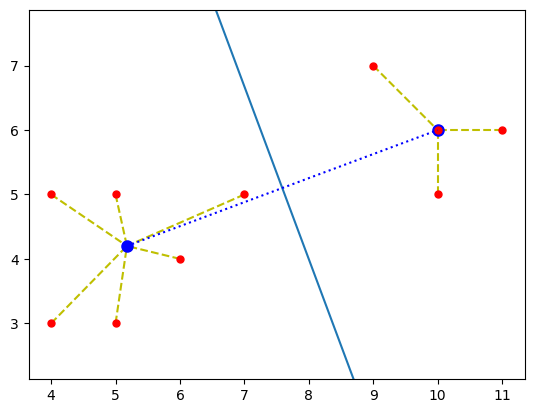

The geometric medians are as follows: (5.176300003726336, 4.200477273927456), (10.0, 6.0)


In [32]:
def perp_bisector(p1, p2):
    """
    Takes two tuples p1 and p2 and returns a list of 
    two np.arrays, the first entry being the midpoint between
    p1 and p2, and the second entry being the perpindicular vector to the 
    line p1-p2.
    This function returns a numpy array, since one would usually
    do calculations with these vectors.
    """
    
    if p1 == p2:
        raise ValueError("Tried to create a line through a single point!")
    (x1, y1), (x2, y2) = p1, p2
    point = np.array(((x1 + x2) / 2, (y1 + y2) / 2))
    
    # Gets a direction vector by taking the vector from p1
    # to p2, and then rotating it 90 degrees (i.e (a, b) -> (-b, a))
    direction = np.array((- (y2 - y1), x2 - x1))  
    
    return [point, direction]

def direction(p, q, r):
    """
    INPUT: three two-dimensional tuples
    OUTPUT: A factor describing the direction between p-q and p-r 
    Equivalent to the left_turn, function, but the return values can be 
    interpreted like this instead:
    return value > 0: p - q - r is a left turn
    return value = 0: p - q - r is a line
    return value < 0: p - q- r is a right turn
    """
    return (q[0] - p[0]) * (r[1] - p[1]) - (r[0] - p[0]) * (q[1] - p[1])


def two_geometric_medians(X):
    """
    Takes a set/list of points and returns a tuple of two
    minimization outputs (with )
    """
    
    X = list(X)
    best = []
    
    # Run over all possible pairs of points in X
    
    for (i, x) in enumerate(X):
        for y in X[i + 1:]:
            
            # Classification of points
            # compared to the bisector
            left_points = []
            right_points = []
            on_the_bisector = []
            
            for s in X:
                # If s is generating the bisector
                if s == x or s == y:
                    on_the_bisector.append(s)
                    continue
                elif direction(x, y, s) > 0:
                    left_points.append(s)
                else:
                    right_points.append(s)
            
            # Test the two cases, where the true bisector either is to the left
            # or to the right of the generated bisector, and run geometric
            # median on each of the partitions of X
            
            left_median_1 = geometric_median(left_points, verbose = True)
            right_median_1 = geometric_median(right_points + on_the_bisector,
                                              verbose = True)
            
            value_1 = left_median_1.fun + right_median_1.fun
            
            
            left_median_2 = geometric_median(left_points + on_the_bisector,
                                             verbose = True)
            right_median_2 = geometric_median(right_points, verbose = True)
            
            value_2 =  left_median_2.fun + right_median_2.fun
            
            # Choose the best outcome of the two cases
            
            if value_1 < value_2:
                new_best = (left_median_1, right_median_1,
                            left_points, right_points + on_the_bisector)
                new_best_value = value_1
            else:
                new_best = (left_median_2, right_median_2, 
                            left_points + on_the_bisector, right_points)
                new_best_value = value_2
            
            # Compare the "best so far" to the current best, and
            # choose the best one            
            if not best or new_best_value < best[0].fun + best[1].fun:
                best = new_best
                
    return best

def make_bisector_plot(two_medians):
    """
    Crude function written for the sole purpose of plotting
    the output of two_geometric_medians and
    new_two_geometric_medians.
    """
    x1, y1 = two_medians[0].x
    x2, y2 = two_medians[1].x

    make_plot(two_medians[2], (x1, y1))
    make_plot(two_medians[3], (x2, y2))

    plt.axis('equal')

    # ax remembers the current axes - this is to combat
    # the potential that axline further down makes the axes ugly.
    ax = plt.axis()

    (p, v) = perp_bisector((x1, y1), (x2, y2))
    plt.axline(p, p+v)

    plt.plot([x1, x2], [y1, y2], "b:")

    # Undo the potential axes changes that axline may have done.
    plt.axis(ax)

    plt.show()

gm = two_geometric_medians(S4)
make_bisector_plot(gm)

# The geometric medians found are:
print(f'The geometric medians are as follows: {tuple(gm[0].x)}, {tuple(gm[1].x)}')

## Optional Exercise
Extension of two_geometric_medians such that it can be assumed that three or more points are on a line

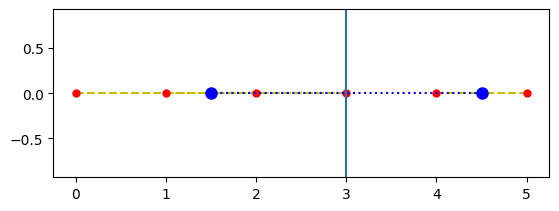

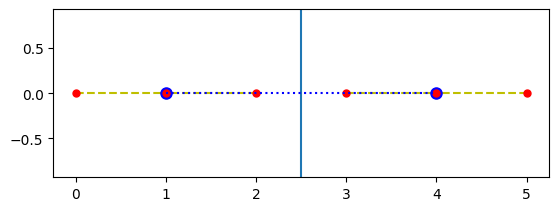

In [33]:
def subsets(L):
    """
    Recursive function that takes a list and returns the power set
    (the list of all possible subsets of L)
    """
    on_off = [[L[0]], []]
    if len(L)==1:
        return on_off
    else:
        return [a + b for a in on_off for b in subsets(L[1:])]


def new_two_geometric_medians(X):
    """
    Takes an iterable over two-coordinate tuples and returns a tuple
    of two scipy.optimize.minimize outputs, those two minimizing
    the geometric median of a (random) 2-section-partition over X,
    and the tuple also contains two lists of points representing
    how X is partitioned - i.e. the output is
    (first geometric median, second geometric median, first partition,
    second partition)
    """
    X = list(X)
    best = None
    
    # Run over all possible pairs of points (x and y) in X, 
    for (i,x) in enumerate(X):
        for y in X[i + 1:]: 
            
            # Construct the partition of X based on the bisector
            # generated by xy, the partition will be of left points,
            # right points, and points on the bisector
            left_points = []
            right_points = []
            on_the_bisector = []
            
            for s in X:
                
                # Turn direction tells if s is oriented on, to the
                # left or to the right of the xy bisector
                turn_direction = direction(x, y, s)
                if turn_direction > 0:  # If x-y-s is a left turn
                    left_points.append(s)
                elif turn_direction < 0: # If x-y-s is a right turn
                    right_points.append(s)
                else:                   # If x-y-s is on a line
                    on_the_bisector.append(s)
            
            
            if len(on_the_bisector) > 2:
                # If the xy - bisector crosses other points than x or y
                
                # Run over all possible 2-set-partitions (lefts, rights) 
                # of the points on the line:
                permutations = subsets(on_the_bisector)
                for rights in permutations:
                    
                    # This only supports sets or other collections
                    # without duplicated points. This will remove
                    # duplicates.
                    lefts = list(set(on_the_bisector) - set(rights))

                    # Create the geometric median of left_points and the
                    # lefts partition... and vice versa
                    left_median = geometric_median(left_points + lefts, 
                                                   verbose = True)
                    right_median = geometric_median(right_points + rights, 
                                                    verbose = True)
                    
                    # If the sum of distances is less than the prior best,
                    # replace the prior best with the new-found best
                    if not best or (left_median.fun + right_median.fun 
                                    < best[0].fun + best[1].fun):
                        best = (left_median, right_median, 
                                left_points + lefts, right_points + rights)
            else:
                # If x and y are the only two points on the bisector
                # check the two cases just like in two_geometric_medians
                left_median = geometric_median(left_points, 
                                               verbose = True)
                right_median = geometric_median(right_points + on_the_bisector, 
                                                verbose = True)
            
                value = left_median.fun + right_median.fun
                
                if not best or value < best[0].fun + best[1].fun:
                    best = (left_median, right_median, 
                           left_points, right_points + on_the_bisector)
            
                left_median = geometric_median(left_points + on_the_bisector, 
                                               verbose = True)
                right_median = geometric_median(right_points, 
                                                verbose = True)
            
                value =  left_median.fun + right_median.fun
                
                # Compare the "best so far" to the current test,
                # and choose the best one
                if value < best[0].fun + best[1].fun:
                    best = (left_median, right_median,
                           left_points + on_the_bisector, right_points)        
    return best

# For comparison of two_geometric_medians and new_two_geometric_medians
gm1 = two_geometric_medians(S5)
gm2 = new_two_geometric_medians(S5)

# Subplot for comparison
# Shows faulty solution of two_geometric_medians and
# the correct solution of new_two_geometric_medians
plt.subplot(2, 1, 1)
make_bisector_plot(gm1)
plt.subplot(2, 1, 2)
make_bisector_plot(gm2)